In [ ]:
!pip install pytube moviepy youtube_dl

In [ ]:
!pip install opencv-python dlib torchvision

In [ ]:
## Use account - 
## Username - 753asr.project@gmail.com
## Password - bazingaa
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install face_recognition
import cv2
import face_recognition
import torch 
from torch import nn

     |████████████████████████████████| 100.2MB 71kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=85613d111f3c9ade832f42080ad6bca7243ca36fb0a61b1b190e7ce554ccea45
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms,models
import pickle
import pandas as pd
import youtube_dl
import moviepy.editor as mp
import os
import torch.nn as nn
import torch.nn.functional as F
import librosa
import dlib

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2146304/45929032 bytes (4.7%)5464064/45929032 bytes (11.9%)8921088/45929032 bytes (19.4%)12369920/45929032 bytes (26.9%)15597568/45929032 bytes (34.0%)18948096/45929032 bytes (41.3%)22413312/45929032 bytes (48.8%)25714688/45929032 bytes (56.0%)29179904/45929032 bytes (63.5%)32645120/45929032 bytes (71.1%)36085760/45929032 bytes (78.6%)39542784/45929032 bytes (86.1%)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Extracting face using dlib
https://towardsdatascience.com/cnn-based-face-detector-from-dlib-c3696195e01c

In [ ]:
cnn_face_detector = dlib.cnn_face_detection_model_v1("/content/drive/MyDrive/mmod_human_face_detector.dat")
hog_face_detector = dlib.get_frontal_face_detector()

In [ ]:
def extract_face(frame):
  
  faces_cnn = cnn_face_detector(frame, 2) # sampling parameter 2 

  x,y,w,h = 0,0,0,0
  for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y
  
  #print(x,y,w,h , frame.shape)
  if(x<=0 or y<=0 or w<=0 or h<=0):
    return None

  frame = frame[y:y + h,x:x+w]
  #print(frame.shape)
  #frame = np.resize(frame,(224,224,3))
  #print(frame.shape)
  #plt.imshow(frame)
  return frame

## VGG model - vgg-Face

In [ ]:
def create_vgg_model():

  PATH = "http://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/vgg_face_dag.pth"
  PATH2 = "http://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/vgg_m_face_bn_dag.pth"
  model = models.vgg16(pretrained=PATH)
  layers = list(model.classifier.children())
  #print(layers)
  layers.pop()
  layers.pop()
  new_classifier = torch.nn.Sequential(*layers)
  model.classifier = new_classifier

  return model

In [ ]:
vgg_model = create_vgg_model()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [ ]:
vgg_model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in vgg_model.parameters():
    param.requires_grad = False


In [ ]:
vgg_model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### transform face image to proper shape

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

### function to extract features for a batch

In [ ]:
def extract_image_features(image_path_list):

  face_batch = []

  for image_path in image_path_list: 

    frame = Image.open(image_path)
    
    frame_arr = np.asarray(frame)
    face_arr = extract_face(frame_arr)

    if(face_arr is None):
      return None

    face = Image.fromarray(np.uint8(face_arr)).convert('RGB')
    #face = Image.fromarray(face_arr)
    face_tensor = transform(face)
    #print(face_tensor.shape)
    face_batch.append(face_tensor.numpy())
    #print(face_tensor.device)

  face_batch = torch.tensor(face_batch).to(device)
  #print(face_batch.shape)
  face_features = vgg_model(face_batch)

  return face_features

In [ ]:
def extract_faces_features(image_path_list):

  face_batch = []

  for image_path in image_path_list: 

    frame = Image.open(image_path)
  
    frame_arr = np.asarray(frame)
    face_arr = extract_face(frame_arr)

    if(face_arr is None):
      return None

    face = Image.fromarray(np.uint8(face_arr)).convert('RGB')
    #face = Image.fromarray(face_arr)
    face_tensor = transform(face)
    #print(face_tensor.shape)
    face_batch.append(face_tensor.numpy())
    #print(face_tensor.device)

  face_batch = torch.tensor(face_batch).to(device)
  return face_batch

## Voice Encoder

In [ ]:
def get_spectrogram(audio_path):

  wav_file , sr = librosa.load(audio_path,sr = 16000, duration = 6.0 ,mono = True)
  stft = librosa.core.stft(wav_file, n_fft = 512, hop_length = int(np.ceil(0.01 * sr)),win_length = int(np.ceil(0.025 * sr)) , window='hann', center=True,pad_mode='reflect')
  
  if stft.shape[1] < 598:
    stft = np.concatenate((stft,stft[:,0:598 - stft.shape[1]]),axis = 1)
  else:
    stft = stft[:,:598]

  real = np.sign(stft.real) * ( np.abs(stft.real) ** 0.3 )
  imag = np.sign(stft.imag) * ( np.abs(stft.imag) ** 0.3 )

  stft = np.stack((real,imag),axis=-1)
  
  return stft

In [ ]:
class AudioEncoder(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(2, 32, kernel_size=(4,4) , stride=(1,1) )
    self.bn1 = nn.BatchNorm2d(32)

    self.conv2 = nn.Conv2d(32, 32, kernel_size=(4,4) , stride=(1,1) )
    self.bn2 = nn.BatchNorm2d(32)

    self.conv3 = nn.Conv2d(32, 64, kernel_size=(4,4) , stride=(1,1) )
    self.bn3 = nn.BatchNorm2d(64)

    self.pool1 = nn.MaxPool2d((2,1),stride=(2,1))

    self.conv4 = nn.Conv2d(64, 64, kernel_size=(4,4) , stride=(1,1) )
    self.bn4 = nn.BatchNorm2d(64)

    self.pool2 = nn.MaxPool2d((2,1),stride=(2,1))

    self.conv5 = nn.Conv2d(64, 64, kernel_size=(4,4) , stride=(1,1) )
    self.bn5 = nn.BatchNorm2d(64)

    self.pool3 = nn.MaxPool2d((2,1),stride=(2,1))

    self.conv6 = nn.Conv2d(64, 128, kernel_size=(4,4) , stride=(1,1) )
    self.bn6 = nn.BatchNorm2d(128)

    self.pool4 = nn.MaxPool2d((2,1),stride=(2,1))

    self.conv7 = nn.Conv2d(128, 256, kernel_size=(4,4) , stride=(1,1) )
    self.bn7 = nn.BatchNorm2d(256)

    self.conv8 = nn.Conv2d(256, 256, kernel_size=(4,4) , stride=(2,2) )
    self.bn8 = nn.BatchNorm2d(256)

    self.conv9 = nn.Conv2d(256, 256, kernel_size=(4,4) , stride=(2,2) )

    self.avg1  = nn.AvgPool2d((1,1),1)
    self.bn9 = nn.BatchNorm2d(256)

    self.flatten = nn.Flatten()

    #self.fc1 = nn.Linear(419328,256)
    self.fc1 = nn.Linear(87552,256)
    self.fc2 = nn.Linear(256,1024)
    self.fc3 = nn.Linear(1024,4096)
    self.fc4 = nn.Linear(4096,4096)

  def forward(self,x):

    x = self.bn1(F.relu(self.conv1(x)))
    #print(x.shape)
    x = self.bn2(F.relu(self.conv2(x)))
    #print(x.shape)
    x = self.bn3(F.relu(self.conv3(x)))
    #print(x.shape)

    x = self.pool1(x)
    #print(x.shape)

    x = self.bn4(F.relu(self.conv4(x)))
    #print(x.shape)
    x = self.pool2(x)
    #print(x.shape)

    x = self.bn5(F.relu(self.conv5(x)))
    #print(x.shape)
    x = self.pool3(x)
    #print(x.shape)

    x = self.bn6(F.relu(self.conv6(x)))
    #print(x.shape)
    x = self.pool4(x)
    #print(x.shape)

    x = self.bn7(F.relu(self.conv7(x)))
    #print(x.shape)
    x = self.bn8(F.relu(self.conv8(x)))
    #print(x.shape)
    x = self.conv9(x)
    #print(x.shape)

    x = self.bn9(F.relu(self.avg1(x)))
    #print(x.shape)
    x = self.flatten(x)
    #print(x.shape)
    x = F.relu(self.fc1(x))
    #print(x.shape)
    x = F.relu(self.fc2(x))
    #print(x.shape)
    x = F.relu(self.fc3(x))
    #print(x.shape)
    x = self.fc4(x)
    #print(x.shape)

    return x


In [ ]:
audio_encoder = AudioEncoder()
audio_encoder.to(device)

AudioEncoder(
  (conv1): Conv2d(2, 32, kernel_size=(4, 4), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=(2, 1), stri

In [ ]:
for p in audio_encoder.parameters():

  if p.requires_grad:
    print(p.numel())

1024
32
32
32
16384
32
32
32
32768
64
64
64
65536
64
64
64
65536
64
64
64
131072
128
128
128
524288
256
256
256
1048576
256
256
256
1048576
256
256
256
22413312
256
262144
1024
4194304
4096
16777216
4096


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(audio_encoder)

46593664

## AVSpeech Preprocessing
https://towardsdatascience.com/extracting-speech-from-video-using-python-f0ec7e312d38

In [ ]:
root_dir_path = '/content'
path = os.path.join(root_dir_path,'images')
os.mkdir(path)
path = os.path.join(root_dir_path,'videos')
os.mkdir(path)
path = os.path.join(root_dir_path,'audios')
os.mkdir(path)

In [ ]:
def extract_frame(id,start,end):

  video_path = root_dir_path + '/videos/' + id + '.mp4'
  image_path = root_dir_path + '/images/' + id + '.jpg'

  clip = mp.VideoFileClip(video_path)
  dur = clip.duration
  end = min(end,dur)
  if(start>=end):
    return

  clip = clip.subclip(start, end)
  
  clip.save_frame(image_path, t = 1)
   

In [ ]:
def extract_audio(id,start,end):

  video_path = root_dir_path + '/videos/' + id + '.mp4'
  audio_path = root_dir_path + '/audios/' + id + '.wav'

  clip = mp.VideoFileClip(video_path)
  dur = clip.duration
  end = min(end,dur)
  if (start >= end):
    print('start more than video total length')
    return None
    
  clip = clip.subclip(start, end)
  
  clip.audio.write_audiofile(audio_path)

  stft = get_spectrogram(audio_path)

  return stft


In [ ]:
ydl_opts = {'format': 'best' , 'outtmpl':'/content/videos/%(id)s.mp4'}
ydl = youtube_dl.YoutubeDL(ydl_opts)


In [ ]:
def download_video(id,start,end):

  video_link="https://www.youtube.com/watch?v=" + id 
  #print(video_link)
  try: 
      ydl.download([video_link.strip()])
  except: 
    print('error in downloading videos')
    return

  stft = extract_audio(id,start,end)
  if (stft is None):
    print('stft is none')
    return None
  extract_frame(id,start,end)
  video_path = '/content/videos/' + id + '.mp4'
  %rm $video_path
  return stft

## Dataset Preparation

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/avspeech_test.csv',names=['id','start','end','X','Y'])

In [ ]:
def preprocess_data(batch_no , batch_size , reference = False):

  spectrogram_dict = {}
  image_path_list = []

  for i in range(batch_no*batch_size , (batch_no+1)*batch_size):

    id , start , end , X ,Y = file.iloc[i]

    spectrogram = download_video(id,start,end)

    if (spectrogram is None):
      continue

    #print(type(spectrogram))

    if(type(spectrogram) == np.ndarray):

      spectrogram_dict[id] = spectrogram

      path = '/content/images/' + id + '.jpg'
      image_path_list.append(path)
 
  image_features = extract_image_features(image_path_list)
  #return
  if(image_features is None or image_features.shape[0] != len(spectrogram_dict.keys())):
    return

  if (reference):
    image_feat_file = '/content/drive/MyDrive/reference/vgg_image_features_' + str(batch_no)
  else:  
    image_feat_file = '/content/drive/MyDrive/vgg_image_features_' + str(batch_no)

  torch.save(image_features,image_feat_file)

  if (reference):
    spec_pickle_file = '/content/drive/MyDrive/reference/spectrograms_' + str(batch_no) + '.pk' 
  else:
    spec_pickle_file = '/content/drive/MyDrive/spectrograms_' + str(batch_no) + '.pk' 

  f = open(spec_pickle_file, 'wb')
  pickle.dump(spectrogram_dict, f)
  f.close()

  if (reference) :
    ## saving images for reference retrival
    for image_path in image_path_list:

      image_id = image_path.split('/content/images/')[1]
      drive_path = '/content/drive/MyDrive/reference/' + image_id

      %mv $image_path $drive_path


[youtube] DF0yEsDHKSs: Downloading webpage
[youtube] DF0yEsDHKSs: Downloading MPD manifest
[download] Destination: /content/videos/DF0yEsDHKSs.mp4
[download] 100% of 33.80MiB in 00:01
[MoviePy] Writing audio in /content/audios/DF0yEsDHKSs.wav


100%|██████████| 224/224 [00:00<00:00, 1399.07it/s]

[MoviePy] Done.


[youtube] H6hYLZpfP_c: Downloading webpage
[youtube] H6hYLZpfP_c: Downloading player 838cc154
[youtube] H6hYLZpfP_c: Downloading MPD manifest
error in downloading videos
[youtube] jcdpVfGHaG0: Downloading webpage
[youtube] jcdpVfGHaG0: Downloading MPD manifest
[download] Destination: /content/videos/jcdpVfGHaG0.mp4
[download]  17.0% of 188.30MiB at 17.62MiB/s ETA 00:08error in downloading videos
[youtube] 30-QCZ0z-p8: Downloading webpage
[download] Destination: /content/videos/30-QCZ0z-p8.mp4
[download]  72.7% of 82.56MiB at 50.94MiB/s ETA 00:00error in downloading videos
[youtube] wX_0XK0MkOE: Downloading webpage
[youtube] wX_0XK0MkOE: Downloading MPD manifest
[download] Destination: /content/videos/wX_0XK0MkOE.mp4
[download] 100% of 56.80MiB in 00:01
[MoviePy] Writing audio in /content/audios/wX_0XK0MkOE.wav


100%|██████████| 96/96 [00:00<00:00, 759.76it/s]

[MoviePy] Done.


[youtube] EyHFNQTKjto: Downloading webpage
error in downloading videos
[youtube] yNw0x5KHOpg: Downloading webpage
error in downloading videos
[youtube] CEvuDZNVogk: Downloading webpage
[download] Destination: /content/videos/CEvuDZNVogk.mp4
[download]  24.8% of 242.06MiB at 17.12MiB/s ETA 00:10error in downloading videos
[youtube] _RueBPvH6ig: Downloading webpage
[download] Destination: /content/videos/_RueBPvH6ig.mp4
[download]   3.8% of 104.35MiB at 32.05MiB/s ETA 00:03error in downloading videos
[youtube] B2Fi1Ev8ivg: Downloading webpage
error in downloading videos
torch.Size([3, 224, 224])
cpu
torch.Size([3, 224, 224])
cpu
torch.Size([2, 3, 224, 224])


KeyboardInterrupt: ignored

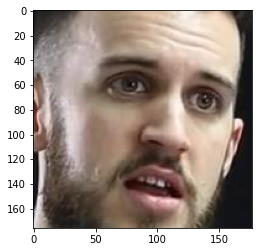

In [ ]:
train_size = 10000
batch_size = 10
n_batches = int(train_size / batch_size)

for i in range(1002,1100):

  preprocess_data(i,batch_size,True)
  #break

In [ ]:
f = open('/content/drive/MyDrive/spectrograms_811.pk','rb')
d = pickle.load(f)
x = torch.tensor([ np.transpose(value,(2,1,0)) for value in d.values()])
x.shape

torch.Size([8, 2, 598, 257])

## Training Loop

In [ ]:
def contrastive_loss(a,b):


  a = torch.div(a,a.norm(dim=1).reshape(-1,1).tile((4096,)))
  b = torch.div(b,b.norm(dim=1).reshape(-1,1).tile((4096,)))

  c = torch.matmul(a,b.transpose(0,1))

  c = torch.exp(c)

  loss = 0
  #print(c.shape)
  for i in range(c.shape[1]):

    sum = torch.sum(c[i])
  #  print(sum.shape)
    sum = torch.div(c[i][i],sum)
   # print(sum.shape)
    logit = torch.log(sum)
  #  print(logit.shape)
    loss += logit

  return (-1.0/c.shape[0])*loss


In [ ]:
def l1_dist(a,b):

  a = torch.div(a,a.norm(dim=1).reshape(-1,1).tile((4096,)))
  b = torch.div(b,b.norm(dim=1).reshape(-1,1).tile((4096,)))

  dist = torch.abs(a - b)
  dist = dist.sum(1).mean()

  return dist

def l2_dist(a,b):

  a = torch.div(a,a.norm(dim=1).reshape(-1,1).tile((4096,)))
  b = torch.div(b,b.norm(dim=1).reshape(-1,1).tile((4096,)))

  dist = (a-b)**2
  dist = dist.sum(1).sqrt().mean()

  return dist

In [ ]:
def Loss1(a,b,device):
  #a = torch.div( a, torch.norm(a))
  #b = torch.div( b, torch.norm(b))
  a.to(device)
  b.to(device)

  a = torch.div(a,a.norm(dim=1).reshape(-1,1).tile((4096,)))
  b = torch.div(b,b.norm(dim=1).reshape(-1,1).tile((4096,)))
  #print(a.shape,b.shape)
  loss = torch.sum((a - b)**2, dim=1)
  #print(loss.sum())nemani
  return loss.sum()

In [ ]:
def Loss2(a,b,device):
  a.to(device)
  b.to(device)
  a = torch.div(a,2)
  b = torch.div(b,2)
  softmax = nn.Softmax(dim=1)
  log_softmax = nn.LogSoftmax(dim=1)
  #print(softmax(a).sum(dim=1),log_softmax(b).shape)
  loss = torch.sum( -softmax(a) * log_softmax(b) , dim=1)
  #print(loss.shape)
  return loss.sum()


## Train

In [ ]:
audio_encoder.load_state_dict(torch.load('/content/drive/MyDrive/Audio_Encoder/model_weights_epoch_17_lr0.00001_reduced_norm.pt'))
audio_encoder.train()

AudioEncoder(
  (conv1): Conv2d(2, 32, kernel_size=(4, 4), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=(2, 1), stri

In [ ]:
audio_encoder.train()

AudioEncoder(
  (conv1): Conv2d(2, 32, kernel_size=(4, 4), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=(2, 1), stri

In [ ]:
l1_loss = torch.nn.L1Loss(reduction='sum').to(device)

In [ ]:
#device = 'cpu'
mse_loss = torch.nn.MSELoss(reduction='sum').to(device)
#l1_loss = torch.nn.L1Loss(reduction='sum').to(device)
optimizer = torch.optim.Adam(audio_encoder.parameters(),lr=1e-5 , weight_decay=1e-5)
cosine_similarity = torch.nn.CosineSimilarity().to(device)

In [ ]:
def extract_vgg_features_decoder(image_path_list):

  face_batch = []

  for image_path in image_path_list: 

    frame = Image.open(image_path)
    
    frame_arr = np.asarray(frame)
    face_arr = extract_face(frame_arr)

    if(face_arr is None):
      return None

    face = Image.fromarray(np.uint8(frame_arr)).convert('RGB')
    #face = Image.fromarray(frame_arr)
    face_tensor = transform(face)
    #print(

    face_batch.append(face_tensor.numpy())
    #print(face_tensor.device)

  face_batch = torch.tensor(face_batch).to(device)
  #print(face_batch.shape)
  #return face_batch
  vgg_features = vgg_model(face_batch)

  return vgg_features

In [ ]:
def testing():

  epochs = 1100
  total_l2_distance = 0
  total_l1_distance = 0
  total_cosine_similarity = 0
  batches = 0
  total_examples = 0
  total_loss = 0
  audio_encoder.eval()

  with torch.no_grad():

    for i in range(1000,1050):

      try:
        f = open('/content/drive/MyDrive/reference/spectrograms_'+str(i)+'.pk','rb')
      except:
        continue

      spec_dict = pickle.load(f)
      
      X = torch.tensor([np.transpose(value,(2,1,0)) for value in spec_dict.values()])
      
      y = torch.load('/content/drive/MyDrive/reference/vgg_image_features_'+str(i))
      #y = y.to('cpu')
      X = X.to(device)
      y = y.to(device)
      #print(X.shape , y.shape)
      y_pred = audio_encoder.forward(X)
      #file_name = '/content/drive/MyDrive/test/vgg_predicted_' + str(i)
      #torch.save(y_pred,file_name)
      #continue
      #y = torch.div(y,torch.norm(y))
      #y_pred = torch.div(y_pred,torch.norm(y_pred))

      assert(y.shape == y_pred.shape)
      #print(y.device , y_pred.device)
      #loss = mse_loss(y,y_pred) / y.shape[0]
      loss = Loss1(y,y_pred,device) + mse_loss(y,y_pred)
      l2_distance = l2_dist(y,y_pred)
      total_loss += loss.item()
      cosine_sim = cosine_similarity(y,y_pred).mean()
      
      #print(cosine_sim)

      l1_distance = l1_dist(y,y_pred)

      #print(loss.item())
      batches += 1
      total_l2_distance += l2_distance.item()
      total_l1_distance += l1_distance.item()
      total_cosine_similarity += cosine_sim.item()
      total_examples += X.shape[0]

      if(batches%20 == 0):
        print('Current Batch is {} Loss is {} -L2 distance is : {}  L1 distance is : {} Cosine similarity is : {}'.format(batches,total_loss/batches , total_l2_distance/batches, total_l1_distance/batches,total_cosine_similarity/batches))
        
  print('*******************Test**************')
  print('total batches processed : {}'.format(batches))
  print('total examples processed : {}'.format(total_examples))
  print('L2 loss is : {}'.format(total_l2_distance/batches))
  print('L1 loss is : {}'.format(total_l1_distance/batches))
  print('cosine similarity is : {}'.format(total_cosine_similarity/batches))

In [ ]:
epochs = 1000


for x in range(10):
  audio_encoder.train()
  total_mse_loss = 0
  #total_l1_loss = 0
  total_l2_distance = 0
  total_l1_distance = 0
  total_cosine_similarity = 0
  batches = 0
  total_examples = 0

  for i in range(1000):

    try:
      f = open('/content/drive/MyDrive/spectrograms_'+str(i)+'.pk','rb')
    except:
      continue

    spec_dict = pickle.load(f)
   # image_path_list = ['/content/drive/MyDrive/reference/'+key+'.jpg' for key in spec_dict]
    X = torch.tensor([np.transpose(value,(2,1,0)) for value in spec_dict.values()])
    #y = extract_vgg_features_decoder(image_path_list)
    y = torch.load('/content/drive/MyDrive/vgg_image_features_'+str(i))
    #y = y.to('cpu')
    X = X[:].to(device)
    y = y[:].to(device)
    #print(X.shape , y.shape)
    y_pred = audio_encoder.forward(X)
    #torch.set_printoptions(edgeitems=2048)
    #print(y[0].all==0)
    #print(y_pred.shape)
    #y = torch.div(y,torch.norm(y))
    #y_pred = torch.div(y_pred,torch.norm(y_pred))
    #print(i, X.shape ,y.shape ,y_pred.shape)
    assert(y.shape == y_pred.shape)
    #print(y.device , y_pred.device)
    #loss = mse_loss(y,y_pred) / y.shape[0]
    #loss += 10*Loss1(y,y_pred,device) / y.shape[0]
    loss = Loss1(y,y_pred,device)
    #loss = contrastive_loss(y,y_pred)
    #total_loss += 100 * (Loss2(y,y_pred,device))

    with torch.no_grad():
      
      l1_distance = l1_dist(y,y_pred)
      l2_distance = l2_dist(y,y_pred)
      cosine_sim = cosine_similarity(y,y_pred).mean()
      total_l1_distance += l1_distance.item()
      total_l2_distance += l2_distance.item()
      total_cosine_similarity += cosine_sim

    optimizer.zero_grad()
    loss.backward()
    #total_loss.backward()
    optimizer.step()
    #print('parameter update ',i)
    #print(loss.item())
    batches += 1
    total_mse_loss += loss.item()
    #total_mse_loss += total_loss.item()
    
    total_examples += X.shape[0]

    if(batches%50 == 0):
      print('Current Batch is {} - loss is : {} and L2 distance is : {}  L1 distance is : {} Cosine similarity is : {}'.format(batches,total_mse_loss/batches , l2_distance, l1_distance , cosine_sim))

  

  #if x%5 == 0:
  #model_weights_path = '/content/drive/MyDrive/Audio_Encoder/model_weights_epoch_'+ str(x) +'_lr1e-5_11cr.pt'
  #torch.save(audio_encoder.state_dict(),model_weights_path)

  print("Training EPOCH : ",x)
  print('total batches processed : {}'.format(batches))
  print('total examples processed : {}'.format(total_examples))
  print('Total loss is : {}'.format(total_mse_loss/batches))
  print('L2 distance is : {}'.format(total_l2_distance/batches))
  print('L1 distance is : {}'.format(total_l1_distance/batches))
  print('Cosine Similarity is : {}'.format(total_cosine_similarity/batches))

  testing()

Current Batch is 50 - loss is : 2.327362713813782 and L2 distance is : 0.5661582350730896  L1 distance is : 18.469846725463867 Cosine similarity is : 0.8377243280410767


KeyboardInterrupt: ignored

In [ ]:
model_weights_path = '/content/drive/MyDrive/Audio_Encoder/model_weights_epoch_9_lr1e-6_reduced_norm.pt'
torch.save(audio_encoder.state_dict(),model_weights_path)
testing()

In [ ]:
testing()

Current Batch is 20 Loss is 33068.31669921875 -L2 distance is : 0.7784876644611358  L1 distance is : 24.041897106170655 Cosine similarity is : 0.6856482923030853


KeyboardInterrupt: ignored

## Testing

In [ ]:
audio_encoder.load_state_dict(torch.load('/content/drive/MyDrive/Audio_Encoder/model_weights_epoch_14_lr0.00001_reduced_norm.pt'))
audio_encoder.eval()

AudioEncoder(
  (conv1): Conv2d(2, 32, kernel_size=(4, 4), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=(2, 1), stri

In [ ]:
testing()

NameError: ignored

## Face Retrival Performance

A reference dataset of size .. is created. On quering a list of video id's from this dataset will return top k matched images and also recall@k

## Create dreference data

In [ ]:
def create_reference_dataset():

  reference_size = 15000
  batch_size = 10
  n_batches_ref = int(reference_size / batch_size)

  for i in range(1385,n_batches_ref):

    preprocess_data(i,batch_size,True)

  return create_reference_dict()


In [ ]:
create_reference_dataset()

[youtube] m0_FFcwT_ns: Downloading webpage
[download] Destination: /content/videos/m0_FFcwT_ns.mp4
[download] 100% of 26.50MiB in 00:02
[MoviePy] Writing audio in /content/audios/m0_FFcwT_ns.wav


100%|██████████| 124/124 [00:00<00:00, 1066.89it/s]

[MoviePy] Done.


[youtube] xeWLsYLO3QA: Downloading webpage
[youtube] xeWLsYLO3QA: Downloading MPD manifest
[download] Destination: /content/videos/xeWLsYLO3QA.mp4
[download] 100% of 31.45MiB in 00:00
[MoviePy] Writing audio in /content/audios/xeWLsYLO3QA.wav


100%|██████████| 67/67 [00:00<00:00, 648.68it/s]

[MoviePy] Done.


[youtube] mpe0Gif2EZk: Downloading webpage
[download] Destination: /content/videos/mpe0Gif2EZk.mp4
[download] 100% of 24.85MiB in 00:02
[MoviePy] Writing audio in /content/audios/mpe0Gif2EZk.wav


100%|██████████| 287/287 [00:00<00:00, 1610.95it/s]

[MoviePy] Done.


[youtube] CJficrXy81w: Downloading webpage
[youtube] CJficrXy81w: Downloading MPD manifest
[download] Destination: /content/videos/CJficrXy81w.mp4
[download] 100% of 22.85MiB in 00:04
[MoviePy] Writing audio in /content/audios/CJficrXy81w.wav


100%|██████████| 213/213 [00:00<00:00, 1249.04it/s]

[MoviePy] Done.


[youtube] 9abjsU7ibvE: Downloading webpage
[download] Destination: /content/videos/9abjsU7ibvE.mp4
[download] 100% of 27.59MiB in 00:01
[MoviePy] Writing audio in /content/audios/9abjsU7ibvE.wav


100%|██████████| 198/198 [00:00<00:00, 1325.33it/s]

[MoviePy] Done.


[youtube] 18Xcz13Aw4g: Downloading webpage
[download] Destination: /content/videos/18Xcz13Aw4g.mp4
[download] 100% of 23.16MiB in 00:00
[MoviePy] Writing audio in /content/audios/18Xcz13Aw4g.wav


100%|██████████| 123/123 [00:00<00:00, 1064.17it/s]

[MoviePy] Done.


[youtube] euD4TwZg1rA: Downloading webpage
[download] Destination: /content/videos/euD4TwZg1rA.mp4
[download] 100% of 23.81MiB in 00:02
[MoviePy] Writing audio in /content/audios/euD4TwZg1rA.wav


100%|██████████| 81/81 [00:00<00:00, 832.04it/s]

[MoviePy] Done.


[youtube] eNhfzS5WQtw: Downloading webpage
[download] Destination: /content/videos/eNhfzS5WQtw.mp4
[download] 100% of 22.10MiB in 00:02
[MoviePy] Writing audio in /content/audios/eNhfzS5WQtw.wav


100%|██████████| 125/125 [00:00<00:00, 1031.15it/s]

[MoviePy] Done.


[youtube] gZmjidt0lRI: Downloading webpage
[download] Destination: /content/videos/gZmjidt0lRI.mp4
[download] 100% of 43.51MiB in 00:06
[MoviePy] Writing audio in /content/audios/gZmjidt0lRI.wav


100%|██████████| 148/148 [00:00<00:00, 1123.05it/s]

[MoviePy] Done.


[youtube] uQRWpbaXFis: Downloading webpage
[youtube] uQRWpbaXFis: Downloading MPD manifest
[download] Destination: /content/videos/uQRWpbaXFis.mp4
[download] 100% of 25.82MiB in 00:02
[MoviePy] Writing audio in /content/audios/uQRWpbaXFis.wav


100%|██████████| 67/67 [00:00<00:00, 702.37it/s]

[MoviePy] Done.


[youtube] v0UFIrmlCCg: Downloading webpage
[download] Destination: /content/videos/v0UFIrmlCCg.mp4
[download] 100% of 16.13MiB in 00:01
[MoviePy] Writing audio in /content/audios/v0UFIrmlCCg.wav


100%|██████████| 99/99 [00:00<00:00, 923.14it/s]

[MoviePy] Done.


[youtube] JyjcHIHTk8o: Downloading webpage
[download] Destination: /content/videos/JyjcHIHTk8o.mp4
[download] 100% of 51.97MiB in 00:00
[MoviePy] Writing audio in /content/audios/JyjcHIHTk8o.wav


100%|██████████| 92/92 [00:00<00:00, 817.35it/s]

[MoviePy] Done.


[youtube] 7YDWEVmd4AY: Downloading webpage
[youtube] 7YDWEVmd4AY: Downloading MPD manifest
[download] Destination: /content/videos/7YDWEVmd4AY.mp4
[download] 100% of 23.30MiB in 00:01
[MoviePy] Writing audio in /content/audios/7YDWEVmd4AY.wav


100%|██████████| 166/166 [00:00<00:00, 1164.97it/s]

[MoviePy] Done.


[youtube] lJYpY-Vu9wM: Downloading webpage
[download] Destination: /content/videos/lJYpY-Vu9wM.mp4
[download] 100% of 18.15MiB in 00:02
[MoviePy] Writing audio in /content/audios/lJYpY-Vu9wM.wav


100%|██████████| 178/178 [00:00<00:00, 1226.40it/s]

[MoviePy] Done.


[youtube] _aN2OBvv2wM: Downloading webpage
[youtube] _aN2OBvv2wM: Downloading MPD manifest
[download] Destination: /content/videos/_aN2OBvv2wM.mp4
[download] 100% of 22.30MiB in 00:02
[MoviePy] Writing audio in /content/audios/_aN2OBvv2wM.wav


100%|██████████| 139/139 [00:00<00:00, 1126.85it/s]

[MoviePy] Done.


[youtube] BOgE4qSJXeU: Downloading webpage
[download] Destination: /content/videos/BOgE4qSJXeU.mp4
[download] 100% of 16.21MiB in 00:01
[MoviePy] Writing audio in /content/audios/BOgE4qSJXeU.wav


100%|██████████| 67/67 [00:00<00:00, 630.68it/s]

[MoviePy] Done.


[youtube] UTSKeFqku5I: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] pdq-uj3kyCA: Downloading webpage
[youtube] pdq-uj3kyCA: Downloading MPD manifest
[download] Destination: /content/videos/pdq-uj3kyCA.mp4
[download] 100% of 24.23MiB in 00:04
[MoviePy] Writing audio in /content/audios/pdq-uj3kyCA.wav


100%|██████████| 67/67 [00:00<00:00, 577.23it/s]

[MoviePy] Done.


[youtube] Dt-8Io0i_F4: Downloading webpage
[download] Destination: /content/videos/Dt-8Io0i_F4.mp4
[download] 100% of 69.74MiB in 00:01
[MoviePy] Writing audio in /content/audios/Dt-8Io0i_F4.wav


100%|██████████| 70/70 [00:00<00:00, 714.83it/s]

[MoviePy] Done.


[youtube] R4BpQ1lU-CI: Downloading webpage
[download] Destination: /content/videos/R4BpQ1lU-CI.mp4
[download] 100% of 17.16MiB in 00:01
[MoviePy] Writing audio in /content/audios/R4BpQ1lU-CI.wav


100%|██████████| 145/145 [00:00<00:00, 1067.85it/s]

[MoviePy] Done.


[youtube] b7zlOpzTEF0: Downloading webpage
[youtube] b7zlOpzTEF0: Downloading MPD manifest
[download] Destination: /content/videos/b7zlOpzTEF0.mp4
[download] 100% of 15.90MiB in 00:00
[MoviePy] Writing audio in /content/audios/b7zlOpzTEF0.wav


100%|██████████| 98/98 [00:00<00:00, 793.93it/s]

[MoviePy] Done.


[youtube] JjYhkv6IwEs: Downloading webpage
[youtube] JjYhkv6IwEs: Downloading player 3a4ee0a9
[download] Destination: /content/videos/JjYhkv6IwEs.mp4
[download] 100% of 72.18MiB in 00:07
[MoviePy] Writing audio in /content/audios/JjYhkv6IwEs.wav


100%|██████████| 108/108 [00:00<00:00, 911.74it/s]

[MoviePy] Done.


[youtube] qYZIT-h7f5M: Downloading webpage
[youtube] qYZIT-h7f5M: Downloading MPD manifest
[download] Destination: /content/videos/qYZIT-h7f5M.mp4
[download] 100% of 16.50MiB in 00:00
[MoviePy] Writing audio in /content/audios/qYZIT-h7f5M.wav


100%|██████████| 109/109 [00:00<00:00, 925.10it/s]

[MoviePy] Done.


[youtube] E5BOBs3Nmbw: Downloading webpage
[download] Destination: /content/videos/E5BOBs3Nmbw.mp4
[download] 100% of 33.20MiB in 00:03
[MoviePy] Writing audio in /content/audios/E5BOBs3Nmbw.wav


100%|██████████| 182/182 [00:00<00:00, 1220.11it/s]

[MoviePy] Done.


[youtube] qpJWo02O0jo: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] m5eQ29Gankw: Downloading webpage
[download] Destination: /content/videos/m5eQ29Gankw.mp4
[download] 100% of 39.13MiB in 00:03
[MoviePy] Writing audio in /content/audios/m5eQ29Gankw.wav


100%|██████████| 70/70 [00:00<00:00, 600.69it/s]

[MoviePy] Done.


[youtube] aPVrSGGs_rs: Downloading webpage
[download] Destination: /content/videos/aPVrSGGs_rs.mp4
[download] 100% of 31.07MiB in 00:04
[MoviePy] Writing audio in /content/audios/aPVrSGGs_rs.wav


100%|██████████| 197/197 [00:00<00:00, 1320.36it/s]

[MoviePy] Done.


[youtube] AM1BlmdxgoM: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] w3CgX0C5_Nk: Downloading webpage
[download] Destination: /content/videos/w3CgX0C5_Nk.mp4
[download] 100% of 23.37MiB in 00:00
[MoviePy] Writing audio in /content/audios/w3CgX0C5_Nk.wav


100%|██████████| 161/161 [00:00<00:00, 1158.42it/s]

[MoviePy] Done.


[youtube] nHgOTYImTc0: Downloading webpage
[download] Destination: /content/videos/nHgOTYImTc0.mp4
[download] 100% of 19.45MiB in 00:03
[MoviePy] Writing audio in /content/audios/nHgOTYImTc0.wav


100%|██████████| 81/81 [00:00<00:00, 2279.08it/s]

[MoviePy] Done.


[youtube] M9pUhYOQ9Yc: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 5zBD2GZTF4w: Downloading webpage
[download] Destination: /content/videos/5zBD2GZTF4w.mp4
[download] 100% of 71.06MiB in 00:01
[MoviePy] Writing audio in /content/audios/5zBD2GZTF4w.wav


100%|██████████| 121/121 [00:00<00:00, 996.16it/s]

[MoviePy] Done.


[youtube] Ttuz2z4TIwE: Downloading webpage
[download] Destination: /content/videos/Ttuz2z4TIwE.mp4
[download] 100% of 40.90MiB in 00:08
[MoviePy] Writing audio in /content/audios/Ttuz2z4TIwE.wav


100%|██████████| 67/67 [00:00<00:00, 627.32it/s]

[MoviePy] Done.


[youtube] l2Nk64uXGDI: Downloading webpage
[download] Destination: /content/videos/l2Nk64uXGDI.mp4
[download] 100% of 66.33MiB in 00:02
[MoviePy] Writing audio in /content/audios/l2Nk64uXGDI.wav


100%|██████████| 306/306 [00:00<00:00, 1560.24it/s]

[MoviePy] Done.


[youtube] oNV0SJoxrQY: Downloading webpage
[download] Destination: /content/videos/oNV0SJoxrQY.mp4
[download] 100% of 18.80MiB in 00:00
[MoviePy] Writing audio in /content/audios/oNV0SJoxrQY.wav


100%|██████████| 276/276 [00:00<00:00, 1617.06it/s]

[MoviePy] Done.


[youtube] 71uL2IMGjJQ: Downloading webpage
[youtube] 71uL2IMGjJQ: Downloading MPD manifest
[download] Destination: /content/videos/71uL2IMGjJQ.mp4
[download] 100% of 63.57MiB in 00:10
[MoviePy] Writing audio in /content/audios/71uL2IMGjJQ.wav


100%|██████████| 108/108 [00:00<00:00, 884.63it/s]

[MoviePy] Done.


[youtube] GiABPqrLZ0U: Downloading webpage
[youtube] GiABPqrLZ0U: Downloading MPD manifest
[download] Destination: /content/videos/GiABPqrLZ0U.mp4
[download] 100% of 43.88MiB in 00:08
[MoviePy] Writing audio in /content/audios/GiABPqrLZ0U.wav


100%|██████████| 67/67 [00:00<00:00, 581.10it/s]

[MoviePy] Done.


[youtube] ml63ZgAlcTY: Downloading webpage
[download] Destination: /content/videos/ml63ZgAlcTY.mp4
[download] 100% of 40.77MiB in 00:03
[MoviePy] Writing audio in /content/audios/ml63ZgAlcTY.wav


100%|██████████| 136/136 [00:00<00:00, 1091.34it/s]

[MoviePy] Done.


[youtube] ArK7Tj6zS3Y: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] DQGoNFKtYLs: Downloading webpage
[download] Destination: /content/videos/DQGoNFKtYLs.mp4
[download] 100% of 28.60MiB in 00:00
[MoviePy] Writing audio in /content/audios/DQGoNFKtYLs.wav


100%|██████████| 99/99 [00:00<00:00, 872.41it/s]

[MoviePy] Done.


[youtube] yHvFJdhcOdE: Downloading webpage
[download] Destination: /content/videos/yHvFJdhcOdE.mp4
[download] 100% of 52.01MiB in 00:09
[MoviePy] Writing audio in /content/audios/yHvFJdhcOdE.wav


100%|██████████| 298/298 [00:00<00:00, 2585.62it/s]

[MoviePy] Done.


[youtube] BX_ZNijWfN8: Downloading webpage
[download] Destination: /content/videos/BX_ZNijWfN8.mp4
[download] 100% of 17.69MiB in 00:02
[MoviePy] Writing audio in /content/audios/BX_ZNijWfN8.wav


100%|██████████| 77/77 [00:00<00:00, 720.69it/s]

[MoviePy] Done.


[youtube] TJdn4QjFYi8: Downloading webpage
[download] Destination: /content/videos/TJdn4QjFYi8.mp4
[download] 100% of 15.95MiB in 00:00
[MoviePy] Writing audio in /content/audios/TJdn4QjFYi8.wav


100%|██████████| 244/244 [00:00<00:00, 1449.26it/s]

[MoviePy] Done.


[youtube] ej5hr6Q_94g: Downloading webpage
[download] Destination: /content/videos/ej5hr6Q_94g.mp4
[download] 100% of 32.69MiB in 00:03
[MoviePy] Writing audio in /content/audios/ej5hr6Q_94g.wav


100%|██████████| 180/180 [00:00<00:00, 1220.46it/s]

[MoviePy] Done.


[youtube] UBt-3j_Weg8: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] ITjoUKfro60: Downloading webpage
[youtube] ITjoUKfro60: Downloading MPD manifest
[download] Destination: /content/videos/ITjoUKfro60.mp4
[download] 100% of 40.62MiB in 00:03
[MoviePy] Writing audio in /content/audios/ITjoUKfro60.wav


100%|██████████| 67/67 [00:00<00:00, 1571.46it/s]

[MoviePy] Done.


[youtube] B028jQbmSs4: Downloading webpage
[download] Destination: /content/videos/B028jQbmSs4.mp4
[download] 100% of 14.52MiB in 00:02
[MoviePy] Writing audio in /content/audios/B028jQbmSs4.wav


100%|██████████| 67/67 [00:00<00:00, 703.85it/s]

[MoviePy] Done.


[youtube] 0XSjQyTlB2Q: Downloading webpage
[download] Destination: /content/videos/0XSjQyTlB2Q.mp4
[download] 100% of 17.10MiB in 00:02
[MoviePy] Writing audio in /content/audios/0XSjQyTlB2Q.wav


100%|██████████| 141/141 [00:00<00:00, 1102.42it/s]

[MoviePy] Done.


[youtube] dnuko56bdZg: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 0ILYT7pQHS8: Downloading webpage
[youtube] 0ILYT7pQHS8: Downloading MPD manifest
[download] Destination: /content/videos/0ILYT7pQHS8.mp4
[download] 100% of 28.29MiB in 00:02
[MoviePy] Writing audio in /content/audios/0ILYT7pQHS8.wav


100%|██████████| 148/148 [00:00<00:00, 1124.34it/s]

[MoviePy] Done.


[youtube] zwZzMEYiQtE: Downloading webpage
[download] Destination: /content/videos/zwZzMEYiQtE.mp4
[download] 100% of 23.69MiB in 00:02
[MoviePy] Writing audio in /content/audios/zwZzMEYiQtE.wav


100%|██████████| 67/67 [00:00<00:00, 686.28it/s]

[MoviePy] Done.


[youtube] zAArB5wYtA0: Downloading webpage
[download] Destination: /content/videos/zAArB5wYtA0.mp4
[download] 100% of 15.95MiB in 00:02
[MoviePy] Writing audio in /content/audios/zAArB5wYtA0.wav


100%|██████████| 201/201 [00:00<00:00, 1336.89it/s]

[MoviePy] Done.


[youtube] J7bBpsvzXTU: Downloading webpage
[download] Destination: /content/videos/J7bBpsvzXTU.mp4
[download] 100% of 35.30MiB in 00:05
[MoviePy] Writing audio in /content/audios/J7bBpsvzXTU.wav


100%|██████████| 90/90 [00:00<00:00, 829.82it/s]

[MoviePy] Done.


[youtube] wXpxK4Pa6pM: Downloading webpage
[youtube] wXpxK4Pa6pM: Downloading MPD manifest
[download] Destination: /content/videos/wXpxK4Pa6pM.mp4
[download] 100% of 22.90MiB in 00:04
[MoviePy] Writing audio in /content/audios/wXpxK4Pa6pM.wav


100%|██████████| 160/160 [00:00<00:00, 1186.58it/s]

[MoviePy] Done.


[youtube] Er1WDNMVdco: Downloading webpage
[download] Destination: /content/videos/Er1WDNMVdco.mp4
[download] 100% of 26.05MiB in 00:03
[MoviePy] Writing audio in /content/audios/Er1WDNMVdco.wav


100%|██████████| 86/86 [00:00<00:00, 793.62it/s]

[MoviePy] Done.


[youtube] O3Get6pCDWo: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] iNu9QeDMBNY: Downloading webpage
[download] Destination: /content/videos/iNu9QeDMBNY.mp4
[download] 100% of 89.42MiB in 00:04
[MoviePy] Writing audio in /content/audios/iNu9QeDMBNY.wav


100%|██████████| 291/291 [00:00<00:00, 1352.90it/s]

[MoviePy] Done.


[youtube] 5stwvQYQBQo: Downloading webpage
[download] Destination: /content/videos/5stwvQYQBQo.mp4
[download] 100% of 20.46MiB in 00:03
[MoviePy] Writing audio in /content/audios/5stwvQYQBQo.wav


100%|██████████| 121/121 [00:00<00:00, 980.91it/s]

[MoviePy] Done.


[youtube] lIZc1Egj9Zs: Downloading webpage
[download] Destination: /content/videos/lIZc1Egj9Zs.mp4
[download] 100% of 16.94MiB in 00:01
[MoviePy] Writing audio in /content/audios/lIZc1Egj9Zs.wav


100%|██████████| 92/92 [00:00<00:00, 1597.39it/s]

[MoviePy] Done.


[youtube] FgUMipX3qgo: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] wceIkx0lVVc: Downloading webpage
[download] Destination: /content/videos/wceIkx0lVVc.mp4
[download] 100% of 63.58MiB in 00:11
[MoviePy] Writing audio in /content/audios/wceIkx0lVVc.wav


100%|██████████| 139/139 [00:00<00:00, 1002.43it/s]

[MoviePy] Done.


[youtube] ESQRLul5SNQ: Downloading webpage
[download] Destination: /content/videos/ESQRLul5SNQ.mp4
[download] 100% of 75.80MiB in 00:07
[MoviePy] Writing audio in /content/audios/ESQRLul5SNQ.wav


100%|██████████| 184/184 [00:00<00:00, 1246.71it/s]

[MoviePy] Done.


[youtube] R7ylRFyl_Cw: Downloading webpage
[download] Destination: /content/videos/R7ylRFyl_Cw.mp4
[download] 100% of 31.11MiB in 00:04
[MoviePy] Writing audio in /content/audios/R7ylRFyl_Cw.wav


100%|██████████| 84/84 [00:00<00:00, 1436.38it/s]

[MoviePy] Done.


[youtube] mael4R11uvI: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] dXXf95wdqeg: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] dqqExwQeumI: Downloading webpage
[download] Destination: /content/videos/dqqExwQeumI.mp4
[download] 100% of 53.15MiB in 00:04
[MoviePy] Writing audio in /content/audios/dqqExwQeumI.wav


100%|██████████| 102/102 [00:00<00:00, 777.71it/s]

[MoviePy] Done.


[youtube] JxejBloX2Cc: Downloading webpage
[download] Destination: /content/videos/JxejBloX2Cc.mp4
[download] 100% of 28.43MiB in 00:02
[MoviePy] Writing audio in /content/audios/JxejBloX2Cc.wav


100%|██████████| 100/100 [00:00<00:00, 1460.05it/s]

[MoviePy] Done.


[youtube] SA1h34ESWqQ: Downloading webpage
[download] Destination: /content/videos/SA1h34ESWqQ.mp4
[download] 100% of 44.43MiB in 00:04
[MoviePy] Writing audio in /content/audios/SA1h34ESWqQ.wav


100%|██████████| 299/299 [00:00<00:00, 1475.23it/s]

[MoviePy] Done.


[youtube] szLICM0L2bs: Downloading webpage
[youtube] szLICM0L2bs: Downloading MPD manifest
[download] Destination: /content/videos/szLICM0L2bs.mp4
[download] 100% of 14.90MiB in 00:02
[MoviePy] Writing audio in /content/audios/szLICM0L2bs.wav


100%|██████████| 100/100 [00:00<00:00, 905.25it/s]

[MoviePy] Done.


[youtube] YmccVu7wyTs: Downloading webpage
[download] Destination: /content/videos/YmccVu7wyTs.mp4
[download] 100% of 27.70MiB in 00:02
[MoviePy] Writing audio in /content/audios/YmccVu7wyTs.wav


100%|██████████| 90/90 [00:00<00:00, 869.11it/s]

[MoviePy] Done.


[youtube] CcOGk8LXGTY: Downloading webpage
[download] Destination: /content/videos/CcOGk8LXGTY.mp4
[download] 100% of 17.46MiB in 00:02
[MoviePy] Writing audio in /content/audios/CcOGk8LXGTY.wav


100%|██████████| 316/316 [00:00<00:00, 1584.68it/s]

[MoviePy] Done.


[youtube] BzBCZxe_Ksw: Downloading webpage
[download] Destination: /content/videos/BzBCZxe_Ksw.mp4
[download] 100% of 31.04MiB in 00:02
[MoviePy] Writing audio in /content/audios/BzBCZxe_Ksw.wav


100%|██████████| 254/254 [00:00<00:00, 1643.32it/s]

[MoviePy] Done.


[youtube] zoNG-fvyo_M: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] hYq2B1PJy-Y: Downloading webpage
[youtube] hYq2B1PJy-Y: Downloading MPD manifest
[download] Destination: /content/videos/hYq2B1PJy-Y.mp4
[download] 100% of 55.30MiB in 00:02
[MoviePy] Writing audio in /content/audios/hYq2B1PJy-Y.wav


100%|██████████| 149/149 [00:00<00:00, 1014.11it/s]

[MoviePy] Done.


[youtube] Awh1f4-S3DQ: Downloading webpage
[download] Destination: /content/videos/Awh1f4-S3DQ.mp4
[download] 100% of 24.54MiB in 00:00
[MoviePy] Writing audio in /content/audios/Awh1f4-S3DQ.wav


100%|██████████| 67/67 [00:00<00:00, 678.05it/s]

[MoviePy] Done.


[youtube] 68Y-OamcTJ8: Downloading webpage
[download] Destination: /content/videos/68Y-OamcTJ8.mp4
[download] 100% of 16.37MiB in 00:00
[MoviePy] Writing audio in /content/audios/68Y-OamcTJ8.wav


100%|██████████| 109/109 [00:00<00:00, 955.41it/s]

[MoviePy] Done.


[youtube] f7vUTRA5H20: Downloading webpage
[download] Destination: /content/videos/f7vUTRA5H20.mp4
[download] 100% of 43.57MiB in 00:04
[MoviePy] Writing audio in /content/audios/f7vUTRA5H20.wav


100%|██████████| 210/210 [00:00<00:00, 1360.49it/s]

[MoviePy] Done.


[youtube] r9DmDv-KhHY: Downloading webpage
[download] Destination: /content/videos/r9DmDv-KhHY.mp4
[download] 100% of 16.87MiB in 00:01
[MoviePy] Writing audio in /content/audios/r9DmDv-KhHY.wav


100%|██████████| 218/218 [00:00<00:00, 1412.14it/s]

[MoviePy] Done.


[youtube] 3bh0aH6Ewxg: Downloading webpage
[download] Destination: /content/videos/3bh0aH6Ewxg.mp4
[download] 100% of 38.69MiB in 00:05
[MoviePy] Writing audio in /content/audios/3bh0aH6Ewxg.wav


100%|██████████| 86/86 [00:00<00:00, 779.68it/s]

[MoviePy] Done.


[youtube] b1Ml6Drddls: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] dG-6uv1vk14: Downloading webpage
[download] Destination: /content/videos/dG-6uv1vk14.mp4
[download] 100% of 34.16MiB in 00:05
[MoviePy] Writing audio in /content/audios/dG-6uv1vk14.wav


100%|██████████| 153/153 [00:00<00:00, 1083.48it/s]

[MoviePy] Done.


[youtube] KZ7_wTfvNo4: Downloading webpage
[download] Destination: /content/videos/KZ7_wTfvNo4.mp4
[download] 100% of 64.75MiB in 00:09
[MoviePy] Writing audio in /content/audios/KZ7_wTfvNo4.wav


100%|██████████| 67/67 [00:00<00:00, 669.21it/s]

[MoviePy] Done.


[youtube] zbEThzLZozU: Downloading webpage
[download] Destination: /content/videos/zbEThzLZozU.mp4
[download] 100% of 50.69MiB in 00:01
[MoviePy] Writing audio in /content/audios/zbEThzLZozU.wav


100%|██████████| 216/216 [00:00<00:00, 1407.27it/s]

[MoviePy] Done.


[youtube] NhiN4J2LFKs: Downloading webpage
[download] Destination: /content/videos/NhiN4J2LFKs.mp4
[download] 100% of 68.68MiB in 00:05
[MoviePy] Writing audio in /content/audios/NhiN4J2LFKs.wav


100%|██████████| 124/124 [00:00<00:00, 1025.01it/s]

[MoviePy] Done.


[youtube] 595Vd35Zqrw: Downloading webpage
[download] Destination: /content/videos/595Vd35Zqrw.mp4
[download] 100% of 63.94MiB in 00:04
[MoviePy] Writing audio in /content/audios/595Vd35Zqrw.wav


100%|██████████| 298/298 [00:00<00:00, 1590.06it/s]

[MoviePy] Done.


[youtube] UoMo_AL08ZY: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] BdcF-MXvsbo: Downloading webpage
[download] Destination: /content/videos/BdcF-MXvsbo.mp4
[download] 100% of 16.68MiB in 00:01
[MoviePy] Writing audio in /content/audios/BdcF-MXvsbo.wav


100%|██████████| 67/67 [00:00<00:00, 620.14it/s]

[MoviePy] Done.


[youtube] mnhnB08xBVQ: Downloading webpage
[download] Destination: /content/videos/mnhnB08xBVQ.mp4
[download] 100% of 24.35MiB in 00:03
[MoviePy] Writing audio in /content/audios/mnhnB08xBVQ.wav


100%|██████████| 108/108 [00:00<00:00, 856.58it/s]

[MoviePy] Done.


[youtube] 52A_AHdrU_Q: Downloading webpage
[download] Destination: /content/videos/52A_AHdrU_Q.mp4
[download] 100% of 27.82MiB in 00:01
[MoviePy] Writing audio in /content/audios/52A_AHdrU_Q.wav


100%|██████████| 186/186 [00:00<00:00, 1304.07it/s]

[MoviePy] Done.


[youtube] pFDHGQ4M8ls: Downloading webpage
[youtube] pFDHGQ4M8ls: Downloading MPD manifest
[download] Destination: /content/videos/pFDHGQ4M8ls.mp4
[download] 100% of 46.43MiB in 00:06
[MoviePy] Writing audio in /content/audios/pFDHGQ4M8ls.wav


100%|██████████| 67/67 [00:00<00:00, 627.96it/s]

[MoviePy] Done.


[youtube] 2ZLM0-F7UAI: Downloading webpage
[download] Destination: /content/videos/2ZLM0-F7UAI.mp4
[download] 100% of 53.74MiB in 00:06
[MoviePy] Writing audio in /content/audios/2ZLM0-F7UAI.wav


100%|██████████| 67/67 [00:00<00:00, 674.57it/s]

[MoviePy] Done.


[youtube] DslwPTqMcX4: Downloading webpage
[youtube] DslwPTqMcX4: Downloading MPD manifest
[download] Destination: /content/videos/DslwPTqMcX4.mp4
[download] 100% of 32.14MiB in 00:00
[MoviePy] Writing audio in /content/audios/DslwPTqMcX4.wav


100%|██████████| 67/67 [00:00<00:00, 607.82it/s]

[MoviePy] Done.


[youtube] TX67Oo2ukaQ: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] oEGf_AI19to: Downloading webpage
[download] Destination: /content/videos/oEGf_AI19to.mp4
[download] 100% of 87.55MiB in 00:08
[MoviePy] Writing audio in /content/audios/oEGf_AI19to.wav


100%|██████████| 67/67 [00:00<00:00, 621.91it/s]

[MoviePy] Done.


[youtube] QlqzJmvFMtU: Downloading webpage
[download] Destination: /content/videos/QlqzJmvFMtU.mp4
[download] 100% of 38.86MiB in 00:03
[MoviePy] Writing audio in /content/audios/QlqzJmvFMtU.wav


100%|██████████| 158/158 [00:00<00:00, 1117.62it/s]

[MoviePy] Done.


[youtube] wddjc-LvLd4: Downloading webpage
[youtube] wddjc-LvLd4: Downloading MPD manifest
[download] Destination: /content/videos/wddjc-LvLd4.mp4
[download] 100% of 44.65MiB in 00:04
[MoviePy] Writing audio in /content/audios/wddjc-LvLd4.wav


100%|██████████| 78/78 [00:00<00:00, 1216.45it/s]

[MoviePy] Done.


[youtube] _cgg_0pKsB8: Downloading webpage
[download] Destination: /content/videos/_cgg_0pKsB8.mp4
[download] 100% of 55.71MiB in 00:06
[MoviePy] Writing audio in /content/audios/_cgg_0pKsB8.wav


100%|██████████| 68/68 [00:00<00:00, 690.63it/s]

[MoviePy] Done.


[youtube] ZdAkfYv5cVo: Downloading webpage
[download] Destination: /content/videos/ZdAkfYv5cVo.mp4
[download] 100% of 18.60MiB in 00:02
[MoviePy] Writing audio in /content/audios/ZdAkfYv5cVo.wav


100%|██████████| 282/282 [00:00<00:00, 1601.24it/s]

[MoviePy] Done.


[youtube] e3RvZYschmY: Downloading webpage
[download] Destination: /content/videos/e3RvZYschmY.mp4
[download] 100% of 84.62MiB in 00:12
[MoviePy] Writing audio in /content/audios/e3RvZYschmY.wav


100%|██████████| 309/309 [00:00<00:00, 1588.16it/s]


[MoviePy] Done.
[youtube] zH7bl1E014Y: Downloading webpage
[download] Destination: /content/videos/zH7bl1E014Y.mp4
[download] 100% of 25.56MiB in 00:02
[MoviePy] Writing audio in /content/audios/zH7bl1E014Y.wav


100%|██████████| 67/67 [00:00<00:00, 687.41it/s]

[MoviePy] Done.


[youtube] 3JvjaBIhO1Y: Downloading webpage
[download] Destination: /content/videos/3JvjaBIhO1Y.mp4
[download] 100% of 37.05MiB in 00:02
[MoviePy] Writing audio in /content/audios/3JvjaBIhO1Y.wav


100%|██████████| 71/71 [00:00<00:00, 737.33it/s]

[MoviePy] Done.


[youtube] h-vbULoi6rI: Downloading webpage
[youtube] h-vbULoi6rI: Downloading MPD manifest
[download] Destination: /content/videos/h-vbULoi6rI.mp4
[download] 100% of 24.92MiB in 00:00
[MoviePy] Writing audio in /content/audios/h-vbULoi6rI.wav


100%|██████████| 176/176 [00:00<00:00, 1248.62it/s]

[MoviePy] Done.


[youtube] moa61IdUsfg: Downloading webpage
[youtube] moa61IdUsfg: Downloading MPD manifest
[download] Destination: /content/videos/moa61IdUsfg.mp4
[download] 100% of 59.59MiB in 00:03
[MoviePy] Writing audio in /content/audios/moa61IdUsfg.wav


100%|██████████| 128/128 [00:00<00:00, 959.70it/s]

[MoviePy] Done.


[youtube] OyPrgaM72bE: Downloading webpage
[download] Destination: /content/videos/OyPrgaM72bE.mp4
[download] 100% of 21.10MiB in 00:01
[MoviePy] Writing audio in /content/audios/OyPrgaM72bE.wav


100%|██████████| 67/67 [00:00<00:00, 585.03it/s]

[MoviePy] Done.


[youtube] Q-eBqC7jM3s: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] vCvd6Ehb9c0: Downloading webpage
[youtube] vCvd6Ehb9c0: Downloading MPD manifest
[download] Destination: /content/videos/vCvd6Ehb9c0.mp4
[download] 100% of 37.36MiB in 00:04
[MoviePy] Writing audio in /content/audios/vCvd6Ehb9c0.wav


100%|██████████| 217/217 [00:00<00:00, 1389.28it/s]

[MoviePy] Done.


[youtube] Wja-AhaXZMc: Downloading webpage
[download] Destination: /content/videos/Wja-AhaXZMc.mp4
[download] 100% of 24.90MiB in 00:05
[MoviePy] Writing audio in /content/audios/Wja-AhaXZMc.wav


100%|██████████| 112/112 [00:00<00:00, 884.34it/s]

[MoviePy] Done.


[youtube] N3p5rInF2Go: Downloading webpage
[download] Destination: /content/videos/N3p5rInF2Go.mp4
[download] 100% of 76.24MiB in 00:01
[MoviePy] Writing audio in /content/audios/N3p5rInF2Go.wav


100%|██████████| 105/105 [00:00<00:00, 827.71it/s]

[MoviePy] Done.


[youtube] a97N0pE3DEI: Downloading webpage
[download] Destination: /content/videos/a97N0pE3DEI.mp4
[download] 100% of 52.10MiB in 00:10
[MoviePy] Writing audio in /content/audios/a97N0pE3DEI.wav


100%|██████████| 67/67 [00:00<00:00, 601.21it/s]

[MoviePy] Done.


[youtube] _WKZusC3CDg: Downloading webpage
[download] Destination: /content/videos/_WKZusC3CDg.mp4
[download] 100% of 15.16MiB in 00:00
[MoviePy] Writing audio in /content/audios/_WKZusC3CDg.wav


100%|██████████| 84/84 [00:00<00:00, 764.30it/s]

[MoviePy] Done.


[youtube] zlNjYcLlwX0: Downloading webpage
[download] Destination: /content/videos/zlNjYcLlwX0.mp4
[download] 100% of 31.77MiB in 00:05
[MoviePy] Writing audio in /content/audios/zlNjYcLlwX0.wav


100%|██████████| 128/128 [00:00<00:00, 1072.12it/s]

[MoviePy] Done.


[youtube] YQv7LGqQSYs: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] FF416FhlLY4: Downloading webpage
[youtube] FF416FhlLY4: Downloading MPD manifest
[download] Destination: /content/videos/FF416FhlLY4.mp4
[download] 100% of 21.80MiB in 00:02
[MoviePy] Writing audio in /content/audios/FF416FhlLY4.wav


100%|██████████| 274/274 [00:00<00:00, 1450.21it/s]

[MoviePy] Done.


[youtube] D4ET00DHmS4: Downloading webpage
[download] Destination: /content/videos/D4ET00DHmS4.mp4
[download] 100% of 30.62MiB in 00:00
[MoviePy] Writing audio in /content/audios/D4ET00DHmS4.wav


100%|██████████| 84/84 [00:00<00:00, 801.68it/s]

[MoviePy] Done.


[youtube] hEcVQ8UbFco: Downloading webpage
[download] Destination: /content/videos/hEcVQ8UbFco.mp4
[download] 100% of 26.81MiB in 00:02
[MoviePy] Writing audio in /content/audios/hEcVQ8UbFco.wav


100%|██████████| 226/226 [00:00<00:00, 1407.06it/s]

[MoviePy] Done.


[youtube] zfVRvAVy-SI: Downloading webpage
[youtube] zfVRvAVy-SI: Downloading MPD manifest
[download] Destination: /content/videos/zfVRvAVy-SI.mp4
[download] 100% of 72.12MiB in 00:05
[MoviePy] Writing audio in /content/audios/zfVRvAVy-SI.wav


100%|██████████| 276/276 [00:00<00:00, 1518.68it/s]

[MoviePy] Done.


[youtube] alKGFtZC48U: Downloading webpage
[youtube] alKGFtZC48U: Downloading MPD manifest
[download] Destination: /content/videos/alKGFtZC48U.mp4
[download] 100% of 28.47MiB in 00:03
[MoviePy] Writing audio in /content/audios/alKGFtZC48U.wav


100%|██████████| 103/103 [00:00<00:00, 875.28it/s]

[MoviePy] Done.


[youtube] Idl87YlOmm4: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] lHUSBSSWs0s: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] GlmxRrJULAI: Downloading webpage
[download] Destination: /content/videos/GlmxRrJULAI.mp4
[download] 100% of 74.46MiB in 00:01
[MoviePy] Writing audio in /content/audios/GlmxRrJULAI.wav


100%|██████████| 67/67 [00:00<00:00, 581.22it/s]

[MoviePy] Done.


[youtube] w-ThrXOG3Xw: Downloading webpage
[download] Destination: /content/videos/w-ThrXOG3Xw.mp4
[download] 100% of 25.04MiB in 00:02
[MoviePy] Writing audio in /content/audios/w-ThrXOG3Xw.wav


100%|██████████| 243/243 [00:00<00:00, 1430.98it/s]

[MoviePy] Done.


[youtube] LhqlW73BSvA: Downloading webpage
[download] Destination: /content/videos/LhqlW73BSvA.mp4
[download] 100% of 26.15MiB in 00:05
[MoviePy] Writing audio in /content/audios/LhqlW73BSvA.wav


100%|██████████| 132/132 [00:00<00:00, 1046.42it/s]

[MoviePy] Done.


[youtube] R7Fxa-2Z9qo: Downloading webpage
[download] Destination: /content/videos/R7Fxa-2Z9qo.mp4
[download] 100% of 25.34MiB in 00:02
[MoviePy] Writing audio in /content/audios/R7Fxa-2Z9qo.wav


100%|██████████| 132/132 [00:00<00:00, 946.15it/s]

[MoviePy] Done.


[youtube] SKuEsaoB9jg: Downloading webpage
[download] Destination: /content/videos/SKuEsaoB9jg.mp4
[download] 100% of 35.01MiB in 00:03
[MoviePy] Writing audio in /content/audios/SKuEsaoB9jg.wav


100%|██████████| 172/172 [00:00<00:00, 1180.57it/s]

[MoviePy] Done.


[youtube] vwARzwVYpqc: Downloading webpage
[youtube] vwARzwVYpqc: Downloading MPD manifest
[download] Destination: /content/videos/vwARzwVYpqc.mp4
[download] 100% of 51.12MiB in 00:07
[MoviePy] Writing audio in /content/audios/vwARzwVYpqc.wav


100%|██████████| 83/83 [00:00<00:00, 756.04it/s]

[MoviePy] Done.


[youtube] 3bCPkskkntw: Downloading webpage
[download] Destination: /content/videos/3bCPkskkntw.mp4
[download] 100% of 26.87MiB in 00:02
[MoviePy] Writing audio in /content/audios/3bCPkskkntw.wav


100%|██████████| 98/98 [00:00<00:00, 904.01it/s]

[MoviePy] Done.


[youtube] JnKyVMG0qdo: Downloading webpage
[download] Destination: /content/videos/JnKyVMG0qdo.mp4
[download] 100% of 17.18MiB in 00:01
[MoviePy] Writing audio in /content/audios/JnKyVMG0qdo.wav


100%|██████████| 190/190 [00:00<00:00, 1226.98it/s]

[MoviePy] Done.


[youtube] g7guae7vzME: Downloading webpage
[download] Destination: /content/videos/g7guae7vzME.mp4
[download] 100% of 45.52MiB in 00:04
[MoviePy] Writing audio in /content/audios/g7guae7vzME.wav


100%|██████████| 67/67 [00:00<00:00, 618.70it/s]

[MoviePy] Done.


[youtube] QrXFwERTUCw: Downloading webpage
[youtube] QrXFwERTUCw: Downloading MPD manifest
[download] Destination: /content/videos/QrXFwERTUCw.mp4
[download] 100% of 46.35MiB in 00:05
[MoviePy] Writing audio in /content/audios/QrXFwERTUCw.wav


100%|██████████| 68/68 [00:00<00:00, 690.89it/s]

[MoviePy] Done.


[youtube] qgEdVsEIwTM: Downloading webpage
[download] Destination: /content/videos/qgEdVsEIwTM.mp4
[download] 100% of 54.17MiB in 00:08
[MoviePy] Writing audio in /content/audios/qgEdVsEIwTM.wav


100%|██████████| 254/254 [00:00<00:00, 1498.14it/s]

[MoviePy] Done.


[youtube] vBu--THe61M: Downloading webpage
[download] Destination: /content/videos/vBu--THe61M.mp4
[download] 100% of 32.25MiB in 00:04
[MoviePy] Writing audio in /content/audios/vBu--THe61M.wav


100%|██████████| 81/81 [00:00<00:00, 723.90it/s]

[MoviePy] Done.


[youtube] 9-gX1xXFfqo: Downloading webpage
[download] Destination: /content/videos/9-gX1xXFfqo.mp4
[download] 100% of 29.72MiB in 00:03
[MoviePy] Writing audio in /content/audios/9-gX1xXFfqo.wav


100%|██████████| 67/67 [00:00<00:00, 701.81it/s]

[MoviePy] Done.


[youtube] KiZj6lAZapU: Downloading webpage
[download] Destination: /content/videos/KiZj6lAZapU.mp4
[download] 100% of 43.73MiB in 00:04
[MoviePy] Writing audio in /content/audios/KiZj6lAZapU.wav


100%|██████████| 104/104 [00:00<00:00, 897.17it/s]

[MoviePy] Done.


[youtube] xvvgoh8rJII: Downloading webpage
[download] Destination: /content/videos/xvvgoh8rJII.mp4
[download] 100% of 20.05MiB in 00:00
[MoviePy] Writing audio in /content/audios/xvvgoh8rJII.wav


100%|██████████| 118/118 [00:00<00:00, 943.51it/s]

[MoviePy] Done.


[youtube] Meexir4dQvQ: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] zJ5X_E-SPAI: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] LMHOilUtX8o: Downloading webpage
[download] Destination: /content/videos/LMHOilUtX8o.mp4
[download] 100% of 34.51MiB in 00:03
[MoviePy] Writing audio in /content/audios/LMHOilUtX8o.wav


100%|██████████| 158/158 [00:00<00:00, 1089.60it/s]

[MoviePy] Done.


[youtube] GHF8p5UIqNc: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] GQWbFPcRv_M: Downloading webpage
[download] Destination: /content/videos/GQWbFPcRv_M.mp4
[download] 100% of 26.24MiB in 00:04
[MoviePy] Writing audio in /content/audios/GQWbFPcRv_M.wav


100%|██████████| 181/181 [00:00<00:00, 1295.32it/s]

[MoviePy] Done.


[youtube] mh2-xobxYk0: Downloading webpage
[download] Destination: /content/videos/mh2-xobxYk0.mp4
[download] 100% of 17.62MiB in 00:01
[MoviePy] Writing audio in /content/audios/mh2-xobxYk0.wav


100%|██████████| 218/218 [00:00<00:00, 1420.74it/s]

[MoviePy] Done.


[youtube] W34Iybs6S6U: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] jTcLtcfH8Eg: Downloading webpage
[download] Destination: /content/videos/jTcLtcfH8Eg.mp4
[download] 100% of 19.83MiB in 00:01
[MoviePy] Writing audio in /content/audios/jTcLtcfH8Eg.wav


100%|██████████| 159/159 [00:00<00:00, 1166.01it/s]

[MoviePy] Done.


[youtube] owgfWIdrjsQ: Downloading webpage
[download] Destination: /content/videos/owgfWIdrjsQ.mp4
[download] 100% of 20.54MiB in 00:02
[MoviePy] Writing audio in /content/audios/owgfWIdrjsQ.wav


100%|██████████| 146/146 [00:00<00:00, 1135.48it/s]

[MoviePy] Done.


[youtube] Z4yD9VDXYpQ: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] lr7Jv1gLMco: Downloading webpage
[download] Destination: /content/videos/lr7Jv1gLMco.mp4
[download] 100% of 18.95MiB in 00:02
[MoviePy] Writing audio in /content/audios/lr7Jv1gLMco.wav


100%|██████████| 307/307 [00:00<00:00, 1608.05it/s]

[MoviePy] Done.


[youtube] dQFS4Qqom28: Downloading webpage
[download] Destination: /content/videos/dQFS4Qqom28.mp4
[download] 100% of 19.49MiB in 00:00
[MoviePy] Writing audio in /content/audios/dQFS4Qqom28.wav


100%|██████████| 195/195 [00:00<00:00, 1363.41it/s]

[MoviePy] Done.


[youtube] BrDNUMkmsSI: Downloading webpage
[youtube] BrDNUMkmsSI: Downloading MPD manifest
[download] Destination: /content/videos/BrDNUMkmsSI.mp4
[download] 100% of 29.94MiB in 00:00
[MoviePy] Writing audio in /content/audios/BrDNUMkmsSI.wav


100%|██████████| 83/83 [00:00<00:00, 744.89it/s]

[MoviePy] Done.


[youtube] 6axFaVpq4_c: Downloading webpage
[download] Destination: /content/videos/6axFaVpq4_c.mp4
[download] 100% of 40.79MiB in 00:07
[MoviePy] Writing audio in /content/audios/6axFaVpq4_c.wav


100%|██████████| 68/68 [00:00<00:00, 639.19it/s]

[MoviePy] Done.


[youtube] _WKZusC3CDg: Downloading webpage
[download] Destination: /content/videos/_WKZusC3CDg.mp4
[download] 100% of 15.16MiB in 00:00
[MoviePy] Writing audio in /content/audios/_WKZusC3CDg.wav


100%|██████████| 67/67 [00:00<00:00, 690.56it/s]

[MoviePy] Done.


[youtube] boD-bNIXfBg: Downloading webpage
[download] Destination: /content/videos/boD-bNIXfBg.mp4
[download] 100% of 61.08MiB in 00:06
[MoviePy] Writing audio in /content/audios/boD-bNIXfBg.wav


100%|██████████| 68/68 [00:00<00:00, 686.79it/s]

[MoviePy] Done.


[youtube] 3GjbnchPhl8: Downloading webpage
[youtube] 3GjbnchPhl8: Downloading MPD manifest
[download] Destination: /content/videos/3GjbnchPhl8.mp4
[download] 100% of 18.47MiB in 00:01
[MoviePy] Writing audio in /content/audios/3GjbnchPhl8.wav


100%|██████████| 92/92 [00:00<00:00, 768.29it/s]

[MoviePy] Done.


[youtube] yHvFJdhcOdE: Downloading webpage
[download] Destination: /content/videos/yHvFJdhcOdE.mp4
[download] 100% of 52.01MiB in 00:06
[MoviePy] Writing audio in /content/audios/yHvFJdhcOdE.wav


100%|██████████| 249/249 [00:00<00:00, 2633.75it/s]

[MoviePy] Done.


[youtube] TbxjhzpCo2o: Downloading webpage
[download] Destination: /content/videos/TbxjhzpCo2o.mp4
[download] 100% of 70.29MiB in 00:07
[MoviePy] Writing audio in /content/audios/TbxjhzpCo2o.wav


100%|██████████| 180/180 [00:00<00:00, 1189.67it/s]

[MoviePy] Done.


[youtube] dhWL8YZv91k: Downloading webpage
[download] Destination: /content/videos/dhWL8YZv91k.mp4
[download] 100% of 23.10MiB in 00:04
[MoviePy] Writing audio in /content/audios/dhWL8YZv91k.wav


100%|██████████| 67/67 [00:00<00:00, 672.00it/s]

[MoviePy] Done.


[youtube] 2oW6DN08wwE: Downloading webpage
[download] Destination: /content/videos/2oW6DN08wwE.mp4
[download] 100% of 38.58MiB in 00:03
[MoviePy] Writing audio in /content/audios/2oW6DN08wwE.wav


100%|██████████| 285/285 [00:00<00:00, 1614.60it/s]

[MoviePy] Done.


[youtube] 4uqTwY_CjOA: Downloading webpage
[download] Destination: /content/videos/4uqTwY_CjOA.mp4
[download] 100% of 64.40MiB in 00:06
[MoviePy] Writing audio in /content/audios/4uqTwY_CjOA.wav


100%|██████████| 276/276 [00:00<00:00, 1577.58it/s]

[MoviePy] Done.


[youtube] mpe0Gif2EZk: Downloading webpage
[download] Destination: /content/videos/mpe0Gif2EZk.mp4
[download] 100% of 24.85MiB in 00:00
[MoviePy] Writing audio in /content/audios/mpe0Gif2EZk.wav


100%|██████████| 132/132 [00:00<00:00, 1020.56it/s]

[MoviePy] Done.


[youtube] 8CSwWhJdWBU: Downloading webpage
[youtube] 8CSwWhJdWBU: Downloading MPD manifest
[download] Destination: /content/videos/8CSwWhJdWBU.mp4
[download] 100% of 18.33MiB in 00:03
[MoviePy] Writing audio in /content/audios/8CSwWhJdWBU.wav


100%|██████████| 67/67 [00:00<00:00, 688.18it/s]

[MoviePy] Done.


[youtube] hvObtOImhj4: Downloading webpage
[download] Destination: /content/videos/hvObtOImhj4.mp4
[download] 100% of 76.95MiB in 00:05
[MoviePy] Writing audio in /content/audios/hvObtOImhj4.wav


100%|██████████| 77/77 [00:00<00:00, 2198.59it/s]

[MoviePy] Done.


[youtube] rhGtUsIGpTg: Downloading webpage
[youtube] rhGtUsIGpTg: Downloading MPD manifest
[download] Destination: /content/videos/rhGtUsIGpTg.mp4
[download] 100% of 23.32MiB in 00:04
[MoviePy] Writing audio in /content/audios/rhGtUsIGpTg.wav


100%|██████████| 200/200 [00:00<00:00, 1322.30it/s]

[MoviePy] Done.


[youtube] 3YdxfUcaHAE: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] _WmikB0I5GE: Downloading webpage
[download] Destination: /content/videos/_WmikB0I5GE.mp4
[download] 100% of 45.27MiB in 00:08
[MoviePy] Writing audio in /content/audios/_WmikB0I5GE.wav


100%|██████████| 274/274 [00:00<00:00, 1570.05it/s]

[MoviePy] Done.


[youtube] qoxT47VeGcI: Downloading webpage
[youtube] qoxT47VeGcI: Downloading MPD manifest
[download] Destination: /content/videos/qoxT47VeGcI.mp4
[download] 100% of 14.27MiB in 00:01
[MoviePy] Writing audio in /content/audios/qoxT47VeGcI.wav


100%|██████████| 134/134 [00:00<00:00, 1584.06it/s]

[MoviePy] Done.


[youtube] oipGvfSTrPU: Downloading webpage
[download] Destination: /content/videos/oipGvfSTrPU.mp4
[download] 100% of 23.55MiB in 00:02
[MoviePy] Writing audio in /content/audios/oipGvfSTrPU.wav


100%|██████████| 205/205 [00:00<00:00, 2651.47it/s]

[MoviePy] Done.


[youtube] 4gEaUiF2qkM: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] NaEhT3uInLM: Downloading webpage
[download] Destination: /content/videos/NaEhT3uInLM.mp4
[download] 100% of 64.70MiB in 00:08
[MoviePy] Writing audio in /content/audios/NaEhT3uInLM.wav


100%|██████████| 300/300 [00:00<00:00, 1467.13it/s]

[MoviePy] Done.


[youtube] lkxa3Jf9Hd4: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] dTQuKEe_evw: Downloading webpage
[youtube] dTQuKEe_evw: Downloading MPD manifest
[download] Destination: /content/videos/dTQuKEe_evw.mp4
[download] 100% of 69.99MiB in 00:08
[MoviePy] Writing audio in /content/audios/dTQuKEe_evw.wav


100%|██████████| 242/242 [00:00<00:00, 1356.49it/s]

[MoviePy] Done.


[youtube] ssZtpPMPskU: Downloading webpage
[youtube] ssZtpPMPskU: Downloading MPD manifest
[download] Destination: /content/videos/ssZtpPMPskU.mp4
[download] 100% of 38.09MiB in 00:02
[MoviePy] Writing audio in /content/audios/ssZtpPMPskU.wav


100%|██████████| 78/78 [00:00<00:00, 696.94it/s]

[MoviePy] Done.


[youtube] JZudCUVQ_WA: Downloading webpage
[youtube] JZudCUVQ_WA: Downloading MPD manifest
[download] Destination: /content/videos/JZudCUVQ_WA.mp4
[download] 100% of 41.79MiB in 00:03
[MoviePy] Writing audio in /content/audios/JZudCUVQ_WA.wav


100%|██████████| 179/179 [00:00<00:00, 1311.12it/s]

[MoviePy] Done.


[youtube] Ss8-Dv-ht_k: Downloading webpage
[download] Destination: /content/videos/Ss8-Dv-ht_k.mp4
[download] 100% of 22.86MiB in 00:03
[MoviePy] Writing audio in /content/audios/Ss8-Dv-ht_k.wav


100%|██████████| 188/188 [00:00<00:00, 1261.23it/s]

[MoviePy] Done.


[youtube] E7mrIG2RxWY: Downloading webpage
[download] Destination: /content/videos/E7mrIG2RxWY.mp4
[download] 100% of 35.16MiB in 00:03
[MoviePy] Writing audio in /content/audios/E7mrIG2RxWY.wav


100%|██████████| 67/67 [00:00<00:00, 628.77it/s]

[MoviePy] Done.


[youtube] vkRdCR82LJo: Downloading webpage
[download] Destination: /content/videos/vkRdCR82LJo.mp4
[download] 100% of 97.64MiB in 00:09
[MoviePy] Writing audio in /content/audios/vkRdCR82LJo.wav


100%|██████████| 181/181 [00:00<00:00, 1103.47it/s]

[MoviePy] Done.


[youtube] VDRrW9TfmKQ: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] LwbuBGYuv0U: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 4-AtTjHzCGg: Downloading webpage
[download] Destination: /content/videos/4-AtTjHzCGg.mp4
[download] 100% of 71.53MiB in 00:08
[MoviePy] Writing audio in /content/audios/4-AtTjHzCGg.wav


100%|██████████| 67/67 [00:00<00:00, 632.06it/s]

[MoviePy] Done.


[youtube] TJdn4QjFYi8: Downloading webpage
[download] Destination: /content/videos/TJdn4QjFYi8.mp4
[download] 100% of 15.95MiB in 00:00
[MoviePy] Writing audio in /content/audios/TJdn4QjFYi8.wav


100%|██████████| 94/94 [00:00<00:00, 808.77it/s]

[MoviePy] Done.


[youtube] 0lqFrMBLoL0: Downloading webpage
[download] Destination: /content/videos/0lqFrMBLoL0.mp4
[download] 100% of 35.65MiB in 00:03
[MoviePy] Writing audio in /content/audios/0lqFrMBLoL0.wav


100%|██████████| 67/67 [00:00<00:00, 676.78it/s]

[MoviePy] Done.


[youtube] vy5JbRjC3uc: Downloading webpage
[youtube] vy5JbRjC3uc: Downloading MPD manifest
[download] Destination: /content/videos/vy5JbRjC3uc.mp4
[download] 100% of 37.31MiB in 00:03
[MoviePy] Writing audio in /content/audios/vy5JbRjC3uc.wav


100%|██████████| 70/70 [00:00<00:00, 705.21it/s]

[MoviePy] Done.


[youtube] I2w1bIIytRw: Downloading webpage
[download] Destination: /content/videos/I2w1bIIytRw.mp4
[download] 100% of 24.98MiB in 00:02
[MoviePy] Writing audio in /content/audios/I2w1bIIytRw.wav


100%|██████████| 150/150 [00:00<00:00, 1101.11it/s]

[MoviePy] Done.


[youtube] 5I8AekwSQy8: Downloading webpage
[download] Destination: /content/videos/5I8AekwSQy8.mp4
[download] 100% of 43.29MiB in 00:08
[MoviePy] Writing audio in /content/audios/5I8AekwSQy8.wav


100%|██████████| 72/72 [00:00<00:00, 727.26it/s]

[MoviePy] Done.


[youtube] LoVc_BzaTlE: Downloading webpage
[youtube] LoVc_BzaTlE: Downloading MPD manifest
[download] Destination: /content/videos/LoVc_BzaTlE.mp4
[download] 100% of 52.80MiB in 00:04
[MoviePy] Writing audio in /content/audios/LoVc_BzaTlE.wav


100%|██████████| 83/83 [00:00<00:00, 686.60it/s]

[MoviePy] Done.


[youtube] kfCpLBd7Cgg: Downloading webpage
[youtube] kfCpLBd7Cgg: Downloading MPD manifest
[download] Destination: /content/videos/kfCpLBd7Cgg.mp4
[download] 100% of 22.32MiB in 00:04
[MoviePy] Writing audio in /content/audios/kfCpLBd7Cgg.wav


100%|██████████| 67/67 [00:00<00:00, 608.52it/s]

[MoviePy] Done.


[youtube] T3dSvxf2d6Q: Downloading webpage
[youtube] T3dSvxf2d6Q: Downloading MPD manifest
[download] Destination: /content/videos/T3dSvxf2d6Q.mp4
[download] 100% of 18.63MiB in 00:02
[MoviePy] Writing audio in /content/audios/T3dSvxf2d6Q.wav


100%|██████████| 77/77 [00:00<00:00, 714.49it/s]

[MoviePy] Done.


[youtube] S_aPoxuvrdg: Downloading webpage
[download] Destination: /content/videos/S_aPoxuvrdg.mp4
[download] 100% of 48.84MiB in 00:02
[MoviePy] Writing audio in /content/audios/S_aPoxuvrdg.wav


100%|██████████| 134/134 [00:00<00:00, 1071.33it/s]

[MoviePy] Done.


[youtube] hu9eUlsYekU: Downloading webpage
[download] Destination: /content/videos/hu9eUlsYekU.mp4
[download] 100% of 42.42MiB in 00:06
[MoviePy] Writing audio in /content/audios/hu9eUlsYekU.wav


100%|██████████| 146/146 [00:00<00:00, 1066.38it/s]

[MoviePy] Done.


[youtube] 5JxVb2KSRs8: Downloading webpage
[youtube] 5JxVb2KSRs8: Downloading MPD manifest
[download] Destination: /content/videos/5JxVb2KSRs8.mp4
[download] 100% of 41.11MiB in 00:02
[MoviePy] Writing audio in /content/audios/5JxVb2KSRs8.wav


100%|██████████| 67/67 [00:00<00:00, 690.99it/s]

[MoviePy] Done.


[youtube] D3Ww4MjZO1U: Downloading webpage
[download] Destination: /content/videos/D3Ww4MjZO1U.mp4
[download] 100% of 70.87MiB in 00:03
[MoviePy] Writing audio in /content/audios/D3Ww4MjZO1U.wav


100%|██████████| 227/227 [00:00<00:00, 1346.18it/s]

[MoviePy] Done.


[youtube] 9OxKkalnJ3A: Downloading webpage
[download] Destination: /content/videos/9OxKkalnJ3A.mp4
[download] 100% of 79.35MiB in 00:09
[MoviePy] Writing audio in /content/audios/9OxKkalnJ3A.wav


100%|██████████| 278/278 [00:00<00:00, 1537.72it/s]

[MoviePy] Done.


[youtube] 2oW6DN08wwE: Downloading webpage
[download] Destination: /content/videos/2oW6DN08wwE.mp4
[download] 100% of 38.58MiB in 00:02
[MoviePy] Writing audio in /content/audios/2oW6DN08wwE.wav


100%|██████████| 157/157 [00:00<00:00, 1141.96it/s]

[MoviePy] Done.


[youtube] 5N3Ak7nToKo: Downloading webpage
[youtube] 5N3Ak7nToKo: Downloading MPD manifest
[download] Destination: /content/videos/5N3Ak7nToKo.mp4
[download] 100% of 20.42MiB in 00:02
[MoviePy] Writing audio in /content/audios/5N3Ak7nToKo.wav


100%|██████████| 87/87 [00:00<00:00, 707.03it/s]

[MoviePy] Done.


[youtube] CLzi3c8uamQ: Downloading webpage
[download] Destination: /content/videos/CLzi3c8uamQ.mp4
[download] 100% of 47.83MiB in 00:02
[MoviePy] Writing audio in /content/audios/CLzi3c8uamQ.wav


100%|██████████| 234/234 [00:00<00:00, 1376.60it/s]

[MoviePy] Done.


[youtube] ERQHS8AWSCo: Downloading webpage
[download] Destination: /content/videos/ERQHS8AWSCo.mp4
[download] 100% of 20.28MiB in 00:03
[MoviePy] Writing audio in /content/audios/ERQHS8AWSCo.wav


100%|██████████| 241/241 [00:00<00:00, 1385.72it/s]

[MoviePy] Done.


[youtube] cslnyHGMjo4: Downloading webpage
[download] Destination: /content/videos/cslnyHGMjo4.mp4
[download] 100% of 23.81MiB in 00:03
[MoviePy] Writing audio in /content/audios/cslnyHGMjo4.wav


100%|██████████| 67/67 [00:00<00:00, 704.00it/s]

[MoviePy] Done.


[youtube] Iz0WGb_Rez8: Downloading webpage
[youtube] Iz0WGb_Rez8: Downloading MPD manifest
[download] Destination: /content/videos/Iz0WGb_Rez8.mp4
[download] 100% of 48.04MiB in 00:07
[MoviePy] Writing audio in /content/audios/Iz0WGb_Rez8.wav


100%|██████████| 206/206 [00:00<00:00, 1293.86it/s]

[MoviePy] Done.


[youtube] iqKvvTpY1Hg: Downloading webpage
[download] Destination: /content/videos/iqKvvTpY1Hg.mp4
[download] 100% of 42.05MiB in 00:04
[MoviePy] Writing audio in /content/audios/iqKvvTpY1Hg.wav


100%|██████████| 87/87 [00:00<00:00, 821.32it/s]

[MoviePy] Done.


[youtube] RSFiE5_9Gz4: Downloading webpage
[download] Destination: /content/videos/RSFiE5_9Gz4.mp4
[download] 100% of 21.32MiB in 00:02
[MoviePy] Writing audio in /content/audios/RSFiE5_9Gz4.wav


100%|██████████| 99/99 [00:00<00:00, 823.96it/s]

[MoviePy] Done.


[youtube] q8FeLQVI5Lw: Downloading webpage
[youtube] q8FeLQVI5Lw: Downloading MPD manifest
[download] Destination: /content/videos/q8FeLQVI5Lw.mp4
[download] 100% of 75.93MiB in 00:09
[MoviePy] Writing audio in /content/audios/q8FeLQVI5Lw.wav


100%|██████████| 67/67 [00:00<00:00, 594.38it/s]

[MoviePy] Done.


[youtube] FYYEqP6BAQs: Downloading webpage
[youtube] FYYEqP6BAQs: Downloading MPD manifest
[download] Destination: /content/videos/FYYEqP6BAQs.mp4
[download] 100% of 32.91MiB in 00:03
[MoviePy] Writing audio in /content/audios/FYYEqP6BAQs.wav


100%|██████████| 271/271 [00:00<00:00, 1488.81it/s]

[MoviePy] Done.


[youtube] cGvI0AJkv7A: Downloading webpage
[download] Destination: /content/videos/cGvI0AJkv7A.mp4
[download] 100% of 38.96MiB in 00:04
[MoviePy] Writing audio in /content/audios/cGvI0AJkv7A.wav


100%|██████████| 323/323 [00:00<00:00, 1520.57it/s]

[MoviePy] Done.


[youtube] -9vUjs6emzM: Downloading webpage
[download] Destination: /content/videos/-9vUjs6emzM.mp4
[download] 100% of 23.85MiB in 00:02
[MoviePy] Writing audio in /content/audios/-9vUjs6emzM.wav


100%|██████████| 67/67 [00:00<00:00, 608.54it/s]

[MoviePy] Done.


[youtube] rXxx8KErwsQ: Downloading webpage
[youtube] rXxx8KErwsQ: Downloading MPD manifest
[download] Destination: /content/videos/rXxx8KErwsQ.mp4
[download] 100% of 21.56MiB in 00:00
[MoviePy] Writing audio in /content/audios/rXxx8KErwsQ.wav


100%|██████████| 198/198 [00:00<00:00, 1318.65it/s]

[MoviePy] Done.


[youtube] RY9AywaR0sw: Downloading webpage
[youtube] RY9AywaR0sw: Downloading MPD manifest
[download] Destination: /content/videos/RY9AywaR0sw.mp4
[download] 100% of 51.04MiB in 00:04
[MoviePy] Writing audio in /content/audios/RY9AywaR0sw.wav


100%|██████████| 67/67 [00:00<00:00, 634.67it/s]

[MoviePy] Done.


[youtube] t9BfIs-JBDs: Downloading webpage
[download] Destination: /content/videos/t9BfIs-JBDs.mp4
[download] 100% of 39.15MiB in 00:00
[MoviePy] Writing audio in /content/audios/t9BfIs-JBDs.wav


100%|██████████| 283/283 [00:00<00:00, 1618.42it/s]

[MoviePy] Done.


[youtube] GYMlu4j8yQs: Downloading webpage
[youtube] GYMlu4j8yQs: Downloading MPD manifest
[download] Destination: /content/videos/GYMlu4j8yQs.mp4
[download] 100% of 32.57MiB in 00:02
[MoviePy] Writing audio in /content/audios/GYMlu4j8yQs.wav


100%|██████████| 90/90 [00:00<00:00, 786.98it/s]

[MoviePy] Done.


[youtube] vmWebMWfJ-I: Downloading webpage
[download] Destination: /content/videos/vmWebMWfJ-I.mp4
[download] 100% of 13.84MiB in 00:01
[MoviePy] Writing audio in /content/audios/vmWebMWfJ-I.wav


100%|██████████| 70/70 [00:00<00:00, 648.82it/s]

[MoviePy] Done.


[youtube] RJpKn8EU16s: Downloading webpage
[download] Destination: /content/videos/RJpKn8EU16s.mp4
[download] 100% of 13.71MiB in 00:01
[MoviePy] Writing audio in /content/audios/RJpKn8EU16s.wav


100%|██████████| 67/67 [00:00<00:00, 700.39it/s]

[MoviePy] Done.


[youtube] VKhDBylfxZM: Downloading webpage
[download] Destination: /content/videos/VKhDBylfxZM.mp4
[download] 100% of 25.99MiB in 00:01
[MoviePy] Writing audio in /content/audios/VKhDBylfxZM.wav


100%|██████████| 67/67 [00:00<00:00, 573.95it/s]

[MoviePy] Done.


[youtube] Eh8mqfhd1J4: Downloading webpage
[youtube] Eh8mqfhd1J4: Downloading MPD manifest
[download] Destination: /content/videos/Eh8mqfhd1J4.mp4
[download] 100% of 22.06MiB in 00:01
[MoviePy] Writing audio in /content/audios/Eh8mqfhd1J4.wav


100%|██████████| 95/95 [00:00<00:00, 801.28it/s]

[MoviePy] Done.


[youtube] Wa5PXl2-_DE: Downloading webpage
[download] Destination: /content/videos/Wa5PXl2-_DE.mp4
[download] 100% of 19.57MiB in 00:03
[MoviePy] Writing audio in /content/audios/Wa5PXl2-_DE.wav


100%|██████████| 67/67 [00:00<00:00, 612.93it/s]

[MoviePy] Done.


[youtube] ANwOQC1OcD4: Downloading webpage
[youtube] ANwOQC1OcD4: Downloading MPD manifest
[download] Destination: /content/videos/ANwOQC1OcD4.mp4
[download] 100% of 15.95MiB in 00:01
[MoviePy] Writing audio in /content/audios/ANwOQC1OcD4.wav


100%|██████████| 123/123 [00:00<00:00, 969.72it/s]

[MoviePy] Done.


[youtube] wy933ScX3TI: Downloading webpage
[download] Destination: /content/videos/wy933ScX3TI.mp4
[download] 100% of 25.21MiB in 00:02
[MoviePy] Writing audio in /content/audios/wy933ScX3TI.wav


100%|██████████| 297/297 [00:00<00:00, 1663.45it/s]

[MoviePy] Done.


[youtube] KjnuhBuATtc: Downloading webpage
[download] Destination: /content/videos/KjnuhBuATtc.mp4
[download] 100% of 35.19MiB in 00:05
[MoviePy] Writing audio in /content/audios/KjnuhBuATtc.wav


100%|██████████| 68/68 [00:00<00:00, 698.23it/s]

[MoviePy] Done.


[youtube] 9p2iv90IJ6M: Downloading webpage
[youtube] 9p2iv90IJ6M: Downloading MPD manifest
[download] Destination: /content/videos/9p2iv90IJ6M.mp4
[download] 100% of 68.19MiB in 00:03
[MoviePy] Writing audio in /content/audios/9p2iv90IJ6M.wav


100%|██████████| 72/72 [00:00<00:00, 657.34it/s]

[MoviePy] Done.


[youtube] ya6TLfliGiY: Downloading webpage
[download] Destination: /content/videos/ya6TLfliGiY.mp4
[download] 100% of 57.31MiB in 00:10
[MoviePy] Writing audio in /content/audios/ya6TLfliGiY.wav


100%|██████████| 194/194 [00:00<00:00, 1246.07it/s]

[MoviePy] Done.


[youtube] 2gDd9zLRI3Y: Downloading webpage
[download] Destination: /content/videos/2gDd9zLRI3Y.mp4
[download] 100% of 19.30MiB in 00:00
[MoviePy] Writing audio in /content/audios/2gDd9zLRI3Y.wav


100%|██████████| 114/114 [00:00<00:00, 860.54it/s]

[MoviePy] Done.


[youtube] zeqDBrq0pZc: Downloading webpage
[download] Destination: /content/videos/zeqDBrq0pZc.mp4
[download] 100% of 64.28MiB in 00:06
[MoviePy] Writing audio in /content/audios/zeqDBrq0pZc.wav


100%|██████████| 78/78 [00:00<00:00, 693.19it/s]

[MoviePy] Done.


[youtube] VspwDNKbyqY: Downloading webpage
[download] Destination: /content/videos/VspwDNKbyqY.mp4
[download] 100% of 24.62MiB in 00:02
[MoviePy] Writing audio in /content/audios/VspwDNKbyqY.wav


100%|██████████| 105/105 [00:00<00:00, 871.33it/s]

[MoviePy] Done.


[youtube] OfPUjHVCjPA: Downloading webpage
[download] Destination: /content/videos/OfPUjHVCjPA.mp4
[download] 100% of 58.54MiB in 00:04
[MoviePy] Writing audio in /content/audios/OfPUjHVCjPA.wav


100%|██████████| 80/80 [00:00<00:00, 688.64it/s]

[MoviePy] Done.


[youtube] 9VAXc2kiI4E: Downloading webpage
[download] Destination: /content/videos/9VAXc2kiI4E.mp4
[download] 100% of 41.19MiB in 00:04
[MoviePy] Writing audio in /content/audios/9VAXc2kiI4E.wav


100%|██████████| 149/149 [00:00<00:00, 1104.76it/s]

[MoviePy] Done.


[youtube] BKoe61lfGZI: Downloading webpage
[download] Destination: /content/videos/BKoe61lfGZI.mp4
[download] 100% of 29.34MiB in 00:05
[MoviePy] Writing audio in /content/audios/BKoe61lfGZI.wav


100%|██████████| 195/195 [00:00<00:00, 1133.26it/s]

[MoviePy] Done.


[youtube] f2C1SO9lz98: Downloading webpage
[download] Destination: /content/videos/f2C1SO9lz98.mp4
[download] 100% of 22.96MiB in 00:01
[MoviePy] Writing audio in /content/audios/f2C1SO9lz98.wav


100%|██████████| 314/314 [00:00<00:00, 1598.41it/s]

[MoviePy] Done.


[youtube] qcLwaES2PzU: Downloading webpage
[download] Destination: /content/videos/qcLwaES2PzU.mp4
[download] 100% of 28.74MiB in 00:03
[MoviePy] Writing audio in /content/audios/qcLwaES2PzU.wav


100%|██████████| 68/68 [00:00<00:00, 630.57it/s]

[MoviePy] Done.


[youtube] dI4TOCPMMBA: Downloading webpage
[download] Destination: /content/videos/dI4TOCPMMBA.mp4
[download] 100% of 22.37MiB in 00:00
[MoviePy] Writing audio in /content/audios/dI4TOCPMMBA.wav


100%|██████████| 168/168 [00:00<00:00, 1186.19it/s]

[MoviePy] Done.


[youtube] YL8tuzH9r8Y: Downloading webpage
[youtube] YL8tuzH9r8Y: Downloading MPD manifest
[download] Destination: /content/videos/YL8tuzH9r8Y.mp4
[download] 100% of 32.39MiB in 00:02
[MoviePy] Writing audio in /content/audios/YL8tuzH9r8Y.wav


100%|██████████| 113/113 [00:00<00:00, 944.91it/s]

[MoviePy] Done.


[youtube] EJeUGUpgO84: Downloading webpage
[download] Destination: /content/videos/EJeUGUpgO84.mp4
[download] 100% of 21.44MiB in 00:02
[MoviePy] Writing audio in /content/audios/EJeUGUpgO84.wav


100%|██████████| 210/210 [00:00<00:00, 1330.74it/s]

[MoviePy] Done.


[youtube] 8Kf7Trkp7_k: Downloading webpage
[download] Destination: /content/videos/8Kf7Trkp7_k.mp4
[download] 100% of 77.31MiB in 00:05
[MoviePy] Writing audio in /content/audios/8Kf7Trkp7_k.wav


100%|██████████| 86/86 [00:00<00:00, 739.66it/s]

[MoviePy] Done.


[youtube] vFZS4j8VPTU: Downloading webpage
[download] Destination: /content/videos/vFZS4j8VPTU.mp4
[download] 100% of 68.92MiB in 00:03
[MoviePy] Writing audio in /content/audios/vFZS4j8VPTU.wav


100%|██████████| 123/123 [00:00<00:00, 974.30it/s]

[MoviePy] Done.


[youtube] Cj-rCSWnpIk: Downloading webpage
[youtube] Cj-rCSWnpIk: Downloading MPD manifest
[download] Destination: /content/videos/Cj-rCSWnpIk.mp4
[download] 100% of 21.87MiB in 00:02
[MoviePy] Writing audio in /content/audios/Cj-rCSWnpIk.wav


100%|██████████| 67/67 [00:00<00:00, 685.92it/s]

[MoviePy] Done.


[youtube] lvcmlykeNTg: Downloading webpage
[download] Destination: /content/videos/lvcmlykeNTg.mp4
[download] 100% of 17.72MiB in 00:02
[MoviePy] Writing audio in /content/audios/lvcmlykeNTg.wav


100%|██████████| 131/131 [00:00<00:00, 1101.78it/s]

[MoviePy] Done.


[youtube] WSCnMdd9tHw: Downloading webpage
[download] Destination: /content/videos/WSCnMdd9tHw.mp4
[download] 100% of 28.60MiB in 00:02
[MoviePy] Writing audio in /content/audios/WSCnMdd9tHw.wav


100%|██████████| 122/122 [00:00<00:00, 865.37it/s]

[MoviePy] Done.


[youtube] vZ5R1PCb2Qw: Downloading webpage
[download] Destination: /content/videos/vZ5R1PCb2Qw.mp4
[download] 100% of 34.97MiB in 00:06
[MoviePy] Writing audio in /content/audios/vZ5R1PCb2Qw.wav


100%|██████████| 111/111 [00:00<00:00, 949.49it/s]

[MoviePy] Done.


[youtube] 6Gijm_HhpXs: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] MJQGFQYxh5E: Downloading webpage
[download] Destination: /content/videos/MJQGFQYxh5E.mp4
[download] 100% of 41.86MiB in 00:00
[MoviePy] Writing audio in /content/audios/MJQGFQYxh5E.wav


100%|██████████| 294/294 [00:00<00:00, 1542.44it/s]

[MoviePy] Done.


[youtube] 0pyHqCJEIjc: Downloading webpage
[download] Destination: /content/videos/0pyHqCJEIjc.mp4
[download] 100% of 16.03MiB in 00:00
[MoviePy] Writing audio in /content/audios/0pyHqCJEIjc.wav


100%|██████████| 69/69 [00:00<00:00, 736.96it/s]

[MoviePy] Done.


[youtube] qJMcm3PCPRc: Downloading webpage
[download] Destination: /content/videos/qJMcm3PCPRc.mp4
[download] 100% of 15.38MiB in 00:01
[MoviePy] Writing audio in /content/audios/qJMcm3PCPRc.wav


100%|██████████| 331/331 [00:00<00:00, 1721.86it/s]

[MoviePy] Done.


[youtube] 6UXHweR_OfY: Downloading webpage
[youtube] 6UXHweR_OfY: Downloading MPD manifest
[download] Destination: /content/videos/6UXHweR_OfY.mp4
[download] 100% of 30.06MiB in 00:04
[MoviePy] Writing audio in /content/audios/6UXHweR_OfY.wav


100%|██████████| 67/67 [00:00<00:00, 595.02it/s]

[MoviePy] Done.


[youtube] a_5_jhMM3Do: Downloading webpage
[youtube] a_5_jhMM3Do: Downloading MPD manifest
[download] Destination: /content/videos/a_5_jhMM3Do.mp4
[download] 100% of 39.34MiB in 00:03
[MoviePy] Writing audio in /content/audios/a_5_jhMM3Do.wav


100%|██████████| 140/140 [00:00<00:00, 1020.68it/s]

[MoviePy] Done.


[youtube] 8MR7ZkMUHZQ: Downloading webpage
[download] Destination: /content/videos/8MR7ZkMUHZQ.mp4
[download] 100% of 43.26MiB in 00:01
[MoviePy] Writing audio in /content/audios/8MR7ZkMUHZQ.wav


100%|██████████| 193/193 [00:00<00:00, 1355.95it/s]

[MoviePy] Done.


[youtube] s5v8L1yDfV4: Downloading webpage
[download] Destination: /content/videos/s5v8L1yDfV4.mp4
[download] 100% of 19.29MiB in 00:02
[MoviePy] Writing audio in /content/audios/s5v8L1yDfV4.wav


100%|██████████| 67/67 [00:00<00:00, 606.73it/s]

[MoviePy] Done.


[youtube] 5EkEZSFnl8w: Downloading webpage
[youtube] 5EkEZSFnl8w: Downloading MPD manifest
[download] Destination: /content/videos/5EkEZSFnl8w.mp4
[download] 100% of 24.97MiB in 00:03
[MoviePy] Writing audio in /content/audios/5EkEZSFnl8w.wav


100%|██████████| 92/92 [00:00<00:00, 774.25it/s]

[MoviePy] Done.


[youtube] rFXtzUPQGSo: Downloading webpage
[download] Destination: /content/videos/rFXtzUPQGSo.mp4
[download] 100% of 44.37MiB in 00:05
[MoviePy] Writing audio in /content/audios/rFXtzUPQGSo.wav


100%|██████████| 101/101 [00:00<00:00, 828.85it/s]

[MoviePy] Done.


[youtube] Molz-opE_RU: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] QBgxetLLWwU: Downloading webpage
[download] Destination: /content/videos/QBgxetLLWwU.mp4
[download] 100% of 33.10MiB in 00:03
[MoviePy] Writing audio in /content/audios/QBgxetLLWwU.wav


100%|██████████| 84/84 [00:00<00:00, 679.00it/s]

[MoviePy] Done.


[youtube] OyiGj3HT1f0: Downloading webpage
[download] Destination: /content/videos/OyiGj3HT1f0.mp4
[download] 100% of 34.08MiB in 00:03
[MoviePy] Writing audio in /content/audios/OyiGj3HT1f0.wav


100%|██████████| 67/67 [00:00<00:00, 594.08it/s]

[MoviePy] Done.


[youtube] HeXIfAnJ_pU: Downloading webpage
[download] Destination: /content/videos/HeXIfAnJ_pU.mp4
[download] 100% of 29.20MiB in 00:03
[MoviePy] Writing audio in /content/audios/HeXIfAnJ_pU.wav


100%|██████████| 70/70 [00:00<00:00, 626.25it/s]

[MoviePy] Done.


[youtube] aO6zw2LeJ3c: Downloading webpage
[download] Destination: /content/videos/aO6zw2LeJ3c.mp4
[download] 100% of 30.17MiB in 00:02
[MoviePy] Writing audio in /content/audios/aO6zw2LeJ3c.wav


100%|██████████| 90/90 [00:00<00:00, 785.08it/s]

[MoviePy] Done.


[youtube] ANy9GZBwGgo: Downloading webpage
[youtube] ANy9GZBwGgo: Downloading MPD manifest
[download] Destination: /content/videos/ANy9GZBwGgo.mp4
[download] 100% of 26.51MiB in 00:03
[MoviePy] Writing audio in /content/audios/ANy9GZBwGgo.wav


100%|██████████| 227/227 [00:00<00:00, 1281.97it/s]

[MoviePy] Done.


[youtube] vrUARltLr7M: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] JjeDjhFDRfI: Downloading webpage
[download] Destination: /content/videos/JjeDjhFDRfI.mp4
[download] 100% of 27.21MiB in 00:00
[MoviePy] Writing audio in /content/audios/JjeDjhFDRfI.wav


100%|██████████| 127/127 [00:00<00:00, 1049.52it/s]

[MoviePy] Done.


[youtube] 6y4IXuGlT-M: Downloading webpage
[download] Destination: /content/videos/6y4IXuGlT-M.mp4
[download] 100% of 82.59MiB in 00:06
[MoviePy] Writing audio in /content/audios/6y4IXuGlT-M.wav


100%|██████████| 89/89 [00:00<00:00, 700.83it/s]

[MoviePy] Done.


[youtube] cXaS-sQqptY: Downloading webpage
[download] Destination: /content/videos/cXaS-sQqptY.mp4
[download] 100% of 25.29MiB in 00:02
[MoviePy] Writing audio in /content/audios/cXaS-sQqptY.wav


100%|██████████| 136/136 [00:00<00:00, 1013.97it/s]

[MoviePy] Done.


[youtube] FTI0lTNrEdk: Downloading webpage
[download] Destination: /content/videos/FTI0lTNrEdk.mp4
[download] 100% of 18.00MiB in 00:02
[MoviePy] Writing audio in /content/audios/FTI0lTNrEdk.wav


100%|██████████| 67/67 [00:00<00:00, 705.81it/s]

[MoviePy] Done.


[youtube] L7Q9isqn7ns: Downloading webpage
[download] Destination: /content/videos/L7Q9isqn7ns.mp4
[download] 100% of 17.31MiB in 00:02
[MoviePy] Writing audio in /content/audios/L7Q9isqn7ns.wav


100%|██████████| 67/67 [00:00<00:00, 611.58it/s]

[MoviePy] Done.


[youtube] uos99HEv5co: Downloading webpage
[download] Destination: /content/videos/uos99HEv5co.mp4
[download] 100% of 25.02MiB in 00:01
[MoviePy] Writing audio in /content/audios/uos99HEv5co.wav


100%|██████████| 120/120 [00:00<00:00, 986.25it/s]

[MoviePy] Done.


[youtube] cqSbvlUck40: Downloading webpage
[youtube] cqSbvlUck40: Downloading MPD manifest
[download] Destination: /content/videos/cqSbvlUck40.mp4
[download] 100% of 14.39MiB in 00:01
[MoviePy] Writing audio in /content/audios/cqSbvlUck40.wav


100%|██████████| 285/285 [00:00<00:00, 1543.94it/s]

[MoviePy] Done.


[youtube] ikodcBrUirw: Downloading webpage
[youtube] ikodcBrUirw: Downloading MPD manifest
[download] Destination: /content/videos/ikodcBrUirw.mp4
[download] 100% of 28.37MiB in 00:02
[MoviePy] Writing audio in /content/audios/ikodcBrUirw.wav


100%|██████████| 140/140 [00:00<00:00, 1047.99it/s]

[MoviePy] Done.


[youtube] XN2I06aHCLw: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] D6CxfBMUf1o: Downloading webpage
[download] Destination: /content/videos/D6CxfBMUf1o.mp4
[download] 100% of 27.63MiB in 00:00
[MoviePy] Writing audio in /content/audios/D6CxfBMUf1o.wav


100%|██████████| 122/122 [00:00<00:00, 890.65it/s]

[MoviePy] Done.


[youtube] H12xBJOpTi4: Downloading webpage
[download] Destination: /content/videos/H12xBJOpTi4.mp4
[download] 100% of 36.17MiB in 00:03
[MoviePy] Writing audio in /content/audios/H12xBJOpTi4.wav


100%|██████████| 67/67 [00:00<00:00, 620.91it/s]

[MoviePy] Done.


[youtube] h33YnDeLobw: Downloading webpage
[download] Destination: /content/videos/h33YnDeLobw.mp4
[download] 100% of 22.26MiB in 00:02
[MoviePy] Writing audio in /content/audios/h33YnDeLobw.wav


100%|██████████| 67/67 [00:00<00:00, 1129.21it/s]

[MoviePy] Done.


[youtube] 54gVkgm2DGE: Downloading webpage
[download] Destination: /content/videos/54gVkgm2DGE.mp4
[download] 100% of 37.52MiB in 00:04
[MoviePy] Writing audio in /content/audios/54gVkgm2DGE.wav


100%|██████████| 92/92 [00:00<00:00, 742.37it/s]

[MoviePy] Done.


[youtube] iv_EBvQN1kA: Downloading webpage
[download] Destination: /content/videos/iv_EBvQN1kA.mp4
[download] 100% of 22.11MiB in 00:03
[MoviePy] Writing audio in /content/audios/iv_EBvQN1kA.wav


100%|██████████| 161/161 [00:00<00:00, 1120.41it/s]

[MoviePy] Done.


[youtube] aWdeopOSxJw: Downloading webpage
[download] Destination: /content/videos/aWdeopOSxJw.mp4
[download] 100% of 36.92MiB in 00:01
[MoviePy] Writing audio in /content/audios/aWdeopOSxJw.wav


100%|██████████| 273/273 [00:00<00:00, 1544.62it/s]

[MoviePy] Done.


[youtube] q_TVWg24Dhw: Downloading webpage
[youtube] q_TVWg24Dhw: Downloading MPD manifest
[download] Destination: /content/videos/q_TVWg24Dhw.mp4
[download] 100% of 50.92MiB in 00:02
[MoviePy] Writing audio in /content/audios/q_TVWg24Dhw.wav


100%|██████████| 201/201 [00:00<00:00, 1282.36it/s]

[MoviePy] Done.


[youtube] ssi9TIOqdVU: Downloading webpage
[download] Destination: /content/videos/ssi9TIOqdVU.mp4
[download] 100% of 13.01MiB in 00:01
[MoviePy] Writing audio in /content/audios/ssi9TIOqdVU.wav


100%|██████████| 289/289 [00:00<00:00, 1524.54it/s]

[MoviePy] Done.


[youtube] IjPTHgfbKYg: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 1aD3a9amOgE: Downloading webpage
[youtube] 1aD3a9amOgE: Downloading MPD manifest
[download] Destination: /content/videos/1aD3a9amOgE.mp4
[download] 100% of 31.18MiB in 00:03
[MoviePy] Writing audio in /content/audios/1aD3a9amOgE.wav


100%|██████████| 231/231 [00:00<00:00, 1396.52it/s]

[MoviePy] Done.


[youtube] u_FXyjBSYIM: Downloading webpage
[download] Destination: /content/videos/u_FXyjBSYIM.mp4
[download] 100% of 20.76MiB in 00:00
[MoviePy] Writing audio in /content/audios/u_FXyjBSYIM.wav


100%|██████████| 83/83 [00:00<00:00, 705.75it/s]

[MoviePy] Done.


[youtube] UwTLRXaMEQg: Downloading webpage
[download] Destination: /content/videos/UwTLRXaMEQg.mp4
[download] 100% of 19.03MiB in 00:00
[MoviePy] Writing audio in /content/audios/UwTLRXaMEQg.wav


100%|██████████| 231/231 [00:00<00:00, 1355.93it/s]

[MoviePy] Done.


[youtube] n6ONKshWSMg: Downloading webpage
[download] Destination: /content/videos/n6ONKshWSMg.mp4
[download] 100% of 17.90MiB in 00:01
[MoviePy] Writing audio in /content/audios/n6ONKshWSMg.wav


100%|██████████| 166/166 [00:00<00:00, 1233.35it/s]

[MoviePy] Done.


[youtube] Ruf16gpr2QE: Downloading webpage
[download] Destination: /content/videos/Ruf16gpr2QE.mp4
[download] 100% of 53.81MiB in 00:00
[MoviePy] Writing audio in /content/audios/Ruf16gpr2QE.wav


100%|██████████| 236/236 [00:00<00:00, 1440.91it/s]

[MoviePy] Done.


[youtube] GvmfnHhmgnE: Downloading webpage
[youtube] GvmfnHhmgnE: Downloading MPD manifest
[download] Destination: /content/videos/GvmfnHhmgnE.mp4
[download] 100% of 16.63MiB in 00:01
[MoviePy] Writing audio in /content/audios/GvmfnHhmgnE.wav


100%|██████████| 75/75 [00:00<00:00, 762.95it/s]

[MoviePy] Done.


[youtube] dz-xfwP6clc: Downloading webpage
[download] Destination: /content/videos/dz-xfwP6clc.mp4
[download] 100% of 29.33MiB in 00:04
[MoviePy] Writing audio in /content/audios/dz-xfwP6clc.wav


100%|██████████| 108/108 [00:00<00:00, 888.15it/s]

[MoviePy] Done.


[youtube] YQtZI8Q_4Dc: Downloading webpage
[youtube] YQtZI8Q_4Dc: Downloading MPD manifest
[download] Destination: /content/videos/YQtZI8Q_4Dc.mp4
[download] 100% of 30.08MiB in 00:03
[MoviePy] Writing audio in /content/audios/YQtZI8Q_4Dc.wav


100%|██████████| 84/84 [00:00<00:00, 703.76it/s]

[MoviePy] Done.


[youtube] u5iH_Gg06BA: Downloading webpage
[download] Destination: /content/videos/u5iH_Gg06BA.mp4
[download] 100% of 28.00MiB in 00:02
[MoviePy] Writing audio in /content/audios/u5iH_Gg06BA.wav


100%|██████████| 154/154 [00:00<00:00, 1133.97it/s]

[MoviePy] Done.


[youtube] cG2yMhl078U: Downloading webpage
[download] Destination: /content/videos/cG2yMhl078U.mp4
[download] 100% of 22.76MiB in 00:00
[MoviePy] Writing audio in /content/audios/cG2yMhl078U.wav


100%|██████████| 67/67 [00:00<00:00, 706.62it/s]

[MoviePy] Done.


[youtube] RHjQ9osehKU: Downloading webpage
[download] Destination: /content/videos/RHjQ9osehKU.mp4
[download] 100% of 34.23MiB in 00:03
[MoviePy] Writing audio in /content/audios/RHjQ9osehKU.wav


100%|██████████| 174/174 [00:00<00:00, 1174.05it/s]

[MoviePy] Done.


[youtube] Ovy-PPoqsG4: Downloading webpage
[youtube] Ovy-PPoqsG4: Downloading MPD manifest
[download] Destination: /content/videos/Ovy-PPoqsG4.mp4
[download] 100% of 76.70MiB in 00:09
[MoviePy] Writing audio in /content/audios/Ovy-PPoqsG4.wav


100%|██████████| 140/140 [00:00<00:00, 1112.43it/s]

[MoviePy] Done.


[youtube] ZV93qFvFths: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] qHlCTyi8GCU: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] v4DBJ47ZlD4: Downloading webpage
[download] Destination: /content/videos/v4DBJ47ZlD4.mp4
[download] 100% of 23.31MiB in 00:00
[MoviePy] Writing audio in /content/audios/v4DBJ47ZlD4.wav


100%|██████████| 70/70 [00:00<00:00, 1679.67it/s]

[MoviePy] Done.


[youtube] fCo4_83ikgk: Downloading webpage
[download] Destination: /content/videos/fCo4_83ikgk.mp4
[download] 100% of 25.39MiB in 00:02
[MoviePy] Writing audio in /content/audios/fCo4_83ikgk.wav


100%|██████████| 67/67 [00:00<00:00, 1153.17it/s]

[MoviePy] Done.


[youtube] lfxwXVm5Btg: Downloading webpage
[download] Destination: /content/videos/lfxwXVm5Btg.mp4
[download] 100% of 29.75MiB in 00:03
[MoviePy] Writing audio in /content/audios/lfxwXVm5Btg.wav


100%|██████████| 77/77 [00:00<00:00, 655.47it/s]

[MoviePy] Done.


[youtube] 4PA9tEEr7Ao: Downloading webpage
[youtube] 4PA9tEEr7Ao: Downloading MPD manifest
[download] Destination: /content/videos/4PA9tEEr7Ao.mp4
[download] 100% of 19.42MiB in 00:02
[MoviePy] Writing audio in /content/audios/4PA9tEEr7Ao.wav


100%|██████████| 96/96 [00:00<00:00, 1545.65it/s]

[MoviePy] Done.


[youtube] 1jUxYFMW6fE: Downloading webpage
[youtube] 1jUxYFMW6fE: Downloading MPD manifest
[download] Destination: /content/videos/1jUxYFMW6fE.mp4
[download] 100% of 26.93MiB in 00:03
[MoviePy] Writing audio in /content/audios/1jUxYFMW6fE.wav


100%|██████████| 101/101 [00:00<00:00, 875.08it/s]

[MoviePy] Done.


[youtube] mwLC9W0sUUg: Downloading webpage
[download] Destination: /content/videos/mwLC9W0sUUg.mp4
[download] 100% of 15.98MiB in 00:02
[MoviePy] Writing audio in /content/audios/mwLC9W0sUUg.wav


100%|██████████| 112/112 [00:00<00:00, 940.83it/s]

[MoviePy] Done.


[youtube] 9f-XXR9j6m8: Downloading webpage
[download] Destination: /content/videos/9f-XXR9j6m8.mp4
[download] 100% of 10.09MiB in 00:01
[MoviePy] Writing audio in /content/audios/9f-XXR9j6m8.wav


100%|██████████| 81/81 [00:00<00:00, 727.60it/s]

[MoviePy] Done.


[youtube] 0NnTFCz8-1E: Downloading webpage
[download] Destination: /content/videos/0NnTFCz8-1E.mp4
[download] 100% of 14.19MiB in 00:01
[MoviePy] Writing audio in /content/audios/0NnTFCz8-1E.wav


100%|██████████| 67/67 [00:00<00:00, 595.96it/s]

[MoviePy] Done.


[youtube] Tw0wTaMx9oo: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] SG3gktlbBJo: Downloading webpage
[download] Destination: /content/videos/SG3gktlbBJo.mp4
[download] 100% of 70.21MiB in 00:06
[MoviePy] Writing audio in /content/audios/SG3gktlbBJo.wav


100%|██████████| 67/67 [00:00<00:00, 595.42it/s]

[MoviePy] Done.


[youtube] SruZuC224yQ: Downloading webpage
[youtube] SruZuC224yQ: Downloading MPD manifest
[download] Destination: /content/videos/SruZuC224yQ.mp4
[download] 100% of 31.24MiB in 00:02
[MoviePy] Writing audio in /content/audios/SruZuC224yQ.wav


100%|██████████| 109/109 [00:00<00:00, 864.46it/s]

[MoviePy] Done.


[youtube] vbA4OSAezfI: Downloading webpage


ERROR: This video has been removed for violating YouTube's Terms of Service.


error in downloading videos
[youtube] nNiTMqfi-P8: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] Y6cEJO_CxzI: Downloading webpage
[download] Destination: /content/videos/Y6cEJO_CxzI.mp4
[download] 100% of 27.79MiB in 00:05
[MoviePy] Writing audio in /content/audios/Y6cEJO_CxzI.wav


100%|██████████| 158/158 [00:00<00:00, 1106.80it/s]

[MoviePy] Done.


[youtube] 6AWaOQzZZ2M: Downloading webpage
[download] Destination: /content/videos/6AWaOQzZZ2M.mp4
[download] 100% of 15.57MiB in 00:01
[MoviePy] Writing audio in /content/audios/6AWaOQzZZ2M.wav


100%|██████████| 72/72 [00:00<00:00, 626.56it/s]

[MoviePy] Done.


[youtube] 4n8fi69VAIk: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] 274iW3KXiyI: Downloading webpage
[download] Destination: /content/videos/274iW3KXiyI.mp4
[download] 100% of 23.46MiB in 00:04
[MoviePy] Writing audio in /content/audios/274iW3KXiyI.wav


100%|██████████| 198/198 [00:00<00:00, 1268.36it/s]

[MoviePy] Done.


[youtube] kY52LEnfINM: Downloading webpage
[youtube] kY52LEnfINM: Downloading MPD manifest
[download] Destination: /content/videos/kY52LEnfINM.mp4
[download] 100% of 35.70MiB in 00:06
[MoviePy] Writing audio in /content/audios/kY52LEnfINM.wav


100%|██████████| 203/203 [00:00<00:00, 1340.09it/s]

[MoviePy] Done.


[youtube] dOWQeu3j7oE: Downloading webpage
[youtube] dOWQeu3j7oE: Downloading MPD manifest
[download] Destination: /content/videos/dOWQeu3j7oE.mp4
[download] 100% of 48.02MiB in 00:05
[MoviePy] Writing audio in /content/audios/dOWQeu3j7oE.wav


100%|██████████| 218/218 [00:00<00:00, 1367.07it/s]

[MoviePy] Done.


[youtube] Eqwyifs9UiQ: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] mUhinowr3RY: Downloading webpage
[download] Destination: /content/videos/mUhinowr3RY.mp4
[download] 100% of 62.16MiB in 00:06
[MoviePy] Writing audio in /content/audios/mUhinowr3RY.wav


100%|██████████| 120/120 [00:00<00:00, 928.31it/s]

[MoviePy] Done.


[youtube] uTxrqz0VtSQ: Downloading webpage
[download] Destination: /content/videos/uTxrqz0VtSQ.mp4
[download] 100% of 71.92MiB in 00:08
[MoviePy] Writing audio in /content/audios/uTxrqz0VtSQ.wav


100%|██████████| 170/170 [00:00<00:00, 2628.59it/s]

[MoviePy] Done.


[youtube] TGVOcQWlLk8: Downloading webpage
[youtube] TGVOcQWlLk8: Downloading MPD manifest
[download] Destination: /content/videos/TGVOcQWlLk8.mp4
[download] 100% of 20.85MiB in 00:00
[MoviePy] Writing audio in /content/audios/TGVOcQWlLk8.wav


100%|██████████| 67/67 [00:00<00:00, 621.55it/s]

[MoviePy] Done.


[youtube] Ut530Gr-wpA: Downloading webpage
[download] Destination: /content/videos/Ut530Gr-wpA.mp4
[download] 100% of 37.69MiB in 00:01
[MoviePy] Writing audio in /content/audios/Ut530Gr-wpA.wav


100%|██████████| 67/67 [00:00<00:00, 537.73it/s]

[MoviePy] Done.


[youtube] PLJ-jMxIfI0: Downloading webpage
[download] Destination: /content/videos/PLJ-jMxIfI0.mp4
[download] 100% of 53.82MiB in 00:04
[MoviePy] Writing audio in /content/audios/PLJ-jMxIfI0.wav


100%|██████████| 67/67 [00:00<00:00, 575.66it/s]

[MoviePy] Done.


[youtube] DvxYSLOc_Ks: Downloading webpage
[download] Destination: /content/videos/DvxYSLOc_Ks.mp4
[download] 100% of 62.16MiB in 00:01
[MoviePy] Writing audio in /content/audios/DvxYSLOc_Ks.wav


100%|██████████| 167/167 [00:00<00:00, 1160.71it/s]

[MoviePy] Done.


[youtube] NUwvwqKIEPY: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] A7pyGsKc75s: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] XkOGNiC18nI: Downloading webpage
[download] Destination: /content/videos/XkOGNiC18nI.mp4
[download] 100% of 47.46MiB in 00:07
[MoviePy] Writing audio in /content/audios/XkOGNiC18nI.wav


100%|██████████| 106/106 [00:00<00:00, 856.00it/s]

[MoviePy] Done.


[youtube] YXBQtJtdsd8: Downloading webpage
[youtube] YXBQtJtdsd8: Downloading MPD manifest
[download] Destination: /content/videos/YXBQtJtdsd8.mp4
[download] 100% of 18.06MiB in 00:02
[MoviePy] Writing audio in /content/audios/YXBQtJtdsd8.wav


100%|██████████| 111/111 [00:00<00:00, 888.52it/s]

[MoviePy] Done.


[youtube] X9vVzkkXN0s: Downloading webpage
[youtube] X9vVzkkXN0s: Downloading MPD manifest
[download] Destination: /content/videos/X9vVzkkXN0s.mp4
[download] 100% of 21.73MiB in 00:03
[MoviePy] Writing audio in /content/audios/X9vVzkkXN0s.wav


100%|██████████| 83/83 [00:00<00:00, 773.96it/s]

[MoviePy] Done.


[youtube] j5oO5wb0mX8: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] b42VBahOyUA: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] UYa88wt5rMQ: Downloading webpage
[download] Destination: /content/videos/UYa88wt5rMQ.mp4
[download] 100% of 25.39MiB in 00:02
[MoviePy] Writing audio in /content/audios/UYa88wt5rMQ.wav


100%|██████████| 70/70 [00:00<00:00, 603.80it/s]

[MoviePy] Done.


[youtube] cXKZodmfoUw: Downloading webpage
[download] Destination: /content/videos/cXKZodmfoUw.mp4
[download] 100% of 18.40MiB in 00:01
[MoviePy] Writing audio in /content/audios/cXKZodmfoUw.wav


100%|██████████| 67/67 [00:00<00:00, 1859.36it/s]

[MoviePy] Done.


[youtube] hZY4p9Vhrbs: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] jUXE__3lxYw: Downloading webpage
[download] Destination: /content/videos/jUXE__3lxYw.mp4
[download] 100% of 69.68MiB in 00:08
[MoviePy] Writing audio in /content/audios/jUXE__3lxYw.wav


100%|██████████| 165/165 [00:00<00:00, 1094.39it/s]

[MoviePy] Done.


[youtube] BpStBH3jqY8: Downloading webpage
[download] Destination: /content/videos/BpStBH3jqY8.mp4
[download] 100% of 20.75MiB in 00:02
[MoviePy] Writing audio in /content/audios/BpStBH3jqY8.wav


100%|██████████| 113/113 [00:00<00:00, 1665.11it/s]

[MoviePy] Done.


[youtube] X0xp9_oDtDU: Downloading webpage
[download] Destination: /content/videos/X0xp9_oDtDU.mp4
[download] 100% of 32.07MiB in 00:00
[MoviePy] Writing audio in /content/audios/X0xp9_oDtDU.wav


100%|██████████| 331/331 [00:00<00:00, 1514.50it/s]

[MoviePy] Done.


[youtube] S1AUIq8GA1k: Downloading webpage
[download] Destination: /content/videos/S1AUIq8GA1k.mp4
[download] 100% of 19.29MiB in 00:01
[MoviePy] Writing audio in /content/audios/S1AUIq8GA1k.wav


100%|██████████| 299/299 [00:00<00:00, 1492.33it/s]

[MoviePy] Done.


[youtube] ytgUzV5RkgU: Downloading webpage
[download] Destination: /content/videos/ytgUzV5RkgU.mp4
[download] 100% of 61.40MiB in 00:04
[MoviePy] Writing audio in /content/audios/ytgUzV5RkgU.wav


100%|██████████| 67/67 [00:00<00:00, 649.50it/s]

[MoviePy] Done.


[youtube] P45_Y6iTjFE: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] YszeIdjpYyI: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 4dCzXsbQnjE: Downloading webpage
[youtube] 4dCzXsbQnjE: Downloading MPD manifest
[download] Destination: /content/videos/4dCzXsbQnjE.mp4
[download] 100% of 22.14MiB in 00:01
[MoviePy] Writing audio in /content/audios/4dCzXsbQnjE.wav


100%|██████████| 70/70 [00:00<00:00, 618.56it/s]

[MoviePy] Done.


[youtube] iCk94ih59HQ: Downloading webpage
[download] Destination: /content/videos/iCk94ih59HQ.mp4
[download] 100% of 26.02MiB in 00:02
[MoviePy] Writing audio in /content/audios/iCk94ih59HQ.wav


100%|██████████| 67/67 [00:00<00:00, 606.36it/s]

[MoviePy] Done.


[youtube] gxYhwte6sTk: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] CvelX1o4l3U: Downloading webpage
[download] Destination: /content/videos/CvelX1o4l3U.mp4
[download] 100% of 12.84MiB in 00:01
[MoviePy] Writing audio in /content/audios/CvelX1o4l3U.wav


100%|██████████| 73/73 [00:00<00:00, 1359.63it/s]

[MoviePy] Done.


[youtube] HJvuCFh3-0A: Downloading webpage
[download] Destination: /content/videos/HJvuCFh3-0A.mp4
[download] 100% of 27.77MiB in 00:02
[MoviePy] Writing audio in /content/audios/HJvuCFh3-0A.wav


100%|██████████| 81/81 [00:00<00:00, 722.26it/s]

[MoviePy] Done.


[youtube] VN4MbGJO3Dc: Downloading webpage
[youtube] VN4MbGJO3Dc: Downloading MPD manifest
[download] Destination: /content/videos/VN4MbGJO3Dc.mp4
[download] 100% of 23.47MiB in 00:02
[MoviePy] Writing audio in /content/audios/VN4MbGJO3Dc.wav


100%|██████████| 135/135 [00:00<00:00, 1077.86it/s]

[MoviePy] Done.


[youtube] gOG3Hp0IANM: Downloading webpage
[download] Destination: /content/videos/gOG3Hp0IANM.mp4
[download] 100% of 33.00MiB in 00:03
[MoviePy] Writing audio in /content/audios/gOG3Hp0IANM.wav


100%|██████████| 85/85 [00:00<00:00, 748.05it/s]

[MoviePy] Done.


[youtube] RkRL7MVHZpM: Downloading webpage
[download] Destination: /content/videos/RkRL7MVHZpM.mp4
[download] 100% of 72.53MiB in 00:06
[MoviePy] Writing audio in /content/audios/RkRL7MVHZpM.wav


100%|██████████| 216/216 [00:00<00:00, 1273.10it/s]

[MoviePy] Done.


[youtube] 3FtoPjszK2k: Downloading webpage
[download] Destination: /content/videos/3FtoPjszK2k.mp4
[download] 100% of 31.13MiB in 00:02
[MoviePy] Writing audio in /content/audios/3FtoPjszK2k.wav


100%|██████████| 90/90 [00:00<00:00, 2253.01it/s]

[MoviePy] Done.


[youtube] __2tSwMeUQY: Downloading webpage
[download] Destination: /content/videos/__2tSwMeUQY.mp4
[download] 100% of 22.24MiB in 00:00
[MoviePy] Writing audio in /content/audios/__2tSwMeUQY.wav


100%|██████████| 229/229 [00:00<00:00, 1336.03it/s]

[MoviePy] Done.


[youtube] 5THEUDiAm_g: Downloading webpage
[download] Destination: /content/videos/5THEUDiAm_g.mp4
[download] 100% of 81.10MiB in 00:12
[MoviePy] Writing audio in /content/audios/5THEUDiAm_g.wav


100%|██████████| 224/224 [00:00<00:00, 1295.01it/s]

[MoviePy] Done.


[youtube] RWSgdmxfymM: Downloading webpage
[download] Destination: /content/videos/RWSgdmxfymM.mp4
[download] 100% of 13.43MiB in 00:02
[MoviePy] Writing audio in /content/audios/RWSgdmxfymM.wav


100%|██████████| 74/74 [00:00<00:00, 770.00it/s]

[MoviePy] Done.


[youtube] jr6XlOBnIzI: Downloading webpage
[download] Destination: /content/videos/jr6XlOBnIzI.mp4
[download] 100% of 32.58MiB in 00:03
[MoviePy] Writing audio in /content/audios/jr6XlOBnIzI.wav


100%|██████████| 117/117 [00:00<00:00, 972.42it/s]

[MoviePy] Done.


[youtube] R1aF8L-NY8E: Downloading webpage
[download] Destination: /content/videos/R1aF8L-NY8E.mp4
[download] 100% of 24.90MiB in 00:03
[MoviePy] Writing audio in /content/audios/R1aF8L-NY8E.wav


100%|██████████| 121/121 [00:00<00:00, 948.05it/s]

[MoviePy] Done.


[youtube] nSC1YLl5SWA: Downloading webpage
[download] Destination: /content/videos/nSC1YLl5SWA.mp4
[download] 100% of 48.77MiB in 00:06
[MoviePy] Writing audio in /content/audios/nSC1YLl5SWA.wav


100%|██████████| 83/83 [00:00<00:00, 758.13it/s]

[MoviePy] Done.


[youtube] bZNrO23DAJA: Downloading webpage
[youtube] bZNrO23DAJA: Downloading MPD manifest
[download] Destination: /content/videos/bZNrO23DAJA.mp4
[download] 100% of 27.28MiB in 00:05
[MoviePy] Writing audio in /content/audios/bZNrO23DAJA.wav


100%|██████████| 90/90 [00:00<00:00, 890.80it/s]

[MoviePy] Done.


[youtube] cUzLOlkL_nE: Downloading webpage
[download] Destination: /content/videos/cUzLOlkL_nE.mp4
[download] 100% of 31.19MiB in 00:05
[MoviePy] Writing audio in /content/audios/cUzLOlkL_nE.wav


100%|██████████| 76/76 [00:00<00:00, 2952.37it/s]

[MoviePy] Done.


[youtube] D8m9lFwM6NM: Downloading webpage
[youtube] D8m9lFwM6NM: Downloading MPD manifest
[download] Destination: /content/videos/D8m9lFwM6NM.mp4
[download] 100% of 20.28MiB in 00:02
[MoviePy] Writing audio in /content/audios/D8m9lFwM6NM.wav


100%|██████████| 179/179 [00:00<00:00, 1221.59it/s]

[MoviePy] Done.


[youtube] r2tbVaMqDYI: Downloading webpage
[download] Destination: /content/videos/r2tbVaMqDYI.mp4
[download] 100% of 50.19MiB in 00:08
[MoviePy] Writing audio in /content/audios/r2tbVaMqDYI.wav


100%|██████████| 75/75 [00:00<00:00, 657.02it/s]

[MoviePy] Done.


[youtube] brZTcTWNJUM: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] iZKsgPYzrzA: Downloading webpage
[youtube] iZKsgPYzrzA: Downloading MPD manifest
[download] Destination: /content/videos/iZKsgPYzrzA.mp4
[download] 100% of 17.32MiB in 00:02
[MoviePy] Writing audio in /content/audios/iZKsgPYzrzA.wav


100%|██████████| 67/67 [00:00<00:00, 676.60it/s]

[MoviePy] Done.


[youtube] ovLKh_9Jhik: Downloading webpage
[download] Destination: /content/videos/ovLKh_9Jhik.mp4
[download] 100% of 16.97MiB in 00:00
[MoviePy] Writing audio in /content/audios/ovLKh_9Jhik.wav


100%|██████████| 67/67 [00:00<00:00, 677.21it/s]

[MoviePy] Done.


[youtube] N6VSZ-6Iqco: Downloading webpage
[download] Destination: /content/videos/N6VSZ-6Iqco.mp4
[download] 100% of 28.15MiB in 00:04
[MoviePy] Writing audio in /content/audios/N6VSZ-6Iqco.wav


100%|██████████| 67/67 [00:00<00:00, 637.67it/s]

[MoviePy] Done.


[youtube] gYJeBtrABH4: Downloading webpage
[youtube] gYJeBtrABH4: Downloading MPD manifest
[download] Destination: /content/videos/gYJeBtrABH4.mp4
[download] 100% of 34.15MiB in 00:00
[MoviePy] Writing audio in /content/audios/gYJeBtrABH4.wav


100%|██████████| 67/67 [00:00<00:00, 606.56it/s]

[MoviePy] Done.


[youtube] T8VAlzc4EzY: Downloading webpage
[download] Destination: /content/videos/T8VAlzc4EzY.mp4
[download] 100% of 33.00MiB in 00:03
[MoviePy] Writing audio in /content/audios/T8VAlzc4EzY.wav


100%|██████████| 123/123 [00:00<00:00, 955.97it/s]

[MoviePy] Done.


[youtube] eNqwIbUdEqw: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] TDR2JDupuN4: Downloading webpage
[download] Destination: /content/videos/TDR2JDupuN4.mp4
[download] 100% of 39.46MiB in 00:06
[MoviePy] Writing audio in /content/audios/TDR2JDupuN4.wav


100%|██████████| 143/143 [00:00<00:00, 999.53it/s]

[MoviePy] Done.


[youtube] LgFAXpE_OrM: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] TS5lL3Xf65g: Downloading webpage
[download] Destination: /content/videos/TS5lL3Xf65g.mp4
[download] 100% of 20.71MiB in 00:02
[MoviePy] Writing audio in /content/audios/TS5lL3Xf65g.wav


100%|██████████| 110/110 [00:00<00:00, 1751.74it/s]

[MoviePy] Done.


[youtube] U6eKEhr3ZvI: Downloading webpage
[download] Destination: /content/videos/U6eKEhr3ZvI.mp4
[download] 100% of 95.36MiB in 00:08
[MoviePy] Writing audio in /content/audios/U6eKEhr3ZvI.wav


100%|██████████| 181/181 [00:00<00:00, 1209.68it/s]

[MoviePy] Done.


[youtube] nXNwxTD01_U: Downloading webpage
[download] Destination: /content/videos/nXNwxTD01_U.mp4
[download] 100% of 19.76MiB in 00:01
[MoviePy] Writing audio in /content/audios/nXNwxTD01_U.wav


100%|██████████| 154/154 [00:00<00:00, 1088.88it/s]

[MoviePy] Done.


[youtube] 03QmqEB0Jqc: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] sdQTsZsbrlo: Downloading webpage
[download] Destination: /content/videos/sdQTsZsbrlo.mp4
[download] 100% of 14.52MiB in 00:02
[MoviePy] Writing audio in /content/audios/sdQTsZsbrlo.wav


100%|██████████| 289/289 [00:00<00:00, 1635.93it/s]

[MoviePy] Done.


[youtube] U1As3FTgtnc: Downloading webpage
[download] Destination: /content/videos/U1As3FTgtnc.mp4
[download] 100% of 41.24MiB in 00:00
[MoviePy] Writing audio in /content/audios/U1As3FTgtnc.wav


100%|██████████| 133/133 [00:00<00:00, 989.29it/s]

[MoviePy] Done.


[youtube] sVQQIB8_Ze0: Downloading webpage
[download] Destination: /content/videos/sVQQIB8_Ze0.mp4
[download] 100% of 14.50MiB in 00:00
[MoviePy] Writing audio in /content/audios/sVQQIB8_Ze0.wav


100%|██████████| 97/97 [00:00<00:00, 735.24it/s]

[MoviePy] Done.


[youtube] UMy6QNUHDzU: Downloading webpage
[youtube] UMy6QNUHDzU: Downloading MPD manifest
[download] Destination: /content/videos/UMy6QNUHDzU.mp4
[download] 100% of 20.50MiB in 00:03
[MoviePy] Writing audio in /content/audios/UMy6QNUHDzU.wav


100%|██████████| 67/67 [00:00<00:00, 690.17it/s]

[MoviePy] Done.


[youtube] vjuBIVUnNTI: Downloading webpage
[download] Destination: /content/videos/vjuBIVUnNTI.mp4
[download] 100% of 22.85MiB in 00:03
[MoviePy] Writing audio in /content/audios/vjuBIVUnNTI.wav


100%|██████████| 292/292 [00:00<00:00, 1584.28it/s]

[MoviePy] Done.


[youtube] wa1Iq0IGPxQ: Downloading webpage
[youtube] wa1Iq0IGPxQ: Downloading MPD manifest
[download] Destination: /content/videos/wa1Iq0IGPxQ.mp4
[download] 100% of 23.80MiB in 00:02
[MoviePy] Writing audio in /content/audios/wa1Iq0IGPxQ.wav


100%|██████████| 67/67 [00:00<00:00, 671.94it/s]

[MoviePy] Done.


[youtube] 7t44mPykXek: Downloading webpage
[download] Destination: /content/videos/7t44mPykXek.mp4
[download] 100% of 28.09MiB in 00:05
[MoviePy] Writing audio in /content/audios/7t44mPykXek.wav


100%|██████████| 67/67 [00:00<00:00, 592.71it/s]

[MoviePy] Done.


[youtube] HPYiQcaHQFw: Downloading webpage
[download] Destination: /content/videos/HPYiQcaHQFw.mp4
[download] 100% of 55.02MiB in 00:02
[MoviePy] Writing audio in /content/audios/HPYiQcaHQFw.wav


100%|██████████| 218/218 [00:00<00:00, 1244.54it/s]

[MoviePy] Done.


[youtube] itdDT5IX0s8: Downloading webpage
[youtube] itdDT5IX0s8: Downloading MPD manifest
[download] Destination: /content/videos/itdDT5IX0s8.mp4
[download] 100% of 18.03MiB in 00:01
[MoviePy] Writing audio in /content/audios/itdDT5IX0s8.wav


100%|██████████| 73/73 [00:00<00:00, 731.72it/s]

[MoviePy] Done.


[youtube] UkX3f4-kcIk: Downloading webpage
[youtube] UkX3f4-kcIk: Downloading MPD manifest
[download] Destination: /content/videos/UkX3f4-kcIk.mp4
[download] 100% of 27.49MiB in 00:02
[MoviePy] Writing audio in /content/audios/UkX3f4-kcIk.wav


100%|██████████| 73/73 [00:00<00:00, 648.76it/s]

[MoviePy] Done.


[youtube] MlvN_5Ilst4: Downloading webpage
[download] Destination: /content/videos/MlvN_5Ilst4.mp4
[download] 100% of 40.16MiB in 00:07
[MoviePy] Writing audio in /content/audios/MlvN_5Ilst4.wav


100%|██████████| 183/183 [00:00<00:00, 1171.70it/s]

[MoviePy] Done.


[youtube] M5Z8NQaexpY: Downloading webpage
[download] Destination: /content/videos/M5Z8NQaexpY.mp4
[download] 100% of 40.01MiB in 00:03
[MoviePy] Writing audio in /content/audios/M5Z8NQaexpY.wav


100%|██████████| 224/224 [00:00<00:00, 1362.68it/s]

[MoviePy] Done.


[youtube] z7hGu3MvMfQ: Downloading webpage
[download] Destination: /content/videos/z7hGu3MvMfQ.mp4
[download] 100% of 84.31MiB in 00:12
[MoviePy] Writing audio in /content/audios/z7hGu3MvMfQ.wav


100%|██████████| 67/67 [00:00<00:00, 1812.94it/s]

[MoviePy] Done.


[youtube] gbQgoAOHVZs: Downloading webpage
[download] Destination: /content/videos/gbQgoAOHVZs.mp4
[download] 100% of 34.15MiB in 00:04
[MoviePy] Writing audio in /content/audios/gbQgoAOHVZs.wav


100%|██████████| 298/298 [00:00<00:00, 1454.99it/s]

[MoviePy] Done.


[youtube] ceeg10F9I94: Downloading webpage
[download] Destination: /content/videos/ceeg10F9I94.mp4
[download] 100% of 41.10MiB in 00:03
[MoviePy] Writing audio in /content/audios/ceeg10F9I94.wav


100%|██████████| 80/80 [00:00<00:00, 797.67it/s]

[MoviePy] Done.


[youtube] ilMWKlTJMc0: Downloading webpage
[download] Destination: /content/videos/ilMWKlTJMc0.mp4
[download] 100% of 17.26MiB in 00:00
[MoviePy] Writing audio in /content/audios/ilMWKlTJMc0.wav


100%|██████████| 67/67 [00:00<00:00, 631.84it/s]

[MoviePy] Done.


[youtube] RlnvQ6qE0rA: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] Evgr3v0F_II: Downloading webpage
[download] Destination: /content/videos/Evgr3v0F_II.mp4
[download] 100% of 19.19MiB in 00:01
[MoviePy] Writing audio in /content/audios/Evgr3v0F_II.wav


100%|██████████| 110/110 [00:00<00:00, 894.47it/s]

[MoviePy] Done.


[youtube] KEhb_bvajhg: Downloading webpage
[download] Destination: /content/videos/KEhb_bvajhg.mp4
[download] 100% of 23.06MiB in 00:03
[MoviePy] Writing audio in /content/audios/KEhb_bvajhg.wav


100%|██████████| 85/85 [00:00<00:00, 735.83it/s]

[MoviePy] Done.


[youtube] bIJJiNaQffY: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] G7Dq4JJK02M: Downloading webpage
[download] Destination: /content/videos/G7Dq4JJK02M.mp4
[download] 100% of 16.86MiB in 00:02
[MoviePy] Writing audio in /content/audios/G7Dq4JJK02M.wav


100%|██████████| 195/195 [00:00<00:00, 1250.58it/s]

[MoviePy] Done.


[youtube] PeJzVtqoQaU: Downloading webpage
[youtube] PeJzVtqoQaU: Downloading MPD manifest
[download] Destination: /content/videos/PeJzVtqoQaU.mp4
[download] 100% of 54.68MiB in 00:04
[MoviePy] Writing audio in /content/audios/PeJzVtqoQaU.wav


100%|██████████| 67/67 [00:00<00:00, 565.50it/s]

[MoviePy] Done.


[youtube] Ja-Zu_pph0Q: Downloading webpage
[download] Destination: /content/videos/Ja-Zu_pph0Q.mp4
[download] 100% of 59.47MiB in 00:09
[MoviePy] Writing audio in /content/audios/Ja-Zu_pph0Q.wav


100%|██████████| 110/110 [00:00<00:00, 851.64it/s]

[MoviePy] Done.


[youtube] AnQVT_p6pxg: Downloading webpage
[download] Destination: /content/videos/AnQVT_p6pxg.mp4
[download] 100% of 57.19MiB in 00:05
[MoviePy] Writing audio in /content/audios/AnQVT_p6pxg.wav


100%|██████████| 67/67 [00:00<00:00, 626.93it/s]

[MoviePy] Done.


[youtube] KIft4uXLnAU: Downloading webpage
[download] Destination: /content/videos/KIft4uXLnAU.mp4
[download] 100% of 94.05MiB in 00:10
[MoviePy] Writing audio in /content/audios/KIft4uXLnAU.wav


100%|██████████| 81/81 [00:00<00:00, 657.57it/s]

[MoviePy] Done.


[youtube] xg5WDkuIs6U: Downloading webpage
[download] Destination: /content/videos/xg5WDkuIs6U.mp4
[download] 100% of 28.35MiB in 00:04
[MoviePy] Writing audio in /content/audios/xg5WDkuIs6U.wav


100%|██████████| 111/111 [00:00<00:00, 868.35it/s]

[MoviePy] Done.


[youtube] nzfwc3DZyzc: Downloading webpage
[youtube] nzfwc3DZyzc: Downloading MPD manifest
[download] Destination: /content/videos/nzfwc3DZyzc.mp4
[download] 100% of 19.19MiB in 00:01
[MoviePy] Writing audio in /content/audios/nzfwc3DZyzc.wav


100%|██████████| 244/244 [00:00<00:00, 1455.18it/s]

[MoviePy] Done.


[youtube] 6y9Qm6eD6TM: Downloading webpage
[youtube] 6y9Qm6eD6TM: Downloading MPD manifest
[download] Destination: /content/videos/6y9Qm6eD6TM.mp4
[download] 100% of 19.64MiB in 00:00
[MoviePy] Writing audio in /content/audios/6y9Qm6eD6TM.wav


100%|██████████| 304/304 [00:00<00:00, 1419.68it/s]

[MoviePy] Done.


[youtube] E0l0yBh-_RY: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] oYjcwVMbhm0: Downloading webpage
[download] Destination: /content/videos/oYjcwVMbhm0.mp4
[download] 100% of 54.51MiB in 00:06
[MoviePy] Writing audio in /content/audios/oYjcwVMbhm0.wav


100%|██████████| 67/67 [00:00<00:00, 622.67it/s]

[MoviePy] Done.


[youtube] WSPBxUTxVm4: Downloading webpage
[download] Destination: /content/videos/WSPBxUTxVm4.mp4
[download] 100% of 14.24MiB in 00:00
[MoviePy] Writing audio in /content/audios/WSPBxUTxVm4.wav


100%|██████████| 89/89 [00:00<00:00, 685.34it/s]

[MoviePy] Done.


[youtube] oXzBUQ-P3fQ: Downloading webpage
[download] Destination: /content/videos/oXzBUQ-P3fQ.mp4
[download] 100% of 24.28MiB in 00:01
[MoviePy] Writing audio in /content/audios/oXzBUQ-P3fQ.wav


100%|██████████| 67/67 [00:00<00:00, 609.07it/s]

[MoviePy] Done.


[youtube] xesRYOX5aO8: Downloading webpage
[download] Destination: /content/videos/xesRYOX5aO8.mp4
[download] 100% of 19.91MiB in 00:00
[MoviePy] Writing audio in /content/audios/xesRYOX5aO8.wav


100%|██████████| 76/76 [00:00<00:00, 716.43it/s]

[MoviePy] Done.


[youtube] 86nV3yzpcYg: Downloading webpage
[download] Destination: /content/videos/86nV3yzpcYg.mp4
[download] 100% of 26.15MiB in 00:00
[MoviePy] Writing audio in /content/audios/86nV3yzpcYg.wav


100%|██████████| 181/181 [00:00<00:00, 1142.71it/s]

[MoviePy] Done.


[youtube] yPZBVPS0LG4: Downloading webpage
[download] Destination: /content/videos/yPZBVPS0LG4.mp4
[download] 100% of 37.33MiB in 00:01
[MoviePy] Writing audio in /content/audios/yPZBVPS0LG4.wav


100%|██████████| 84/84 [00:00<00:00, 741.69it/s]

[MoviePy] Done.


[youtube] CcEHP1aionY: Downloading webpage
[youtube] CcEHP1aionY: Downloading MPD manifest
[download] Destination: /content/videos/CcEHP1aionY.mp4
[download] 100% of 20.52MiB in 00:02
[MoviePy] Writing audio in /content/audios/CcEHP1aionY.wav


100%|██████████| 153/153 [00:00<00:00, 1098.20it/s]

[MoviePy] Done.


[youtube] 6NmmeSQw2Bo: Downloading webpage
[download] Destination: /content/videos/6NmmeSQw2Bo.mp4
[download] 100% of 18.58MiB in 00:02
[MoviePy] Writing audio in /content/audios/6NmmeSQw2Bo.wav


100%|██████████| 98/98 [00:00<00:00, 792.48it/s]

[MoviePy] Done.


[youtube] zC0IhZDSqAw: Downloading webpage
[download] Destination: /content/videos/zC0IhZDSqAw.mp4
[download] 100% of 48.64MiB in 00:04
[MoviePy] Writing audio in /content/audios/zC0IhZDSqAw.wav


100%|██████████| 163/163 [00:00<00:00, 1127.31it/s]

[MoviePy] Done.


[youtube] O8kn7HkfrA8: Downloading webpage
[youtube] O8kn7HkfrA8: Downloading MPD manifest
[download] Destination: /content/videos/O8kn7HkfrA8.mp4
[download] 100% of 18.79MiB in 00:01
[MoviePy] Writing audio in /content/audios/O8kn7HkfrA8.wav


100%|██████████| 247/247 [00:00<00:00, 1410.33it/s]

[MoviePy] Done.


[youtube] Y6wWF89fsGU: Downloading webpage
[download] Destination: /content/videos/Y6wWF89fsGU.mp4
[download] 100% of 19.21MiB in 00:02
[MoviePy] Writing audio in /content/audios/Y6wWF89fsGU.wav


100%|██████████| 67/67 [00:00<00:00, 643.15it/s]

[MoviePy] Done.


[youtube] zf8yQZWUEvk: Downloading webpage
[download] Destination: /content/videos/zf8yQZWUEvk.mp4
[download] 100% of 60.16MiB in 00:03
[MoviePy] Writing audio in /content/audios/zf8yQZWUEvk.wav


100%|██████████| 202/202 [00:00<00:00, 1187.73it/s]

[MoviePy] Done.


[youtube] tdXEQTnj_vA: Downloading webpage
[download] Destination: /content/videos/tdXEQTnj_vA.mp4
[download] 100% of 16.65MiB in 00:02
[MoviePy] Writing audio in /content/audios/tdXEQTnj_vA.wav


100%|██████████| 136/136 [00:00<00:00, 982.17it/s]

[MoviePy] Done.


[youtube] 5nY0ubZgjEA: Downloading webpage
[download] Destination: /content/videos/5nY0ubZgjEA.mp4
[download] 100% of 47.57MiB in 00:06
[MoviePy] Writing audio in /content/audios/5nY0ubZgjEA.wav


100%|██████████| 97/97 [00:00<00:00, 820.41it/s]

[MoviePy] Done.


[youtube] stjT1GqRoEU: Downloading webpage
[download] Destination: /content/videos/stjT1GqRoEU.mp4
[download] 100% of 46.69MiB in 00:06
[MoviePy] Writing audio in /content/audios/stjT1GqRoEU.wav


100%|██████████| 144/144 [00:00<00:00, 1681.28it/s]

[MoviePy] Done.


[youtube] TJE4TxQiMsk: Downloading webpage
[download] Destination: /content/videos/TJE4TxQiMsk.mp4
[download] 100% of 60.60MiB in 00:09
[MoviePy] Writing audio in /content/audios/TJE4TxQiMsk.wav


100%|██████████| 219/219 [00:00<00:00, 1220.53it/s]

[MoviePy] Done.


[youtube] fO8hC6Gc6b8: Downloading webpage
[youtube] fO8hC6Gc6b8: Downloading MPD manifest
[download] Destination: /content/videos/fO8hC6Gc6b8.mp4
[download] 100% of 51.88MiB in 00:07
[MoviePy] Writing audio in /content/audios/fO8hC6Gc6b8.wav


100%|██████████| 214/214 [00:00<00:00, 1298.33it/s]

[MoviePy] Done.


[youtube] fDeC3TxcToI: Downloading webpage
[download] Destination: /content/videos/fDeC3TxcToI.mp4
[download] 100% of 27.72MiB in 00:04
[MoviePy] Writing audio in /content/audios/fDeC3TxcToI.wav


100%|██████████| 67/67 [00:00<00:00, 675.12it/s]

[MoviePy] Done.


[youtube] J1fVZESTBGc: Downloading webpage
[download] Destination: /content/videos/J1fVZESTBGc.mp4
[download] 100% of 25.04MiB in 00:04
[MoviePy] Writing audio in /content/audios/J1fVZESTBGc.wav


100%|██████████| 284/284 [00:00<00:00, 1605.30it/s]

[MoviePy] Done.


[youtube] K6NWyggTxR0: Downloading webpage
[download] Destination: /content/videos/K6NWyggTxR0.mp4
[download] 100% of 19.04MiB in 00:02
[MoviePy] Writing audio in /content/audios/K6NWyggTxR0.wav


100%|██████████| 67/67 [00:00<00:00, 595.67it/s]

[MoviePy] Done.


[youtube] 4RnffQg4uqk: Downloading webpage
[download] Destination: /content/videos/4RnffQg4uqk.mp4
[download] 100% of 15.27MiB in 00:01
[MoviePy] Writing audio in /content/audios/4RnffQg4uqk.wav


100%|██████████| 67/67 [00:00<00:00, 592.49it/s]

[MoviePy] Done.


[youtube] WKCak99uZ8Y: Downloading webpage
[download] Destination: /content/videos/WKCak99uZ8Y.mp4
[download] 100% of 12.73MiB in 00:01
[MoviePy] Writing audio in /content/audios/WKCak99uZ8Y.wav


100%|██████████| 144/144 [00:00<00:00, 973.84it/s]

[MoviePy] Done.


[youtube] vHiRmZELTIo: Downloading webpage
[download] Destination: /content/videos/vHiRmZELTIo.mp4
[download] 100% of 22.79MiB in 00:02
[MoviePy] Writing audio in /content/audios/vHiRmZELTIo.wav


100%|██████████| 67/67 [00:00<00:00, 625.91it/s]

[MoviePy] Done.


[youtube] m4Y20cqU9ks: Downloading webpage
[download] Destination: /content/videos/m4Y20cqU9ks.mp4
[download] 100% of 41.48MiB in 00:02
[MoviePy] Writing audio in /content/audios/m4Y20cqU9ks.wav


100%|██████████| 157/157 [00:00<00:00, 1127.67it/s]

[MoviePy] Done.


[youtube] 90XVPW_3Q40: Downloading webpage
[download] Destination: /content/videos/90XVPW_3Q40.mp4
[download] 100% of 51.52MiB in 00:07
[MoviePy] Writing audio in /content/audios/90XVPW_3Q40.wav


100%|██████████| 91/91 [00:00<00:00, 727.18it/s]

[MoviePy] Done.


[youtube] TPM246ClK9Q: Downloading webpage
[download] Destination: /content/videos/TPM246ClK9Q.mp4
[download] 100% of 31.86MiB in 00:02
[MoviePy] Writing audio in /content/audios/TPM246ClK9Q.wav


100%|██████████| 170/170 [00:00<00:00, 1079.93it/s]

[MoviePy] Done.


[youtube] n__04c-JoEE: Downloading webpage
[download] Destination: /content/videos/n__04c-JoEE.mp4
[download] 100% of 71.81MiB in 00:10
[MoviePy] Writing audio in /content/audios/n__04c-JoEE.wav


100%|██████████| 243/243 [00:00<00:00, 1342.30it/s]

[MoviePy] Done.


[youtube] ilhRNZ-QF68: Downloading webpage
[download] Destination: /content/videos/ilhRNZ-QF68.mp4
[download] 100% of 21.28MiB in 00:02
[MoviePy] Writing audio in /content/audios/ilhRNZ-QF68.wav


100%|██████████| 67/67 [00:00<00:00, 590.93it/s]

[MoviePy] Done.


[youtube] H-2eaGVy4QA: Downloading webpage
[download] Destination: /content/videos/H-2eaGVy4QA.mp4
[download] 100% of 43.84MiB in 00:04
[MoviePy] Writing audio in /content/audios/H-2eaGVy4QA.wav


100%|██████████| 209/209 [00:00<00:00, 1265.34it/s]

[MoviePy] Done.


[youtube] 54sxF-KCjyU: Downloading webpage
[youtube] 54sxF-KCjyU: Downloading MPD manifest
[download] Destination: /content/videos/54sxF-KCjyU.mp4
[download] 100% of 19.62MiB in 00:01
[MoviePy] Writing audio in /content/audios/54sxF-KCjyU.wav


100%|██████████| 81/81 [00:00<00:00, 734.09it/s]

[MoviePy] Done.


[youtube] ZC1jjeyUFw0: Downloading webpage
[youtube] ZC1jjeyUFw0: Downloading MPD manifest
[download] Destination: /content/videos/ZC1jjeyUFw0.mp4
[download] 100% of 69.69MiB in 00:05
[MoviePy] Writing audio in /content/audios/ZC1jjeyUFw0.wav


100%|██████████| 97/97 [00:00<00:00, 833.74it/s]

[MoviePy] Done.


[youtube] dqO_9wg2Xw0: Downloading webpage
[download] Destination: /content/videos/dqO_9wg2Xw0.mp4
[download] 100% of 16.99MiB in 00:00
[MoviePy] Writing audio in /content/audios/dqO_9wg2Xw0.wav


100%|██████████| 224/224 [00:00<00:00, 1426.47it/s]

[MoviePy] Done.


[youtube] T48Yj5bsC4I: Downloading webpage
[download] Destination: /content/videos/T48Yj5bsC4I.mp4
[download] 100% of 16.00MiB in 00:01
[MoviePy] Writing audio in /content/audios/T48Yj5bsC4I.wav


100%|██████████| 109/109 [00:00<00:00, 870.79it/s]

[MoviePy] Done.


[youtube] ZeGsnAxC8Ps: Downloading webpage
[download] Destination: /content/videos/ZeGsnAxC8Ps.mp4
[download] 100% of 44.05MiB in 00:00
[MoviePy] Writing audio in /content/audios/ZeGsnAxC8Ps.wav


100%|██████████| 78/78 [00:00<00:00, 669.94it/s]

[MoviePy] Done.


[youtube] Gd4jiEYNuKM: Downloading webpage
[youtube] Gd4jiEYNuKM: Downloading MPD manifest
[download] Destination: /content/videos/Gd4jiEYNuKM.mp4
[download] 100% of 22.13MiB in 00:01
[MoviePy] Writing audio in /content/audios/Gd4jiEYNuKM.wav


100%|██████████| 68/68 [00:00<00:00, 608.89it/s]

[MoviePy] Done.


[youtube] q2g4ni9UaPc: Downloading webpage
[download] Destination: /content/videos/q2g4ni9UaPc.mp4
[download] 100% of 45.91MiB in 00:02
[MoviePy] Writing audio in /content/audios/q2g4ni9UaPc.wav


100%|██████████| 147/147 [00:00<00:00, 1010.52it/s]

[MoviePy] Done.


[youtube] pReZrX5jfnw: Downloading webpage
[download] Destination: /content/videos/pReZrX5jfnw.mp4
[download] 100% of 35.19MiB in 00:06
[MoviePy] Writing audio in /content/audios/pReZrX5jfnw.wav


100%|██████████| 133/133 [00:00<00:00, 991.79it/s]

[MoviePy] Done.


[youtube] HpNd4cMK8RI: Downloading webpage
[download] Destination: /content/videos/HpNd4cMK8RI.mp4
[download] 100% of 19.76MiB in 00:01
[MoviePy] Writing audio in /content/audios/HpNd4cMK8RI.wav


100%|██████████| 72/72 [00:00<00:00, 579.87it/s]

[MoviePy] Done.


[youtube] 4h02Hi0NvhY: Downloading webpage
[youtube] 4h02Hi0NvhY: Downloading MPD manifest
[download] Destination: /content/videos/4h02Hi0NvhY.mp4
[download] 100% of 19.76MiB in 00:02
[MoviePy] Writing audio in /content/audios/4h02Hi0NvhY.wav


100%|██████████| 134/134 [00:00<00:00, 937.79it/s]

[MoviePy] Done.


[youtube] dqO_9wg2Xw0: Downloading webpage
[download] Destination: /content/videos/dqO_9wg2Xw0.mp4
[download] 100% of 16.99MiB in 00:00
[MoviePy] Writing audio in /content/audios/dqO_9wg2Xw0.wav


100%|██████████| 77/77 [00:00<00:00, 654.06it/s]

[MoviePy] Done.


[youtube] ltelQ3iKybU: Downloading webpage
[download] Destination: /content/videos/ltelQ3iKybU.mp4
[download] 100% of 30.16MiB in 00:00
[MoviePy] Writing audio in /content/audios/ltelQ3iKybU.wav


100%|██████████| 113/113 [00:00<00:00, 873.35it/s]

[MoviePy] Done.


[youtube] 1CNGk5lovv4: Downloading webpage
[download] Destination: /content/videos/1CNGk5lovv4.mp4
[download] 100% of 22.42MiB in 00:00
[MoviePy] Writing audio in /content/audios/1CNGk5lovv4.wav


100%|██████████| 90/90 [00:00<00:00, 761.28it/s]

[MoviePy] Done.


[youtube] UnbeMFAFGj8: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] yetR28__wQc: Downloading webpage
[download] Destination: /content/videos/yetR28__wQc.mp4
[download] 100% of 27.49MiB in 00:02
[MoviePy] Writing audio in /content/audios/yetR28__wQc.wav


100%|██████████| 91/91 [00:00<00:00, 817.99it/s]

[MoviePy] Done.


[youtube] zDSHi_pNbew: Downloading webpage
[download] Destination: /content/videos/zDSHi_pNbew.mp4
[download] 100% of 20.48MiB in 00:03
[MoviePy] Writing audio in /content/audios/zDSHi_pNbew.wav


100%|██████████| 165/165 [00:00<00:00, 1162.83it/s]

[MoviePy] Done.


[youtube] Pd7zKwHlstE: Downloading webpage
[download] Destination: /content/videos/Pd7zKwHlstE.mp4
[download] 100% of 73.71MiB in 00:07
[MoviePy] Writing audio in /content/audios/Pd7zKwHlstE.wav


100%|██████████| 67/67 [00:00<00:00, 596.01it/s]

[MoviePy] Done.


[youtube] y48JRxIAJeU: Downloading webpage
[download] Destination: /content/videos/y48JRxIAJeU.mp4
[download] 100% of 35.66MiB in 00:04
[MoviePy] Writing audio in /content/audios/y48JRxIAJeU.wav


100%|██████████| 317/317 [00:00<00:00, 1560.52it/s]

[MoviePy] Done.


[youtube] SjHUpX28EPo: Downloading webpage
[youtube] SjHUpX28EPo: Downloading MPD manifest
[download] Destination: /content/videos/SjHUpX28EPo.mp4
[download] 100% of 34.46MiB in 00:06
[MoviePy] Writing audio in /content/audios/SjHUpX28EPo.wav


100%|██████████| 179/179 [00:00<00:00, 1145.21it/s]

[MoviePy] Done.


[youtube] 5GuBHM7G1tM: Downloading webpage
[download] Destination: /content/videos/5GuBHM7G1tM.mp4
[download] 100% of 18.23MiB in 00:01
[MoviePy] Writing audio in /content/audios/5GuBHM7G1tM.wav


100%|██████████| 70/70 [00:00<00:00, 551.61it/s]

[MoviePy] Done.


[youtube] b7pzOsNoN7A: Downloading webpage
[youtube] b7pzOsNoN7A: Downloading MPD manifest
[download] Destination: /content/videos/b7pzOsNoN7A.mp4
[download] 100% of 19.55MiB in 00:03
[MoviePy] Writing audio in /content/audios/b7pzOsNoN7A.wav


100%|██████████| 141/141 [00:00<00:00, 1007.51it/s]

[MoviePy] Done.


[youtube] 4zwRy9f3ELw: Downloading webpage
[youtube] 4zwRy9f3ELw: Downloading MPD manifest
[download] Destination: /content/videos/4zwRy9f3ELw.mp4
[download] 100% of 39.05MiB in 00:02
[MoviePy] Writing audio in /content/audios/4zwRy9f3ELw.wav


100%|██████████| 67/67 [00:00<00:00, 640.35it/s]

[MoviePy] Done.


[youtube] 5Eg33sIUH6w: Downloading webpage
[download] Destination: /content/videos/5Eg33sIUH6w.mp4
[download] 100% of 49.67MiB in 00:06
[MoviePy] Writing audio in /content/audios/5Eg33sIUH6w.wav


100%|██████████| 295/295 [00:00<00:00, 1581.68it/s]

[MoviePy] Done.


[youtube] 6404iTmm_qU: Downloading webpage
[download] Destination: /content/videos/6404iTmm_qU.mp4
[download] 100% of 26.38MiB in 00:03
[MoviePy] Writing audio in /content/audios/6404iTmm_qU.wav


100%|██████████| 117/117 [00:00<00:00, 890.96it/s]

[MoviePy] Done.


[youtube] zTxyZWq6TIk: Downloading webpage
[download] Destination: /content/videos/zTxyZWq6TIk.mp4
[download] 100% of 16.67MiB in 00:01
[MoviePy] Writing audio in /content/audios/zTxyZWq6TIk.wav


100%|██████████| 67/67 [00:00<00:00, 617.06it/s]

[MoviePy] Done.


[youtube] u_rmwKuJtkY: Downloading webpage
[download] Destination: /content/videos/u_rmwKuJtkY.mp4
[download] 100% of 20.58MiB in 00:00
[MoviePy] Writing audio in /content/audios/u_rmwKuJtkY.wav


100%|██████████| 128/128 [00:00<00:00, 964.83it/s]

[MoviePy] Done.


[youtube] D4mZLbkotIc: Downloading webpage
[youtube] D4mZLbkotIc: Downloading MPD manifest
[download] Destination: /content/videos/D4mZLbkotIc.mp4
[download] 100% of 49.03MiB in 00:06
[MoviePy] Writing audio in /content/audios/D4mZLbkotIc.wav


100%|██████████| 108/108 [00:00<00:00, 743.56it/s]

[MoviePy] Done.


[youtube] w0Y37INPYb4: Downloading webpage
[download] Destination: /content/videos/w0Y37INPYb4.mp4
[download] 100% of 25.30MiB in 00:04
[MoviePy] Writing audio in /content/audios/w0Y37INPYb4.wav


100%|██████████| 114/114 [00:00<00:00, 856.34it/s]

[MoviePy] Done.


[youtube] 7xiP7VRw8lU: Downloading webpage
[download] Destination: /content/videos/7xiP7VRw8lU.mp4
[download] 100% of 13.08MiB in 00:00
[MoviePy] Writing audio in /content/audios/7xiP7VRw8lU.wav


100%|██████████| 142/142 [00:00<00:00, 1023.77it/s]

[MoviePy] Done.


[youtube] 7nMhS4QxVzw: Downloading webpage
[download] Destination: /content/videos/7nMhS4QxVzw.mp4
[download] 100% of 89.71MiB in 00:06
[MoviePy] Writing audio in /content/audios/7nMhS4QxVzw.wav


100%|██████████| 130/130 [00:00<00:00, 1533.85it/s]

[MoviePy] Done.


[youtube] dT2yHScMJM0: Downloading webpage
[youtube] dT2yHScMJM0: Downloading MPD manifest
[download] Destination: /content/videos/dT2yHScMJM0.mp4
[download] 100% of 70.15MiB in 00:01
[MoviePy] Writing audio in /content/audios/dT2yHScMJM0.wav


100%|██████████| 95/95 [00:00<00:00, 732.70it/s]

[MoviePy] Done.


[youtube] NrMCzB1gU-k: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] h_eZREYAv4U: Downloading webpage
[download] Destination: /content/videos/h_eZREYAv4U.mp4
[download] 100% of 21.60MiB in 00:02
[MoviePy] Writing audio in /content/audios/h_eZREYAv4U.wav


100%|██████████| 92/92 [00:00<00:00, 722.60it/s]

[MoviePy] Done.


[youtube] _QrTpLakWtQ: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 3iDHMeUvzzs: Downloading webpage
[download] Destination: /content/videos/3iDHMeUvzzs.mp4
[download] 100% of 29.38MiB in 00:00
[MoviePy] Writing audio in /content/audios/3iDHMeUvzzs.wav


100%|██████████| 263/263 [00:00<00:00, 1449.82it/s]

[MoviePy] Done.


[youtube] 9H78bGUNj24: Downloading webpage
[download] Destination: /content/videos/9H78bGUNj24.mp4
[download] 100% of 16.40MiB in 00:02
[MoviePy] Writing audio in /content/audios/9H78bGUNj24.wav


100%|██████████| 290/290 [00:00<00:00, 1493.91it/s]


[MoviePy] Done.
[youtube] NEIq-r5LZlA: Downloading webpage
[download] Destination: /content/videos/NEIq-r5LZlA.mp4
[download] 100% of 23.20MiB in 00:02
[MoviePy] Writing audio in /content/audios/NEIq-r5LZlA.wav


100%|██████████| 287/287 [00:00<00:00, 1513.17it/s]

[MoviePy] Done.


[youtube] DoMqFR1zXuU: Downloading webpage
[download] Destination: /content/videos/DoMqFR1zXuU.mp4
[download] 100% of 68.96MiB in 00:06
[MoviePy] Writing audio in /content/audios/DoMqFR1zXuU.wav


100%|██████████| 67/67 [00:00<00:00, 609.18it/s]

[MoviePy] Done.


[youtube] 1ercmDsqOTY: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] OWtsy_hSdJU: Downloading webpage
[download] Destination: /content/videos/OWtsy_hSdJU.mp4
[download] 100% of 20.43MiB in 00:02
[MoviePy] Writing audio in /content/audios/OWtsy_hSdJU.wav


100%|██████████| 104/104 [00:00<00:00, 731.35it/s]

[MoviePy] Done.


[youtube] fOGXHhxHy74: Downloading webpage
[youtube] fOGXHhxHy74: Downloading MPD manifest
[download] Destination: /content/videos/fOGXHhxHy74.mp4
[download] 100% of 14.49MiB in 00:01
[MoviePy] Writing audio in /content/audios/fOGXHhxHy74.wav


100%|██████████| 105/105 [00:00<00:00, 806.62it/s]

[MoviePy] Done.


[youtube] 7kbeDSGxNYg: Downloading webpage
[youtube] 7kbeDSGxNYg: Downloading MPD manifest
[download] Destination: /content/videos/7kbeDSGxNYg.mp4
[download] 100% of 46.56MiB in 00:06
[MoviePy] Writing audio in /content/audios/7kbeDSGxNYg.wav


100%|██████████| 101/101 [00:00<00:00, 820.60it/s]

[MoviePy] Done.


[youtube] 8U8DpENsaaU: Downloading webpage
[download] Destination: /content/videos/8U8DpENsaaU.mp4
[download] 100% of 45.06MiB in 00:03
[MoviePy] Writing audio in /content/audios/8U8DpENsaaU.wav


100%|██████████| 74/74 [00:00<00:00, 651.10it/s]

[MoviePy] Done.


[youtube] QBgxetLLWwU: Downloading webpage
[download] Destination: /content/videos/QBgxetLLWwU.mp4
[download] 100% of 33.10MiB in 00:03
[MoviePy] Writing audio in /content/audios/QBgxetLLWwU.wav


100%|██████████| 143/143 [00:00<00:00, 1002.20it/s]

[MoviePy] Done.


[youtube] UMAPzXKuUgY: Downloading webpage
[download] Destination: /content/videos/UMAPzXKuUgY.mp4
[download] 100% of 29.99MiB in 00:00
[MoviePy] Writing audio in /content/audios/UMAPzXKuUgY.wav


100%|██████████| 67/67 [00:00<00:00, 572.16it/s]

[MoviePy] Done.


[youtube] ty2qhVdfiSw: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] XOJSwW2hfuU: Downloading webpage
[download] Destination: /content/videos/XOJSwW2hfuU.mp4
[download] 100% of 12.77MiB in 00:01
[MoviePy] Writing audio in /content/audios/XOJSwW2hfuU.wav


100%|██████████| 204/204 [00:00<00:00, 1292.60it/s]

[MoviePy] Done.


[youtube] J6RfIAlnCpY: Downloading webpage
[download] Destination: /content/videos/J6RfIAlnCpY.mp4
[download] 100% of 28.54MiB in 00:04
[MoviePy] Writing audio in /content/audios/J6RfIAlnCpY.wav


100%|██████████| 80/80 [00:00<00:00, 697.01it/s]

[MoviePy] Done.


[youtube] 3_Nlf2tNWWA: Downloading webpage
[download] Destination: /content/videos/3_Nlf2tNWWA.mp4
[download] 100% of 14.39MiB in 00:01
[MoviePy] Writing audio in /content/audios/3_Nlf2tNWWA.wav


100%|██████████| 273/273 [00:00<00:00, 1469.73it/s]

[MoviePy] Done.


[youtube] N7NmBDdx1hw: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] oypK2DLYEg0: Downloading webpage
[download] Destination: /content/videos/oypK2DLYEg0.mp4
[download] 100% of 20.13MiB in 00:01
[MoviePy] Writing audio in /content/audios/oypK2DLYEg0.wav


100%|██████████| 232/232 [00:00<00:00, 1369.69it/s]

[MoviePy] Done.


[youtube] jMrkAHTTnn4: Downloading webpage
[download] Destination: /content/videos/jMrkAHTTnn4.mp4
[download] 100% of 52.71MiB in 00:03
[MoviePy] Writing audio in /content/audios/jMrkAHTTnn4.wav


100%|██████████| 127/127 [00:00<00:00, 2390.60it/s]

[MoviePy] Done.


[youtube] I2EmNGvM_f4: Downloading webpage
[youtube] I2EmNGvM_f4: Downloading MPD manifest
[download] Destination: /content/videos/I2EmNGvM_f4.mp4
[download] 100% of 36.80MiB in 00:03
[MoviePy] Writing audio in /content/audios/I2EmNGvM_f4.wav


100%|██████████| 67/67 [00:00<00:00, 614.22it/s]

[MoviePy] Done.


[youtube] p6SOPvn064M: Downloading webpage
[download] Destination: /content/videos/p6SOPvn064M.mp4
[download] 100% of 18.45MiB in 00:00
[MoviePy] Writing audio in /content/audios/p6SOPvn064M.wav


100%|██████████| 210/210 [00:00<00:00, 1309.58it/s]

[MoviePy] Done.


[youtube] RiTxwDXcr6Y: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] IgH6kRed3Uo: Downloading webpage
[download] Destination: /content/videos/IgH6kRed3Uo.mp4
[download] 100% of 23.06MiB in 00:02
[MoviePy] Writing audio in /content/audios/IgH6kRed3Uo.wav


100%|██████████| 70/70 [00:00<00:00, 709.50it/s]

[MoviePy] Done.


[youtube] ByfVIast2wQ: Downloading webpage
[download] Destination: /content/videos/ByfVIast2wQ.mp4
[download] 100% of 23.39MiB in 00:04
[MoviePy] Writing audio in /content/audios/ByfVIast2wQ.wav


100%|██████████| 297/297 [00:00<00:00, 1292.27it/s]

[MoviePy] Done.


[youtube] qPIC7SoRS4M: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] NH7sX_Adxac: Downloading webpage
[youtube] NH7sX_Adxac: Downloading MPD manifest
[download] Destination: /content/videos/NH7sX_Adxac.mp4
[download] 100% of 29.80MiB in 00:03
[MoviePy] Writing audio in /content/audios/NH7sX_Adxac.wav


100%|██████████| 75/75 [00:00<00:00, 752.65it/s]

[MoviePy] Done.


[youtube] EF9OOwhUf04: Downloading webpage
[download] Destination: /content/videos/EF9OOwhUf04.mp4
[download] 100% of 41.31MiB in 00:04
[MoviePy] Writing audio in /content/audios/EF9OOwhUf04.wav


100%|██████████| 156/156 [00:00<00:00, 1030.59it/s]

[MoviePy] Done.


[youtube] MQz6Xh9lZ0E: Downloading webpage
[download] Destination: /content/videos/MQz6Xh9lZ0E.mp4
[download] 100% of 26.60MiB in 00:02
[MoviePy] Writing audio in /content/audios/MQz6Xh9lZ0E.wav


100%|██████████| 73/73 [00:00<00:00, 680.76it/s]

[MoviePy] Done.


[youtube] iC6GOMQLeg0: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] Yh8zwcokMj0: Downloading webpage
[download] Destination: /content/videos/Yh8zwcokMj0.mp4
[download] 100% of 56.56MiB in 00:01
[MoviePy] Writing audio in /content/audios/Yh8zwcokMj0.wav


100%|██████████| 67/67 [00:00<00:00, 613.24it/s]

[MoviePy] Done.


[youtube] yjF8h_BAsa4: Downloading webpage
[download] Destination: /content/videos/yjF8h_BAsa4.mp4
[download] 100% of 44.43MiB in 00:06
[MoviePy] Writing audio in /content/audios/yjF8h_BAsa4.wav


100%|██████████| 171/171 [00:00<00:00, 1170.00it/s]

[MoviePy] Done.


[youtube] jQre2XBKUIo: Downloading webpage
[download] Destination: /content/videos/jQre2XBKUIo.mp4
[download] 100% of 17.41MiB in 00:01
[MoviePy] Writing audio in /content/audios/jQre2XBKUIo.wav


100%|██████████| 68/68 [00:00<00:00, 590.06it/s]

[MoviePy] Done.


[youtube] DuPxX2qVgvg: Downloading webpage
[download] Destination: /content/videos/DuPxX2qVgvg.mp4
[download] 100% of 16.61MiB in 00:03
[MoviePy] Writing audio in /content/audios/DuPxX2qVgvg.wav


100%|██████████| 84/84 [00:00<00:00, 831.07it/s]

[MoviePy] Done.


[youtube] XTLXHfyVAMc: Downloading webpage
[youtube] XTLXHfyVAMc: Downloading MPD manifest
[download] Destination: /content/videos/XTLXHfyVAMc.mp4
[download] 100% of 19.83MiB in 00:02
[MoviePy] Writing audio in /content/audios/XTLXHfyVAMc.wav


100%|██████████| 271/271 [00:00<00:00, 1404.63it/s]


[MoviePy] Done.
[youtube] J1gqmqf2YUQ: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] TqqMnxvgcdA: Downloading webpage
[youtube] TqqMnxvgcdA: Downloading MPD manifest
[download] Destination: /content/videos/TqqMnxvgcdA.mp4
[download] 100% of 27.20MiB in 00:05
[MoviePy] Writing audio in /content/audios/TqqMnxvgcdA.wav


100%|██████████| 80/80 [00:00<00:00, 647.63it/s]

[MoviePy] Done.


[youtube] lMNe3PU_uB0: Downloading webpage
[youtube] lMNe3PU_uB0: Downloading MPD manifest
[download] Destination: /content/videos/lMNe3PU_uB0.mp4
[download] 100% of 24.60MiB in 00:00
[MoviePy] Writing audio in /content/audios/lMNe3PU_uB0.wav


100%|██████████| 67/67 [00:00<00:00, 1759.48it/s]

[MoviePy] Done.


[youtube] yJtOiyIxMk4: Downloading webpage
[download] Destination: /content/videos/yJtOiyIxMk4.mp4
[download] 100% of 38.96MiB in 00:07
[MoviePy] Writing audio in /content/audios/yJtOiyIxMk4.wav


100%|██████████| 127/127 [00:00<00:00, 917.53it/s]

[MoviePy] Done.


[youtube] ADQcL1C1Qyw: Downloading webpage
[download] Destination: /content/videos/ADQcL1C1Qyw.mp4
[download] 100% of 17.13MiB in 00:01
[MoviePy] Writing audio in /content/audios/ADQcL1C1Qyw.wav


100%|██████████| 78/78 [00:00<00:00, 704.86it/s]

[MoviePy] Done.


[youtube] evgO4xLWCM4: Downloading webpage
[download] Destination: /content/videos/evgO4xLWCM4.mp4
[download] 100% of 31.72MiB in 00:03
[MoviePy] Writing audio in /content/audios/evgO4xLWCM4.wav


100%|██████████| 106/106 [00:00<00:00, 752.02it/s]

[MoviePy] Done.


[youtube] XHl8B8wkMu8: Downloading webpage
[download] Destination: /content/videos/XHl8B8wkMu8.mp4
[download] 100% of 30.69MiB in 00:03
[MoviePy] Writing audio in /content/audios/XHl8B8wkMu8.wav


100%|██████████| 80/80 [00:00<00:00, 688.07it/s]

[MoviePy] Done.


[youtube] pbHUlqU7eFc: Downloading webpage
[download] Destination: /content/videos/pbHUlqU7eFc.mp4
[download] 100% of 24.24MiB in 00:02
[MoviePy] Writing audio in /content/audios/pbHUlqU7eFc.wav


100%|██████████| 69/69 [00:00<00:00, 2227.44it/s]

[MoviePy] Done.


[youtube] ss2rbqu5ryY: Downloading webpage
[youtube] ss2rbqu5ryY: Downloading MPD manifest
[download] Destination: /content/videos/ss2rbqu5ryY.mp4
[download] 100% of 34.20MiB in 00:06
[MoviePy] Writing audio in /content/audios/ss2rbqu5ryY.wav


100%|██████████| 135/135 [00:00<00:00, 985.10it/s]

[MoviePy] Done.


[youtube] 1tvCR-vV29A: Downloading webpage
[youtube] 1tvCR-vV29A: Downloading MPD manifest
[download] Destination: /content/videos/1tvCR-vV29A.mp4
[download] 100% of 36.80MiB in 00:04
[MoviePy] Writing audio in /content/audios/1tvCR-vV29A.wav


100%|██████████| 67/67 [00:00<00:00, 586.14it/s]

[MoviePy] Done.


[youtube] aGd3qvYtV7Y: Downloading webpage
[download] Destination: /content/videos/aGd3qvYtV7Y.mp4
[download] 100% of 23.44MiB in 00:02
[MoviePy] Writing audio in /content/audios/aGd3qvYtV7Y.wav


100%|██████████| 147/147 [00:00<00:00, 1031.66it/s]

[MoviePy] Done.


[youtube] e3RvZYschmY: Downloading webpage
[download] Destination: /content/videos/e3RvZYschmY.mp4
[download] 100% of 84.62MiB in 00:01
[MoviePy] Writing audio in /content/audios/e3RvZYschmY.wav


100%|██████████| 153/153 [00:00<00:00, 2552.86it/s]

[MoviePy] Done.


[youtube] Mz1ApMpc-MI: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] Uxbb4L-e2Zg: Downloading webpage
[youtube] Uxbb4L-e2Zg: Downloading MPD manifest
[download] Destination: /content/videos/Uxbb4L-e2Zg.mp4
[download] 100% of 36.29MiB in 00:05
[MoviePy] Writing audio in /content/audios/Uxbb4L-e2Zg.wav


100%|██████████| 165/165 [00:00<00:00, 2542.43it/s]

[MoviePy] Done.


[youtube] sa-cXFFo32g: Downloading webpage
[download] Destination: /content/videos/sa-cXFFo32g.mp4
[download] 100% of 55.84MiB in 00:01
[MoviePy] Writing audio in /content/audios/sa-cXFFo32g.wav


100%|██████████| 83/83 [00:00<00:00, 651.30it/s]

[MoviePy] Done.


[youtube] Agm01m4s3wo: Downloading webpage
[download] Destination: /content/videos/Agm01m4s3wo.mp4
[download] 100% of 46.17MiB in 00:06
[MoviePy] Writing audio in /content/audios/Agm01m4s3wo.wav


100%|██████████| 87/87 [00:00<00:00, 664.57it/s]

[MoviePy] Done.


[youtube] IU12kLE3qDE: Downloading webpage
[download] Destination: /content/videos/IU12kLE3qDE.mp4
[download] 100% of 79.47MiB in 00:10
[MoviePy] Writing audio in /content/audios/IU12kLE3qDE.wav


100%|██████████| 145/145 [00:00<00:00, 830.29it/s]

[MoviePy] Done.


[youtube] t1OexKHEsDo: Downloading webpage
[download] Destination: /content/videos/t1OexKHEsDo.mp4
[download] 100% of 47.80MiB in 00:04
[MoviePy] Writing audio in /content/audios/t1OexKHEsDo.wav


100%|██████████| 217/217 [00:00<00:00, 1296.63it/s]

[MoviePy] Done.


[youtube] Is-hKzteiJ8: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] O4psPmOhOZE: Downloading webpage
[download] Destination: /content/videos/O4psPmOhOZE.mp4
[download] 100% of 34.27MiB in 00:03
[MoviePy] Writing audio in /content/audios/O4psPmOhOZE.wav


100%|██████████| 67/67 [00:00<00:00, 1343.69it/s]

[MoviePy] Done.


[youtube] NSRK1xLsjvQ: Downloading webpage
[download] Destination: /content/videos/NSRK1xLsjvQ.mp4
[download] 100% of 29.44MiB in 00:05
[MoviePy] Writing audio in /content/audios/NSRK1xLsjvQ.wav


100%|██████████| 98/98 [00:00<00:00, 787.09it/s]

[MoviePy] Done.


[youtube] cY83MK9eCPs: Downloading webpage
[download] Destination: /content/videos/cY83MK9eCPs.mp4
[download] 100% of 21.59MiB in 00:00
[MoviePy] Writing audio in /content/audios/cY83MK9eCPs.wav


100%|██████████| 67/67 [00:00<00:00, 973.57it/s]

[MoviePy] Done.


[youtube] 1uizi6R-PMU: Downloading webpage
[download] Destination: /content/videos/1uizi6R-PMU.mp4
[download] 100% of 25.95MiB in 00:00
[MoviePy] Writing audio in /content/audios/1uizi6R-PMU.wav


100%|██████████| 80/80 [00:00<00:00, 651.74it/s]

[MoviePy] Done.


[youtube] rp0CHDYYeR8: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] Dqsm7hxqMHg: Downloading webpage
[download] Destination: /content/videos/Dqsm7hxqMHg.mp4
[download] 100% of 66.49MiB in 00:09
[MoviePy] Writing audio in /content/audios/Dqsm7hxqMHg.wav


100%|██████████| 74/74 [00:00<00:00, 2327.67it/s]

[MoviePy] Done.


[youtube] 9c8tUPjeobw: Downloading webpage
[download] Destination: /content/videos/9c8tUPjeobw.mp4
[download] 100% of 22.63MiB in 00:02
[MoviePy] Writing audio in /content/audios/9c8tUPjeobw.wav


100%|██████████| 88/88 [00:00<00:00, 773.90it/s]

[MoviePy] Done.


[youtube] WFeo6S92NnM: Downloading webpage
[youtube] WFeo6S92NnM: Downloading MPD manifest
[download] Destination: /content/videos/WFeo6S92NnM.mp4
[download] 100% of 18.75MiB in 00:04
[MoviePy] Writing audio in /content/audios/WFeo6S92NnM.wav


100%|██████████| 133/133 [00:00<00:00, 984.28it/s]

[MoviePy] Done.


[youtube] DznoRk27Jdg: Downloading webpage
[youtube] DznoRk27Jdg: Downloading MPD manifest
[download] Destination: /content/videos/DznoRk27Jdg.mp4
[download] 100% of 28.45MiB in 00:04
[MoviePy] Writing audio in /content/audios/DznoRk27Jdg.wav


100%|██████████| 208/208 [00:00<00:00, 1189.12it/s]

[MoviePy] Done.


[youtube] ds_Qlt6FaN0: Downloading webpage
[download] Destination: /content/videos/ds_Qlt6FaN0.mp4
[download] 100% of 20.90MiB in 00:02
[MoviePy] Writing audio in /content/audios/ds_Qlt6FaN0.wav


100%|██████████| 109/109 [00:00<00:00, 884.33it/s]

[MoviePy] Done.


[youtube] zCnGYr5r3iw: Downloading webpage
[youtube] zCnGYr5r3iw: Downloading MPD manifest
[download] Destination: /content/videos/zCnGYr5r3iw.mp4
[download] 100% of 18.60MiB in 00:01
[MoviePy] Writing audio in /content/audios/zCnGYr5r3iw.wav


100%|██████████| 240/240 [00:00<00:00, 1441.43it/s]

[MoviePy] Done.


[youtube] YRh_Eij5S6A: Downloading webpage
[download] Destination: /content/videos/YRh_Eij5S6A.mp4
[download] 100% of 22.88MiB in 00:00
[MoviePy] Writing audio in /content/audios/YRh_Eij5S6A.wav


100%|██████████| 268/268 [00:00<00:00, 1408.45it/s]


[MoviePy] Done.
[youtube] Ww7J7hjnbfs: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] i6fmzRLLKMM: Downloading webpage


ERROR: Video unavailable
This video is no longer available due to a copyright claim by CBS.


error in downloading videos
[youtube] qqCCXjPfB-E: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] g74DrxfxsoM: Downloading webpage
[download] Destination: /content/videos/g74DrxfxsoM.mp4
[download] 100% of 19.78MiB in 00:01
[MoviePy] Writing audio in /content/audios/g74DrxfxsoM.wav


100%|██████████| 100/100 [00:00<00:00, 774.61it/s]

[MoviePy] Done.


[youtube] hkSszbopNFo: Downloading webpage
[download] Destination: /content/videos/hkSszbopNFo.mp4
[download] 100% of 52.72MiB in 00:09
[MoviePy] Writing audio in /content/audios/hkSszbopNFo.wav


100%|██████████| 149/149 [00:00<00:00, 1129.47it/s]

[MoviePy] Done.


[youtube] TJm2ImR1vu8: Downloading webpage
[youtube] TJm2ImR1vu8: Downloading MPD manifest
[download] Destination: /content/videos/TJm2ImR1vu8.mp4
[download] 100% of 19.55MiB in 00:03
[MoviePy] Writing audio in /content/audios/TJm2ImR1vu8.wav


100%|██████████| 95/95 [00:00<00:00, 734.86it/s]

[MoviePy] Done.


[youtube] ENJ14dn_qUI: Downloading webpage
[download] Destination: /content/videos/ENJ14dn_qUI.mp4
[download] 100% of 37.80MiB in 00:07
[MoviePy] Writing audio in /content/audios/ENJ14dn_qUI.wav


100%|██████████| 113/113 [00:00<00:00, 838.17it/s]

[MoviePy] Done.


[youtube] hQqRNyaYdOw: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] gHXsunPFjCs: Downloading webpage
[download] Destination: /content/videos/gHXsunPFjCs.mp4
[download] 100% of 43.82MiB in 00:03
[MoviePy] Writing audio in /content/audios/gHXsunPFjCs.wav


100%|██████████| 266/266 [00:00<00:00, 1504.37it/s]

[MoviePy] Done.


[youtube] wEQP3UPVuao: Downloading webpage
[download] Destination: /content/videos/wEQP3UPVuao.mp4
[download] 100% of 29.03MiB in 00:03
[MoviePy] Writing audio in /content/audios/wEQP3UPVuao.wav


100%|██████████| 67/67 [00:00<00:00, 1659.64it/s]

[MoviePy] Done.


[youtube] Ob_eLCo556M: Downloading webpage
[download] Destination: /content/videos/Ob_eLCo556M.mp4
[download] 100% of 32.08MiB in 00:06
[MoviePy] Writing audio in /content/audios/Ob_eLCo556M.wav


100%|██████████| 124/124 [00:00<00:00, 989.91it/s]

[MoviePy] Done.


[youtube] Mx8UzyV41rQ: Downloading webpage
[download] Destination: /content/videos/Mx8UzyV41rQ.mp4
[download] 100% of 24.56MiB in 00:00
[MoviePy] Writing audio in /content/audios/Mx8UzyV41rQ.wav


100%|██████████| 68/68 [00:00<00:00, 556.52it/s]

[MoviePy] Done.


[youtube] 58QFVXYsBMk: Downloading webpage
[download] Destination: /content/videos/58QFVXYsBMk.mp4
[download] 100% of 21.85MiB in 00:01
[MoviePy] Writing audio in /content/audios/58QFVXYsBMk.wav


100%|██████████| 163/163 [00:00<00:00, 1098.75it/s]

[MoviePy] Done.


[youtube] XxheLCMS8IU: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] QoWCo7eseck: Downloading webpage
[youtube] QoWCo7eseck: Downloading MPD manifest
[download] Destination: /content/videos/QoWCo7eseck.mp4
[download] 100% of 33.96MiB in 00:05
[MoviePy] Writing audio in /content/audios/QoWCo7eseck.wav


100%|██████████| 206/206 [00:00<00:00, 1306.45it/s]

[MoviePy] Done.


[youtube] RaHK__ojUoo: Downloading webpage
[youtube] RaHK__ojUoo: Downloading MPD manifest
[download] Destination: /content/videos/RaHK__ojUoo.mp4
[download] 100% of 38.02MiB in 00:04
[MoviePy] Writing audio in /content/audios/RaHK__ojUoo.wav


100%|██████████| 299/299 [00:00<00:00, 1514.14it/s]

[MoviePy] Done.


[youtube] CofaLJZB1ag: Downloading webpage
[download] Destination: /content/videos/CofaLJZB1ag.mp4
[download] 100% of 16.00MiB in 00:00
[MoviePy] Writing audio in /content/audios/CofaLJZB1ag.wav


100%|██████████| 115/115 [00:00<00:00, 893.33it/s]

[MoviePy] Done.


[youtube] ZKJojnZP6K4: Downloading webpage
[download] Destination: /content/videos/ZKJojnZP6K4.mp4
[download] 100% of 39.21MiB in 00:02
[MoviePy] Writing audio in /content/audios/ZKJojnZP6K4.wav


100%|██████████| 91/91 [00:00<00:00, 715.93it/s]

[MoviePy] Done.


[youtube] MXFpOWDAhvM: Downloading webpage
[download] Destination: /content/videos/MXFpOWDAhvM.mp4
[download] 100% of 65.11MiB in 00:01
[MoviePy] Writing audio in /content/audios/MXFpOWDAhvM.wav


100%|██████████| 118/118 [00:00<00:00, 1975.79it/s]

[MoviePy] Done.


[youtube] fBAVeHQbfdo: Downloading webpage
[download] Destination: /content/videos/fBAVeHQbfdo.mp4
[download] 100% of 47.99MiB in 00:01
[MoviePy] Writing audio in /content/audios/fBAVeHQbfdo.wav


100%|██████████| 327/327 [00:00<00:00, 1545.77it/s]

[MoviePy] Done.


[youtube] qU8yrz8g9dU: Downloading webpage
[download] Destination: /content/videos/qU8yrz8g9dU.mp4
[download] 100% of 63.40MiB in 00:06
[MoviePy] Writing audio in /content/audios/qU8yrz8g9dU.wav


100%|██████████| 88/88 [00:00<00:00, 631.36it/s]

[MoviePy] Done.


[youtube] rc0ArhdxcKg: Downloading webpage
[download] Destination: /content/videos/rc0ArhdxcKg.mp4
[download] 100% of 30.26MiB in 00:03
[MoviePy] Writing audio in /content/audios/rc0ArhdxcKg.wav


100%|██████████| 142/142 [00:00<00:00, 1052.92it/s]

[MoviePy] Done.


[youtube] a97N0pE3DEI: Downloading webpage
[download] Destination: /content/videos/a97N0pE3DEI.mp4
[download] 100% of 52.10MiB in 00:06
[MoviePy] Writing audio in /content/audios/a97N0pE3DEI.wav


100%|██████████| 72/72 [00:00<00:00, 1031.06it/s]

[MoviePy] Done.


[youtube] LPCFeZnkv1k: Downloading webpage
[download] Destination: /content/videos/LPCFeZnkv1k.mp4
[download] 100% of 28.55MiB in 00:02
[MoviePy] Writing audio in /content/audios/LPCFeZnkv1k.wav


100%|██████████| 103/103 [00:00<00:00, 769.31it/s]

[MoviePy] Done.


[youtube] HJcF8jfkt_A: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] uMNPKbVjIUo: Downloading webpage
[download] Destination: /content/videos/uMNPKbVjIUo.mp4
[download] 100% of 13.52MiB in 00:00
[MoviePy] Writing audio in /content/audios/uMNPKbVjIUo.wav


100%|██████████| 159/159 [00:00<00:00, 1046.38it/s]

[MoviePy] Done.


[youtube] MchrVZnW37Y: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] -NuleGGRPNM: Downloading webpage
[download] Destination: /content/videos/-NuleGGRPNM.mp4
[download] 100% of 28.66MiB in 00:00
[MoviePy] Writing audio in /content/audios/-NuleGGRPNM.wav


100%|██████████| 69/69 [00:00<00:00, 713.73it/s]

[MoviePy] Done.


[youtube] alKGFtZC48U: Downloading webpage
[youtube] alKGFtZC48U: Downloading MPD manifest
[download] Destination: /content/videos/alKGFtZC48U.mp4
[download] 100% of 28.47MiB in 00:00
[MoviePy] Writing audio in /content/audios/alKGFtZC48U.wav


100%|██████████| 97/97 [00:00<00:00, 769.00it/s]

[MoviePy] Done.


[youtube] Y0pJUG3EogA: Downloading webpage
[download] Destination: /content/videos/Y0pJUG3EogA.mp4
[download] 100% of 23.60MiB in 00:00
[MoviePy] Writing audio in /content/audios/Y0pJUG3EogA.wav


100%|██████████| 158/158 [00:00<00:00, 1066.15it/s]

[MoviePy] Done.


[youtube] MLgg0Fz_3hY: Downloading webpage
[youtube] MLgg0Fz_3hY: Downloading MPD manifest
[download] Destination: /content/videos/MLgg0Fz_3hY.mp4
[download] 100% of 53.94MiB in 00:05
[MoviePy] Writing audio in /content/audios/MLgg0Fz_3hY.wav


100%|██████████| 131/131 [00:00<00:00, 976.61it/s]

[MoviePy] Done.


[youtube] PNy-MLRK3ds: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] lofyWaDJWLg: Downloading webpage
[download] Destination: /content/videos/lofyWaDJWLg.mp4
[download] 100% of 12.89MiB in 00:01
[MoviePy] Writing audio in /content/audios/lofyWaDJWLg.wav


100%|██████████| 201/201 [00:00<00:00, 1284.67it/s]

[MoviePy] Done.


[youtube] VMoHwKPoZLQ: Downloading webpage
[youtube] VMoHwKPoZLQ: Downloading MPD manifest
[download] Destination: /content/videos/VMoHwKPoZLQ.mp4
[download] 100% of 52.55MiB in 00:04
[MoviePy] Writing audio in /content/audios/VMoHwKPoZLQ.wav


100%|██████████| 148/148 [00:00<00:00, 1081.65it/s]

[MoviePy] Done.


[youtube] -GDBUIIKWmk: Downloading webpage
[download] Destination: /content/videos/-GDBUIIKWmk.mp4
[download] 100% of 17.44MiB in 00:02
[MoviePy] Writing audio in /content/audios/-GDBUIIKWmk.wav


100%|██████████| 73/73 [00:00<00:00, 728.72it/s]

[MoviePy] Done.


[youtube] uXGIoII1NiI: Downloading webpage
[download] Destination: /content/videos/uXGIoII1NiI.mp4
[download] 100% of 19.45MiB in 00:01
[MoviePy] Writing audio in /content/audios/uXGIoII1NiI.wav


100%|██████████| 90/90 [00:00<00:00, 787.99it/s]

[MoviePy] Done.


[youtube] uGtKyFblGcY: Downloading webpage
[download] Destination: /content/videos/uGtKyFblGcY.mp4
[download] 100% of 54.59MiB in 00:09
[MoviePy] Writing audio in /content/audios/uGtKyFblGcY.wav


100%|██████████| 110/110 [00:00<00:00, 861.50it/s]

[MoviePy] Done.


[youtube] 6sJPQT6o3XA: Downloading webpage


ERROR: The uploader has not made this video available in your country.
This video is available in Andorra, United Arab Emirates, Afghanistan, Anguilla, Albania, Armenia, Angola, Antarctica, Austria, Australia, Åland Islands, Azerbaijan, Bosnia and Herzegovina, Bangladesh, Belgium, Burkina Faso, Bulgaria, Bahrain, Burundi, Benin, Saint Barthélemy, Brunei Darussalam, Bonaire, Sint Eustatius and Saba, Bhutan, Bouvet Island, Botswana, Belarus, Belize, Cocos (Keeling) Islands, Congo, the Democratic Republic of the, Central African Republic, Congo, Switzerland, Côte d'Ivoire, Cook Islands, Cameroon, China, Colombia, Cuba, Cape Verde, Curaçao, Christmas Island, Cyprus, Czech Republic, Germany, Djibouti, Denmark, Algeria, Estonia, Egypt, Western Sahara, Eritrea, Spain, Ethiopia, Finland, Fiji, Falkland Islands (Malvinas), Micronesia, Federated States of, Faroe Islands, France, Gabon, United Kingdom, Grenada, Georgia, Guernsey, Ghana, Gibraltar, Greenland, Gambia, Guinea, Guadeloupe, Equatorial

error in downloading videos
[youtube] 4lqL2riQmCk: Downloading webpage
[youtube] 4lqL2riQmCk: Downloading MPD manifest
[download] Destination: /content/videos/4lqL2riQmCk.mp4
[download] 100% of 16.97MiB in 00:01
[MoviePy] Writing audio in /content/audios/4lqL2riQmCk.wav


100%|██████████| 225/225 [00:00<00:00, 1317.05it/s]

[MoviePy] Done.


[youtube] JDO_g06D5Zc: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 1IlcDnjbURc: Downloading webpage
[download] Destination: /content/videos/1IlcDnjbURc.mp4
[download] 100% of 110.76MiB in 00:11
[MoviePy] Writing audio in /content/audios/1IlcDnjbURc.wav


100%|██████████| 67/67 [00:00<00:00, 608.77it/s]

[MoviePy] Done.


[youtube] E0l0yBh-_RY: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] bOzL-9BOMgY: Downloading webpage
[youtube] bOzL-9BOMgY: Downloading MPD manifest
[download] Destination: /content/videos/bOzL-9BOMgY.mp4
[download] 100% of 35.26MiB in 00:00
[MoviePy] Writing audio in /content/audios/bOzL-9BOMgY.wav


100%|██████████| 207/207 [00:00<00:00, 1234.52it/s]

[MoviePy] Done.


[youtube] N6ys9sFq4xA: Downloading webpage
[download] Destination: /content/videos/N6ys9sFq4xA.mp4
[download] 100% of 44.83MiB in 00:04
[MoviePy] Writing audio in /content/audios/N6ys9sFq4xA.wav


100%|██████████| 116/116 [00:00<00:00, 862.23it/s]

[MoviePy] Done.


[youtube] qcLwaES2PzU: Downloading webpage
[download] Destination: /content/videos/qcLwaES2PzU.mp4
[download] 100% of 28.74MiB in 00:00
[MoviePy] Writing audio in /content/audios/qcLwaES2PzU.wav


100%|██████████| 117/117 [00:00<00:00, 826.37it/s]

[MoviePy] Done.


[youtube] NUUFXNYbPPM: Downloading webpage
[download] Destination: /content/videos/NUUFXNYbPPM.mp4
[download] 100% of 33.99MiB in 00:00
[MoviePy] Writing audio in /content/audios/NUUFXNYbPPM.wav


100%|██████████| 67/67 [00:00<00:00, 607.62it/s]

[MoviePy] Done.


[youtube] 3MQVDswivXs: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] fc1gEeit6nc: Downloading webpage
[download] Destination: /content/videos/fc1gEeit6nc.mp4
[download] 100% of 51.44MiB in 00:05
[MoviePy] Writing audio in /content/audios/fc1gEeit6nc.wav


100%|██████████| 135/135 [00:00<00:00, 937.98it/s]

[MoviePy] Done.


[youtube] MuBkWyBk0zo: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] D9bAo1rWd4Q: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] HzL5bMR6mvo: Downloading webpage
[download] Destination: /content/videos/HzL5bMR6mvo.mp4
[download] 100% of 20.99MiB in 00:03
[MoviePy] Writing audio in /content/audios/HzL5bMR6mvo.wav


100%|██████████| 67/67 [00:00<00:00, 537.26it/s]

[MoviePy] Done.


[youtube] tZH2htM_9Ew: Downloading webpage
[youtube] tZH2htM_9Ew: Downloading MPD manifest
[download] Destination: /content/videos/tZH2htM_9Ew.mp4
[download] 100% of 27.53MiB in 00:05
[MoviePy] Writing audio in /content/audios/tZH2htM_9Ew.wav


100%|██████████| 243/243 [00:00<00:00, 1410.54it/s]

[MoviePy] Done.


[youtube] RfY8EBLeIuo: Downloading webpage
[download] Destination: /content/videos/RfY8EBLeIuo.mp4
[download] 100% of 34.13MiB in 00:03
[MoviePy] Writing audio in /content/audios/RfY8EBLeIuo.wav


100%|██████████| 84/84 [00:00<00:00, 769.96it/s]

[MoviePy] Done.


[youtube] tw2OZBc2S4o: Downloading webpage
[youtube] tw2OZBc2S4o: Downloading MPD manifest
[download] Destination: /content/videos/tw2OZBc2S4o.mp4
[download] 100% of 41.28MiB in 00:04
[MoviePy] Writing audio in /content/audios/tw2OZBc2S4o.wav


100%|██████████| 193/193 [00:00<00:00, 1266.93it/s]

[MoviePy] Done.


[youtube] FkVHC0jRVF4: Downloading webpage
[youtube] FkVHC0jRVF4: Downloading MPD manifest
[download] Destination: /content/videos/FkVHC0jRVF4.mp4
[download] 100% of 56.70MiB in 00:06
[MoviePy] Writing audio in /content/audios/FkVHC0jRVF4.wav


100%|██████████| 227/227 [00:00<00:00, 1311.26it/s]

[MoviePy] Done.


[youtube] Awh1f4-S3DQ: Downloading webpage
[download] Destination: /content/videos/Awh1f4-S3DQ.mp4
[download] 100% of 24.54MiB in 00:00
[MoviePy] Writing audio in /content/audios/Awh1f4-S3DQ.wav


100%|██████████| 67/67 [00:00<00:00, 568.53it/s]

[MoviePy] Done.


[youtube] cWn86ESze6M: Downloading webpage
[download] Destination: /content/videos/cWn86ESze6M.mp4
[download] 100% of 22.12MiB in 00:00
[MoviePy] Writing audio in /content/audios/cWn86ESze6M.wav


100%|██████████| 323/323 [00:00<00:00, 2449.39it/s]

[MoviePy] Done.


[youtube] xj1LdpVVO1g: Downloading webpage
[download] Destination: /content/videos/xj1LdpVVO1g.mp4
[download] 100% of 59.19MiB in 00:05
[MoviePy] Writing audio in /content/audios/xj1LdpVVO1g.wav


100%|██████████| 81/81 [00:00<00:00, 707.88it/s]

[MoviePy] Done.


[youtube] qtbj4jDOGHY: Downloading webpage
[download] Destination: /content/videos/qtbj4jDOGHY.mp4
[download] 100% of 20.22MiB in 00:02
[MoviePy] Writing audio in /content/audios/qtbj4jDOGHY.wav


100%|██████████| 90/90 [00:00<00:00, 778.29it/s]

[MoviePy] Done.


[youtube] 5Eg-25jjjJ8: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] GGkujiDOoz0: Downloading webpage
[download] Destination: /content/videos/GGkujiDOoz0.mp4
[download] 100% of 25.02MiB in 00:02
[MoviePy] Writing audio in /content/audios/GGkujiDOoz0.wav


100%|██████████| 183/183 [00:00<00:00, 1203.15it/s]

[MoviePy] Done.


[youtube] k7U6-CgiVZ8: Downloading webpage
[download] Destination: /content/videos/k7U6-CgiVZ8.mp4
[download] 100% of 24.08MiB in 00:02
[MoviePy] Writing audio in /content/audios/k7U6-CgiVZ8.wav


100%|██████████| 113/113 [00:00<00:00, 832.18it/s]

[MoviePy] Done.


[youtube] AFxyr9_DiG8: Downloading webpage
[download] Destination: /content/videos/AFxyr9_DiG8.mp4
[download] 100% of 26.26MiB in 00:04
[MoviePy] Writing audio in /content/audios/AFxyr9_DiG8.wav


100%|██████████| 284/284 [00:00<00:00, 1414.32it/s]

[MoviePy] Done.


[youtube] stSeGmIcoZM: Downloading webpage
[download] Destination: /content/videos/stSeGmIcoZM.mp4
[download] 100% of 22.48MiB in 00:02
[MoviePy] Writing audio in /content/audios/stSeGmIcoZM.wav


100%|██████████| 195/195 [00:00<00:00, 1267.84it/s]

[MoviePy] Done.


[youtube] irP5RCdpilc: Downloading webpage
[download] Destination: /content/videos/irP5RCdpilc.mp4
[download] 100% of 73.83MiB in 00:10
[MoviePy] Writing audio in /content/audios/irP5RCdpilc.wav


100%|██████████| 110/110 [00:00<00:00, 829.82it/s]

[MoviePy] Done.


[youtube] 019QoF6jwBU: Downloading webpage
[youtube] 019QoF6jwBU: Downloading MPD manifest
[download] Destination: /content/videos/019QoF6jwBU.mp4
[download] 100% of 15.94MiB in 00:00
[MoviePy] Writing audio in /content/audios/019QoF6jwBU.wav


100%|██████████| 215/215 [00:00<00:00, 1295.77it/s]

[MoviePy] Done.


[youtube] z_64tjy1DLw: Downloading webpage
[youtube] z_64tjy1DLw: Downloading MPD manifest
[download] Destination: /content/videos/z_64tjy1DLw.mp4
[download] 100% of 39.49MiB in 00:06
[MoviePy] Writing audio in /content/audios/z_64tjy1DLw.wav


100%|██████████| 67/67 [00:00<00:00, 669.78it/s]

[MoviePy] Done.


[youtube] A0Ai6TwTuYU: Downloading webpage
[download] Destination: /content/videos/A0Ai6TwTuYU.mp4
[download] 100% of 67.90MiB in 00:07
[MoviePy] Writing audio in /content/audios/A0Ai6TwTuYU.wav


100%|██████████| 83/83 [00:00<00:00, 728.68it/s]

[MoviePy] Done.


[youtube] v4DBJ47ZlD4: Downloading webpage
[download] Destination: /content/videos/v4DBJ47ZlD4.mp4
[download] 100% of 23.31MiB in 00:00
[MoviePy] Writing audio in /content/audios/v4DBJ47ZlD4.wav


100%|██████████| 180/180 [00:00<00:00, 1126.10it/s]

[MoviePy] Done.


[youtube] -_WRPy-pEMg: Downloading webpage
[download] Destination: /content/videos/-_WRPy-pEMg.mp4
[download] 100% of 22.90MiB in 00:00
[MoviePy] Writing audio in /content/audios/-_WRPy-pEMg.wav


100%|██████████| 145/145 [00:00<00:00, 1065.76it/s]

[MoviePy] Done.


[youtube] 5uRfp3AS1Sk: Downloading webpage
[download] Destination: /content/videos/5uRfp3AS1Sk.mp4
[download] 100% of 87.51MiB in 00:07
[MoviePy] Writing audio in /content/audios/5uRfp3AS1Sk.wav


100%|██████████| 67/67 [00:00<00:00, 546.85it/s]

[MoviePy] Done.


[youtube] 0EEyFGik3Ww: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] Rq4JD_Utm-s: Downloading webpage
[download] Destination: /content/videos/Rq4JD_Utm-s.mp4
[download] 100% of 15.58MiB in 00:01
[MoviePy] Writing audio in /content/audios/Rq4JD_Utm-s.wav


100%|██████████| 67/67 [00:00<00:00, 592.56it/s]

[MoviePy] Done.


[youtube] 4g6QjBTEF0E: Downloading webpage
[download] Destination: /content/videos/4g6QjBTEF0E.mp4
[download] 100% of 30.17MiB in 00:03
[MoviePy] Writing audio in /content/audios/4g6QjBTEF0E.wav


100%|██████████| 132/132 [00:00<00:00, 948.94it/s]

[MoviePy] Done.


[youtube] jhwXn5en0zA: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 7PQFPtzJnmA: Downloading webpage
[youtube] 7PQFPtzJnmA: Downloading MPD manifest
[download] Destination: /content/videos/7PQFPtzJnmA.mp4
[download] 100% of 25.63MiB in 00:03
[MoviePy] Writing audio in /content/audios/7PQFPtzJnmA.wav


100%|██████████| 146/146 [00:00<00:00, 1042.16it/s]

[MoviePy] Done.


[youtube] cmHbomaVBlc: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] KJehNVNwrf4: Downloading webpage
[youtube] KJehNVNwrf4: Downloading MPD manifest
[download] Destination: /content/videos/KJehNVNwrf4.mp4
[download] 100% of 14.01MiB in 00:01
[MoviePy] Writing audio in /content/audios/KJehNVNwrf4.wav


100%|██████████| 230/230 [00:00<00:00, 1324.57it/s]

[MoviePy] Done.


[youtube] Pi9PFUSbJxQ: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 7wC_2RJZ530: Downloading webpage
[download] Destination: /content/videos/7wC_2RJZ530.mp4
[download] 100% of 23.61MiB in 00:04
[MoviePy] Writing audio in /content/audios/7wC_2RJZ530.wav


100%|██████████| 266/266 [00:00<00:00, 1403.02it/s]


[MoviePy] Done.
[youtube] 6kRSp8__7pM: Downloading webpage
[download] Destination: /content/videos/6kRSp8__7pM.mp4
[download] 100% of 17.59MiB in 00:02
[MoviePy] Writing audio in /content/audios/6kRSp8__7pM.wav


100%|██████████| 67/67 [00:00<00:00, 598.90it/s]

[MoviePy] Done.


[youtube] jIKubZzSVNs: Downloading webpage
[youtube] jIKubZzSVNs: Downloading MPD manifest
[download] Destination: /content/videos/jIKubZzSVNs.mp4
[download] 100% of 44.32MiB in 00:04
[MoviePy] Writing audio in /content/audios/jIKubZzSVNs.wav


100%|██████████| 159/159 [00:00<00:00, 1093.41it/s]

[MoviePy] Done.


[youtube] TIYPPfPgodU: Downloading webpage
[youtube] TIYPPfPgodU: Downloading MPD manifest
[download] Destination: /content/videos/TIYPPfPgodU.mp4
[download] 100% of 31.93MiB in 00:03
[MoviePy] Writing audio in /content/audios/TIYPPfPgodU.wav


100%|██████████| 156/156 [00:00<00:00, 997.87it/s]

[MoviePy] Done.


[youtube] BCb3jz2Sxug: Downloading webpage
[download] Destination: /content/videos/BCb3jz2Sxug.mp4
[download] 100% of 22.89MiB in 00:01
[MoviePy] Writing audio in /content/audios/BCb3jz2Sxug.wav


100%|██████████| 127/127 [00:00<00:00, 957.86it/s]

[MoviePy] Done.


[youtube] cUESHRqj_TA: Downloading webpage
[download] Destination: /content/videos/cUESHRqj_TA.mp4
[download] 100% of 80.61MiB in 00:07
[MoviePy] Writing audio in /content/audios/cUESHRqj_TA.wav


100%|██████████| 159/159 [00:00<00:00, 1130.64it/s]

[MoviePy] Done.


[youtube] rtQcpXEnKcI: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 7fAM7FYFUZY: Downloading webpage
[download] Destination: /content/videos/7fAM7FYFUZY.mp4
[download] 100% of 27.00MiB in 00:02
[MoviePy] Writing audio in /content/audios/7fAM7FYFUZY.wav


100%|██████████| 197/197 [00:00<00:00, 1298.42it/s]

[MoviePy] Done.


[youtube] BTuS5pet5m0: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] RSJNUgjclPY: Downloading webpage
[download] Destination: /content/videos/RSJNUgjclPY.mp4
[download] 100% of 21.67MiB in 00:02
[MoviePy] Writing audio in /content/audios/RSJNUgjclPY.wav


100%|██████████| 255/255 [00:00<00:00, 1363.86it/s]

[MoviePy] Done.


[youtube] VCBN7xtV65Q: Downloading webpage
[download] Destination: /content/videos/VCBN7xtV65Q.mp4
[download] 100% of 32.43MiB in 00:03
[MoviePy] Writing audio in /content/audios/VCBN7xtV65Q.wav


100%|██████████| 67/67 [00:00<00:00, 537.25it/s]

[MoviePy] Done.


[youtube] q946yP0qNq8: Downloading webpage
[youtube] q946yP0qNq8: Downloading MPD manifest
[download] Destination: /content/videos/q946yP0qNq8.mp4
[download] 100% of 32.05MiB in 00:03
[MoviePy] Writing audio in /content/audios/q946yP0qNq8.wav


100%|██████████| 307/307 [00:00<00:00, 1377.54it/s]

[MoviePy] Done.


[youtube] 1ZGLfFQTbJo: Downloading webpage
[youtube] 1ZGLfFQTbJo: Downloading MPD manifest
[download] Destination: /content/videos/1ZGLfFQTbJo.mp4
[download] 100% of 22.05MiB in 00:02
[MoviePy] Writing audio in /content/audios/1ZGLfFQTbJo.wav


100%|██████████| 73/73 [00:00<00:00, 617.18it/s]

[MoviePy] Done.


[youtube] 2AC7Hg1-nYw: Downloading webpage
[youtube] 2AC7Hg1-nYw: Downloading MPD manifest
[download] Destination: /content/videos/2AC7Hg1-nYw.mp4
[download] 100% of 78.71MiB in 00:14
[MoviePy] Writing audio in /content/audios/2AC7Hg1-nYw.wav


100%|██████████| 262/262 [00:00<00:00, 1310.20it/s]

[MoviePy] Done.


[youtube] xncsi6RR8Ss: Downloading webpage
[download] Destination: /content/videos/xncsi6RR8Ss.mp4
[download] 100% of 18.17MiB in 00:00
[MoviePy] Writing audio in /content/audios/xncsi6RR8Ss.wav


100%|██████████| 156/156 [00:00<00:00, 1063.55it/s]

[MoviePy] Done.


[youtube] AunFcesKA5A: Downloading webpage
[youtube] AunFcesKA5A: Downloading MPD manifest
[download] Destination: /content/videos/AunFcesKA5A.mp4
[download] 100% of 75.96MiB in 00:11
[MoviePy] Writing audio in /content/audios/AunFcesKA5A.wav


100%|██████████| 118/118 [00:00<00:00, 1856.47it/s]

[MoviePy] Done.


[youtube] QCFpcS7A8w0: Downloading webpage
[download] Destination: /content/videos/QCFpcS7A8w0.mp4
[download] 100% of 52.29MiB in 00:05
[MoviePy] Writing audio in /content/audios/QCFpcS7A8w0.wav


100%|██████████| 103/103 [00:00<00:00, 794.58it/s]

[MoviePy] Done.


[youtube] g8R8EfbivZM: Downloading webpage
[download] Destination: /content/videos/g8R8EfbivZM.mp4
[download] 100% of 17.05MiB in 00:03
[MoviePy] Writing audio in /content/audios/g8R8EfbivZM.wav


100%|██████████| 193/193 [00:00<00:00, 1214.12it/s]

[MoviePy] Done.


[youtube] 8EjlTCB9w5A: Downloading webpage
[download] Destination: /content/videos/8EjlTCB9w5A.mp4
[download] 100% of 19.51MiB in 00:03
[MoviePy] Writing audio in /content/audios/8EjlTCB9w5A.wav


100%|██████████| 172/172 [00:00<00:00, 1179.61it/s]

[MoviePy] Done.


[youtube] TAOjV2fv_sU: Downloading webpage
[download] Destination: /content/videos/TAOjV2fv_sU.mp4
[download] 100% of 26.02MiB in 00:02
[MoviePy] Writing audio in /content/audios/TAOjV2fv_sU.wav


100%|██████████| 67/67 [00:00<00:00, 603.89it/s]

[MoviePy] Done.


[youtube] X3zlhVOF78A: Downloading webpage
[youtube] X3zlhVOF78A: Downloading MPD manifest
[download] Destination: /content/videos/X3zlhVOF78A.mp4
[download] 100% of 38.33MiB in 00:03
[MoviePy] Writing audio in /content/audios/X3zlhVOF78A.wav


100%|██████████| 140/140 [00:00<00:00, 923.28it/s]

[MoviePy] Done.


[youtube] VwIsjtAfkOw: Downloading webpage
[download] Destination: /content/videos/VwIsjtAfkOw.mp4
[download] 100% of 27.88MiB in 00:02
[MoviePy] Writing audio in /content/audios/VwIsjtAfkOw.wav


100%|██████████| 99/99 [00:00<00:00, 887.07it/s]

[MoviePy] Done.


[youtube] Nj_uG_hwnig: Downloading webpage
[youtube] Nj_uG_hwnig: Downloading MPD manifest
[download] Destination: /content/videos/Nj_uG_hwnig.mp4
[download] 100% of 21.27MiB in 00:00
[MoviePy] Writing audio in /content/audios/Nj_uG_hwnig.wav


100%|██████████| 166/166 [00:00<00:00, 1141.30it/s]

[MoviePy] Done.


[youtube] x5uSceQrirw: Downloading webpage
[youtube] x5uSceQrirw: Downloading MPD manifest
[download] Destination: /content/videos/x5uSceQrirw.mp4
[download] 100% of 44.92MiB in 00:04
[MoviePy] Writing audio in /content/audios/x5uSceQrirw.wav


100%|██████████| 67/67 [00:00<00:00, 546.84it/s]

[MoviePy] Done.


[youtube] hrHoQ_w3154: Downloading webpage
[download] Destination: /content/videos/hrHoQ_w3154.mp4
[download] 100% of 73.24MiB in 00:06
[MoviePy] Writing audio in /content/audios/hrHoQ_w3154.wav


100%|██████████| 67/67 [00:00<00:00, 567.21it/s]

[MoviePy] Done.


[youtube] jSP0gEeu_ZY: Downloading webpage
[youtube] jSP0gEeu_ZY: Downloading MPD manifest
[download] Destination: /content/videos/jSP0gEeu_ZY.mp4
[download] 100% of 87.34MiB in 00:13
[MoviePy] Writing audio in /content/audios/jSP0gEeu_ZY.wav


100%|██████████| 70/70 [00:00<00:00, 497.64it/s]

[MoviePy] Done.


[youtube] otaYWOU-Hjc: Downloading webpage
[download] Destination: /content/videos/otaYWOU-Hjc.mp4
[download] 100% of 63.65MiB in 00:09
[MoviePy] Writing audio in /content/audios/otaYWOU-Hjc.wav


100%|██████████| 67/67 [00:00<00:00, 545.16it/s]

[MoviePy] Done.


[youtube] eAqhk8oOW_c: Downloading webpage
[download] Destination: /content/videos/eAqhk8oOW_c.mp4
[download] 100% of 28.58MiB in 00:04
[MoviePy] Writing audio in /content/audios/eAqhk8oOW_c.wav


100%|██████████| 67/67 [00:00<00:00, 563.21it/s]

[MoviePy] Done.


[youtube] Vbq2ppVJ9Xs: Downloading webpage
[download] Destination: /content/videos/Vbq2ppVJ9Xs.mp4
[download] 100% of 16.04MiB in 00:01
[MoviePy] Writing audio in /content/audios/Vbq2ppVJ9Xs.wav


100%|██████████| 239/239 [00:00<00:00, 1358.23it/s]

[MoviePy] Done.


[youtube] MpgTdvsp_HU: Downloading webpage
[youtube] MpgTdvsp_HU: Downloading MPD manifest
[download] Destination: /content/videos/MpgTdvsp_HU.mp4
[download] 100% of 17.72MiB in 00:01
[MoviePy] Writing audio in /content/audios/MpgTdvsp_HU.wav


100%|██████████| 231/231 [00:00<00:00, 1342.89it/s]

[MoviePy] Done.


[youtube] -NsOvsOgo1U: Downloading webpage
[youtube] -NsOvsOgo1U: Downloading MPD manifest
[download] Destination: /content/videos/-NsOvsOgo1U.mp4
[download] 100% of 69.33MiB in 00:03
[MoviePy] Writing audio in /content/audios/-NsOvsOgo1U.wav


100%|██████████| 67/67 [00:00<00:00, 515.89it/s]

[MoviePy] Done.


[youtube] iMzVoyMUWkc: Downloading webpage
[download] Destination: /content/videos/iMzVoyMUWkc.mp4
[download] 100% of 26.50MiB in 00:03
[MoviePy] Writing audio in /content/audios/iMzVoyMUWkc.wav


100%|██████████| 181/181 [00:00<00:00, 1167.87it/s]

[MoviePy] Done.


[youtube] Be0enOjxsHo: Downloading webpage
[youtube] Be0enOjxsHo: Downloading MPD manifest
[download] Destination: /content/videos/Be0enOjxsHo.mp4
[download] 100% of 34.39MiB in 00:05
[MoviePy] Writing audio in /content/audios/Be0enOjxsHo.wav


100%|██████████| 67/67 [00:00<00:00, 638.62it/s]

[MoviePy] Done.


[youtube] U5dvJzJEOVg: Downloading webpage
[youtube] U5dvJzJEOVg: Downloading MPD manifest
[download] Destination: /content/videos/U5dvJzJEOVg.mp4
[download] 100% of 15.50MiB in 00:01
[MoviePy] Writing audio in /content/audios/U5dvJzJEOVg.wav


100%|██████████| 67/67 [00:00<00:00, 681.80it/s]

[MoviePy] Done.


[youtube] ZwtfIgeK6z4: Downloading webpage
[download] Destination: /content/videos/ZwtfIgeK6z4.mp4
[download] 100% of 20.27MiB in 00:02
[MoviePy] Writing audio in /content/audios/ZwtfIgeK6z4.wav


100%|██████████| 81/81 [00:00<00:00, 763.68it/s]

[MoviePy] Done.


[youtube] 1Mcjnc1txRA: Downloading webpage
[download] Destination: /content/videos/1Mcjnc1txRA.mp4
[download] 100% of 20.15MiB in 00:01
[MoviePy] Writing audio in /content/audios/1Mcjnc1txRA.wav


100%|██████████| 86/86 [00:00<00:00, 782.59it/s]

[MoviePy] Done.


[youtube] Poa-rJ2vcys: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] lgKJuRLxMRY: Downloading webpage
[youtube] lgKJuRLxMRY: Downloading MPD manifest
[download] Destination: /content/videos/lgKJuRLxMRY.mp4
[download] 100% of 30.27MiB in 00:03
[MoviePy] Writing audio in /content/audios/lgKJuRLxMRY.wav


100%|██████████| 193/193 [00:00<00:00, 1221.76it/s]

[MoviePy] Done.


[youtube] nmEj7IkWbD4: Downloading webpage
[download] Destination: /content/videos/nmEj7IkWbD4.mp4
[download] 100% of 35.15MiB in 00:03
[MoviePy] Writing audio in /content/audios/nmEj7IkWbD4.wav


100%|██████████| 176/176 [00:00<00:00, 1174.94it/s]

[MoviePy] Done.


[youtube] ujwa10Scihc: Downloading webpage
[download] Destination: /content/videos/ujwa10Scihc.mp4
[download] 100% of 49.84MiB in 00:09
[MoviePy] Writing audio in /content/audios/ujwa10Scihc.wav


100%|██████████| 74/74 [00:00<00:00, 592.73it/s]

[MoviePy] Done.


[youtube] nkOp8JWcklA: Downloading webpage
[download] Destination: /content/videos/nkOp8JWcklA.mp4
[download] 100% of 20.96MiB in 00:01
[MoviePy] Writing audio in /content/audios/nkOp8JWcklA.wav


100%|██████████| 74/74 [00:00<00:00, 630.08it/s]

[MoviePy] Done.


[youtube] Ck_4wN5YjtE: Downloading webpage
[download] Destination: /content/videos/Ck_4wN5YjtE.mp4
[download] 100% of 23.48MiB in 00:04
[MoviePy] Writing audio in /content/audios/Ck_4wN5YjtE.wav


100%|██████████| 92/92 [00:00<00:00, 747.25it/s]

[MoviePy] Done.


[youtube] Vur8YlV_tPI: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 80rJGvWYesQ: Downloading webpage
[youtube] 80rJGvWYesQ: Downloading MPD manifest
[download] Destination: /content/videos/80rJGvWYesQ.mp4
[download] 100% of 22.90MiB in 00:04
[MoviePy] Writing audio in /content/audios/80rJGvWYesQ.wav


100%|██████████| 67/67 [00:00<00:00, 605.47it/s]

[MoviePy] Done.


[youtube] a7Lro4o1DcI: Downloading webpage
[download] Destination: /content/videos/a7Lro4o1DcI.mp4
[download] 100% of 28.89MiB in 00:02
[MoviePy] Writing audio in /content/audios/a7Lro4o1DcI.wav


100%|██████████| 70/70 [00:00<00:00, 1678.83it/s]

[MoviePy] Done.


[youtube] -VmySkqjFpU: Downloading webpage
[download] Destination: /content/videos/-VmySkqjFpU.mp4
[download] 100% of 19.68MiB in 00:02
[MoviePy] Writing audio in /content/audios/-VmySkqjFpU.wav


100%|██████████| 140/140 [00:00<00:00, 1020.00it/s]

[MoviePy] Done.


[youtube] L8YrRiYSBi4: Downloading webpage
[download] Destination: /content/videos/L8YrRiYSBi4.mp4
[download] 100% of 32.26MiB in 00:05
[MoviePy] Writing audio in /content/audios/L8YrRiYSBi4.wav


100%|██████████| 123/123 [00:00<00:00, 888.34it/s]

[MoviePy] Done.


[youtube] VU87vpbIIOw: Downloading webpage
[youtube] VU87vpbIIOw: Downloading MPD manifest
[download] Destination: /content/videos/VU87vpbIIOw.mp4
[download] 100% of 65.97MiB in 00:06
[MoviePy] Writing audio in /content/audios/VU87vpbIIOw.wav


100%|██████████| 235/235 [00:00<00:00, 2097.13it/s]

[MoviePy] Done.


[youtube] 3SrTM9LDUbg: Downloading webpage
[youtube] 3SrTM9LDUbg: Downloading MPD manifest
[download] Destination: /content/videos/3SrTM9LDUbg.mp4
[download] 100% of 51.60MiB in 00:05
[MoviePy] Writing audio in /content/audios/3SrTM9LDUbg.wav


100%|██████████| 73/73 [00:00<00:00, 600.08it/s]

[MoviePy] Done.


[youtube] 6jAi8CzsP5U: Downloading webpage
[download] Destination: /content/videos/6jAi8CzsP5U.mp4
[download] 100% of 27.32MiB in 00:02
[MoviePy] Writing audio in /content/audios/6jAi8CzsP5U.wav


100%|██████████| 145/145 [00:00<00:00, 1054.46it/s]

[MoviePy] Done.


[youtube] nhuGzx2EjXs: Downloading webpage
[download] Destination: /content/videos/nhuGzx2EjXs.mp4
[download] 100% of 16.07MiB in 00:02
[MoviePy] Writing audio in /content/audios/nhuGzx2EjXs.wav


100%|██████████| 67/67 [00:00<00:00, 602.52it/s]

[MoviePy] Done.


[youtube] -PUt23LQsPM: Downloading webpage
[youtube] -PUt23LQsPM: Downloading MPD manifest
[download] Destination: /content/videos/-PUt23LQsPM.mp4
[download] 100% of 15.29MiB in 00:00
[MoviePy] Writing audio in /content/audios/-PUt23LQsPM.wav


100%|██████████| 232/232 [00:00<00:00, 1334.60it/s]

[MoviePy] Done.


[youtube] o2YP2Ss0490: Downloading webpage
[download] Destination: /content/videos/o2YP2Ss0490.mp4
[download] 100% of 56.12MiB in 00:02
[MoviePy] Writing audio in /content/audios/o2YP2Ss0490.wav


100%|██████████| 193/193 [00:00<00:00, 1179.45it/s]

[MoviePy] Done.


[youtube] 6NazqG2NwO4: Downloading webpage
[download] Destination: /content/videos/6NazqG2NwO4.mp4
[download] 100% of 23.39MiB in 00:02
[MoviePy] Writing audio in /content/audios/6NazqG2NwO4.wav


100%|██████████| 157/157 [00:00<00:00, 1045.50it/s]

[MoviePy] Done.


[youtube] fWr_PLbBxno: Downloading webpage
[download] Destination: /content/videos/fWr_PLbBxno.mp4
[download] 100% of 38.44MiB in 00:02
[MoviePy] Writing audio in /content/audios/fWr_PLbBxno.wav


100%|██████████| 170/170 [00:00<00:00, 1134.21it/s]

[MoviePy] Done.


[youtube] XiVRV57_Bw4: Downloading webpage
[download] Destination: /content/videos/XiVRV57_Bw4.mp4
[download] 100% of 32.97MiB in 00:05
[MoviePy] Writing audio in /content/audios/XiVRV57_Bw4.wav


100%|██████████| 78/78 [00:00<00:00, 690.62it/s]

[MoviePy] Done.


[youtube] jKQ3AI90SII: Downloading webpage
[youtube] jKQ3AI90SII: Downloading MPD manifest
[download] Destination: /content/videos/jKQ3AI90SII.mp4
[download] 100% of 19.90MiB in 00:01
[MoviePy] Writing audio in /content/audios/jKQ3AI90SII.wav


100%|██████████| 169/169 [00:00<00:00, 1062.51it/s]

[MoviePy] Done.


[youtube] 4vOcwVt0CAo: Downloading webpage
[download] Destination: /content/videos/4vOcwVt0CAo.mp4
[download] 100% of 50.51MiB in 00:04
[MoviePy] Writing audio in /content/audios/4vOcwVt0CAo.wav


100%|██████████| 104/104 [00:00<00:00, 776.87it/s]

[MoviePy] Done.


[youtube] TBNCTLLydqg: Downloading webpage
[download] Destination: /content/videos/TBNCTLLydqg.mp4
[download] 100% of 38.19MiB in 00:03
[MoviePy] Writing audio in /content/audios/TBNCTLLydqg.wav


100%|██████████| 67/67 [00:00<00:00, 579.68it/s]

[MoviePy] Done.


[youtube] 59qfvAO3xk0: Downloading webpage
[youtube] 59qfvAO3xk0: Downloading MPD manifest
[download] Destination: /content/videos/59qfvAO3xk0.mp4
[download] 100% of 37.43MiB in 00:00
[MoviePy] Writing audio in /content/audios/59qfvAO3xk0.wav


100%|██████████| 109/109 [00:00<00:00, 812.85it/s]

[MoviePy] Done.


[youtube] _9xftD8zM1M: Downloading webpage
[download] Destination: /content/videos/_9xftD8zM1M.mp4
[download] 100% of 27.44MiB in 00:03
[MoviePy] Writing audio in /content/audios/_9xftD8zM1M.wav


100%|██████████| 230/230 [00:00<00:00, 2737.98it/s]

[MoviePy] Done.


[youtube] 0OZVtWRJAdg: Downloading webpage
[download] Destination: /content/videos/0OZVtWRJAdg.mp4
[download] 100% of 53.75MiB in 00:05
[MoviePy] Writing audio in /content/audios/0OZVtWRJAdg.wav


100%|██████████| 67/67 [00:00<00:00, 567.96it/s]

[MoviePy] Done.


[youtube] f_ZEhuMgdMw: Downloading webpage
[download] Destination: /content/videos/f_ZEhuMgdMw.mp4
[download] 100% of 12.00MiB in 00:02
[MoviePy] Writing audio in /content/audios/f_ZEhuMgdMw.wav


100%|██████████| 266/266 [00:00<00:00, 1426.77it/s]

[MoviePy] Done.


[youtube] EmojD2oUClY: Downloading webpage
[download] Destination: /content/videos/EmojD2oUClY.mp4
[download] 100% of 25.30MiB in 00:00
[MoviePy] Writing audio in /content/audios/EmojD2oUClY.wav


100%|██████████| 67/67 [00:00<00:00, 618.24it/s]

[MoviePy] Done.


[youtube] r4-t0Hcn3jQ: Downloading webpage
[download] Destination: /content/videos/r4-t0Hcn3jQ.mp4
[download] 100% of 67.10MiB in 00:06
[MoviePy] Writing audio in /content/audios/r4-t0Hcn3jQ.wav


100%|██████████| 122/122 [00:00<00:00, 865.78it/s]

[MoviePy] Done.


[youtube] yIj-LWusNTQ: Downloading webpage
[download] Destination: /content/videos/yIj-LWusNTQ.mp4
[download] 100% of 21.02MiB in 00:01
[MoviePy] Writing audio in /content/audios/yIj-LWusNTQ.wav


100%|██████████| 99/99 [00:00<00:00, 854.90it/s]

[MoviePy] Done.


[youtube] 5XLt44xVnlM: Downloading webpage
[download] Destination: /content/videos/5XLt44xVnlM.mp4
[download] 100% of 22.05MiB in 00:03
[MoviePy] Writing audio in /content/audios/5XLt44xVnlM.wav


100%|██████████| 230/230 [00:00<00:00, 1349.56it/s]

[MoviePy] Done.


[youtube] h0yQbtPDCE0: Downloading webpage
[download] Destination: /content/videos/h0yQbtPDCE0.mp4
[download] 100% of 24.92MiB in 00:04
[MoviePy] Writing audio in /content/audios/h0yQbtPDCE0.wav


100%|██████████| 94/94 [00:00<00:00, 779.97it/s]

[MoviePy] Done.


[youtube] I-SAa9DqT3c: Downloading webpage
[download] Destination: /content/videos/I-SAa9DqT3c.mp4
[download] 100% of 14.27MiB in 00:01
[MoviePy] Writing audio in /content/audios/I-SAa9DqT3c.wav


100%|██████████| 68/68 [00:00<00:00, 596.65it/s]

[MoviePy] Done.


[youtube] NM-wo8aPQLw: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] hRo_bRax4jg: Downloading webpage
[youtube] hRo_bRax4jg: Downloading MPD manifest
[download] Destination: /content/videos/hRo_bRax4jg.mp4
[download] 100% of 66.50MiB in 00:07
[MoviePy] Writing audio in /content/audios/hRo_bRax4jg.wav


100%|██████████| 143/143 [00:00<00:00, 970.94it/s]

[MoviePy] Done.


[youtube] 1ckmjgQrJlA: Downloading webpage
[download] Destination: /content/videos/1ckmjgQrJlA.mp4
[download] 100% of 13.89MiB in 00:02
[MoviePy] Writing audio in /content/audios/1ckmjgQrJlA.wav


100%|██████████| 223/223 [00:00<00:00, 1197.28it/s]

[MoviePy] Done.


[youtube] JzYc9j4XBjo: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] VzxHPF3LG4s: Downloading webpage
[download] Destination: /content/videos/VzxHPF3LG4s.mp4
[download] 100% of 60.05MiB in 00:01
[MoviePy] Writing audio in /content/audios/VzxHPF3LG4s.wav


100%|██████████| 213/213 [00:00<00:00, 1138.94it/s]

[MoviePy] Done.


[youtube] 1EaCN1lCv38: Downloading webpage
[download] Destination: /content/videos/1EaCN1lCv38.mp4
[download] 100% of 39.66MiB in 00:03
[MoviePy] Writing audio in /content/audios/1EaCN1lCv38.wav


100%|██████████| 67/67 [00:00<00:00, 630.42it/s]

[MoviePy] Done.


[youtube] WfJy5ztdYs0: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] zX-Vx7q45dc: Downloading webpage
[download] Destination: /content/videos/zX-Vx7q45dc.mp4
[download] 100% of 23.63MiB in 00:01
[MoviePy] Writing audio in /content/audios/zX-Vx7q45dc.wav


100%|██████████| 110/110 [00:00<00:00, 2220.75it/s]

[MoviePy] Done.


[youtube] 1u9nECAmrOM: Downloading webpage
[youtube] 1u9nECAmrOM: Downloading MPD manifest
[download] Destination: /content/videos/1u9nECAmrOM.mp4
[download] 100% of 14.39MiB in 00:01
[MoviePy] Writing audio in /content/audios/1u9nECAmrOM.wav


100%|██████████| 126/126 [00:00<00:00, 897.12it/s]

[MoviePy] Done.


[youtube] nopnFeroCAU: Downloading webpage
[download] Destination: /content/videos/nopnFeroCAU.mp4
[download] 100% of 16.87MiB in 00:02
[MoviePy] Writing audio in /content/audios/nopnFeroCAU.wav


100%|██████████| 162/162 [00:00<00:00, 1094.67it/s]

[MoviePy] Done.


[youtube] _c_HXz8dIOA: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] S_gXjWkFLBo: Downloading webpage
[download] Destination: /content/videos/S_gXjWkFLBo.mp4
[download] 100% of 27.56MiB in 00:02
[MoviePy] Writing audio in /content/audios/S_gXjWkFLBo.wav


100%|██████████| 70/70 [00:00<00:00, 651.88it/s]

[MoviePy] Done.


[youtube] GkoEbiPkYt4: Downloading webpage
[download] Destination: /content/videos/GkoEbiPkYt4.mp4
[download] 100% of 21.50MiB in 00:02
[MoviePy] Writing audio in /content/audios/GkoEbiPkYt4.wav


100%|██████████| 322/322 [00:00<00:00, 1505.76it/s]

[MoviePy] Done.


[youtube] 8dnbjsOnwbM: Downloading webpage
[youtube] 8dnbjsOnwbM: Downloading MPD manifest
[download] Destination: /content/videos/8dnbjsOnwbM.mp4
[download] 100% of 33.91MiB in 00:03
[MoviePy] Writing audio in /content/audios/8dnbjsOnwbM.wav


100%|██████████| 143/143 [00:00<00:00, 977.47it/s]

[MoviePy] Done.


[youtube] xsF63F_YDT0: Downloading webpage
[download] Destination: /content/videos/xsF63F_YDT0.mp4
[download] 100% of 17.52MiB in 00:02
[MoviePy] Writing audio in /content/audios/xsF63F_YDT0.wav


100%|██████████| 92/92 [00:00<00:00, 782.19it/s]

[MoviePy] Done.


[youtube] 1Q8YSpMcO-8: Downloading webpage
[download] Destination: /content/videos/1Q8YSpMcO-8.mp4
[download] 100% of 18.50MiB in 00:00
[MoviePy] Writing audio in /content/audios/1Q8YSpMcO-8.wav


100%|██████████| 161/161 [00:00<00:00, 1756.91it/s]

[MoviePy] Done.


[youtube] b1Tutau8dY0: Downloading webpage
[download] Destination: /content/videos/b1Tutau8dY0.mp4
[download] 100% of 19.04MiB in 00:02
[MoviePy] Writing audio in /content/audios/b1Tutau8dY0.wav


100%|██████████| 87/87 [00:00<00:00, 710.08it/s]

[MoviePy] Done.


[youtube] 2S0wKsrQYqI: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] l75WrHJ2ce0: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] qu_JnP0qE3A: Downloading webpage
[download] Destination: /content/videos/qu_JnP0qE3A.mp4
[download] 100% of 38.06MiB in 00:05
[MoviePy] Writing audio in /content/audios/qu_JnP0qE3A.wav


100%|██████████| 98/98 [00:00<00:00, 836.16it/s]

[MoviePy] Done.


[youtube] Ey_OfZFaCgE: Downloading webpage
[youtube] Ey_OfZFaCgE: Downloading MPD manifest
[download] Destination: /content/videos/Ey_OfZFaCgE.mp4
[download] 100% of 19.99MiB in 00:03
[MoviePy] Writing audio in /content/audios/Ey_OfZFaCgE.wav


100%|██████████| 226/226 [00:00<00:00, 1314.31it/s]

[MoviePy] Done.


[youtube] DvxYSLOc_Ks: Downloading webpage
[download] Destination: /content/videos/DvxYSLOc_Ks.mp4
[download] 100% of 62.16MiB in 00:03
[MoviePy] Writing audio in /content/audios/DvxYSLOc_Ks.wav


100%|██████████| 184/184 [00:00<00:00, 1114.61it/s]

[MoviePy] Done.


[youtube] 8QmqGI7kJOU: Downloading webpage
[youtube] 8QmqGI7kJOU: Downloading MPD manifest
[download] Destination: /content/videos/8QmqGI7kJOU.mp4
[download] 100% of 42.41MiB in 00:03
[MoviePy] Writing audio in /content/audios/8QmqGI7kJOU.wav


100%|██████████| 254/254 [00:00<00:00, 1442.71it/s]

[MoviePy] Done.


[youtube] bq5Yk57eYvw: Downloading webpage
[download] Destination: /content/videos/bq5Yk57eYvw.mp4
[download] 100% of 35.52MiB in 00:05
[MoviePy] Writing audio in /content/audios/bq5Yk57eYvw.wav


100%|██████████| 118/118 [00:00<00:00, 865.20it/s]

[MoviePy] Done.


[youtube] P87SzwDnqD0: Downloading webpage
[download] Destination: /content/videos/P87SzwDnqD0.mp4
[download] 100% of 37.50MiB in 00:04
[MoviePy] Writing audio in /content/audios/P87SzwDnqD0.wav


100%|██████████| 67/67 [00:00<00:00, 600.57it/s]

[MoviePy] Done.


[youtube] _HVTW9daVQM: Downloading webpage
[youtube] _HVTW9daVQM: Downloading MPD manifest
[download] Destination: /content/videos/_HVTW9daVQM.mp4
[download] 100% of 39.70MiB in 00:03
[MoviePy] Writing audio in /content/audios/_HVTW9daVQM.wav


100%|██████████| 95/95 [00:00<00:00, 731.04it/s]

[MoviePy] Done.


[youtube] hpfRye_YSvg: Downloading webpage
[download] Destination: /content/videos/hpfRye_YSvg.mp4
[download] 100% of 14.52MiB in 00:01
[MoviePy] Writing audio in /content/audios/hpfRye_YSvg.wav


100%|██████████| 136/136 [00:00<00:00, 967.45it/s]

[MoviePy] Done.


[youtube] 1rg5V3f4mtE: Downloading webpage
[download] Destination: /content/videos/1rg5V3f4mtE.mp4
[download] 100% of 15.60MiB in 00:01
[MoviePy] Writing audio in /content/audios/1rg5V3f4mtE.wav


100%|██████████| 263/263 [00:00<00:00, 1321.10it/s]

[MoviePy] Done.


[youtube] EzTxEmOzW9M: Downloading webpage
[download] Destination: /content/videos/EzTxEmOzW9M.mp4
[download] 100% of 23.47MiB in 00:02
[MoviePy] Writing audio in /content/audios/EzTxEmOzW9M.wav


100%|██████████| 84/84 [00:00<00:00, 635.20it/s]

[MoviePy] Done.


[youtube] vj155gZjN3A: Downloading webpage
[download] Destination: /content/videos/vj155gZjN3A.mp4
[download] 100% of 27.80MiB in 00:02
[MoviePy] Writing audio in /content/audios/vj155gZjN3A.wav


100%|██████████| 162/162 [00:00<00:00, 1047.62it/s]

[MoviePy] Done.


[youtube] PvO_u4s5pnM: Downloading webpage
[youtube] PvO_u4s5pnM: Downloading MPD manifest
[download] Destination: /content/videos/PvO_u4s5pnM.mp4
[download] 100% of 17.59MiB in 00:01
[MoviePy] Writing audio in /content/audios/PvO_u4s5pnM.wav


100%|██████████| 110/110 [00:00<00:00, 2080.65it/s]

[MoviePy] Done.


[youtube] AsjPLGzNPL0: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] uW4nRUwLe50: Downloading webpage
[download] Destination: /content/videos/uW4nRUwLe50.mp4
[download] 100% of 16.09MiB in 00:01
[MoviePy] Writing audio in /content/audios/uW4nRUwLe50.wav


100%|██████████| 158/158 [00:00<00:00, 1074.47it/s]

[MoviePy] Done.


[youtube] 0lWnOvHNlqQ: Downloading webpage
[youtube] 0lWnOvHNlqQ: Downloading MPD manifest
[download] Destination: /content/videos/0lWnOvHNlqQ.mp4
[download] 100% of 41.96MiB in 00:01
[MoviePy] Writing audio in /content/audios/0lWnOvHNlqQ.wav


100%|██████████| 140/140 [00:00<00:00, 967.11it/s]

[MoviePy] Done.


[youtube] j3DyyX-r1KY: Downloading webpage
[download] Destination: /content/videos/j3DyyX-r1KY.mp4
[download] 100% of 14.51MiB in 00:03
[MoviePy] Writing audio in /content/audios/j3DyyX-r1KY.wav


100%|██████████| 67/67 [00:00<00:00, 604.26it/s]

[MoviePy] Done.


[youtube] aqbjwahlDOE: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] Iee3z30LbqM: Downloading webpage
[download] Destination: /content/videos/Iee3z30LbqM.mp4
[download] 100% of 29.00MiB in 00:03
[MoviePy] Writing audio in /content/audios/Iee3z30LbqM.wav


100%|██████████| 152/152 [00:00<00:00, 1059.33it/s]

[MoviePy] Done.


[youtube] Vnit9skJTGw: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] tGtrvpSr0fI: Downloading webpage
[download] Destination: /content/videos/tGtrvpSr0fI.mp4
[download] 100% of 53.60MiB in 00:09
[MoviePy] Writing audio in /content/audios/tGtrvpSr0fI.wav


100%|██████████| 102/102 [00:00<00:00, 1457.21it/s]

[MoviePy] Done.


[youtube] INK5uMY5Np4: Downloading webpage
[download] Destination: /content/videos/INK5uMY5Np4.mp4
[download] 100% of 51.50MiB in 00:02
[MoviePy] Writing audio in /content/audios/INK5uMY5Np4.wav


100%|██████████| 182/182 [00:00<00:00, 1169.06it/s]

[MoviePy] Done.


[youtube] kYzxOZNFL4k: Downloading webpage
[download] Destination: /content/videos/kYzxOZNFL4k.mp4
[download] 100% of 14.85MiB in 00:01
[MoviePy] Writing audio in /content/audios/kYzxOZNFL4k.wav


100%|██████████| 150/150 [00:00<00:00, 1078.78it/s]

[MoviePy] Done.


[youtube] b6TkNljoWgo: Downloading webpage
[youtube] b6TkNljoWgo: Downloading MPD manifest
[download] Destination: /content/videos/b6TkNljoWgo.mp4
[download] 100% of 31.92MiB in 00:00
[MoviePy] Writing audio in /content/audios/b6TkNljoWgo.wav


100%|██████████| 85/85 [00:00<00:00, 704.89it/s]

[MoviePy] Done.


[youtube] 6-ZIsXeiu0I: Downloading webpage
[download] Destination: /content/videos/6-ZIsXeiu0I.mp4
[download] 100% of 96.20MiB in 00:07
[MoviePy] Writing audio in /content/audios/6-ZIsXeiu0I.wav


100%|██████████| 202/202 [00:00<00:00, 1155.87it/s]

[MoviePy] Done.


[youtube] M3CNoX8wetM: Downloading webpage
[download] Destination: /content/videos/M3CNoX8wetM.mp4
[download] 100% of 34.38MiB in 00:04
[MoviePy] Writing audio in /content/audios/M3CNoX8wetM.wav


100%|██████████| 78/78 [00:00<00:00, 659.39it/s]

[MoviePy] Done.


[youtube] gttFwhLjKvw: Downloading webpage
[download] Destination: /content/videos/gttFwhLjKvw.mp4
[download] 100% of 25.30MiB in 00:02
[MoviePy] Writing audio in /content/audios/gttFwhLjKvw.wav


100%|██████████| 101/101 [00:00<00:00, 802.96it/s]

[MoviePy] Done.


[youtube] DuyW3ARC0Js: Downloading webpage
[download] Destination: /content/videos/DuyW3ARC0Js.mp4
[download] 100% of 19.11MiB in 00:03
[MoviePy] Writing audio in /content/audios/DuyW3ARC0Js.wav


100%|██████████| 69/69 [00:00<00:00, 1411.29it/s]

[MoviePy] Done.


[youtube] GXsOH6I8xzY: Downloading webpage
[download] Destination: /content/videos/GXsOH6I8xzY.mp4
[download] 100% of 25.63MiB in 00:00
[MoviePy] Writing audio in /content/audios/GXsOH6I8xzY.wav


100%|██████████| 199/199 [00:00<00:00, 1191.66it/s]

[MoviePy] Done.


[youtube] BdBZwKEOROQ: Downloading webpage
[youtube] BdBZwKEOROQ: Downloading MPD manifest
[download] Destination: /content/videos/BdBZwKEOROQ.mp4
[download] 100% of 23.44MiB in 00:02
[MoviePy] Writing audio in /content/audios/BdBZwKEOROQ.wav


100%|██████████| 138/138 [00:00<00:00, 1012.23it/s]

[MoviePy] Done.


[youtube] CdI6ZXaeC3U: Downloading webpage
[youtube] CdI6ZXaeC3U: Downloading MPD manifest
[download] Destination: /content/videos/CdI6ZXaeC3U.mp4
[download] 100% of 22.79MiB in 00:02
[MoviePy] Writing audio in /content/audios/CdI6ZXaeC3U.wav


100%|██████████| 70/70 [00:00<00:00, 631.28it/s]

[MoviePy] Done.


[youtube] T54iu1AcjTQ: Downloading webpage
[download] Destination: /content/videos/T54iu1AcjTQ.mp4
[download] 100% of 56.44MiB in 00:04
[MoviePy] Writing audio in /content/audios/T54iu1AcjTQ.wav


100%|██████████| 217/217 [00:00<00:00, 1297.14it/s]

[MoviePy] Done.


[youtube] 0Gk4mP0nYQE: Downloading webpage
[download] Destination: /content/videos/0Gk4mP0nYQE.mp4
[download] 100% of 13.13MiB in 00:02
[MoviePy] Writing audio in /content/audios/0Gk4mP0nYQE.wav


100%|██████████| 219/219 [00:00<00:00, 1235.11it/s]

[MoviePy] Done.


[youtube] rFRliXo-TCk: Downloading webpage
[download] Destination: /content/videos/rFRliXo-TCk.mp4
[download] 100% of 14.41MiB in 00:01
[MoviePy] Writing audio in /content/audios/rFRliXo-TCk.wav


100%|██████████| 135/135 [00:00<00:00, 911.44it/s]

[MoviePy] Done.


[youtube] R7ukTAIY9h8: Downloading webpage
[download] Destination: /content/videos/R7ukTAIY9h8.mp4
[download] 100% of 15.96MiB in 00:01
[MoviePy] Writing audio in /content/audios/R7ukTAIY9h8.wav


100%|██████████| 179/179 [00:00<00:00, 1067.68it/s]

[MoviePy] Done.


[youtube] 8m4QW22MnBY: Downloading webpage
[download] Destination: /content/videos/8m4QW22MnBY.mp4
[download] 100% of 31.16MiB in 00:03
[MoviePy] Writing audio in /content/audios/8m4QW22MnBY.wav


100%|██████████| 169/169 [00:00<00:00, 1153.67it/s]

[MoviePy] Done.


[youtube] CBbSd2O7mGg: Downloading webpage
[download] Destination: /content/videos/CBbSd2O7mGg.mp4
[download] 100% of 91.79MiB in 00:08
[MoviePy] Writing audio in /content/audios/CBbSd2O7mGg.wav


100%|██████████| 67/67 [00:00<00:00, 1620.69it/s]

[MoviePy] Done.


[youtube] 5vUyw_RIPw0: Downloading webpage
[youtube] 5vUyw_RIPw0: Downloading MPD manifest
[download] Destination: /content/videos/5vUyw_RIPw0.mp4
[download] 100% of 20.62MiB in 00:02
[MoviePy] Writing audio in /content/audios/5vUyw_RIPw0.wav


100%|██████████| 147/147 [00:00<00:00, 991.47it/s]

[MoviePy] Done.


[youtube] bVuJGZQwRBs: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] kYbCxIsK_bI: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] pNwgnBbihn8: Downloading webpage
[youtube] pNwgnBbihn8: Downloading MPD manifest
[download] Destination: /content/videos/pNwgnBbihn8.mp4
[download] 100% of 30.61MiB in 00:05
[MoviePy] Writing audio in /content/audios/pNwgnBbihn8.wav


100%|██████████| 80/80 [00:00<00:00, 713.93it/s]

[MoviePy] Done.


[youtube] JeuoHcPwTM0: Downloading webpage
[download] Destination: /content/videos/JeuoHcPwTM0.mp4
[download] 100% of 36.54MiB in 00:05
[MoviePy] Writing audio in /content/audios/JeuoHcPwTM0.wav


100%|██████████| 136/136 [00:00<00:00, 993.94it/s]

[MoviePy] Done.


[youtube] WcfE-PJKFCQ: Downloading webpage
[download] Destination: /content/videos/WcfE-PJKFCQ.mp4
[download] 100% of 47.46MiB in 00:05
[MoviePy] Writing audio in /content/audios/WcfE-PJKFCQ.wav


100%|██████████| 232/232 [00:00<00:00, 1312.63it/s]

[MoviePy] Done.


[youtube] U52dD0tegsA: Downloading webpage
[youtube] U52dD0tegsA: Downloading MPD manifest
[download] Destination: /content/videos/U52dD0tegsA.mp4
[download] 100% of 69.54MiB in 00:07
[MoviePy] Writing audio in /content/audios/U52dD0tegsA.wav


100%|██████████| 76/76 [00:00<00:00, 659.91it/s]

[MoviePy] Done.


[youtube] BgRxo88oT2w: Downloading webpage
[download] Destination: /content/videos/BgRxo88oT2w.mp4
[download] 100% of 19.87MiB in 00:02
[MoviePy] Writing audio in /content/audios/BgRxo88oT2w.wav


100%|██████████| 84/84 [00:00<00:00, 2122.44it/s]

[MoviePy] Done.


[youtube] UjIF_x81E68: Downloading webpage
[download] Destination: /content/videos/UjIF_x81E68.mp4
[download] 100% of 75.39MiB in 00:13
[MoviePy] Writing audio in /content/audios/UjIF_x81E68.wav


100%|██████████| 90/90 [00:00<00:00, 1319.00it/s]

[MoviePy] Done.


[youtube] VJ8kYJw3uhs: Downloading webpage
[youtube] VJ8kYJw3uhs: Downloading MPD manifest
[download] Destination: /content/videos/VJ8kYJw3uhs.mp4
[download] 100% of 21.62MiB in 00:03
[MoviePy] Writing audio in /content/audios/VJ8kYJw3uhs.wav


100%|██████████| 205/205 [00:00<00:00, 1237.67it/s]

[MoviePy] Done.


[youtube] 14BtuRlGC8g: Downloading webpage
[youtube] 14BtuRlGC8g: Downloading MPD manifest
[download] Destination: /content/videos/14BtuRlGC8g.mp4
[download] 100% of 27.37MiB in 00:00
[MoviePy] Writing audio in /content/audios/14BtuRlGC8g.wav


100%|██████████| 164/164 [00:00<00:00, 1084.87it/s]

[MoviePy] Done.


[youtube] 3n51eeW4tMQ: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] EO5BQ6YcXtw: Downloading webpage
[youtube] EO5BQ6YcXtw: Downloading MPD manifest
[download] Destination: /content/videos/EO5BQ6YcXtw.mp4
[download] 100% of 19.01MiB in 00:02
[MoviePy] Writing audio in /content/audios/EO5BQ6YcXtw.wav


100%|██████████| 133/133 [00:00<00:00, 921.40it/s]

[MoviePy] Done.


[youtube] HO6UYE8KHvQ: Downloading webpage


ERROR: Video unavailable
This video is unavailable.


error in downloading videos
[youtube] BdcF-MXvsbo: Downloading webpage
[download] Destination: /content/videos/BdcF-MXvsbo.mp4
[download] 100% of 16.68MiB in 00:00
[MoviePy] Writing audio in /content/audios/BdcF-MXvsbo.wav


100%|██████████| 291/291 [00:00<00:00, 1588.36it/s]

[MoviePy] Done.


[youtube] _5WNP3lVB1I: Downloading webpage
[youtube] _5WNP3lVB1I: Downloading MPD manifest
[download] Destination: /content/videos/_5WNP3lVB1I.mp4
[download] 100% of 31.43MiB in 00:01
[MoviePy] Writing audio in /content/audios/_5WNP3lVB1I.wav


100%|██████████| 83/83 [00:00<00:00, 679.26it/s]

[MoviePy] Done.


[youtube] dnuko56bdZg: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] eJOf0ePRbt8: Downloading webpage
[youtube] eJOf0ePRbt8: Downloading MPD manifest
[download] Destination: /content/videos/eJOf0ePRbt8.mp4
[download] 100% of 12.76MiB in 00:01
[MoviePy] Writing audio in /content/audios/eJOf0ePRbt8.wav


100%|██████████| 70/70 [00:00<00:00, 646.82it/s]

[MoviePy] Done.


[youtube] gUChmNfpSb8: Downloading webpage
[download] Destination: /content/videos/gUChmNfpSb8.mp4
[download] 100% of 30.75MiB in 00:04
[MoviePy] Writing audio in /content/audios/gUChmNfpSb8.wav


100%|██████████| 220/220 [00:00<00:00, 1283.40it/s]

[MoviePy] Done.


[youtube] 8KAGwCpg6dc: Downloading webpage
[youtube] 8KAGwCpg6dc: Downloading MPD manifest
[download] Destination: /content/videos/8KAGwCpg6dc.mp4
[download] 100% of 67.88MiB in 00:01
[MoviePy] Writing audio in /content/audios/8KAGwCpg6dc.wav


100%|██████████| 67/67 [00:00<00:00, 597.04it/s]

[MoviePy] Done.


[youtube] zcsagGgRNl0: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] npK5HSxukyA: Downloading webpage
[youtube] npK5HSxukyA: Downloading MPD manifest
[download] Destination: /content/videos/npK5HSxukyA.mp4
[download] 100% of 27.98MiB in 00:02
[MoviePy] Writing audio in /content/audios/npK5HSxukyA.wav


100%|██████████| 67/67 [00:00<00:00, 597.29it/s]

[MoviePy] Done.


[youtube] MQz6Xh9lZ0E: Downloading webpage
[download] Destination: /content/videos/MQz6Xh9lZ0E.mp4
[download] 100% of 26.60MiB in 00:00
[MoviePy] Writing audio in /content/audios/MQz6Xh9lZ0E.wav


100%|██████████| 95/95 [00:00<00:00, 693.35it/s]

[MoviePy] Done.


[youtube] 2tx3HKXkYr8: Downloading webpage
[download] Destination: /content/videos/2tx3HKXkYr8.mp4
[download] 100% of 40.74MiB in 00:04
[MoviePy] Writing audio in /content/audios/2tx3HKXkYr8.wav


100%|██████████| 231/231 [00:00<00:00, 1333.30it/s]

[MoviePy] Done.


[youtube] bgf-vHgjn90: Downloading webpage
[download] Destination: /content/videos/bgf-vHgjn90.mp4
[download] 100% of 19.53MiB in 00:01
[MoviePy] Writing audio in /content/audios/bgf-vHgjn90.wav


100%|██████████| 167/167 [00:00<00:00, 1096.89it/s]

[MoviePy] Done.


[youtube] WsKg1s5-O1A: Downloading webpage
[download] Destination: /content/videos/WsKg1s5-O1A.mp4
[download] 100% of 39.41MiB in 00:03
[MoviePy] Writing audio in /content/audios/WsKg1s5-O1A.wav


100%|██████████| 189/189 [00:00<00:00, 1166.70it/s]

[MoviePy] Done.


[youtube] iHhFqsMBdjk: Downloading webpage
[youtube] iHhFqsMBdjk: Downloading MPD manifest
[download] Destination: /content/videos/iHhFqsMBdjk.mp4
[download] 100% of 14.52MiB in 00:01
[MoviePy] Writing audio in /content/audios/iHhFqsMBdjk.wav


100%|██████████| 72/72 [00:00<00:00, 566.38it/s]

[MoviePy] Done.


[youtube] RSFiE5_9Gz4: Downloading webpage
[download] Destination: /content/videos/RSFiE5_9Gz4.mp4
[download] 100% of 21.32MiB in 00:01
[MoviePy] Writing audio in /content/audios/RSFiE5_9Gz4.wav


100%|██████████| 76/76 [00:00<00:00, 636.89it/s]

[MoviePy] Done.


[youtube] HRurL2IgIfw: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] zZc-KXIozC4: Downloading webpage
[youtube] zZc-KXIozC4: Downloading MPD manifest
[download] Destination: /content/videos/zZc-KXIozC4.mp4
[download] 100% of 14.08MiB in 00:01
[MoviePy] Writing audio in /content/audios/zZc-KXIozC4.wav


100%|██████████| 117/117 [00:00<00:00, 820.19it/s]

[MoviePy] Done.


[youtube] LNtQPSUi1iQ: Downloading webpage
[youtube] LNtQPSUi1iQ: Downloading MPD manifest
[download] Destination: /content/videos/LNtQPSUi1iQ.mp4
[download] 100% of 70.54MiB in 00:03
[MoviePy] Writing audio in /content/audios/LNtQPSUi1iQ.wav


100%|██████████| 204/204 [00:00<00:00, 1185.29it/s]

[MoviePy] Done.


[youtube] 752HyNS9P4I: Downloading webpage
[youtube] 752HyNS9P4I: Downloading MPD manifest
[download] Destination: /content/videos/752HyNS9P4I.mp4
[download] 100% of 40.67MiB in 00:03
[MoviePy] Writing audio in /content/audios/752HyNS9P4I.wav


100%|██████████| 125/125 [00:00<00:00, 886.68it/s]

[MoviePy] Done.


[youtube] 888rNZd-OPc: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] WyPi-INqRjc: Downloading webpage
[download] Destination: /content/videos/WyPi-INqRjc.mp4
[download] 100% of 83.72MiB in 00:08
[MoviePy] Writing audio in /content/audios/WyPi-INqRjc.wav


100%|██████████| 101/101 [00:00<00:00, 818.79it/s]

[MoviePy] Done.


[youtube] rn3XUfC5WCY: Downloading webpage
[download] Destination: /content/videos/rn3XUfC5WCY.mp4
[download] 100% of 47.80MiB in 00:06
[MoviePy] Writing audio in /content/audios/rn3XUfC5WCY.wav


100%|██████████| 98/98 [00:00<00:00, 759.50it/s]

[MoviePy] Done.


[youtube] h-vbULoi6rI: Downloading webpage
[youtube] h-vbULoi6rI: Downloading MPD manifest
[download] Destination: /content/videos/h-vbULoi6rI.mp4
[download] 100% of 24.92MiB in 00:00
[MoviePy] Writing audio in /content/audios/h-vbULoi6rI.wav


100%|██████████| 129/129 [00:00<00:00, 934.34it/s]

[MoviePy] Done.


[youtube] E2zX2joeBW4: Downloading webpage
[youtube] E2zX2joeBW4: Downloading MPD manifest
[download] Destination: /content/videos/E2zX2joeBW4.mp4
[download] 100% of 22.87MiB in 00:02
[MoviePy] Writing audio in /content/audios/E2zX2joeBW4.wav


100%|██████████| 114/114 [00:00<00:00, 874.04it/s]

[MoviePy] Done.


[youtube] uj0CE64TZv8: Downloading webpage
[download] Destination: /content/videos/uj0CE64TZv8.mp4
[download] 100% of 14.88MiB in 00:01
[MoviePy] Writing audio in /content/audios/uj0CE64TZv8.wav


100%|██████████| 145/145 [00:00<00:00, 976.05it/s]

[MoviePy] Done.


[youtube] _kx7soJTE1c: Downloading webpage
[download] Destination: /content/videos/_kx7soJTE1c.mp4
[download] 100% of 31.32MiB in 00:03
[MoviePy] Writing audio in /content/audios/_kx7soJTE1c.wav


100%|██████████| 114/114 [00:00<00:00, 893.84it/s]

[MoviePy] Done.


[youtube] vVDkwtpot9c: Downloading webpage
[youtube] vVDkwtpot9c: Downloading MPD manifest
[download] Destination: /content/videos/vVDkwtpot9c.mp4
[download] 100% of 33.07MiB in 00:03
[MoviePy] Writing audio in /content/audios/vVDkwtpot9c.wav


100%|██████████| 70/70 [00:00<00:00, 617.21it/s]

[MoviePy] Done.


[youtube] bXtqr6mGNzA: Downloading webpage
[download] Destination: /content/videos/bXtqr6mGNzA.mp4
[download] 100% of 41.96MiB in 00:04
[MoviePy] Writing audio in /content/audios/bXtqr6mGNzA.wav


100%|██████████| 77/77 [00:00<00:00, 612.44it/s]

[MoviePy] Done.


[youtube] iNuTM3rF18c: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] LxZ7vGF3o9Q: Downloading webpage
[download] Destination: /content/videos/LxZ7vGF3o9Q.mp4
[download] 100% of 15.11MiB in 00:01
[MoviePy] Writing audio in /content/audios/LxZ7vGF3o9Q.wav


100%|██████████| 172/172 [00:00<00:00, 1104.20it/s]

[MoviePy] Done.


[youtube] uyf9RRyPqxk: Downloading webpage
[youtube] uyf9RRyPqxk: Downloading MPD manifest
[download] Destination: /content/videos/uyf9RRyPqxk.mp4
[download] 100% of 16.86MiB in 00:02
[MoviePy] Writing audio in /content/audios/uyf9RRyPqxk.wav


100%|██████████| 67/67 [00:00<00:00, 1123.13it/s]

[MoviePy] Done.


[youtube] IjLP8mrwXCQ: Downloading webpage
[download] Destination: /content/videos/IjLP8mrwXCQ.mp4
[download] 100% of 25.89MiB in 00:03
[MoviePy] Writing audio in /content/audios/IjLP8mrwXCQ.wav


100%|██████████| 156/156 [00:00<00:00, 1074.04it/s]

[MoviePy] Done.


[youtube] pzg5xMEEc-E: Downloading webpage
[youtube] pzg5xMEEc-E: Downloading MPD manifest
[download] Destination: /content/videos/pzg5xMEEc-E.mp4
[download] 100% of 15.83MiB in 00:03
[MoviePy] Writing audio in /content/audios/pzg5xMEEc-E.wav


100%|██████████| 201/201 [00:00<00:00, 1205.40it/s]

[MoviePy] Done.


[youtube] BUPgOPmJLhI: Downloading webpage
[download] Destination: /content/videos/BUPgOPmJLhI.mp4
[download] 100% of 19.82MiB in 00:01
[MoviePy] Writing audio in /content/audios/BUPgOPmJLhI.wav


100%|██████████| 87/87 [00:00<00:00, 713.14it/s]

[MoviePy] Done.


[youtube] t_B2SYgWlXo: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] Meexir4dQvQ: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] R01KaYu6ij4: Downloading webpage
[download] Destination: /content/videos/R01KaYu6ij4.mp4
[download] 100% of 17.59MiB in 00:02
[MoviePy] Writing audio in /content/audios/R01KaYu6ij4.wav


100%|██████████| 115/115 [00:00<00:00, 834.85it/s]

[MoviePy] Done.


[youtube] gK8_iA3Mnt4: Downloading webpage
[download] Destination: /content/videos/gK8_iA3Mnt4.mp4
[download] 100% of 20.77MiB in 00:01
[MoviePy] Writing audio in /content/audios/gK8_iA3Mnt4.wav


100%|██████████| 148/148 [00:00<00:00, 993.33it/s]

[MoviePy] Done.


[youtube] zVEEGHhI99g: Downloading webpage
[download] Destination: /content/videos/zVEEGHhI99g.mp4
[download] 100% of 21.62MiB in 00:01
[MoviePy] Writing audio in /content/audios/zVEEGHhI99g.wav


100%|██████████| 171/171 [00:00<00:00, 1097.88it/s]

[MoviePy] Done.


[youtube] 2anzoCrsgfw: Downloading webpage
[download] Destination: /content/videos/2anzoCrsgfw.mp4
[download] 100% of 63.14MiB in 00:03
[MoviePy] Writing audio in /content/audios/2anzoCrsgfw.wav


100%|██████████| 72/72 [00:00<00:00, 630.64it/s]

[MoviePy] Done.


[youtube] v9dcsgb256Y: Downloading webpage
[download] Destination: /content/videos/v9dcsgb256Y.mp4
[download] 100% of 36.34MiB in 00:02
[MoviePy] Writing audio in /content/audios/v9dcsgb256Y.wav


100%|██████████| 67/67 [00:00<00:00, 641.79it/s]

[MoviePy] Done.


[youtube] BL3pM8xDYPA: Downloading webpage
[download] Destination: /content/videos/BL3pM8xDYPA.mp4
[download] 100% of 36.10MiB in 00:02
[MoviePy] Writing audio in /content/audios/BL3pM8xDYPA.wav


100%|██████████| 114/114 [00:00<00:00, 898.72it/s]

[MoviePy] Done.


[youtube] 0bGs9jNa8aQ: Downloading webpage
[download] Destination: /content/videos/0bGs9jNa8aQ.mp4
[download] 100% of 20.14MiB in 00:02
[MoviePy] Writing audio in /content/audios/0bGs9jNa8aQ.wav


100%|██████████| 67/67 [00:00<00:00, 571.42it/s]

[MoviePy] Done.


[youtube] DbsLN3B5I6E: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] G87DxmzQFrk: Downloading webpage
[download] Destination: /content/videos/G87DxmzQFrk.mp4
[download] 100% of 54.27MiB in 00:05
[MoviePy] Writing audio in /content/audios/G87DxmzQFrk.wav


100%|██████████| 241/241 [00:00<00:00, 1331.99it/s]

[MoviePy] Done.


[youtube] CmNi8Tft2tE: Downloading webpage
[download] Destination: /content/videos/CmNi8Tft2tE.mp4
[download] 100% of 70.28MiB in 00:03
[MoviePy] Writing audio in /content/audios/CmNi8Tft2tE.wav


100%|██████████| 128/128 [00:00<00:00, 908.44it/s]

[MoviePy] Done.


[youtube] rPc0Xpc6-mE: Downloading webpage
[download] Destination: /content/videos/rPc0Xpc6-mE.mp4
[download] 100% of 55.52MiB in 00:06
[MoviePy] Writing audio in /content/audios/rPc0Xpc6-mE.wav


100%|██████████| 67/67 [00:00<00:00, 545.14it/s]

[MoviePy] Done.


[youtube] Lk0xrEEr0UI: Downloading webpage
[download] Destination: /content/videos/Lk0xrEEr0UI.mp4
[download] 100% of 27.20MiB in 00:05
[MoviePy] Writing audio in /content/audios/Lk0xrEEr0UI.wav


100%|██████████| 111/111 [00:00<00:00, 827.80it/s]

[MoviePy] Done.


[youtube] cKRDkV0ylBg: Downloading webpage
[download] Destination: /content/videos/cKRDkV0ylBg.mp4
[download] 100% of 21.29MiB in 00:02
[MoviePy] Writing audio in /content/audios/cKRDkV0ylBg.wav


100%|██████████| 121/121 [00:00<00:00, 905.99it/s]

[MoviePy] Done.


[youtube] JU5abNsJYLk: Downloading webpage
[download] Destination: /content/videos/JU5abNsJYLk.mp4
[download] 100% of 31.50MiB in 00:06
[MoviePy] Writing audio in /content/audios/JU5abNsJYLk.wav


100%|██████████| 259/259 [00:00<00:00, 1436.38it/s]

[MoviePy] Done.


[youtube] UumO6Jl7NMI: Downloading webpage
[youtube] UumO6Jl7NMI: Downloading MPD manifest
[download] Destination: /content/videos/UumO6Jl7NMI.mp4
[download] 100% of 31.91MiB in 00:02
[MoviePy] Writing audio in /content/audios/UumO6Jl7NMI.wav


100%|██████████| 170/170 [00:00<00:00, 1149.62it/s]

[MoviePy] Done.


[youtube] 0tkmZDhjWts: Downloading webpage
[download] Destination: /content/videos/0tkmZDhjWts.mp4
[download] 100% of 19.44MiB in 00:01
[MoviePy] Writing audio in /content/audios/0tkmZDhjWts.wav


100%|██████████| 124/124 [00:00<00:00, 2697.04it/s]

[MoviePy] Done.


[youtube] GHF8p5UIqNc: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] iFDVqVqChKA: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] TZVH4McRpy8: Downloading webpage
[youtube] TZVH4McRpy8: Downloading MPD manifest
[download] Destination: /content/videos/TZVH4McRpy8.mp4
[download] 100% of 38.44MiB in 00:04
[MoviePy] Writing audio in /content/audios/TZVH4McRpy8.wav


100%|██████████| 83/83 [00:00<00:00, 693.60it/s]

[MoviePy] Done.


[youtube] fMugWI_1X10: Downloading webpage
[youtube] fMugWI_1X10: Downloading MPD manifest
[download] Destination: /content/videos/fMugWI_1X10.mp4
[download] 100% of 25.59MiB in 00:04
[MoviePy] Writing audio in /content/audios/fMugWI_1X10.wav


100%|██████████| 227/227 [00:00<00:00, 1991.43it/s]

[MoviePy] Done.


[youtube] vcbPk5oDvfY: Downloading webpage
[youtube] vcbPk5oDvfY: Downloading MPD manifest
[download] Destination: /content/videos/vcbPk5oDvfY.mp4
[download] 100% of 73.80MiB in 00:07
[MoviePy] Writing audio in /content/audios/vcbPk5oDvfY.wav


100%|██████████| 175/175 [00:00<00:00, 1085.02it/s]

[MoviePy] Done.


[youtube] 5JJ8WH1dXyk: Downloading webpage
[download] Destination: /content/videos/5JJ8WH1dXyk.mp4
[download] 100% of 57.53MiB in 00:05
[MoviePy] Writing audio in /content/audios/5JJ8WH1dXyk.wav


100%|██████████| 78/78 [00:00<00:00, 660.23it/s]

[MoviePy] Done.


[youtube] daJM4FwMMFg: Downloading webpage
[youtube] daJM4FwMMFg: Downloading MPD manifest
[download] Destination: /content/videos/daJM4FwMMFg.mp4
[download] 100% of 48.53MiB in 00:06
[MoviePy] Writing audio in /content/audios/daJM4FwMMFg.wav


100%|██████████| 227/227 [00:00<00:00, 1287.51it/s]

[MoviePy] Done.


[youtube] 6Rkgq37DeMU: Downloading webpage
[download] Destination: /content/videos/6Rkgq37DeMU.mp4
[download] 100% of 14.23MiB in 00:01
[MoviePy] Writing audio in /content/audios/6Rkgq37DeMU.wav


100%|██████████| 240/240 [00:00<00:00, 1304.62it/s]


[MoviePy] Done.
[youtube] USRIwK-rsNM: Downloading webpage
[download] Destination: /content/videos/USRIwK-rsNM.mp4
[download] 100% of 24.12MiB in 00:02
[MoviePy] Writing audio in /content/audios/USRIwK-rsNM.wav


100%|██████████| 79/79 [00:00<00:00, 977.40it/s]

[MoviePy] Done.


[youtube] wJFTgD0x-A8: Downloading webpage
[youtube] wJFTgD0x-A8: Downloading MPD manifest
[download] Destination: /content/videos/wJFTgD0x-A8.mp4
[download] 100% of 19.49MiB in 00:01
[MoviePy] Writing audio in /content/audios/wJFTgD0x-A8.wav


100%|██████████| 153/153 [00:00<00:00, 1805.06it/s]

[MoviePy] Done.


[youtube] 4eIEen30_7k: Downloading webpage
[download] Destination: /content/videos/4eIEen30_7k.mp4
[download] 100% of 38.85MiB in 00:01
[MoviePy] Writing audio in /content/audios/4eIEen30_7k.wav


100%|██████████| 78/78 [00:00<00:00, 684.70it/s]

[MoviePy] Done.


[youtube] nLzLyJSysxQ: Downloading webpage
[download] Destination: /content/videos/nLzLyJSysxQ.mp4
[download] 100% of 45.50MiB in 00:06
[MoviePy] Writing audio in /content/audios/nLzLyJSysxQ.wav


100%|██████████| 67/67 [00:00<00:00, 614.18it/s]

[MoviePy] Done.


[youtube] ZoEFTsw1HA0: Downloading webpage
[download] Destination: /content/videos/ZoEFTsw1HA0.mp4
[download] 100% of 69.03MiB in 00:08
[MoviePy] Writing audio in /content/audios/ZoEFTsw1HA0.wav


100%|██████████| 201/201 [00:00<00:00, 1170.75it/s]

[MoviePy] Done.


[youtube] v0HZT3ORRgE: Downloading webpage
[download] Destination: /content/videos/v0HZT3ORRgE.mp4
[download] 100% of 16.58MiB in 00:01
[MoviePy] Writing audio in /content/audios/v0HZT3ORRgE.wav


100%|██████████| 85/85 [00:00<00:00, 642.97it/s]

[MoviePy] Done.


[youtube] vKZj-Bt9-a4: Downloading webpage
[download] Destination: /content/videos/vKZj-Bt9-a4.mp4
[download] 100% of 15.25MiB in 00:00
[MoviePy] Writing audio in /content/audios/vKZj-Bt9-a4.wav


100%|██████████| 109/109 [00:00<00:00, 811.06it/s]

[MoviePy] Done.


[youtube] HrvXET14dRw: Downloading webpage
[download] Destination: /content/videos/HrvXET14dRw.mp4
[download] 100% of 68.32MiB in 00:06
[MoviePy] Writing audio in /content/audios/HrvXET14dRw.wav


100%|██████████| 85/85 [00:00<00:00, 709.58it/s]

[MoviePy] Done.


[youtube] pEegVSpWioY: Downloading webpage
[download] Destination: /content/videos/pEegVSpWioY.mp4
[download] 100% of 51.33MiB in 00:04
[MoviePy] Writing audio in /content/audios/pEegVSpWioY.wav


100%|██████████| 178/178 [00:00<00:00, 1092.10it/s]

[MoviePy] Done.


[youtube] fvCuK-Fht7M: Downloading webpage
[download] Destination: /content/videos/fvCuK-Fht7M.mp4
[download] 100% of 58.71MiB in 00:05
[MoviePy] Writing audio in /content/audios/fvCuK-Fht7M.wav


100%|██████████| 162/162 [00:00<00:00, 1071.05it/s]

[MoviePy] Done.


[youtube] I6nNgfUP78k: Downloading webpage
[download] Destination: /content/videos/I6nNgfUP78k.mp4
[download] 100% of 27.40MiB in 00:03
[MoviePy] Writing audio in /content/audios/I6nNgfUP78k.wav


100%|██████████| 67/67 [00:00<00:00, 587.54it/s]

[MoviePy] Done.


[youtube] 9JsS5nIV9X8: Downloading webpage
[download] Destination: /content/videos/9JsS5nIV9X8.mp4
[download] 100% of 42.78MiB in 00:00
[MoviePy] Writing audio in /content/audios/9JsS5nIV9X8.wav


100%|██████████| 260/260 [00:00<00:00, 1367.30it/s]

[MoviePy] Done.


[youtube] 1kHJA7p0Ybs: Downloading webpage
[youtube] 1kHJA7p0Ybs: Downloading MPD manifest
[download] Destination: /content/videos/1kHJA7p0Ybs.mp4
[download] 100% of 66.00MiB in 00:07
[MoviePy] Writing audio in /content/audios/1kHJA7p0Ybs.wav


100%|██████████| 179/179 [00:00<00:00, 1095.46it/s]

[MoviePy] Done.


[youtube] 3VU5-BA9h60: Downloading webpage
[download] Destination: /content/videos/3VU5-BA9h60.mp4
[download] 100% of 44.17MiB in 00:05
[MoviePy] Writing audio in /content/audios/3VU5-BA9h60.wav


100%|██████████| 134/134 [00:00<00:00, 977.11it/s]

[MoviePy] Done.


[youtube] QcBHefNjotQ: Downloading webpage
[download] Destination: /content/videos/QcBHefNjotQ.mp4
[download] 100% of 39.10MiB in 00:04
[MoviePy] Writing audio in /content/audios/QcBHefNjotQ.wav


100%|██████████| 202/202 [00:00<00:00, 2019.43it/s]

[MoviePy] Done.


[youtube] x4EM9I7gBUk: Downloading webpage
[download] Destination: /content/videos/x4EM9I7gBUk.mp4
[download] 100% of 41.02MiB in 00:07
[MoviePy] Writing audio in /content/audios/x4EM9I7gBUk.wav


100%|██████████| 67/67 [00:00<00:00, 559.54it/s]

[MoviePy] Done.


[youtube] IP0RGxqLEms: Downloading webpage
[download] Destination: /content/videos/IP0RGxqLEms.mp4
[download] 100% of 13.10MiB in 00:01
[MoviePy] Writing audio in /content/audios/IP0RGxqLEms.wav


100%|██████████| 126/126 [00:00<00:00, 931.66it/s]

[MoviePy] Done.


[youtube] KUUtQEnMS3I: Downloading webpage
[youtube] KUUtQEnMS3I: Downloading MPD manifest
[download] Destination: /content/videos/KUUtQEnMS3I.mp4
[download] 100% of 35.81MiB in 00:04
[MoviePy] Writing audio in /content/audios/KUUtQEnMS3I.wav


100%|██████████| 257/257 [00:00<00:00, 1359.22it/s]

[MoviePy] Done.


[youtube] DuyW3ARC0Js: Downloading webpage
[download] Destination: /content/videos/DuyW3ARC0Js.mp4
[download] 100% of 19.11MiB in 00:01
[MoviePy] Writing audio in /content/audios/DuyW3ARC0Js.wav


100%|██████████| 160/160 [00:00<00:00, 1005.41it/s]

[MoviePy] Done.


[youtube] mw-ydSdGDNw: Downloading webpage
[download] Destination: /content/videos/mw-ydSdGDNw.mp4
[download] 100% of 31.55MiB in 00:00
[MoviePy] Writing audio in /content/audios/mw-ydSdGDNw.wav


100%|██████████| 163/163 [00:00<00:00, 1057.68it/s]

[MoviePy] Done.


[youtube] ic0E3Jd-10E: Downloading webpage
[download] Destination: /content/videos/ic0E3Jd-10E.mp4
[download] 100% of 28.37MiB in 00:04
[MoviePy] Writing audio in /content/audios/ic0E3Jd-10E.wav


100%|██████████| 81/81 [00:00<00:00, 698.87it/s]

[MoviePy] Done.


[youtube] qFk_E3B7J7s: Downloading webpage
[youtube] qFk_E3B7J7s: Downloading MPD manifest
[download] Destination: /content/videos/qFk_E3B7J7s.mp4
[download] 100% of 18.84MiB in 00:01
[MoviePy] Writing audio in /content/audios/qFk_E3B7J7s.wav


100%|██████████| 83/83 [00:00<00:00, 718.43it/s]

[MoviePy] Done.


[youtube] hd0iJ6u1rVA: Downloading webpage
[download] Destination: /content/videos/hd0iJ6u1rVA.mp4
[download] 100% of 34.29MiB in 00:03
[MoviePy] Writing audio in /content/audios/hd0iJ6u1rVA.wav


100%|██████████| 156/156 [00:00<00:00, 917.41it/s]

[MoviePy] Done.


[youtube] BfrHsdMnvp0: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 6-nA28YZhMM: Downloading webpage
[download] Destination: /content/videos/6-nA28YZhMM.mp4
[download] 100% of 38.10MiB in 00:00
[MoviePy] Writing audio in /content/audios/6-nA28YZhMM.wav


100%|██████████| 154/154 [00:00<00:00, 1035.85it/s]

[MoviePy] Done.


[youtube] wCWQFj8fWKE: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] ZZN_1wRROGo: Downloading webpage
[download] Destination: /content/videos/ZZN_1wRROGo.mp4
[download] 100% of 21.06MiB in 00:02
[MoviePy] Writing audio in /content/audios/ZZN_1wRROGo.wav


100%|██████████| 144/144 [00:00<00:00, 1034.00it/s]

[MoviePy] Done.


[youtube] vu974xzBhQk: Downloading webpage
[download] Destination: /content/videos/vu974xzBhQk.mp4
[download] 100% of 25.98MiB in 00:02
[MoviePy] Writing audio in /content/audios/vu974xzBhQk.wav


100%|██████████| 70/70 [00:00<00:00, 621.00it/s]

[MoviePy] Done.


[youtube] 1NIuXFu5QuA: Downloading webpage
[download] Destination: /content/videos/1NIuXFu5QuA.mp4
[download] 100% of 33.21MiB in 00:03
[MoviePy] Writing audio in /content/audios/1NIuXFu5QuA.wav


100%|██████████| 225/225 [00:00<00:00, 1303.03it/s]

[MoviePy] Done.


[youtube] IE6-u6N5oE8: Downloading webpage
[download] Destination: /content/videos/IE6-u6N5oE8.mp4
[download] 100% of 48.99MiB in 00:04
[MoviePy] Writing audio in /content/audios/IE6-u6N5oE8.wav


100%|██████████| 179/179 [00:00<00:00, 1081.40it/s]

[MoviePy] Done.


[youtube] NOjlx1Pz71g: Downloading webpage
[download] Destination: /content/videos/NOjlx1Pz71g.mp4
[download] 100% of 56.31MiB in 00:05
[MoviePy] Writing audio in /content/audios/NOjlx1Pz71g.wav


100%|██████████| 142/142 [00:00<00:00, 996.88it/s]

[MoviePy] Done.


[youtube] E39q3w_NH4M: Downloading webpage
[download] Destination: /content/videos/E39q3w_NH4M.mp4
[download] 100% of 17.61MiB in 00:00
[MoviePy] Writing audio in /content/audios/E39q3w_NH4M.wav


100%|██████████| 124/124 [00:00<00:00, 897.61it/s]

[MoviePy] Done.


[youtube] IBHTrszS3ys: Downloading webpage
[download] Destination: /content/videos/IBHTrszS3ys.mp4
[download] 100% of 14.34MiB in 00:01
[MoviePy] Writing audio in /content/audios/IBHTrszS3ys.wav


100%|██████████| 125/125 [00:00<00:00, 901.71it/s]

[MoviePy] Done.


[youtube] ynz7Zb6qygk: Downloading webpage


ERROR: Video unavailable
This video contains content from Sony Music Entertainment (Japan) Inc., who has blocked it on copyright grounds.


error in downloading videos
[youtube] WvpW1zQOjJM: Downloading webpage
[download] Destination: /content/videos/WvpW1zQOjJM.mp4
[download] 100% of 63.50MiB in 00:08
[MoviePy] Writing audio in /content/audios/WvpW1zQOjJM.wav


100%|██████████| 69/69 [00:00<00:00, 573.86it/s]

[MoviePy] Done.


[youtube] 11JZNtLat84: Downloading webpage
[youtube] 11JZNtLat84: Downloading MPD manifest
[download] Destination: /content/videos/11JZNtLat84.mp4
[download] 100% of 43.30MiB in 00:04
[MoviePy] Writing audio in /content/audios/11JZNtLat84.wav


100%|██████████| 148/148 [00:00<00:00, 1022.30it/s]

[MoviePy] Done.


[youtube] vxra8kmP5Pc: Downloading webpage
[youtube] vxra8kmP5Pc: Downloading MPD manifest
[download] Destination: /content/videos/vxra8kmP5Pc.mp4
[download] 100% of 28.00MiB in 00:05
[MoviePy] Writing audio in /content/audios/vxra8kmP5Pc.wav


100%|██████████| 156/156 [00:00<00:00, 1694.92it/s]

[MoviePy] Done.


[youtube] XK4qtALHBaQ: Downloading webpage
[download] Destination: /content/videos/XK4qtALHBaQ.mp4
[download] 100% of 44.02MiB in 00:03
[MoviePy] Writing audio in /content/audios/XK4qtALHBaQ.wav


100%|██████████| 110/110 [00:00<00:00, 774.42it/s]

[MoviePy] Done.


[youtube] JreR-5gVVBU: Downloading webpage
[download] Destination: /content/videos/JreR-5gVVBU.mp4
[download] 100% of 34.99MiB in 00:04
[MoviePy] Writing audio in /content/audios/JreR-5gVVBU.wav


100%|██████████| 200/200 [00:00<00:00, 1277.43it/s]

[MoviePy] Done.


[youtube] amQ1OtmRP7c: Downloading webpage
[youtube] amQ1OtmRP7c: Downloading MPD manifest
[download] Destination: /content/videos/amQ1OtmRP7c.mp4
[download] 100% of 63.85MiB in 00:07
[MoviePy] Writing audio in /content/audios/amQ1OtmRP7c.wav


100%|██████████| 145/145 [00:00<00:00, 905.00it/s]

[MoviePy] Done.


[youtube] tS7QeNpE64A: Downloading webpage
[download] Destination: /content/videos/tS7QeNpE64A.mp4
[download] 100% of 20.70MiB in 00:02
[MoviePy] Writing audio in /content/audios/tS7QeNpE64A.wav


100%|██████████| 207/207 [00:00<00:00, 1150.22it/s]

[MoviePy] Done.


[youtube] J2yrZRWyIFQ: Downloading webpage
[download] Destination: /content/videos/J2yrZRWyIFQ.mp4
[download] 100% of 20.20MiB in 00:02
[MoviePy] Writing audio in /content/audios/J2yrZRWyIFQ.wav


100%|██████████| 85/85 [00:00<00:00, 732.39it/s]

[MoviePy] Done.


[youtube] 8_FF6ezaIY0: Downloading webpage
[download] Destination: /content/videos/8_FF6ezaIY0.mp4
[download] 100% of 44.29MiB in 00:06
[MoviePy] Writing audio in /content/audios/8_FF6ezaIY0.wav


100%|██████████| 205/205 [00:00<00:00, 1181.37it/s]

[MoviePy] Done.


[youtube] UKXQ0ydNLKU: Downloading webpage
[youtube] UKXQ0ydNLKU: Downloading MPD manifest
[download] Destination: /content/videos/UKXQ0ydNLKU.mp4
[download] 100% of 45.41MiB in 00:03
[MoviePy] Writing audio in /content/audios/UKXQ0ydNLKU.wav


100%|██████████| 92/92 [00:00<00:00, 674.17it/s]

[MoviePy] Done.


[youtube] BpkIzSagOBM: Downloading webpage
[download] Destination: /content/videos/BpkIzSagOBM.mp4
[download] 100% of 22.95MiB in 00:03
[MoviePy] Writing audio in /content/audios/BpkIzSagOBM.wav


100%|██████████| 67/67 [00:00<00:00, 598.35it/s]

[MoviePy] Done.


[youtube] JF_5q7HHYS4: Downloading webpage
[download] Destination: /content/videos/JF_5q7HHYS4.mp4
[download] 100% of 32.89MiB in 00:00
[MoviePy] Writing audio in /content/audios/JF_5q7HHYS4.wav


100%|██████████| 143/143 [00:00<00:00, 1018.69it/s]

[MoviePy] Done.


[youtube] t51xsiajPfA: Downloading webpage
[download] Destination: /content/videos/t51xsiajPfA.mp4
[download] 100% of 21.42MiB in 00:02
[MoviePy] Writing audio in /content/audios/t51xsiajPfA.wav


100%|██████████| 111/111 [00:00<00:00, 1313.80it/s]

[MoviePy] Done.


[youtube] ypwwLgr6JS0: Downloading webpage
[download] Destination: /content/videos/ypwwLgr6JS0.mp4
[download] 100% of 14.36MiB in 00:01
[MoviePy] Writing audio in /content/audios/ypwwLgr6JS0.wav


100%|██████████| 256/256 [00:00<00:00, 1398.08it/s]

[MoviePy] Done.


[youtube] bG-KG8KSJl0: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 9DgbjOdIhlk: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 7F1ee3lFBWo: Downloading webpage
[download] Destination: /content/videos/7F1ee3lFBWo.mp4
[download] 100% of 34.73MiB in 00:02
[MoviePy] Writing audio in /content/audios/7F1ee3lFBWo.wav


100%|██████████| 248/248 [00:00<00:00, 1308.38it/s]

[MoviePy] Done.


[youtube] o7qBxH5wjVA: Downloading webpage
[download] Destination: /content/videos/o7qBxH5wjVA.mp4
[download] 100% of 29.40MiB in 00:03
[MoviePy] Writing audio in /content/audios/o7qBxH5wjVA.wav


100%|██████████| 112/112 [00:00<00:00, 777.60it/s]

[MoviePy] Done.


[youtube] 8S3qHHUKqYk: Downloading webpage
[download] Destination: /content/videos/8S3qHHUKqYk.mp4
[download] 100% of 63.97MiB in 00:06
[MoviePy] Writing audio in /content/audios/8S3qHHUKqYk.wav


100%|██████████| 165/165 [00:00<00:00, 1021.18it/s]

[MoviePy] Done.


[youtube] Mf7deJkf9tk: Downloading webpage
[youtube] Mf7deJkf9tk: Downloading MPD manifest
[download] Destination: /content/videos/Mf7deJkf9tk.mp4
[download] 100% of 25.43MiB in 00:02
[MoviePy] Writing audio in /content/audios/Mf7deJkf9tk.wav


100%|██████████| 67/67 [00:00<00:00, 1016.66it/s]

[MoviePy] Done.


[youtube] Os13l6G5bRs: Downloading webpage
[youtube] Os13l6G5bRs: Downloading MPD manifest
[download] Destination: /content/videos/Os13l6G5bRs.mp4
[download] 100% of 46.91MiB in 00:02
[MoviePy] Writing audio in /content/audios/Os13l6G5bRs.wav


100%|██████████| 98/98 [00:00<00:00, 683.68it/s]

[MoviePy] Done.


[youtube] CDkNwu2aTyM: Downloading webpage
[download] Destination: /content/videos/CDkNwu2aTyM.mp4
[download] 100% of 23.23MiB in 00:02
[MoviePy] Writing audio in /content/audios/CDkNwu2aTyM.wav


100%|██████████| 195/195 [00:00<00:00, 1201.63it/s]

[MoviePy] Done.


[youtube] 43EI_ht0tHw: Downloading webpage
[download] Destination: /content/videos/43EI_ht0tHw.mp4
[download] 100% of 40.95MiB in 00:06
[MoviePy] Writing audio in /content/audios/43EI_ht0tHw.wav


100%|██████████| 306/306 [00:00<00:00, 1364.74it/s]

[MoviePy] Done.


[youtube] u2izxUEPdgQ: Downloading webpage
[youtube] u2izxUEPdgQ: Downloading MPD manifest
[download] Destination: /content/videos/u2izxUEPdgQ.mp4
[download] 100% of 33.88MiB in 00:02
[MoviePy] Writing audio in /content/audios/u2izxUEPdgQ.wav


100%|██████████| 139/139 [00:00<00:00, 953.24it/s]

[MoviePy] Done.


[youtube] GJyfw26IEhA: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] AugIttXiijQ: Downloading webpage
[download] Destination: /content/videos/AugIttXiijQ.mp4
[download] 100% of 22.21MiB in 00:02
[MoviePy] Writing audio in /content/audios/AugIttXiijQ.wav


100%|██████████| 85/85 [00:00<00:00, 620.51it/s]

[MoviePy] Done.


[youtube] Ww7J7hjnbfs: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] l31FuYs_2hc: Downloading webpage
[download] Destination: /content/videos/l31FuYs_2hc.mp4
[download] 100% of 26.42MiB in 00:03
[MoviePy] Writing audio in /content/audios/l31FuYs_2hc.wav


100%|██████████| 67/67 [00:00<00:00, 573.79it/s]

[MoviePy] Done.


[youtube] nSC1YLl5SWA: Downloading webpage
[download] Destination: /content/videos/nSC1YLl5SWA.mp4
[download] 100% of 48.77MiB in 00:04
[MoviePy] Writing audio in /content/audios/nSC1YLl5SWA.wav


100%|██████████| 195/195 [00:00<00:00, 1196.23it/s]

[MoviePy] Done.


[youtube] BOojt1CbvF8: Downloading webpage
[youtube] BOojt1CbvF8: Downloading MPD manifest
[download] Destination: /content/videos/BOojt1CbvF8.mp4
[download] 100% of 23.46MiB in 00:02
[MoviePy] Writing audio in /content/audios/BOojt1CbvF8.wav


100%|██████████| 247/247 [00:00<00:00, 1188.91it/s]

[MoviePy] Done.


[youtube] NuFKQJvJfUY: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] ZA96FM5xSuU: Downloading webpage
[download] Destination: /content/videos/ZA96FM5xSuU.mp4
[download] 100% of 63.27MiB in 00:02
[MoviePy] Writing audio in /content/audios/ZA96FM5xSuU.wav


100%|██████████| 104/104 [00:00<00:00, 817.12it/s]

[MoviePy] Done.


[youtube] tK_9PU3eswc: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] _xwnVNKQgS4: Downloading webpage
[download] Destination: /content/videos/_xwnVNKQgS4.mp4
[download] 100% of 25.52MiB in 00:03
[MoviePy] Writing audio in /content/audios/_xwnVNKQgS4.wav


100%|██████████| 84/84 [00:00<00:00, 727.75it/s]

[MoviePy] Done.


[youtube] mnbf8Gyzb20: Downloading webpage
[download] Destination: /content/videos/mnbf8Gyzb20.mp4
[download] 100% of 67.00MiB in 00:10
[MoviePy] Writing audio in /content/audios/mnbf8Gyzb20.wav


100%|██████████| 120/120 [00:00<00:00, 766.92it/s]

[MoviePy] Done.


[youtube] 1kHJA7p0Ybs: Downloading webpage
[youtube] 1kHJA7p0Ybs: Downloading MPD manifest
[download] Destination: /content/videos/1kHJA7p0Ybs.mp4
[download] 100% of 66.00MiB in 00:06
[MoviePy] Writing audio in /content/audios/1kHJA7p0Ybs.wav


100%|██████████| 202/202 [00:00<00:00, 1180.88it/s]

[MoviePy] Done.


[youtube] U8rk4Evf7Dg: Downloading webpage
[download] Destination: /content/videos/U8rk4Evf7Dg.mp4
[download] 100% of 30.80MiB in 00:03
[MoviePy] Writing audio in /content/audios/U8rk4Evf7Dg.wav


100%|██████████| 312/312 [00:00<00:00, 2522.12it/s]

[MoviePy] Done.


[youtube] -EMAftKyqcM: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] Y7gsojpTC1s: Downloading webpage
[download] Destination: /content/videos/Y7gsojpTC1s.mp4
[download] 100% of 27.48MiB in 00:04
[MoviePy] Writing audio in /content/audios/Y7gsojpTC1s.wav


100%|██████████| 233/233 [00:00<00:00, 1362.01it/s]

[MoviePy] Done.


[youtube] PVG9_t2EiLE: Downloading webpage
[youtube] PVG9_t2EiLE: Downloading MPD manifest
[download] Destination: /content/videos/PVG9_t2EiLE.mp4
[download] 100% of 38.65MiB in 00:06
[MoviePy] Writing audio in /content/audios/PVG9_t2EiLE.wav


100%|██████████| 225/225 [00:00<00:00, 1256.96it/s]

[MoviePy] Done.


[youtube] XX-pTBHYGgM: Downloading webpage
[download] Destination: /content/videos/XX-pTBHYGgM.mp4
[download] 100% of 13.97MiB in 00:01
[MoviePy] Writing audio in /content/audios/XX-pTBHYGgM.wav


100%|██████████| 144/144 [00:00<00:00, 1023.78it/s]

[MoviePy] Done.


[youtube] vN1pCIlVzVw: Downloading webpage
[youtube] vN1pCIlVzVw: Downloading MPD manifest
[download] Destination: /content/videos/vN1pCIlVzVw.mp4
[download] 100% of 21.79MiB in 00:03
[MoviePy] Writing audio in /content/audios/vN1pCIlVzVw.wav


100%|██████████| 145/145 [00:00<00:00, 952.28it/s]

[MoviePy] Done.


[youtube] PuPhWUsOndo: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] Egobvwnw9qc: Downloading webpage
[download] Destination: /content/videos/Egobvwnw9qc.mp4
[download] 100% of 20.40MiB in 00:02
[MoviePy] Writing audio in /content/audios/Egobvwnw9qc.wav


100%|██████████| 252/252 [00:00<00:00, 1411.28it/s]

[MoviePy] Done.


[youtube] odWvuSXNLqs: Downloading webpage
[youtube] odWvuSXNLqs: Downloading MPD manifest
[download] Destination: /content/videos/odWvuSXNLqs.mp4
[download] 100% of 19.45MiB in 00:02
[MoviePy] Writing audio in /content/audios/odWvuSXNLqs.wav


100%|██████████| 136/136 [00:00<00:00, 972.10it/s]

[MoviePy] Done.


[youtube] OXk9Tz1dziE: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] st2lOBlhAl4: Downloading webpage
[youtube] st2lOBlhAl4: Downloading MPD manifest
[download] Destination: /content/videos/st2lOBlhAl4.mp4
[download] 100% of 32.36MiB in 00:02
[MoviePy] Writing audio in /content/audios/st2lOBlhAl4.wav


100%|██████████| 68/68 [00:00<00:00, 609.14it/s]

[MoviePy] Done.


[youtube] UFpU37GRENA: Downloading webpage
[download] Destination: /content/videos/UFpU37GRENA.mp4
[download] 100% of 14.85MiB in 00:02
[MoviePy] Writing audio in /content/audios/UFpU37GRENA.wav


100%|██████████| 207/207 [00:00<00:00, 1266.78it/s]

[MoviePy] Done.


[youtube] ZbFib5XUwQM: Downloading webpage
[download] Destination: /content/videos/ZbFib5XUwQM.mp4
[download] 100% of 24.96MiB in 00:01
[MoviePy] Writing audio in /content/audios/ZbFib5XUwQM.wav


100%|██████████| 116/116 [00:00<00:00, 883.29it/s]

[MoviePy] Done.


[youtube] DiRYPM1gY20: Downloading webpage
[download] Destination: /content/videos/DiRYPM1gY20.mp4
[download] 100% of 14.04MiB in 00:01
[MoviePy] Writing audio in /content/audios/DiRYPM1gY20.wav


100%|██████████| 195/195 [00:00<00:00, 1955.71it/s]

[MoviePy] Done.


[youtube] _Yq0D7FPijM: Downloading webpage
[download] Destination: /content/videos/_Yq0D7FPijM.mp4
[download] 100% of 26.91MiB in 00:02
[MoviePy] Writing audio in /content/audios/_Yq0D7FPijM.wav


100%|██████████| 67/67 [00:00<00:00, 602.02it/s]

[MoviePy] Done.


[youtube] 00BloR7mTWM: Downloading webpage
[download] Destination: /content/videos/00BloR7mTWM.mp4
[download] 100% of 23.93MiB in 00:03
[MoviePy] Writing audio in /content/audios/00BloR7mTWM.wav


100%|██████████| 90/90 [00:00<00:00, 676.49it/s]

[MoviePy] Done.


[youtube] OnJIPhuBhoU: Downloading webpage
[download] Destination: /content/videos/OnJIPhuBhoU.mp4
[download] 100% of 15.44MiB in 00:01
[MoviePy] Writing audio in /content/audios/OnJIPhuBhoU.wav


100%|██████████| 261/261 [00:00<00:00, 1145.90it/s]

[MoviePy] Done.


[youtube] cQD72EOEez8: Downloading webpage
[download] Destination: /content/videos/cQD72EOEez8.mp4
[download] 100% of 77.78MiB in 00:01
[MoviePy] Writing audio in /content/audios/cQD72EOEez8.wav


100%|██████████| 75/75 [00:00<00:00, 641.56it/s]

[MoviePy] Done.


[youtube] DcmhkLYeWS8: Downloading webpage
[download] Destination: /content/videos/DcmhkLYeWS8.mp4
[download] 100% of 31.36MiB in 00:03
[MoviePy] Writing audio in /content/audios/DcmhkLYeWS8.wav


100%|██████████| 78/78 [00:00<00:00, 643.17it/s]

[MoviePy] Done.


[youtube] _HVTW9daVQM: Downloading webpage
[youtube] _HVTW9daVQM: Downloading MPD manifest
[download] Destination: /content/videos/_HVTW9daVQM.mp4
[download] 100% of 39.70MiB in 00:00
[MoviePy] Writing audio in /content/audios/_HVTW9daVQM.wav


100%|██████████| 126/126 [00:00<00:00, 1921.08it/s]

[MoviePy] Done.


[youtube] liDUS39r2xs: Downloading webpage
[youtube] liDUS39r2xs: Downloading MPD manifest
[download] Destination: /content/videos/liDUS39r2xs.mp4
[download] 100% of 24.96MiB in 00:03
[MoviePy] Writing audio in /content/audios/liDUS39r2xs.wav


100%|██████████| 149/149 [00:00<00:00, 992.65it/s]

[MoviePy] Done.


[youtube] Ss-2Jq2YrzA: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] X0zwSb5kRr0: Downloading webpage
[youtube] X0zwSb5kRr0: Downloading MPD manifest
[download] Destination: /content/videos/X0zwSb5kRr0.mp4
[download] 100% of 31.67MiB in 00:06
[MoviePy] Writing audio in /content/audios/X0zwSb5kRr0.wav


100%|██████████| 120/120 [00:00<00:00, 861.05it/s]

[MoviePy] Done.


[youtube] RlVy95LY9mo: Downloading webpage
[download] Destination: /content/videos/RlVy95LY9mo.mp4
[download] 100% of 27.48MiB in 00:02
[MoviePy] Writing audio in /content/audios/RlVy95LY9mo.wav


100%|██████████| 140/140 [00:00<00:00, 947.29it/s]

[MoviePy] Done.


[youtube] STpYVM6chLM: Downloading webpage
[download] Destination: /content/videos/STpYVM6chLM.mp4
[download] 100% of 66.01MiB in 00:05
[MoviePy] Writing audio in /content/audios/STpYVM6chLM.wav


100%|██████████| 271/271 [00:00<00:00, 1378.64it/s]


[MoviePy] Done.
[youtube] Iqv3is59P94: Downloading webpage
[youtube] Iqv3is59P94: Downloading MPD manifest
[download] Destination: /content/videos/Iqv3is59P94.mp4
[download] 100% of 20.31MiB in 00:02
[MoviePy] Writing audio in /content/audios/Iqv3is59P94.wav


100%|██████████| 83/83 [00:00<00:00, 702.30it/s]

[MoviePy] Done.


[youtube] TLPF42UfU7M: Downloading webpage
[youtube] TLPF42UfU7M: Downloading MPD manifest
[download] Destination: /content/videos/TLPF42UfU7M.mp4
[download] 100% of 18.81MiB in 00:03
[MoviePy] Writing audio in /content/audios/TLPF42UfU7M.wav


100%|██████████| 165/165 [00:00<00:00, 981.66it/s]

[MoviePy] Done.


[youtube] qCEKs11uOXg: Downloading webpage
[youtube] qCEKs11uOXg: Downloading MPD manifest
[download] Destination: /content/videos/qCEKs11uOXg.mp4
[download] 100% of 37.22MiB in 00:03
[MoviePy] Writing audio in /content/audios/qCEKs11uOXg.wav


100%|██████████| 110/110 [00:00<00:00, 791.81it/s]

[MoviePy] Done.


[youtube] Is-hKzteiJ8: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] DOE_nBoJiL8: Downloading webpage
[download] Destination: /content/videos/DOE_nBoJiL8.mp4
[download] 100% of 67.25MiB in 00:10
[MoviePy] Writing audio in /content/audios/DOE_nBoJiL8.wav


100%|██████████| 247/247 [00:00<00:00, 1397.16it/s]

[MoviePy] Done.


[youtube] _NbtRNBhWzo: Downloading webpage
[download] Destination: /content/videos/_NbtRNBhWzo.mp4
[download] 100% of 46.61MiB in 00:07
[MoviePy] Writing audio in /content/audios/_NbtRNBhWzo.wav


100%|██████████| 67/67 [00:00<00:00, 587.21it/s]

[MoviePy] Done.


[youtube] ITq4lwRWKYk: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] TdzFetGAP4U: Downloading webpage
[download] Destination: /content/videos/TdzFetGAP4U.mp4
[download] 100% of 19.00MiB in 00:01
[MoviePy] Writing audio in /content/audios/TdzFetGAP4U.wav


100%|██████████| 67/67 [00:00<00:00, 587.39it/s]

[MoviePy] Done.


[youtube] YW6-onrBhtY: Downloading webpage
[download] Destination: /content/videos/YW6-onrBhtY.mp4
[download] 100% of 25.63MiB in 00:01
[MoviePy] Writing audio in /content/audios/YW6-onrBhtY.wav


100%|██████████| 296/296 [00:00<00:00, 1495.51it/s]

[MoviePy] Done.


[youtube] -aCeJ0vgmSQ: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] zEF29jDbIJw: Downloading webpage
[download] Destination: /content/videos/zEF29jDbIJw.mp4
[download] 100% of 23.23MiB in 00:02
[MoviePy] Writing audio in /content/audios/zEF29jDbIJw.wav


100%|██████████| 110/110 [00:00<00:00, 801.85it/s]

[MoviePy] Done.


[youtube] 5cXLenLI6I8: Downloading webpage
[youtube] 5cXLenLI6I8: Downloading MPD manifest
[download] Destination: /content/videos/5cXLenLI6I8.mp4
[download] 100% of 40.52MiB in 00:03
[MoviePy] Writing audio in /content/audios/5cXLenLI6I8.wav


100%|██████████| 240/240 [00:00<00:00, 1366.60it/s]

[MoviePy] Done.


[youtube] 3v3EF1wwclE: Downloading webpage
[download] Destination: /content/videos/3v3EF1wwclE.mp4
[download] 100% of 53.80MiB in 00:09
[MoviePy] Writing audio in /content/audios/3v3EF1wwclE.wav


100%|██████████| 91/91 [00:00<00:00, 672.56it/s]

[MoviePy] Done.


[youtube] n4LD4A51DJo: Downloading webpage
[youtube] n4LD4A51DJo: Downloading MPD manifest
[download] Destination: /content/videos/n4LD4A51DJo.mp4
[download] 100% of 22.08MiB in 00:02
[MoviePy] Writing audio in /content/audios/n4LD4A51DJo.wav


100%|██████████| 200/200 [00:00<00:00, 1216.72it/s]

[MoviePy] Done.


[youtube] X5Hwo2GeuTg: Downloading webpage
[download] Destination: /content/videos/X5Hwo2GeuTg.mp4
[download] 100% of 46.31MiB in 00:04
[MoviePy] Writing audio in /content/audios/X5Hwo2GeuTg.wav


100%|██████████| 67/67 [00:00<00:00, 566.16it/s]

[MoviePy] Done.


[youtube] OHBaOyaltpU: Downloading webpage
[download] Destination: /content/videos/OHBaOyaltpU.mp4
[download] 100% of 21.77MiB in 00:00
[MoviePy] Writing audio in /content/audios/OHBaOyaltpU.wav


100%|██████████| 72/72 [00:00<00:00, 633.15it/s]

[MoviePy] Done.


[youtube] L6Hc09R53jk: Downloading webpage
[download] Destination: /content/videos/L6Hc09R53jk.mp4
[download] 100% of 14.63MiB in 00:01
[MoviePy] Writing audio in /content/audios/L6Hc09R53jk.wav


100%|██████████| 68/68 [00:00<00:00, 1520.96it/s]

[MoviePy] Done.


[youtube] 2MGK8rcUS9Y: Downloading webpage
[download] Destination: /content/videos/2MGK8rcUS9Y.mp4
[download] 100% of 62.91MiB in 00:06
[MoviePy] Writing audio in /content/audios/2MGK8rcUS9Y.wav


100%|██████████| 92/92 [00:00<00:00, 537.04it/s]

[MoviePy] Done.


[youtube] Uvbd3UvwDzg: Downloading webpage
[download] Destination: /content/videos/Uvbd3UvwDzg.mp4
[download] 100% of 30.09MiB in 00:02
[MoviePy] Writing audio in /content/audios/Uvbd3UvwDzg.wav


100%|██████████| 110/110 [00:00<00:00, 831.96it/s]

[MoviePy] Done.


[youtube] 8y9tJ7MAmW4: Downloading webpage
[download] Destination: /content/videos/8y9tJ7MAmW4.mp4
[download] 100% of 54.71MiB in 00:05
[MoviePy] Writing audio in /content/audios/8y9tJ7MAmW4.wav


100%|██████████| 68/68 [00:00<00:00, 532.48it/s]

[MoviePy] Done.


[youtube] 14KbN7LfYo8: Downloading webpage
[download] Destination: /content/videos/14KbN7LfYo8.mp4
[download] 100% of 24.61MiB in 00:02
[MoviePy] Writing audio in /content/audios/14KbN7LfYo8.wav


100%|██████████| 124/124 [00:00<00:00, 872.04it/s]

[MoviePy] Done.


[youtube] Vfy7WLSsXcQ: Downloading webpage
[download] Destination: /content/videos/Vfy7WLSsXcQ.mp4
[download] 100% of 28.03MiB in 00:03
[MoviePy] Writing audio in /content/audios/Vfy7WLSsXcQ.wav


100%|██████████| 140/140 [00:00<00:00, 953.31it/s]

[MoviePy] Done.


[youtube] yw9zZVK5glA: Downloading webpage
[download] Destination: /content/videos/yw9zZVK5glA.mp4
[download] 100% of 47.52MiB in 00:08
[MoviePy] Writing audio in /content/audios/yw9zZVK5glA.wav


100%|██████████| 148/148 [00:00<00:00, 919.37it/s]

[MoviePy] Done.


[youtube] X9X8vExeW8c: Downloading webpage
[youtube] X9X8vExeW8c: Downloading MPD manifest
[download] Destination: /content/videos/X9X8vExeW8c.mp4
[download] 100% of 26.85MiB in 00:00
[MoviePy] Writing audio in /content/audios/X9X8vExeW8c.wav


100%|██████████| 81/81 [00:00<00:00, 667.74it/s]

[MoviePy] Done.


[youtube] BXD8Zl30o_I: Downloading webpage


ERROR: Video unavailable
This video is no longer available due to a copyright claim by GRUPO CTO CENTRO DE FORMACIÓN MÉXICO, S.A.P.I. DE C.V..


error in downloading videos
[youtube] kZSPPCAtvPs: Downloading webpage
[youtube] kZSPPCAtvPs: Downloading MPD manifest
[download] Destination: /content/videos/kZSPPCAtvPs.mp4
[download] 100% of 20.88MiB in 00:02
[MoviePy] Writing audio in /content/audios/kZSPPCAtvPs.wav


100%|██████████| 67/67 [00:00<00:00, 598.46it/s]

[MoviePy] Done.


[youtube] 19tyyvEedFo: Downloading webpage
[download] Destination: /content/videos/19tyyvEedFo.mp4
[download] 100% of 31.23MiB in 00:02
[MoviePy] Writing audio in /content/audios/19tyyvEedFo.wav


100%|██████████| 81/81 [00:00<00:00, 649.48it/s]

[MoviePy] Done.


[youtube] 1aXp5_1ZWgc: Downloading webpage
[download] Destination: /content/videos/1aXp5_1ZWgc.mp4
[download] 100% of 25.20MiB in 00:01
[MoviePy] Writing audio in /content/audios/1aXp5_1ZWgc.wav


100%|██████████| 104/104 [00:00<00:00, 734.83it/s]

[MoviePy] Done.


[youtube] qkQXIA2nhWg: Downloading webpage
[download] Destination: /content/videos/qkQXIA2nhWg.mp4
[download] 100% of 22.52MiB in 00:00
[MoviePy] Writing audio in /content/audios/qkQXIA2nhWg.wav


100%|██████████| 75/75 [00:00<00:00, 648.09it/s]

[MoviePy] Done.


[youtube] qRNZOhXVl60: Downloading webpage
[youtube] qRNZOhXVl60: Downloading MPD manifest
[download] Destination: /content/videos/qRNZOhXVl60.mp4
[download] 100% of 17.79MiB in 00:00
[MoviePy] Writing audio in /content/audios/qRNZOhXVl60.wav


100%|██████████| 90/90 [00:00<00:00, 701.51it/s]

[MoviePy] Done.


[youtube] lmUhlf1N9Dc: Downloading webpage
[youtube] lmUhlf1N9Dc: Downloading MPD manifest
[download] Destination: /content/videos/lmUhlf1N9Dc.mp4
[download] 100% of 42.45MiB in 00:00
[MoviePy] Writing audio in /content/audios/lmUhlf1N9Dc.wav


100%|██████████| 67/67 [00:00<00:00, 580.17it/s]

[MoviePy] Done.


[youtube] 8kYhKsXwz2g: Downloading webpage
[download] Destination: /content/videos/8kYhKsXwz2g.mp4
[download] 100% of 75.03MiB in 00:08
[MoviePy] Writing audio in /content/audios/8kYhKsXwz2g.wav


100%|██████████| 266/266 [00:00<00:00, 1344.02it/s]


[MoviePy] Done.
[youtube] jv2AjCaWC_8: Downloading webpage
[youtube] jv2AjCaWC_8: Downloading MPD manifest
[download] Destination: /content/videos/jv2AjCaWC_8.mp4
[download] 100% of 32.61MiB in 00:03
[MoviePy] Writing audio in /content/audios/jv2AjCaWC_8.wav


100%|██████████| 67/67 [00:00<00:00, 672.28it/s]

[MoviePy] Done.


[youtube] xdEjQKKYU10: Downloading webpage
[download] Destination: /content/videos/xdEjQKKYU10.mp4
[download] 100% of 21.14MiB in 00:02
[MoviePy] Writing audio in /content/audios/xdEjQKKYU10.wav


100%|██████████| 284/284 [00:00<00:00, 1231.90it/s]

[MoviePy] Done.


[youtube] HHCwrOLJ34E: Downloading webpage
[download] Destination: /content/videos/HHCwrOLJ34E.mp4
[download] 100% of 14.02MiB in 00:00
[MoviePy] Writing audio in /content/audios/HHCwrOLJ34E.wav


100%|██████████| 280/280 [00:00<00:00, 1336.98it/s]

[MoviePy] Done.


[youtube] oEk2WogfDdk: Downloading webpage
[youtube] oEk2WogfDdk: Downloading MPD manifest
[download] Destination: /content/videos/oEk2WogfDdk.mp4
[download] 100% of 86.10MiB in 00:06
[MoviePy] Writing audio in /content/audios/oEk2WogfDdk.wav


100%|██████████| 150/150 [00:00<00:00, 1014.50it/s]

[MoviePy] Done.


[youtube] 7DOylZTu31A: Downloading webpage
[download] Destination: /content/videos/7DOylZTu31A.mp4
[download] 100% of 20.05MiB in 00:01
[MoviePy] Writing audio in /content/audios/7DOylZTu31A.wav


100%|██████████| 86/86 [00:00<00:00, 775.61it/s]

[MoviePy] Done.


[youtube] MvYe0CRNJtM: Downloading webpage
[download] Destination: /content/videos/MvYe0CRNJtM.mp4
[download] 100% of 20.19MiB in 00:03
[MoviePy] Writing audio in /content/audios/MvYe0CRNJtM.wav


100%|██████████| 128/128 [00:00<00:00, 899.37it/s]

[MoviePy] Done.


[youtube] cxgPVppBov0: Downloading webpage
[download] Destination: /content/videos/cxgPVppBov0.mp4
[download] 100% of 28.68MiB in 00:00
[MoviePy] Writing audio in /content/audios/cxgPVppBov0.wav


100%|██████████| 128/128 [00:00<00:00, 959.67it/s]

[MoviePy] Done.


[youtube] QyYiqtJoJ_0: Downloading webpage
[download] Destination: /content/videos/QyYiqtJoJ_0.mp4
[download] 100% of 21.66MiB in 00:02
[MoviePy] Writing audio in /content/audios/QyYiqtJoJ_0.wav


100%|██████████| 121/121 [00:00<00:00, 845.55it/s]

[MoviePy] Done.


[youtube] WOGS4CKM3Wg: Downloading webpage
[download] Destination: /content/videos/WOGS4CKM3Wg.mp4
[download] 100% of 14.90MiB in 00:01
[MoviePy] Writing audio in /content/audios/WOGS4CKM3Wg.wav


100%|██████████| 164/164 [00:00<00:00, 2210.05it/s]

[MoviePy] Done.


[youtube] Dd-LFLOVZaw: Downloading webpage
[youtube] Dd-LFLOVZaw: Downloading MPD manifest
[download] Destination: /content/videos/Dd-LFLOVZaw.mp4
[download] 100% of 51.41MiB in 00:04
[MoviePy] Writing audio in /content/audios/Dd-LFLOVZaw.wav


100%|██████████| 83/83 [00:00<00:00, 669.46it/s]

[MoviePy] Done.


[youtube] lpVTOkWwH9g: Downloading webpage
[download] Destination: /content/videos/lpVTOkWwH9g.mp4
[download] 100% of 15.84MiB in 00:01
[MoviePy] Writing audio in /content/audios/lpVTOkWwH9g.wav


100%|██████████| 112/112 [00:00<00:00, 804.07it/s]

[MoviePy] Done.


[youtube] R0QbcWlnsss: Downloading webpage
[download] Destination: /content/videos/R0QbcWlnsss.mp4
[download] 100% of 17.06MiB in 00:01
[MoviePy] Writing audio in /content/audios/R0QbcWlnsss.wav


100%|██████████| 241/241 [00:00<00:00, 2133.68it/s]

[MoviePy] Done.


[youtube] pDcG8C6GbF4: Downloading webpage
[download] Destination: /content/videos/pDcG8C6GbF4.mp4
[download] 100% of 20.81MiB in 00:02
[MoviePy] Writing audio in /content/audios/pDcG8C6GbF4.wav


100%|██████████| 146/146 [00:00<00:00, 973.59it/s]

[MoviePy] Done.


[youtube] 7LU2KVooXDo: Downloading webpage
[download] Destination: /content/videos/7LU2KVooXDo.mp4
[download] 100% of 32.45MiB in 00:05
[MoviePy] Writing audio in /content/audios/7LU2KVooXDo.wav


100%|██████████| 126/126 [00:00<00:00, 800.16it/s]

[MoviePy] Done.


[youtube] ania0Juzezg: Downloading webpage
[download] Destination: /content/videos/ania0Juzezg.mp4
[download] 100% of 31.55MiB in 00:04
[MoviePy] Writing audio in /content/audios/ania0Juzezg.wav


100%|██████████| 67/67 [00:00<00:00, 558.13it/s]

[MoviePy] Done.


[youtube] 6404iTmm_qU: Downloading webpage
[download] Destination: /content/videos/6404iTmm_qU.mp4
[download] 100% of 26.38MiB in 00:02
[MoviePy] Writing audio in /content/audios/6404iTmm_qU.wav


100%|██████████| 99/99 [00:00<00:00, 737.45it/s]

[MoviePy] Done.


[youtube] dspe6QpdDDQ: Downloading webpage
[download] Destination: /content/videos/dspe6QpdDDQ.mp4
[download] 100% of 27.79MiB in 00:05
[MoviePy] Writing audio in /content/audios/dspe6QpdDDQ.wav


100%|██████████| 108/108 [00:00<00:00, 792.72it/s]

[MoviePy] Done.


[youtube] kdA3LljZhCM: Downloading webpage
[download] Destination: /content/videos/kdA3LljZhCM.mp4
[download] 100% of 21.41MiB in 00:03
[MoviePy] Writing audio in /content/audios/kdA3LljZhCM.wav


100%|██████████| 113/113 [00:00<00:00, 820.45it/s]

[MoviePy] Done.


[youtube] v0HZT3ORRgE: Downloading webpage
[download] Destination: /content/videos/v0HZT3ORRgE.mp4
[download] 100% of 16.58MiB in 00:00
[MoviePy] Writing audio in /content/audios/v0HZT3ORRgE.wav


100%|██████████| 136/136 [00:00<00:00, 922.69it/s]

[MoviePy] Done.


[youtube] tiP0DjxhDsI: Downloading webpage
[download] Destination: /content/videos/tiP0DjxhDsI.mp4
[download] 100% of 17.18MiB in 00:02
[MoviePy] Writing audio in /content/audios/tiP0DjxhDsI.wav


100%|██████████| 67/67 [00:00<00:00, 571.95it/s]

[MoviePy] Done.


[youtube] Mm2FRqXquGg: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] lwl1LOotGUA: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] e-pfmhvid5U: Downloading webpage
[download] Destination: /content/videos/e-pfmhvid5U.mp4
[download] 100% of 64.96MiB in 00:06
[MoviePy] Writing audio in /content/audios/e-pfmhvid5U.wav


100%|██████████| 123/123 [00:00<00:00, 815.07it/s]

[MoviePy] Done.


[youtube] UiitGH5wDD4: Downloading webpage
[download] Destination: /content/videos/UiitGH5wDD4.mp4
[download] 100% of 26.98MiB in 00:02
[MoviePy] Writing audio in /content/audios/UiitGH5wDD4.wav


100%|██████████| 115/115 [00:00<00:00, 823.81it/s]

[MoviePy] Done.


[youtube] 8CSwWhJdWBU: Downloading webpage
[youtube] 8CSwWhJdWBU: Downloading MPD manifest
[download] Destination: /content/videos/8CSwWhJdWBU.mp4
[download] 100% of 18.33MiB in 00:02
[MoviePy] Writing audio in /content/audios/8CSwWhJdWBU.wav


100%|██████████| 92/92 [00:00<00:00, 717.85it/s]

[MoviePy] Done.


[youtube] yFE-W94zkCo: Downloading webpage
[download] Destination: /content/videos/yFE-W94zkCo.mp4
[download] 100% of 27.35MiB in 00:03
[MoviePy] Writing audio in /content/audios/yFE-W94zkCo.wav


100%|██████████| 98/98 [00:00<00:00, 801.26it/s]

[MoviePy] Done.


[youtube] lzL0ahVFqhA: Downloading webpage
[download] Destination: /content/videos/lzL0ahVFqhA.mp4
[download] 100% of 49.18MiB in 00:09
[MoviePy] Writing audio in /content/audios/lzL0ahVFqhA.wav


100%|██████████| 68/68 [00:00<00:00, 589.49it/s]

[MoviePy] Done.


[youtube] PiH0mErJ-AE: Downloading webpage
[youtube] PiH0mErJ-AE: Downloading MPD manifest
[download] Destination: /content/videos/PiH0mErJ-AE.mp4
[download] 100% of 42.00MiB in 00:05
[MoviePy] Writing audio in /content/audios/PiH0mErJ-AE.wav


100%|██████████| 202/202 [00:00<00:00, 1158.79it/s]

[MoviePy] Done.


[youtube] tXQ0fG6Y5GI: Downloading webpage
[download] Destination: /content/videos/tXQ0fG6Y5GI.mp4
[download] 100% of 66.39MiB in 00:08
[MoviePy] Writing audio in /content/audios/tXQ0fG6Y5GI.wav


100%|██████████| 139/139 [00:00<00:00, 926.36it/s]

[MoviePy] Done.


[youtube] HxCYRdvpzwo: Downloading webpage
[youtube] HxCYRdvpzwo: Downloading MPD manifest
[download] Destination: /content/videos/HxCYRdvpzwo.mp4
[download] 100% of 14.84MiB in 00:01
[MoviePy] Writing audio in /content/audios/HxCYRdvpzwo.wav


100%|██████████| 182/182 [00:00<00:00, 1076.63it/s]

[MoviePy] Done.


[youtube] xGXW7s5aT_c: Downloading webpage
[download] Destination: /content/videos/xGXW7s5aT_c.mp4
[download] 100% of 25.46MiB in 00:02
[MoviePy] Writing audio in /content/audios/xGXW7s5aT_c.wav


100%|██████████| 67/67 [00:00<00:00, 582.43it/s]

[MoviePy] Done.


[youtube] 0pVOHisL490: Downloading webpage
[download] Destination: /content/videos/0pVOHisL490.mp4
[download] 100% of 69.96MiB in 00:06
[MoviePy] Writing audio in /content/audios/0pVOHisL490.wav


100%|██████████| 102/102 [00:00<00:00, 663.84it/s]

[MoviePy] Done.


[youtube] dFt4-FMfyfg: Downloading webpage
[youtube] dFt4-FMfyfg: Downloading MPD manifest
[download] Destination: /content/videos/dFt4-FMfyfg.mp4
[download] 100% of 21.52MiB in 00:02
[MoviePy] Writing audio in /content/audios/dFt4-FMfyfg.wav


100%|██████████| 176/176 [00:00<00:00, 1039.72it/s]

[MoviePy] Done.


[youtube] nvybGQJAjGo: Downloading webpage
[download] Destination: /content/videos/nvybGQJAjGo.mp4
[download] 100% of 17.92MiB in 00:00
[MoviePy] Writing audio in /content/audios/nvybGQJAjGo.wav


100%|██████████| 67/67 [00:00<00:00, 521.82it/s]

[MoviePy] Done.


[youtube] iG1_st7MQEQ: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] Bu-24RsOL2A: Downloading webpage
[youtube] Bu-24RsOL2A: Downloading MPD manifest
[download] Destination: /content/videos/Bu-24RsOL2A.mp4
[download] 100% of 17.33MiB in 00:01
[MoviePy] Writing audio in /content/audios/Bu-24RsOL2A.wav


100%|██████████| 193/193 [00:00<00:00, 1170.03it/s]

[MoviePy] Done.


[youtube] TOddAEgHr1Y: Downloading webpage
[download] Destination: /content/videos/TOddAEgHr1Y.mp4
[download] 100% of 18.89MiB in 00:01
[MoviePy] Writing audio in /content/audios/TOddAEgHr1Y.wav


100%|██████████| 169/169 [00:00<00:00, 1122.96it/s]

[MoviePy] Done.


[youtube] 8ZubXWNqDeA: Downloading webpage
[download] Destination: /content/videos/8ZubXWNqDeA.mp4
[download] 100% of 13.67MiB in 00:01
[MoviePy] Writing audio in /content/audios/8ZubXWNqDeA.wav


100%|██████████| 274/274 [00:00<00:00, 2013.74it/s]

[MoviePy] Done.


[youtube] WSCnMdd9tHw: Downloading webpage
[download] Destination: /content/videos/WSCnMdd9tHw.mp4
[download] 100% of 28.60MiB in 00:02
[MoviePy] Writing audio in /content/audios/WSCnMdd9tHw.wav


100%|██████████| 120/120 [00:00<00:00, 890.60it/s]

[MoviePy] Done.


[youtube] Yo7AYIIP3wE: Downloading webpage
[download] Destination: /content/videos/Yo7AYIIP3wE.mp4
[download] 100% of 91.96MiB in 00:17
[MoviePy] Writing audio in /content/audios/Yo7AYIIP3wE.wav


100%|██████████| 320/320 [00:00<00:00, 1448.84it/s]

[MoviePy] Done.


[youtube] HIYiNYIrmXs: Downloading webpage
[download] Destination: /content/videos/HIYiNYIrmXs.mp4
[download] 100% of 26.26MiB in 00:04
[MoviePy] Writing audio in /content/audios/HIYiNYIrmXs.wav


100%|██████████| 145/145 [00:00<00:00, 940.38it/s]

[MoviePy] Done.


[youtube] sVQQIB8_Ze0: Downloading webpage
[download] Destination: /content/videos/sVQQIB8_Ze0.mp4
[download] 100% of 14.50MiB in 00:00
[MoviePy] Writing audio in /content/audios/sVQQIB8_Ze0.wav


100%|██████████| 261/261 [00:00<00:00, 1981.11it/s]

[MoviePy] Done.


[youtube] ngQ3wz5S9i8: Downloading webpage
[download] Destination: /content/videos/ngQ3wz5S9i8.mp4
[download] 100% of 64.77MiB in 00:11
[MoviePy] Writing audio in /content/audios/ngQ3wz5S9i8.wav


100%|██████████| 79/79 [00:00<00:00, 689.98it/s]

[MoviePy] Done.


[youtube] sxVLyhhEKAA: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] dXXf95wdqeg: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] k0mw7Vp0tYI: Downloading webpage
[download] Destination: /content/videos/k0mw7Vp0tYI.mp4
[download] 100% of 20.36MiB in 00:02
[MoviePy] Writing audio in /content/audios/k0mw7Vp0tYI.wav


100%|██████████| 256/256 [00:00<00:00, 1416.49it/s]

[MoviePy] Done.


[youtube] MERcQuRK_tM: Downloading webpage
[youtube] MERcQuRK_tM: Downloading MPD manifest
[download] Destination: /content/videos/MERcQuRK_tM.mp4
[download] 100% of 40.34MiB in 00:04
[MoviePy] Writing audio in /content/audios/MERcQuRK_tM.wav


100%|██████████| 70/70 [00:00<00:00, 501.35it/s]

[MoviePy] Done.


[youtube] q8VtxG6sxnU: Downloading webpage
[youtube] q8VtxG6sxnU: Downloading MPD manifest
[download] Destination: /content/videos/q8VtxG6sxnU.mp4
[download] 100% of 19.74MiB in 00:01
[MoviePy] Writing audio in /content/audios/q8VtxG6sxnU.wav


100%|██████████| 73/73 [00:00<00:00, 646.09it/s]

[MoviePy] Done.


[youtube] x4NVjzqF6LU: Downloading webpage
[download] Destination: /content/videos/x4NVjzqF6LU.mp4
[download] 100% of 45.39MiB in 00:03
[MoviePy] Writing audio in /content/audios/x4NVjzqF6LU.wav


100%|██████████| 137/137 [00:00<00:00, 804.35it/s]

[MoviePy] Done.


[youtube] At0vT4LN3Us: Downloading webpage
[download] Destination: /content/videos/At0vT4LN3Us.mp4
[download] 100% of 69.55MiB in 00:13
[MoviePy] Writing audio in /content/audios/At0vT4LN3Us.wav


100%|██████████| 164/164 [00:00<00:00, 1051.88it/s]

[MoviePy] Done.


[youtube] NhfLmqc6Kjg: Downloading webpage
[youtube] NhfLmqc6Kjg: Downloading MPD manifest
[download] Destination: /content/videos/NhfLmqc6Kjg.mp4
[download] 100% of 18.24MiB in 00:01
[MoviePy] Writing audio in /content/audios/NhfLmqc6Kjg.wav


100%|██████████| 178/178 [00:00<00:00, 1112.89it/s]

[MoviePy] Done.


[youtube] huNcBwH9_UQ: Downloading webpage
[download] Destination: /content/videos/huNcBwH9_UQ.mp4
[download] 100% of 25.67MiB in 00:02
[MoviePy] Writing audio in /content/audios/huNcBwH9_UQ.wav


100%|██████████| 199/199 [00:00<00:00, 1224.99it/s]

[MoviePy] Done.


[youtube] KAX-qCPfXqE: Downloading webpage
[download] Destination: /content/videos/KAX-qCPfXqE.mp4
[download] 100% of 40.34MiB in 00:04
[MoviePy] Writing audio in /content/audios/KAX-qCPfXqE.wav


100%|██████████| 67/67 [00:00<00:00, 485.00it/s]

[MoviePy] Done.


[youtube] cqOGBVzBJCY: Downloading webpage
[download] Destination: /content/videos/cqOGBVzBJCY.mp4
[download] 100% of 51.82MiB in 00:05
[MoviePy] Writing audio in /content/audios/cqOGBVzBJCY.wav


100%|██████████| 68/68 [00:00<00:00, 615.12it/s]

[MoviePy] Done.


[youtube] VNJn9qgt04g: Downloading webpage
[download] Destination: /content/videos/VNJn9qgt04g.mp4
[download] 100% of 25.08MiB in 00:02
[MoviePy] Writing audio in /content/audios/VNJn9qgt04g.wav


100%|██████████| 112/112 [00:00<00:00, 757.66it/s]

[MoviePy] Done.


[youtube] T16juXCzWm4: Downloading webpage
[youtube] T16juXCzWm4: Downloading MPD manifest
[download] Destination: /content/videos/T16juXCzWm4.mp4
[download] 100% of 34.73MiB in 00:03
[MoviePy] Writing audio in /content/audios/T16juXCzWm4.wav


100%|██████████| 189/189 [00:00<00:00, 1090.27it/s]

[MoviePy] Done.


[youtube] aaPNRlZ5HLM: Downloading webpage
[download] Destination: /content/videos/aaPNRlZ5HLM.mp4
[download] 100% of 25.93MiB in 00:02
[MoviePy] Writing audio in /content/audios/aaPNRlZ5HLM.wav


100%|██████████| 98/98 [00:00<00:00, 764.99it/s]

[MoviePy] Done.


[youtube] I1bX05oIYdo: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] LKJtQI6npw4: Downloading webpage
[download] Destination: /content/videos/LKJtQI6npw4.mp4
[download] 100% of 42.60MiB in 00:07
[MoviePy] Writing audio in /content/audios/LKJtQI6npw4.wav


100%|██████████| 143/143 [00:00<00:00, 981.73it/s]

[MoviePy] Done.


[youtube] lKN9ZSrLuYo: Downloading webpage
[download] Destination: /content/videos/lKN9ZSrLuYo.mp4
[download] 100% of 37.95MiB in 00:04
[MoviePy] Writing audio in /content/audios/lKN9ZSrLuYo.wav


100%|██████████| 70/70 [00:00<00:00, 1030.03it/s]

[MoviePy] Done.


[youtube] P6IHWzkhTWk: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 9Xoz1IJot1s: Downloading webpage
[youtube] 9Xoz1IJot1s: Downloading MPD manifest
[download] Destination: /content/videos/9Xoz1IJot1s.mp4
[download] 100% of 51.51MiB in 00:03
[MoviePy] Writing audio in /content/audios/9Xoz1IJot1s.wav


100%|██████████| 305/305 [00:00<00:00, 1485.22it/s]

[MoviePy] Done.


[youtube] B9oFqO11GYY: Downloading webpage
[youtube] B9oFqO11GYY: Downloading MPD manifest
[download] Destination: /content/videos/B9oFqO11GYY.mp4
[download] 100% of 14.90MiB in 00:01
[MoviePy] Writing audio in /content/audios/B9oFqO11GYY.wav


100%|██████████| 80/80 [00:00<00:00, 709.95it/s]

[MoviePy] Done.


[youtube] DOuw7-xkMb4: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] WUxxuUWaw0Y: Downloading webpage
[download] Destination: /content/videos/WUxxuUWaw0Y.mp4
[download] 100% of 22.38MiB in 00:00
[MoviePy] Writing audio in /content/audios/WUxxuUWaw0Y.wav


100%|██████████| 75/75 [00:00<00:00, 642.67it/s]

[MoviePy] Done.


[youtube] xdEjQKKYU10: Downloading webpage
[download] Destination: /content/videos/xdEjQKKYU10.mp4
[download] 100% of 21.14MiB in 00:01
[MoviePy] Writing audio in /content/audios/xdEjQKKYU10.wav


100%|██████████| 137/137 [00:00<00:00, 968.07it/s]

[MoviePy] Done.


[youtube] aZ-3pMwqIqI: Downloading webpage
[download] Destination: /content/videos/aZ-3pMwqIqI.mp4
[download] 100% of 30.28MiB in 00:03
[MoviePy] Writing audio in /content/audios/aZ-3pMwqIqI.wav


100%|██████████| 257/257 [00:00<00:00, 1328.02it/s]


[MoviePy] Done.
[youtube] jeBB-DqAOgI: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] dwvkCWZKOjQ: Downloading webpage
[download] Destination: /content/videos/dwvkCWZKOjQ.mp4
[download] 100% of 16.79MiB in 00:03
[MoviePy] Writing audio in /content/audios/dwvkCWZKOjQ.wav


100%|██████████| 67/67 [00:00<00:00, 571.20it/s]

[MoviePy] Done.


[youtube] zpcCK8jlydk: Downloading webpage
[download] Destination: /content/videos/zpcCK8jlydk.mp4
[download] 100% of 15.05MiB in 00:03
[MoviePy] Writing audio in /content/audios/zpcCK8jlydk.wav


100%|██████████| 230/230 [00:00<00:00, 1284.64it/s]

[MoviePy] Done.


[youtube] lmUhlf1N9Dc: Downloading webpage
[youtube] lmUhlf1N9Dc: Downloading MPD manifest
[download] Destination: /content/videos/lmUhlf1N9Dc.mp4
[download] 100% of 42.45MiB in 00:00
[MoviePy] Writing audio in /content/audios/lmUhlf1N9Dc.wav


100%|██████████| 89/89 [00:00<00:00, 797.50it/s]

[MoviePy] Done.


[youtube] hMgzd4uObFA: Downloading webpage
[download] Destination: /content/videos/hMgzd4uObFA.mp4
[download] 100% of 58.33MiB in 00:10
[MoviePy] Writing audio in /content/audios/hMgzd4uObFA.wav


100%|██████████| 149/149 [00:00<00:00, 1022.13it/s]

[MoviePy] Done.


[youtube] Nxexh3U2PIM: Downloading webpage
[download] Destination: /content/videos/Nxexh3U2PIM.mp4
[download] 100% of 33.19MiB in 00:03
[MoviePy] Writing audio in /content/audios/Nxexh3U2PIM.wav


100%|██████████| 94/94 [00:00<00:00, 727.43it/s]

[MoviePy] Done.


[youtube] p_rwVzyrUGk: Downloading webpage
[youtube] p_rwVzyrUGk: Downloading MPD manifest
[download] Destination: /content/videos/p_rwVzyrUGk.mp4
[download] 100% of 28.82MiB in 00:04
[MoviePy] Writing audio in /content/audios/p_rwVzyrUGk.wav


100%|██████████| 116/116 [00:00<00:00, 855.43it/s]

[MoviePy] Done.


[youtube] -rERLkGbpmE: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] Sc4dYooKugk: Downloading webpage
[download] Destination: /content/videos/Sc4dYooKugk.mp4
[download] 100% of 20.67MiB in 00:00
[MoviePy] Writing audio in /content/audios/Sc4dYooKugk.wav


100%|██████████| 67/67 [00:00<00:00, 603.60it/s]

[MoviePy] Done.


[youtube] RtgoWRTUZEs: Downloading webpage
[download] Destination: /content/videos/RtgoWRTUZEs.mp4
[download] 100% of 17.59MiB in 00:01
[MoviePy] Writing audio in /content/audios/RtgoWRTUZEs.wav


100%|██████████| 96/96 [00:00<00:00, 766.30it/s]

[MoviePy] Done.


[youtube] Jt_w2swkXAk: Downloading webpage
[download] Destination: /content/videos/Jt_w2swkXAk.mp4
[download] 100% of 30.47MiB in 00:02
[MoviePy] Writing audio in /content/audios/Jt_w2swkXAk.wav


100%|██████████| 270/270 [00:00<00:00, 1410.67it/s]

[MoviePy] Done.


[youtube] qeLU_TRUCxY: Downloading webpage
[download] Destination: /content/videos/qeLU_TRUCxY.mp4
[download] 100% of 60.38MiB in 00:02
[MoviePy] Writing audio in /content/audios/qeLU_TRUCxY.wav


100%|██████████| 126/126 [00:00<00:00, 819.74it/s]

[MoviePy] Done.


[youtube] H55kHgQsYtc: Downloading webpage
[download] Destination: /content/videos/H55kHgQsYtc.mp4
[download] 100% of 18.95MiB in 00:00
[MoviePy] Writing audio in /content/audios/H55kHgQsYtc.wav


100%|██████████| 311/311 [00:00<00:00, 1362.80it/s]

[MoviePy] Done.


[youtube] GRinXhrTpf8: Downloading webpage
[youtube] GRinXhrTpf8: Downloading MPD manifest
[download] Destination: /content/videos/GRinXhrTpf8.mp4
[download] 100% of 16.92MiB in 00:01
[MoviePy] Writing audio in /content/audios/GRinXhrTpf8.wav


100%|██████████| 127/127 [00:00<00:00, 898.39it/s]

[MoviePy] Done.


[youtube] LnJvp99X8uM: Downloading webpage
[download] Destination: /content/videos/LnJvp99X8uM.mp4
[download] 100% of 85.96MiB in 00:10
[MoviePy] Writing audio in /content/audios/LnJvp99X8uM.wav


100%|██████████| 109/109 [00:00<00:00, 725.37it/s]

[MoviePy] Done.


[youtube] MYikx9CuKhc: Downloading webpage
[youtube] MYikx9CuKhc: Downloading MPD manifest
[download] Destination: /content/videos/MYikx9CuKhc.mp4
[download] 100% of 15.93MiB in 00:02
[MoviePy] Writing audio in /content/audios/MYikx9CuKhc.wav


100%|██████████| 92/92 [00:00<00:00, 701.82it/s]

[MoviePy] Done.


[youtube] 6XhhD21ioe4: Downloading webpage
[download] Destination: /content/videos/6XhhD21ioe4.mp4
[download] 100% of 37.70MiB in 00:04
[MoviePy] Writing audio in /content/audios/6XhhD21ioe4.wav


100%|██████████| 177/177 [00:00<00:00, 1065.50it/s]

[MoviePy] Done.


[youtube] T4iuKaSnV3o: Downloading webpage
[download] Destination: /content/videos/T4iuKaSnV3o.mp4
[download] 100% of 33.36MiB in 00:02
[MoviePy] Writing audio in /content/audios/T4iuKaSnV3o.wav


100%|██████████| 286/286 [00:00<00:00, 1439.75it/s]

[MoviePy] Done.


[youtube] HMGg-84WPAQ: Downloading webpage
[download] Destination: /content/videos/HMGg-84WPAQ.mp4
[download] 100% of 18.45MiB in 00:00
[MoviePy] Writing audio in /content/audios/HMGg-84WPAQ.wav


100%|██████████| 80/80 [00:00<00:00, 673.87it/s]

[MoviePy] Done.


[youtube] CJficrXy81w: Downloading webpage
[youtube] CJficrXy81w: Downloading MPD manifest
[download] Destination: /content/videos/CJficrXy81w.mp4
[download] 100% of 22.85MiB in 00:02
[MoviePy] Writing audio in /content/audios/CJficrXy81w.wav


100%|██████████| 74/74 [00:00<00:00, 648.26it/s]

[MoviePy] Done.


[youtube] SCuvxegXp0s: Downloading webpage
[youtube] SCuvxegXp0s: Downloading MPD manifest
[download] Destination: /content/videos/SCuvxegXp0s.mp4
[download] 100% of 57.32MiB in 00:06
[MoviePy] Writing audio in /content/audios/SCuvxegXp0s.wav


100%|██████████| 67/67 [00:00<00:00, 519.32it/s]

[MoviePy] Done.


[youtube] UvypyivB7SI: Downloading webpage
[youtube] UvypyivB7SI: Downloading MPD manifest
[download] Destination: /content/videos/UvypyivB7SI.mp4
[download] 100% of 40.13MiB in 00:04
[MoviePy] Writing audio in /content/audios/UvypyivB7SI.wav


100%|██████████| 184/184 [00:00<00:00, 1137.35it/s]

[MoviePy] Done.


[youtube] XEdGFbebfB4: Downloading webpage
[download] Destination: /content/videos/XEdGFbebfB4.mp4
[download] 100% of 53.97MiB in 00:02
[MoviePy] Writing audio in /content/audios/XEdGFbebfB4.wav


100%|██████████| 143/143 [00:00<00:00, 1005.35it/s]

[MoviePy] Done.


[youtube] ZI7798bxU5Y: Downloading webpage
[download] Destination: /content/videos/ZI7798bxU5Y.mp4
[download] 100% of 79.20MiB in 00:13
[MoviePy] Writing audio in /content/audios/ZI7798bxU5Y.wav


100%|██████████| 67/67 [00:00<00:00, 588.04it/s]

[MoviePy] Done.


[youtube] 36UwYe2ysPA: Downloading webpage
[youtube] 36UwYe2ysPA: Downloading MPD manifest
[download] Destination: /content/videos/36UwYe2ysPA.mp4
[download] 100% of 31.73MiB in 00:05
[MoviePy] Writing audio in /content/audios/36UwYe2ysPA.wav


100%|██████████| 91/91 [00:00<00:00, 698.95it/s]

[MoviePy] Done.


[youtube] -4MT3Z0TkRc: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] wBnnYuHQjfk: Downloading webpage
[download] Destination: /content/videos/wBnnYuHQjfk.mp4
[download] 100% of 30.10MiB in 00:05
[MoviePy] Writing audio in /content/audios/wBnnYuHQjfk.wav


100%|██████████| 67/67 [00:00<00:00, 523.01it/s]

[MoviePy] Done.


[youtube] 1hACuNgpZl0: Downloading webpage
[download] Destination: /content/videos/1hACuNgpZl0.mp4
[download] 100% of 45.72MiB in 00:00
[MoviePy] Writing audio in /content/audios/1hACuNgpZl0.wav


100%|██████████| 67/67 [00:00<00:00, 563.27it/s]

[MoviePy] Done.


[youtube] u2lWeXFN_CM: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] WrLR3CUuUfs: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] yo3U_GMd4G0: Downloading webpage
[download] Destination: /content/videos/yo3U_GMd4G0.mp4
[download] 100% of 51.79MiB in 00:05
[MoviePy] Writing audio in /content/audios/yo3U_GMd4G0.wav


100%|██████████| 67/67 [00:00<00:00, 569.72it/s]

[MoviePy] Done.


[youtube] akNAhYY3oY4: Downloading webpage
[download] Destination: /content/videos/akNAhYY3oY4.mp4
[download] 100% of 19.60MiB in 00:01
[MoviePy] Writing audio in /content/audios/akNAhYY3oY4.wav


100%|██████████| 182/182 [00:00<00:00, 1151.22it/s]

[MoviePy] Done.


[youtube] _bLWIeFsG-A: Downloading webpage
[youtube] _bLWIeFsG-A: Downloading MPD manifest
[download] Destination: /content/videos/_bLWIeFsG-A.mp4
[download] 100% of 24.45MiB in 00:02
[MoviePy] Writing audio in /content/audios/_bLWIeFsG-A.wav


100%|██████████| 67/67 [00:00<00:00, 945.44it/s]

[MoviePy] Done.


[youtube] DbqqNasdtwA: Downloading webpage
[download] Destination: /content/videos/DbqqNasdtwA.mp4
[download] 100% of 41.44MiB in 00:04
[MoviePy] Writing audio in /content/audios/DbqqNasdtwA.wav


100%|██████████| 134/134 [00:00<00:00, 923.54it/s]

[MoviePy] Done.


[youtube] WrLR3CUuUfs: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] rRsrq7bfBSY: Downloading webpage
[download] Destination: /content/videos/rRsrq7bfBSY.mp4
[download] 100% of 22.42MiB in 00:01
[MoviePy] Writing audio in /content/audios/rRsrq7bfBSY.wav


100%|██████████| 104/104 [00:00<00:00, 716.78it/s]

[MoviePy] Done.


[youtube] jnBTVA5lpyc: Downloading webpage
[download] Destination: /content/videos/jnBTVA5lpyc.mp4
[download] 100% of 41.95MiB in 00:03
[MoviePy] Writing audio in /content/audios/jnBTVA5lpyc.wav


100%|██████████| 67/67 [00:00<00:00, 558.05it/s]

[MoviePy] Done.


[youtube] z7_h8R73mw8: Downloading webpage
[download] Destination: /content/videos/z7_h8R73mw8.mp4
[download] 100% of 58.53MiB in 00:01
[MoviePy] Writing audio in /content/audios/z7_h8R73mw8.wav


100%|██████████| 227/227 [00:00<00:00, 2612.14it/s]

[MoviePy] Done.


[youtube] IgTFz7Q_fhg: Downloading webpage
[download] Destination: /content/videos/IgTFz7Q_fhg.mp4
[download] 100% of 14.83MiB in 00:02
[MoviePy] Writing audio in /content/audios/IgTFz7Q_fhg.wav


100%|██████████| 217/217 [00:00<00:00, 1256.76it/s]

[MoviePy] Done.


[youtube] fgOAYRa-Cdc: Downloading webpage
[download] Destination: /content/videos/fgOAYRa-Cdc.mp4
[download] 100% of 36.22MiB in 00:06
[MoviePy] Writing audio in /content/audios/fgOAYRa-Cdc.wav


100%|██████████| 131/131 [00:00<00:00, 944.33it/s]

[MoviePy] Done.


[youtube] w0dT6ll2DPo: Downloading webpage
[download] Destination: /content/videos/w0dT6ll2DPo.mp4
[download] 100% of 26.06MiB in 00:03
[MoviePy] Writing audio in /content/audios/w0dT6ll2DPo.wav


100%|██████████| 67/67 [00:00<00:00, 577.09it/s]

[MoviePy] Done.


[youtube] AuASs4kqT5c: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] vLjPFYcQe8k: Downloading webpage
[download] Destination: /content/videos/vLjPFYcQe8k.mp4
[download] 100% of 32.89MiB in 00:04
[MoviePy] Writing audio in /content/audios/vLjPFYcQe8k.wav


100%|██████████| 143/143 [00:00<00:00, 1022.66it/s]

[MoviePy] Done.


[youtube] STe2QIb7mvs: Downloading webpage
[youtube] STe2QIb7mvs: Downloading MPD manifest
[download] Destination: /content/videos/STe2QIb7mvs.mp4
[download] 100% of 76.70MiB in 00:10
[MoviePy] Writing audio in /content/audios/STe2QIb7mvs.wav


100%|██████████| 120/120 [00:00<00:00, 719.80it/s]

[MoviePy] Done.


[youtube] 3qhoLkZAtEk: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] cuHF6RXUzvQ: Downloading webpage
[download] Destination: /content/videos/cuHF6RXUzvQ.mp4
[download] 100% of 61.88MiB in 00:03
[MoviePy] Writing audio in /content/audios/cuHF6RXUzvQ.wav


100%|██████████| 113/113 [00:00<00:00, 676.73it/s]

[MoviePy] Done.


[youtube] F5o3HP7n4w8: Downloading webpage
[download] Destination: /content/videos/F5o3HP7n4w8.mp4
[download] 100% of 55.21MiB in 00:09
[MoviePy] Writing audio in /content/audios/F5o3HP7n4w8.wav


100%|██████████| 67/67 [00:00<00:00, 554.35it/s]

[MoviePy] Done.


[youtube] UTSKeFqku5I: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] 00oA75Du1V8: Downloading webpage
[download] Destination: /content/videos/00oA75Du1V8.mp4
[download] 100% of 48.91MiB in 00:05
[MoviePy] Writing audio in /content/audios/00oA75Du1V8.wav


100%|██████████| 67/67 [00:00<00:00, 586.72it/s]

[MoviePy] Done.


[youtube] jTcLtcfH8Eg: Downloading webpage
[download] Destination: /content/videos/jTcLtcfH8Eg.mp4
[download] 100% of 19.83MiB in 00:00
[MoviePy] Writing audio in /content/audios/jTcLtcfH8Eg.wav


100%|██████████| 89/89 [00:00<00:00, 720.35it/s]

[MoviePy] Done.


[youtube] ROb8RAPAyU0: Downloading webpage
[download] Destination: /content/videos/ROb8RAPAyU0.mp4
[download] 100% of 23.71MiB in 00:02
[MoviePy] Writing audio in /content/audios/ROb8RAPAyU0.wav


100%|██████████| 115/115 [00:00<00:00, 831.18it/s]

[MoviePy] Done.


[youtube] cMg39AHsXzM: Downloading webpage
[youtube] cMg39AHsXzM: Downloading MPD manifest
[download] Destination: /content/videos/cMg39AHsXzM.mp4
[download] 100% of 29.66MiB in 00:04
[MoviePy] Writing audio in /content/audios/cMg39AHsXzM.wav


100%|██████████| 123/123 [00:00<00:00, 876.84it/s]

[MoviePy] Done.


[youtube] t4W9PmwmZlk: Downloading webpage
[youtube] t4W9PmwmZlk: Downloading MPD manifest
[download] Destination: /content/videos/t4W9PmwmZlk.mp4
[download] 100% of 15.86MiB in 00:02
[MoviePy] Writing audio in /content/audios/t4W9PmwmZlk.wav


100%|██████████| 217/217 [00:00<00:00, 1185.23it/s]

[MoviePy] Done.


[youtube] wCNyuLdwUxI: Downloading webpage
[download] Destination: /content/videos/wCNyuLdwUxI.mp4
[download] 100% of 15.45MiB in 00:01
[MoviePy] Writing audio in /content/audios/wCNyuLdwUxI.wav


100%|██████████| 260/260 [00:00<00:00, 1387.81it/s]

[MoviePy] Done.


[youtube] JwcV-dYP2Sg: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] UQ4_GQphtGw: Downloading webpage
[download] Destination: /content/videos/UQ4_GQphtGw.mp4
[download] 100% of 29.94MiB in 00:02
[MoviePy] Writing audio in /content/audios/UQ4_GQphtGw.wav


100%|██████████| 195/195 [00:00<00:00, 1139.58it/s]

[MoviePy] Done.


[youtube] KTgibVhKJZs: Downloading webpage
[youtube] KTgibVhKJZs: Downloading MPD manifest
[download] Destination: /content/videos/KTgibVhKJZs.mp4
[download] 100% of 32.80MiB in 00:05
[MoviePy] Writing audio in /content/audios/KTgibVhKJZs.wav


100%|██████████| 125/125 [00:00<00:00, 840.73it/s]

[MoviePy] Done.


[youtube] Cs95aWHBMjc: Downloading webpage
[download] Destination: /content/videos/Cs95aWHBMjc.mp4
[download] 100% of 34.04MiB in 00:03
[MoviePy] Writing audio in /content/audios/Cs95aWHBMjc.wav


100%|██████████| 310/310 [00:00<00:00, 1321.11it/s]

[MoviePy] Done.


[youtube] _ywNc76C8SQ: Downloading webpage
[download] Destination: /content/videos/_ywNc76C8SQ.mp4
[download] 100% of 18.50MiB in 00:01
[MoviePy] Writing audio in /content/audios/_ywNc76C8SQ.wav


100%|██████████| 313/313 [00:00<00:00, 1450.81it/s]

[MoviePy] Done.


[youtube] inVHfegSYLU: Downloading webpage
[download] Destination: /content/videos/inVHfegSYLU.mp4
[download] 100% of 17.16MiB in 00:00
[MoviePy] Writing audio in /content/audios/inVHfegSYLU.wav


100%|██████████| 104/104 [00:00<00:00, 780.26it/s]

[MoviePy] Done.


[youtube] Dqsm7hxqMHg: Downloading webpage
[download] Destination: /content/videos/Dqsm7hxqMHg.mp4
[download] 100% of 66.49MiB in 00:01
[MoviePy] Writing audio in /content/audios/Dqsm7hxqMHg.wav


100%|██████████| 67/67 [00:00<00:00, 502.97it/s]

[MoviePy] Done.


[youtube] bgPhGpzfBvE: Downloading webpage
[download] Destination: /content/videos/bgPhGpzfBvE.mp4
[download] 100% of 37.70MiB in 00:02
[MoviePy] Writing audio in /content/audios/bgPhGpzfBvE.wav


100%|██████████| 119/119 [00:00<00:00, 792.31it/s]

[MoviePy] Done.


[youtube] lJf3JW2DNEU: Downloading webpage
[download] Destination: /content/videos/lJf3JW2DNEU.mp4
[download] 100% of 37.84MiB in 00:03
[MoviePy] Writing audio in /content/audios/lJf3JW2DNEU.wav


100%|██████████| 67/67 [00:00<00:00, 555.67it/s]

[MoviePy] Done.


[youtube] U_Di1E0W1Uk: Downloading webpage
[youtube] U_Di1E0W1Uk: Downloading MPD manifest
[download] Destination: /content/videos/U_Di1E0W1Uk.mp4
[download] 100% of 58.08MiB in 00:04
[MoviePy] Writing audio in /content/audios/U_Di1E0W1Uk.wav


100%|██████████| 234/234 [00:00<00:00, 1292.83it/s]

[MoviePy] Done.


[youtube] WYR5wORSqyA: Downloading webpage
[download] Destination: /content/videos/WYR5wORSqyA.mp4
[download] 100% of 24.63MiB in 00:03
[MoviePy] Writing audio in /content/audios/WYR5wORSqyA.wav


100%|██████████| 118/118 [00:00<00:00, 869.74it/s]

[MoviePy] Done.


[youtube] 90wL2DxgJ40: Downloading webpage
[download] Destination: /content/videos/90wL2DxgJ40.mp4
[download] 100% of 69.32MiB in 00:05
[MoviePy] Writing audio in /content/audios/90wL2DxgJ40.wav


100%|██████████| 132/132 [00:00<00:00, 822.60it/s]

[MoviePy] Done.


[youtube] UCztqyxV0q4: Downloading webpage
[download] Destination: /content/videos/UCztqyxV0q4.mp4
[download] 100% of 22.51MiB in 00:02
[MoviePy] Writing audio in /content/audios/UCztqyxV0q4.wav


100%|██████████| 89/89 [00:00<00:00, 718.32it/s]

[MoviePy] Done.


[youtube] FP0HbH_TqEY: Downloading webpage
[download] Destination: /content/videos/FP0HbH_TqEY.mp4
[download] 100% of 73.22MiB in 00:01
[MoviePy] Writing audio in /content/audios/FP0HbH_TqEY.wav


100%|██████████| 67/67 [00:00<00:00, 474.38it/s]

[MoviePy] Done.


[youtube] QuTnHTjoV7M: Downloading webpage
[youtube] QuTnHTjoV7M: Downloading MPD manifest
[download] Destination: /content/videos/QuTnHTjoV7M.mp4
[download] 100% of 21.42MiB in 00:02
[MoviePy] Writing audio in /content/audios/QuTnHTjoV7M.wav


100%|██████████| 254/254 [00:00<00:00, 1312.52it/s]


[MoviePy] Done.
[youtube] cWTWoAFAEEU: Downloading webpage
[download] Destination: /content/videos/cWTWoAFAEEU.mp4
[download] 100% of 23.31MiB in 00:02
[MoviePy] Writing audio in /content/audios/cWTWoAFAEEU.wav


100%|██████████| 275/275 [00:00<00:00, 1373.22it/s]

[MoviePy] Done.


[youtube] SFdtVEr-yYk: Downloading webpage
[download] Destination: /content/videos/SFdtVEr-yYk.mp4
[download] 100% of 11.70MiB in 00:01
[MoviePy] Writing audio in /content/audios/SFdtVEr-yYk.wav


100%|██████████| 178/178 [00:00<00:00, 1106.11it/s]

[MoviePy] Done.


[youtube] kY52LEnfINM: Downloading webpage
[youtube] kY52LEnfINM: Downloading MPD manifest
[download] Destination: /content/videos/kY52LEnfINM.mp4
[download] 100% of 35.70MiB in 00:04
[MoviePy] Writing audio in /content/audios/kY52LEnfINM.wav


100%|██████████| 159/159 [00:00<00:00, 1004.79it/s]

[MoviePy] Done.


[youtube] B2rrEtoSMXY: Downloading webpage
[download] Destination: /content/videos/B2rrEtoSMXY.mp4
[download] 100% of 33.80MiB in 00:01
[MoviePy] Writing audio in /content/audios/B2rrEtoSMXY.wav


100%|██████████| 72/72 [00:00<00:00, 499.65it/s]

[MoviePy] Done.


[youtube] 89yp_zo1EVE: Downloading webpage
[download] Destination: /content/videos/89yp_zo1EVE.mp4
[download] 100% of 15.11MiB in 00:00
[MoviePy] Writing audio in /content/audios/89yp_zo1EVE.wav


100%|██████████| 204/204 [00:00<00:00, 1170.81it/s]

[MoviePy] Done.


[youtube] xLjebBgqod4: Downloading webpage
[youtube] xLjebBgqod4: Downloading MPD manifest
[download] Destination: /content/videos/xLjebBgqod4.mp4
[download] 100% of 34.64MiB in 00:07
[MoviePy] Writing audio in /content/audios/xLjebBgqod4.wav


100%|██████████| 179/179 [00:00<00:00, 1133.43it/s]

[MoviePy] Done.


[youtube] ngB5WPZmli4: Downloading webpage
[download] Destination: /content/videos/ngB5WPZmli4.mp4
[download] 100% of 34.02MiB in 00:03
[MoviePy] Writing audio in /content/audios/ngB5WPZmli4.wav


100%|██████████| 98/98 [00:00<00:00, 775.35it/s]

[MoviePy] Done.


[youtube] 89r2ROuKvwc: Downloading webpage
[download] Destination: /content/videos/89r2ROuKvwc.mp4
[download] 100% of 44.22MiB in 00:00
[MoviePy] Writing audio in /content/audios/89r2ROuKvwc.wav


100%|██████████| 67/67 [00:00<00:00, 554.27it/s]

[MoviePy] Done.


[youtube] xkbF_EGdRqc: Downloading webpage
[download] Destination: /content/videos/xkbF_EGdRqc.mp4
[download] 100% of 25.18MiB in 00:04
[MoviePy] Writing audio in /content/audios/xkbF_EGdRqc.wav


100%|██████████| 97/97 [00:00<00:00, 780.11it/s]

[MoviePy] Done.


[youtube] TH1yww3nYaM: Downloading webpage
[download] Destination: /content/videos/TH1yww3nYaM.mp4
[download] 100% of 57.50MiB in 00:05
[MoviePy] Writing audio in /content/audios/TH1yww3nYaM.wav


100%|██████████| 67/67 [00:00<00:00, 574.45it/s]

[MoviePy] Done.


[youtube] UTSKeFqku5I: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] FLEPrWR9ElQ: Downloading webpage
[download] Destination: /content/videos/FLEPrWR9ElQ.mp4
[download] 100% of 25.22MiB in 00:05
[MoviePy] Writing audio in /content/audios/FLEPrWR9ElQ.wav


100%|██████████| 70/70 [00:00<00:00, 623.51it/s]

[MoviePy] Done.


[youtube] 0TgDWwdgpQA: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] V_0lw3gI5B8: Downloading webpage
[youtube] V_0lw3gI5B8: Downloading MPD manifest
[download] Destination: /content/videos/V_0lw3gI5B8.mp4
[download] 100% of 116.75MiB in 00:15
[MoviePy] Writing audio in /content/audios/V_0lw3gI5B8.wav


100%|██████████| 67/67 [00:00<00:00, 571.25it/s]

[MoviePy] Done.


[youtube] JrCYNgmil8U: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 8o-RTgvUHN8: Downloading webpage
[download] Destination: /content/videos/8o-RTgvUHN8.mp4
[download] 100% of 26.70MiB in 00:02
[MoviePy] Writing audio in /content/audios/8o-RTgvUHN8.wav


100%|██████████| 227/227 [00:00<00:00, 1268.38it/s]

[MoviePy] Done.


[youtube] 9p2A8MLo8Vg: Downloading webpage
[download] Destination: /content/videos/9p2A8MLo8Vg.mp4
[download] 100% of 39.73MiB in 00:03
[MoviePy] Writing audio in /content/audios/9p2A8MLo8Vg.wav


100%|██████████| 70/70 [00:00<00:00, 623.26it/s]

[MoviePy] Done.


[youtube] XTaMuyvgb-Q: Downloading webpage
[download] Destination: /content/videos/XTaMuyvgb-Q.mp4
[download] 100% of 14.95MiB in 00:02
[MoviePy] Writing audio in /content/audios/XTaMuyvgb-Q.wav


100%|██████████| 91/91 [00:00<00:00, 750.04it/s]

[MoviePy] Done.


[youtube] DslwPTqMcX4: Downloading webpage
[youtube] DslwPTqMcX4: Downloading MPD manifest
[download] Destination: /content/videos/DslwPTqMcX4.mp4
[download] 100% of 32.14MiB in 00:01
[MoviePy] Writing audio in /content/audios/DslwPTqMcX4.wav


100%|██████████| 67/67 [00:00<00:00, 589.19it/s]

[MoviePy] Done.


[youtube] 2Oy7gfLuIZ4: Downloading webpage
[download] Destination: /content/videos/2Oy7gfLuIZ4.mp4
[download] 100% of 62.74MiB in 00:03
[MoviePy] Writing audio in /content/audios/2Oy7gfLuIZ4.wav


100%|██████████| 133/133 [00:00<00:00, 868.77it/s]

[MoviePy] Done.


[youtube] 1fOf8775cdU: Downloading webpage
[download] Destination: /content/videos/1fOf8775cdU.mp4
[download] 100% of 22.64MiB in 00:03
[MoviePy] Writing audio in /content/audios/1fOf8775cdU.wav


100%|██████████| 198/198 [00:00<00:00, 1167.51it/s]

[MoviePy] Done.


[youtube] 4eVXUrlFzYA: Downloading webpage
[download] Destination: /content/videos/4eVXUrlFzYA.mp4
[download] 100% of 26.58MiB in 00:04
[MoviePy] Writing audio in /content/audios/4eVXUrlFzYA.wav


100%|██████████| 67/67 [00:00<00:00, 528.86it/s]

[MoviePy] Done.


[youtube] wFV6MPRf6Fs: Downloading webpage
[youtube] wFV6MPRf6Fs: Downloading MPD manifest
[download] Destination: /content/videos/wFV6MPRf6Fs.mp4
[download] 100% of 44.32MiB in 00:08
[MoviePy] Writing audio in /content/audios/wFV6MPRf6Fs.wav


100%|██████████| 67/67 [00:00<00:00, 490.49it/s]

[MoviePy] Done.


[youtube] gujBd_oUvyo: Downloading webpage
[download] Destination: /content/videos/gujBd_oUvyo.mp4
[download] 100% of 19.65MiB in 00:01
[MoviePy] Writing audio in /content/audios/gujBd_oUvyo.wav


100%|██████████| 190/190 [00:00<00:00, 1149.05it/s]

[MoviePy] Done.


[youtube] Pck9Bwva5UY: Downloading webpage
[download] Destination: /content/videos/Pck9Bwva5UY.mp4
[download] 100% of 18.23MiB in 00:01
[MoviePy] Writing audio in /content/audios/Pck9Bwva5UY.wav


100%|██████████| 150/150 [00:00<00:00, 997.00it/s]

[MoviePy] Done.


[youtube] esXHxezYAu0: Downloading webpage
[youtube] esXHxezYAu0: Downloading MPD manifest
[download] Destination: /content/videos/esXHxezYAu0.mp4
[download] 100% of 39.68MiB in 00:07
[MoviePy] Writing audio in /content/audios/esXHxezYAu0.wav


100%|██████████| 223/223 [00:00<00:00, 1834.96it/s]

[MoviePy] Done.


[youtube] zoNG-fvyo_M: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] IIw142jNoKw: Downloading webpage
[download] Destination: /content/videos/IIw142jNoKw.mp4
[download] 100% of 57.82MiB in 00:02
[MoviePy] Writing audio in /content/audios/IIw142jNoKw.wav


100%|██████████| 67/67 [00:00<00:00, 578.47it/s]

[MoviePy] Done.


[youtube] 8ZmRwwJZqYU: Downloading webpage
[download] Destination: /content/videos/8ZmRwwJZqYU.mp4
[download] 100% of 26.69MiB in 00:01
[MoviePy] Writing audio in /content/audios/8ZmRwwJZqYU.wav


100%|██████████| 183/183 [00:00<00:00, 1008.26it/s]

[MoviePy] Done.


[youtube] WcCQf_ljq6Y: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] pjS7rjuGa9A: Downloading webpage
[download] Destination: /content/videos/pjS7rjuGa9A.mp4
[download] 100% of 14.78MiB in 00:02
[MoviePy] Writing audio in /content/audios/pjS7rjuGa9A.wav


100%|██████████| 241/241 [00:00<00:00, 2128.52it/s]

[MoviePy] Done.


[youtube] UdrK_LcoWJA: Downloading webpage
[download] Destination: /content/videos/UdrK_LcoWJA.mp4
[download] 100% of 15.47MiB in 00:01
[MoviePy] Writing audio in /content/audios/UdrK_LcoWJA.wav


100%|██████████| 186/186 [00:00<00:00, 1163.52it/s]

[MoviePy] Done.


[youtube] k8xamr1KQu0: Downloading webpage
[download] Destination: /content/videos/k8xamr1KQu0.mp4
[download] 100% of 57.22MiB in 00:08
[MoviePy] Writing audio in /content/audios/k8xamr1KQu0.wav


100%|██████████| 149/149 [00:00<00:00, 983.49it/s]

[MoviePy] Done.


[youtube] xiZMi1jDHf0: Downloading webpage
[download] Destination: /content/videos/xiZMi1jDHf0.mp4
[download] 100% of 18.97MiB in 00:01
[MoviePy] Writing audio in /content/audios/xiZMi1jDHf0.wav


100%|██████████| 149/149 [00:00<00:00, 993.82it/s]

[MoviePy] Done.


[youtube] fcr44dSk5q0: Downloading webpage
[download] Destination: /content/videos/fcr44dSk5q0.mp4
[download] 100% of 81.89MiB in 00:08
[MoviePy] Writing audio in /content/audios/fcr44dSk5q0.wav


100%|██████████| 67/67 [00:00<00:00, 478.58it/s]

[MoviePy] Done.


[youtube] dWP6B8GvM44: Downloading webpage
[download] Destination: /content/videos/dWP6B8GvM44.mp4
[download] 100% of 18.16MiB in 00:02
[MoviePy] Writing audio in /content/audios/dWP6B8GvM44.wav


100%|██████████| 168/168 [00:00<00:00, 1068.16it/s]

[MoviePy] Done.


[youtube] wh2Uu_H7Mw4: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] gy8CZe5UC9o: Downloading webpage
[download] Destination: /content/videos/gy8CZe5UC9o.mp4
[download] 100% of 35.51MiB in 00:02
[MoviePy] Writing audio in /content/audios/gy8CZe5UC9o.wav


100%|██████████| 68/68 [00:00<00:00, 587.90it/s]

[MoviePy] Done.


[youtube] Vg-D0vVs6bg: Downloading webpage
[download] Destination: /content/videos/Vg-D0vVs6bg.mp4
[download] 100% of 16.33MiB in 00:01
[MoviePy] Writing audio in /content/audios/Vg-D0vVs6bg.wav


100%|██████████| 247/247 [00:00<00:00, 1285.64it/s]


[MoviePy] Done.
[youtube] uYR6rO-1vrY: Downloading webpage
[download] Destination: /content/videos/uYR6rO-1vrY.mp4
[download] 100% of 13.64MiB in 00:01
[MoviePy] Writing audio in /content/audios/uYR6rO-1vrY.wav


100%|██████████| 177/177 [00:00<00:00, 1116.67it/s]

[MoviePy] Done.


[youtube] wR0O6t-ulyA: Downloading webpage
[download] Destination: /content/videos/wR0O6t-ulyA.mp4
[download] 100% of 53.30MiB in 00:09
[MoviePy] Writing audio in /content/audios/wR0O6t-ulyA.wav


100%|██████████| 250/250 [00:00<00:00, 1333.41it/s]

[MoviePy] Done.


[youtube] RIBuIa36fHs: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] zrpblSxtR1E: Downloading webpage
[youtube] zrpblSxtR1E: Downloading MPD manifest
[download] Destination: /content/videos/zrpblSxtR1E.mp4
[download] 100% of 43.23MiB in 00:06
[MoviePy] Writing audio in /content/audios/zrpblSxtR1E.wav


100%|██████████| 171/171 [00:00<00:00, 1048.02it/s]

[MoviePy] Done.


[youtube] yvrXT5_KUnQ: Downloading webpage
[download] Destination: /content/videos/yvrXT5_KUnQ.mp4
[download] 100% of 33.10MiB in 00:01
[MoviePy] Writing audio in /content/audios/yvrXT5_KUnQ.wav


100%|██████████| 70/70 [00:00<00:00, 546.07it/s]

[MoviePy] Done.


[youtube] bGlbcSce4Og: Downloading webpage
[download] Destination: /content/videos/bGlbcSce4Og.mp4
[download] 100% of 23.47MiB in 00:00
[MoviePy] Writing audio in /content/audios/bGlbcSce4Og.wav


100%|██████████| 67/67 [00:00<00:00, 575.24it/s]

[MoviePy] Done.


[youtube] spsU6eQbkkw: Downloading webpage
[download] Destination: /content/videos/spsU6eQbkkw.mp4
[download] 100% of 30.63MiB in 00:04
[MoviePy] Writing audio in /content/audios/spsU6eQbkkw.wav


100%|██████████| 92/92 [00:00<00:00, 643.65it/s]

[MoviePy] Done.


[youtube] I5LO2DPPy8Q: Downloading webpage
[download] Destination: /content/videos/I5LO2DPPy8Q.mp4
[download] 100% of 37.24MiB in 00:03
[MoviePy] Writing audio in /content/audios/I5LO2DPPy8Q.wav


100%|██████████| 178/178 [00:00<00:00, 1101.06it/s]

[MoviePy] Done.


[youtube] HIWIQIMld7Q: Downloading webpage
[download] Destination: /content/videos/HIWIQIMld7Q.mp4
[download] 100% of 81.51MiB in 00:14
[MoviePy] Writing audio in /content/audios/HIWIQIMld7Q.wav


100%|██████████| 300/300 [00:00<00:00, 1496.93it/s]

[MoviePy] Done.


[youtube] RtgzytCCvcQ: Downloading webpage
[youtube] RtgzytCCvcQ: Downloading MPD manifest
[download] Destination: /content/videos/RtgzytCCvcQ.mp4
[download] 100% of 38.57MiB in 00:04
[MoviePy] Writing audio in /content/audios/RtgzytCCvcQ.wav


100%|██████████| 121/121 [00:00<00:00, 835.99it/s]

[MoviePy] Done.


[youtube] NtspfxoWNCQ: Downloading webpage
[download] Destination: /content/videos/NtspfxoWNCQ.mp4
[download] 100% of 18.93MiB in 00:01
[MoviePy] Writing audio in /content/audios/NtspfxoWNCQ.wav


100%|██████████| 134/134 [00:00<00:00, 923.07it/s]

[MoviePy] Done.


[youtube] 1LPZkXvxQAE: Downloading webpage
[download] Destination: /content/videos/1LPZkXvxQAE.mp4
[download] 100% of 32.74MiB in 00:02
[MoviePy] Writing audio in /content/audios/1LPZkXvxQAE.wav


100%|██████████| 154/154 [00:00<00:00, 1019.77it/s]

[MoviePy] Done.


[youtube] xg5WDkuIs6U: Downloading webpage
[download] Destination: /content/videos/xg5WDkuIs6U.mp4
[download] 100% of 28.35MiB in 00:00
[MoviePy] Writing audio in /content/audios/xg5WDkuIs6U.wav


100%|██████████| 73/73 [00:00<00:00, 553.67it/s]

[MoviePy] Done.


[youtube] w9CAvL6Nn_I: Downloading webpage
[download] Destination: /content/videos/w9CAvL6Nn_I.mp4
[download] 100% of 16.00MiB in 00:01
[MoviePy] Writing audio in /content/audios/w9CAvL6Nn_I.wav


100%|██████████| 168/168 [00:00<00:00, 1091.31it/s]

[MoviePy] Done.


[youtube] cAKHNzgLNeU: Downloading webpage
[download] Destination: /content/videos/cAKHNzgLNeU.mp4
[download] 100% of 74.35MiB in 00:07
[MoviePy] Writing audio in /content/audios/cAKHNzgLNeU.wav


100%|██████████| 211/211 [00:00<00:00, 1222.38it/s]

[MoviePy] Done.


[youtube] LrgPBkSi1H0: Downloading webpage
[download] Destination: /content/videos/LrgPBkSi1H0.mp4
[download] 100% of 21.23MiB in 00:01
[MoviePy] Writing audio in /content/audios/LrgPBkSi1H0.wav


100%|██████████| 292/292 [00:00<00:00, 1361.98it/s]

[MoviePy] Done.


[youtube] sMIiBUyZgTo: Downloading webpage
[download] Destination: /content/videos/sMIiBUyZgTo.mp4
[download] 100% of 29.99MiB in 00:03
[MoviePy] Writing audio in /content/audios/sMIiBUyZgTo.wav


100%|██████████| 234/234 [00:00<00:00, 1788.02it/s]

[MoviePy] Done.


[youtube] WGcqXvfixqs: Downloading webpage
[download] Destination: /content/videos/WGcqXvfixqs.mp4
[download] 100% of 20.52MiB in 00:01
[MoviePy] Writing audio in /content/audios/WGcqXvfixqs.wav


100%|██████████| 150/150 [00:00<00:00, 956.82it/s]

[MoviePy] Done.


[youtube] 0DvyJv1Z198: Downloading webpage
[youtube] 0DvyJv1Z198: Downloading MPD manifest
[download] Destination: /content/videos/0DvyJv1Z198.mp4
[download] 100% of 42.27MiB in 00:03
[MoviePy] Writing audio in /content/audios/0DvyJv1Z198.wav


100%|██████████| 172/172 [00:00<00:00, 936.06it/s]

[MoviePy] Done.


[youtube] COzEsMocEsI: Downloading webpage
[download] Destination: /content/videos/COzEsMocEsI.mp4
[download] 100% of 37.15MiB in 00:06
[MoviePy] Writing audio in /content/audios/COzEsMocEsI.wav


100%|██████████| 140/140 [00:00<00:00, 928.68it/s]

[MoviePy] Done.


[youtube] q4YSMVF1QOk: Downloading webpage
[youtube] q4YSMVF1QOk: Downloading MPD manifest
[download] Destination: /content/videos/q4YSMVF1QOk.mp4
[download] 100% of 59.54MiB in 00:06
[MoviePy] Writing audio in /content/audios/q4YSMVF1QOk.wav


100%|██████████| 84/84 [00:00<00:00, 677.94it/s]

[MoviePy] Done.


[youtube] w5B095jXuII: Downloading webpage
[download] Destination: /content/videos/w5B095jXuII.mp4
[download] 100% of 24.90MiB in 00:04
[MoviePy] Writing audio in /content/audios/w5B095jXuII.wav


100%|██████████| 79/79 [00:00<00:00, 558.72it/s]

[MoviePy] Done.


[youtube] 6gN9hPVvL04: Downloading webpage
[download] Destination: /content/videos/6gN9hPVvL04.mp4
[download] 100% of 23.57MiB in 00:03
[MoviePy] Writing audio in /content/audios/6gN9hPVvL04.wav


100%|██████████| 165/165 [00:00<00:00, 1033.60it/s]

[MoviePy] Done.


[youtube] q6XwAVhDTGo: Downloading webpage
[download] Destination: /content/videos/q6XwAVhDTGo.mp4
[download] 100% of 15.50MiB in 00:01
[MoviePy] Writing audio in /content/audios/q6XwAVhDTGo.wav


100%|██████████| 268/268 [00:00<00:00, 1870.11it/s]

[MoviePy] Done.


[youtube] EcPriPnjnDw: Downloading webpage
[download] Destination: /content/videos/EcPriPnjnDw.mp4
[download] 100% of 25.71MiB in 00:02
[MoviePy] Writing audio in /content/audios/EcPriPnjnDw.wav


100%|██████████| 245/245 [00:00<00:00, 1264.68it/s]


[MoviePy] Done.
[youtube] DVg5fb_e_aQ: Downloading webpage
[youtube] DVg5fb_e_aQ: Downloading MPD manifest
[download] Destination: /content/videos/DVg5fb_e_aQ.mp4
[download] 100% of 17.04MiB in 00:01
[MoviePy] Writing audio in /content/audios/DVg5fb_e_aQ.wav


100%|██████████| 67/67 [00:00<00:00, 592.82it/s]

[MoviePy] Done.


[youtube] FR8s2ws5Amg: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] ZC1jjeyUFw0: Downloading webpage
[youtube] ZC1jjeyUFw0: Downloading MPD manifest
[download] Destination: /content/videos/ZC1jjeyUFw0.mp4
[download] 100% of 69.69MiB in 00:06
[MoviePy] Writing audio in /content/audios/ZC1jjeyUFw0.wav


100%|██████████| 67/67 [00:00<00:00, 580.22it/s]

[MoviePy] Done.


[youtube] U7qJWQc1i8E: Downloading webpage
[download] Destination: /content/videos/U7qJWQc1i8E.mp4
[download] 100% of 30.59MiB in 00:02
[MoviePy] Writing audio in /content/audios/U7qJWQc1i8E.wav


100%|██████████| 291/291 [00:00<00:00, 1896.05it/s]

[MoviePy] Done.


[youtube] auqI-xQTrGI: Downloading webpage
[youtube] auqI-xQTrGI: Downloading MPD manifest
[download] Destination: /content/videos/auqI-xQTrGI.mp4
[download] 100% of 17.53MiB in 00:02
[MoviePy] Writing audio in /content/audios/auqI-xQTrGI.wav


100%|██████████| 220/220 [00:00<00:00, 1195.45it/s]

[MoviePy] Done.


[youtube] 9fNx225SVdU: Downloading webpage
[download] Destination: /content/videos/9fNx225SVdU.mp4
[download] 100% of 37.24MiB in 00:05
[MoviePy] Writing audio in /content/audios/9fNx225SVdU.wav


100%|██████████| 239/239 [00:00<00:00, 1335.61it/s]

[MoviePy] Done.


[youtube] G9cqDpu0QPA: Downloading webpage
[youtube] G9cqDpu0QPA: Downloading MPD manifest
[download] Destination: /content/videos/G9cqDpu0QPA.mp4
[download] 100% of 92.61MiB in 00:14
[MoviePy] Writing audio in /content/audios/G9cqDpu0QPA.wav


100%|██████████| 71/71 [00:00<00:00, 1446.32it/s]

[MoviePy] Done.


[youtube] JvuhvqW3lSk: Downloading webpage
[download] Destination: /content/videos/JvuhvqW3lSk.mp4
[download] 100% of 16.14MiB in 00:00
[MoviePy] Writing audio in /content/audios/JvuhvqW3lSk.wav


100%|██████████| 138/138 [00:00<00:00, 863.30it/s]

[MoviePy] Done.


[youtube] 9vQWlQfk418: Downloading webpage
[download] Destination: /content/videos/9vQWlQfk418.mp4
[download] 100% of 15.52MiB in 00:00
[MoviePy] Writing audio in /content/audios/9vQWlQfk418.wav


100%|██████████| 226/226 [00:00<00:00, 1252.08it/s]

[MoviePy] Done.


[youtube] BFanUsUgmhU: Downloading webpage
[download] Destination: /content/videos/BFanUsUgmhU.mp4
[download] 100% of 27.60MiB in 00:02
[MoviePy] Writing audio in /content/audios/BFanUsUgmhU.wav


100%|██████████| 292/292 [00:00<00:00, 1395.64it/s]

[MoviePy] Done.


[youtube] TPV2buGc94w: Downloading webpage
[download] Destination: /content/videos/TPV2buGc94w.mp4
[download] 100% of 33.74MiB in 00:03
[MoviePy] Writing audio in /content/audios/TPV2buGc94w.wav


100%|██████████| 67/67 [00:00<00:00, 537.63it/s]

[MoviePy] Done.


[youtube] VWjOiqcuAQI: Downloading webpage
[download] Destination: /content/videos/VWjOiqcuAQI.mp4
[download] 100% of 76.07MiB in 00:07
[MoviePy] Writing audio in /content/audios/VWjOiqcuAQI.wav


100%|██████████| 84/84 [00:00<00:00, 697.92it/s]

[MoviePy] Done.


[youtube] 14yGnQyLzBA: Downloading webpage
[download] Destination: /content/videos/14yGnQyLzBA.mp4
[download] 100% of 46.00MiB in 00:05
[MoviePy] Writing audio in /content/audios/14yGnQyLzBA.wav


100%|██████████| 257/257 [00:00<00:00, 1348.94it/s]


[MoviePy] Done.
[youtube] 36sv6Ht_y1w: Downloading webpage
[youtube] 36sv6Ht_y1w: Downloading MPD manifest
[download] Destination: /content/videos/36sv6Ht_y1w.mp4
[download] 100% of 28.04MiB in 00:03
[MoviePy] Writing audio in /content/audios/36sv6Ht_y1w.wav


100%|██████████| 67/67 [00:00<00:00, 1298.77it/s]

[MoviePy] Done.


[youtube] UApB4jDBBjQ: Downloading webpage
[youtube] UApB4jDBBjQ: Downloading MPD manifest
[download] Destination: /content/videos/UApB4jDBBjQ.mp4
[download] 100% of 46.72MiB in 00:05
[MoviePy] Writing audio in /content/audios/UApB4jDBBjQ.wav


100%|██████████| 67/67 [00:00<00:00, 564.57it/s]

[MoviePy] Done.


[youtube] W33CHjXURfI: Downloading webpage
[download] Destination: /content/videos/W33CHjXURfI.mp4
[download] 100% of 42.91MiB in 00:05
[MoviePy] Writing audio in /content/audios/W33CHjXURfI.wav


100%|██████████| 78/78 [00:00<00:00, 642.24it/s]

[MoviePy] Done.


[youtube] h8zvWauow60: Downloading webpage
[download] Destination: /content/videos/h8zvWauow60.mp4
[download] 100% of 29.51MiB in 00:03
[MoviePy] Writing audio in /content/audios/h8zvWauow60.wav


100%|██████████| 316/316 [00:00<00:00, 1442.96it/s]

[MoviePy] Done.


[youtube] vAZXMfy1WKE: Downloading webpage
[youtube] vAZXMfy1WKE: Downloading MPD manifest
[download] Destination: /content/videos/vAZXMfy1WKE.mp4
[download] 100% of 17.65MiB in 00:01
[MoviePy] Writing audio in /content/audios/vAZXMfy1WKE.wav


100%|██████████| 118/118 [00:00<00:00, 846.59it/s]

[MoviePy] Done.


[youtube] bIyjOi0GG40: Downloading webpage
[download] Destination: /content/videos/bIyjOi0GG40.mp4
[download] 100% of 17.61MiB in 00:01
[MoviePy] Writing audio in /content/audios/bIyjOi0GG40.wav


100%|██████████| 90/90 [00:00<00:00, 694.43it/s]

[MoviePy] Done.


[youtube] zyaYqUgVEMw: Downloading webpage
[download] Destination: /content/videos/zyaYqUgVEMw.mp4
[download] 100% of 33.25MiB in 00:03
[MoviePy] Writing audio in /content/audios/zyaYqUgVEMw.wav


100%|██████████| 264/264 [00:00<00:00, 1370.37it/s]


[MoviePy] Done.
[youtube] 1kxP7wdy_WI: Downloading webpage
[download] Destination: /content/videos/1kxP7wdy_WI.mp4
[download] 100% of 34.40MiB in 00:03
[MoviePy] Writing audio in /content/audios/1kxP7wdy_WI.wav


100%|██████████| 98/98 [00:00<00:00, 763.74it/s]

[MoviePy] Done.


[youtube] 5XLt44xVnlM: Downloading webpage
[download] Destination: /content/videos/5XLt44xVnlM.mp4
[download] 100% of 22.05MiB in 00:02
[MoviePy] Writing audio in /content/audios/5XLt44xVnlM.wav


100%|██████████| 231/231 [00:00<00:00, 1323.72it/s]

[MoviePy] Done.


[youtube] LnE4oBSSmH0: Downloading webpage
[download] Destination: /content/videos/LnE4oBSSmH0.mp4
[download] 100% of 22.91MiB in 00:00
[MoviePy] Writing audio in /content/audios/LnE4oBSSmH0.wav


100%|██████████| 329/329 [00:00<00:00, 1473.79it/s]

[MoviePy] Done.


[youtube] 67N623ks-tA: Downloading webpage
[youtube] 67N623ks-tA: Downloading MPD manifest
[download] Destination: /content/videos/67N623ks-tA.mp4
[download] 100% of 31.77MiB in 00:03
[MoviePy] Writing audio in /content/audios/67N623ks-tA.wav


100%|██████████| 75/75 [00:00<00:00, 700.43it/s]

[MoviePy] Done.


[youtube] oTyf1LXWjHI: Downloading webpage
[download] Destination: /content/videos/oTyf1LXWjHI.mp4
[download] 100% of 21.20MiB in 00:03
[MoviePy] Writing audio in /content/audios/oTyf1LXWjHI.wav


100%|██████████| 97/97 [00:00<00:00, 748.32it/s]

[MoviePy] Done.


[youtube] fqG_0ytALPE: Downloading webpage
[download] Destination: /content/videos/fqG_0ytALPE.mp4
[download] 100% of 32.06MiB in 00:02
[MoviePy] Writing audio in /content/audios/fqG_0ytALPE.wav


100%|██████████| 67/67 [00:00<00:00, 528.98it/s]

[MoviePy] Done.


[youtube] lEXEpPAQv_Y: Downloading webpage
[download] Destination: /content/videos/lEXEpPAQv_Y.mp4
[download] 100% of 16.53MiB in 00:03
[MoviePy] Writing audio in /content/audios/lEXEpPAQv_Y.wav


100%|██████████| 84/84 [00:00<00:00, 532.51it/s]

[MoviePy] Done.


[youtube] rrksK7GhfJM: Downloading webpage
[download] Destination: /content/videos/rrksK7GhfJM.mp4
[download] 100% of 13.35MiB in 00:02
[MoviePy] Writing audio in /content/audios/rrksK7GhfJM.wav


100%|██████████| 160/160 [00:00<00:00, 999.49it/s]

[MoviePy] Done.


[youtube] 8m4QW22MnBY: Downloading webpage
[download] Destination: /content/videos/8m4QW22MnBY.mp4
[download] 100% of 31.16MiB in 00:02
[MoviePy] Writing audio in /content/audios/8m4QW22MnBY.wav


100%|██████████| 74/74 [00:00<00:00, 631.78it/s]

[MoviePy] Done.


[youtube] uLKNAV0Q19w: Downloading webpage
[youtube] uLKNAV0Q19w: Downloading MPD manifest
[download] Destination: /content/videos/uLKNAV0Q19w.mp4
[download] 100% of 19.17MiB in 00:01
[MoviePy] Writing audio in /content/audios/uLKNAV0Q19w.wav


100%|██████████| 223/223 [00:00<00:00, 1307.05it/s]

[MoviePy] Done.


[youtube] 2CoBAxxqoLU: Downloading webpage
[download] Destination: /content/videos/2CoBAxxqoLU.mp4
[download] 100% of 39.63MiB in 00:07
[MoviePy] Writing audio in /content/audios/2CoBAxxqoLU.wav


100%|██████████| 73/73 [00:00<00:00, 616.40it/s]

[MoviePy] Done.


[youtube] e3acXTAyDgg: Downloading webpage
[download] Destination: /content/videos/e3acXTAyDgg.mp4
[download] 100% of 44.78MiB in 00:07
[MoviePy] Writing audio in /content/audios/e3acXTAyDgg.wav


100%|██████████| 92/92 [00:00<00:00, 766.27it/s]

[MoviePy] Done.


[youtube] MQRLww0hVz8: Downloading webpage
[download] Destination: /content/videos/MQRLww0hVz8.mp4
[download] 100% of 16.31MiB in 00:00
[MoviePy] Writing audio in /content/audios/MQRLww0hVz8.wav


100%|██████████| 90/90 [00:00<00:00, 728.88it/s]

[MoviePy] Done.


[youtube] 8m4QW22MnBY: Downloading webpage
[download] Destination: /content/videos/8m4QW22MnBY.mp4
[download] 100% of 31.16MiB in 00:00
[MoviePy] Writing audio in /content/audios/8m4QW22MnBY.wav


100%|██████████| 103/103 [00:00<00:00, 708.63it/s]

[MoviePy] Done.


[youtube] 6OdsMRSOz4M: Downloading webpage
[youtube] 6OdsMRSOz4M: Downloading MPD manifest
[download] Destination: /content/videos/6OdsMRSOz4M.mp4
[download] 100% of 41.22MiB in 00:02
[MoviePy] Writing audio in /content/audios/6OdsMRSOz4M.wav


100%|██████████| 84/84 [00:00<00:00, 654.62it/s]

[MoviePy] Done.


[youtube] JJRRy0OxDAg: Downloading webpage
[download] Destination: /content/videos/JJRRy0OxDAg.mp4
[download] 100% of 34.36MiB in 00:04
[MoviePy] Writing audio in /content/audios/JJRRy0OxDAg.wav


100%|██████████| 108/108 [00:00<00:00, 769.10it/s]

[MoviePy] Done.


[youtube] cYJsVyyYjDs: Downloading webpage
[download] Destination: /content/videos/cYJsVyyYjDs.mp4
[download] 100% of 42.97MiB in 00:04
[MoviePy] Writing audio in /content/audios/cYJsVyyYjDs.wav


100%|██████████| 104/104 [00:00<00:00, 795.22it/s]

[MoviePy] Done.


[youtube] leIWMvF3Oqo: Downloading webpage
[download] Destination: /content/videos/leIWMvF3Oqo.mp4
[download] 100% of 67.67MiB in 00:10
[MoviePy] Writing audio in /content/audios/leIWMvF3Oqo.wav


100%|██████████| 176/176 [00:00<00:00, 2158.36it/s]

[MoviePy] Done.


[youtube] NbwoLEnj69A: Downloading webpage
[youtube] NbwoLEnj69A: Downloading MPD manifest
[download] Destination: /content/videos/NbwoLEnj69A.mp4
[download] 100% of 31.72MiB in 00:03
[MoviePy] Writing audio in /content/audios/NbwoLEnj69A.wav


100%|██████████| 109/109 [00:00<00:00, 793.60it/s]

[MoviePy] Done.


[youtube] t_B2SYgWlXo: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] keezuPz4iO4: Downloading webpage
[download] Destination: /content/videos/keezuPz4iO4.mp4
[download] 100% of 27.35MiB in 00:01
[MoviePy] Writing audio in /content/audios/keezuPz4iO4.wav


100%|██████████| 297/297 [00:00<00:00, 1499.19it/s]

[MoviePy] Done.


[youtube] olNB_o-_B1Y: Downloading webpage
[download] Destination: /content/videos/olNB_o-_B1Y.mp4
[download] 100% of 77.24MiB in 00:10
[MoviePy] Writing audio in /content/audios/olNB_o-_B1Y.wav


100%|██████████| 75/75 [00:00<00:00, 574.18it/s]

[MoviePy] Done.


[youtube] o-fCcSubjoU: Downloading webpage
[download] Destination: /content/videos/o-fCcSubjoU.mp4
[download] 100% of 15.47MiB in 00:00
[MoviePy] Writing audio in /content/audios/o-fCcSubjoU.wav


100%|██████████| 193/193 [00:00<00:00, 1116.47it/s]

[MoviePy] Done.


[youtube] HMGg-84WPAQ: Downloading webpage
[download] Destination: /content/videos/HMGg-84WPAQ.mp4
[download] 100% of 18.45MiB in 00:00
[MoviePy] Writing audio in /content/audios/HMGg-84WPAQ.wav


100%|██████████| 153/153 [00:00<00:00, 1004.76it/s]

[MoviePy] Done.


[youtube] B9UYv1klnFQ: Downloading webpage
[download] Destination: /content/videos/B9UYv1klnFQ.mp4
[download] 100% of 86.16MiB in 00:01
[MoviePy] Writing audio in /content/audios/B9UYv1klnFQ.wav


100%|██████████| 290/290 [00:00<00:00, 1343.19it/s]

[MoviePy] Done.


[youtube] EOXNaGK6RUM: Downloading webpage
[download] Destination: /content/videos/EOXNaGK6RUM.mp4
[download] 100% of 34.24MiB in 00:04
[MoviePy] Writing audio in /content/audios/EOXNaGK6RUM.wav


100%|██████████| 67/67 [00:00<00:00, 558.79it/s]

[MoviePy] Done.


[youtube] qhH5OiAiD-0: Downloading webpage
[download] Destination: /content/videos/qhH5OiAiD-0.mp4
[download] 100% of 40.02MiB in 00:01
[MoviePy] Writing audio in /content/audios/qhH5OiAiD-0.wav


100%|██████████| 77/77 [00:00<00:00, 603.84it/s]

[MoviePy] Done.


[youtube] 6Z373z17uJA: Downloading webpage
[youtube] 6Z373z17uJA: Downloading MPD manifest
[download] Destination: /content/videos/6Z373z17uJA.mp4
[download] 100% of 22.45MiB in 00:03
[MoviePy] Writing audio in /content/audios/6Z373z17uJA.wav


100%|██████████| 78/78 [00:00<00:00, 673.05it/s]

[MoviePy] Done.


[youtube] Q5ZrsIE46C4: Downloading webpage
[download] Destination: /content/videos/Q5ZrsIE46C4.mp4
[download] 100% of 25.33MiB in 00:03
[MoviePy] Writing audio in /content/audios/Q5ZrsIE46C4.wav


100%|██████████| 119/119 [00:00<00:00, 845.89it/s]

[MoviePy] Done.


[youtube] Re7sBIZ3aCg: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] -z-X3Ir3LAY: Downloading webpage
[youtube] -z-X3Ir3LAY: Downloading MPD manifest
[download] Destination: /content/videos/-z-X3Ir3LAY.mp4
[download] 100% of 55.43MiB in 00:05
[MoviePy] Writing audio in /content/audios/-z-X3Ir3LAY.wav


100%|██████████| 179/179 [00:00<00:00, 1107.63it/s]

[MoviePy] Done.


[youtube] pm5u2_c55qg: Downloading webpage
[youtube] pm5u2_c55qg: Downloading MPD manifest
[download] Destination: /content/videos/pm5u2_c55qg.mp4
[download] 100% of 54.73MiB in 00:06
[MoviePy] Writing audio in /content/audios/pm5u2_c55qg.wav


100%|██████████| 67/67 [00:00<00:00, 528.98it/s]

[MoviePy] Done.


[youtube] QbyIlbt5_3g: Downloading webpage
[download] Destination: /content/videos/QbyIlbt5_3g.mp4
[download] 100% of 63.55MiB in 00:07
[MoviePy] Writing audio in /content/audios/QbyIlbt5_3g.wav


100%|██████████| 160/160 [00:00<00:00, 1339.66it/s]

[MoviePy] Done.


[youtube] Zh3IM6kF5Jc: Downloading webpage
[download] Destination: /content/videos/Zh3IM6kF5Jc.mp4
[download] 100% of 14.63MiB in 00:02
[MoviePy] Writing audio in /content/audios/Zh3IM6kF5Jc.wav


100%|██████████| 102/102 [00:00<00:00, 765.57it/s]

[MoviePy] Done.


[youtube] a31cjg0kYJc: Downloading webpage
[youtube] a31cjg0kYJc: Downloading MPD manifest
[download] Destination: /content/videos/a31cjg0kYJc.mp4
[download] 100% of 30.52MiB in 00:00
[MoviePy] Writing audio in /content/audios/a31cjg0kYJc.wav


100%|██████████| 100/100 [00:00<00:00, 740.29it/s]

[MoviePy] Done.


[youtube] T3nKAae2VxQ: Downloading webpage
[download] Destination: /content/videos/T3nKAae2VxQ.mp4
[download] 100% of 65.12MiB in 00:01
[MoviePy] Writing audio in /content/audios/T3nKAae2VxQ.wav


100%|██████████| 97/97 [00:00<00:00, 677.03it/s]

[MoviePy] Done.


[youtube] wgOZqmuGKBk: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] VESncVUgvbQ: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 5S4nhKcuHeg: Downloading webpage
[download] Destination: /content/videos/5S4nhKcuHeg.mp4
[download] 100% of 23.59MiB in 00:02
[MoviePy] Writing audio in /content/audios/5S4nhKcuHeg.wav


100%|██████████| 182/182 [00:00<00:00, 1127.71it/s]

[MoviePy] Done.


[youtube] 5iD2sstHBLo: Downloading webpage
[download] Destination: /content/videos/5iD2sstHBLo.mp4
[download] 100% of 23.40MiB in 00:01
[MoviePy] Writing audio in /content/audios/5iD2sstHBLo.wav


100%|██████████| 146/146 [00:00<00:00, 933.71it/s]

[MoviePy] Done.


[youtube] qpJWo02O0jo: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] uJuKvaefrx4: Downloading webpage
[download] Destination: /content/videos/uJuKvaefrx4.mp4
[download] 100% of 26.87MiB in 00:02
[MoviePy] Writing audio in /content/audios/uJuKvaefrx4.wav


100%|██████████| 67/67 [00:00<00:00, 602.07it/s]

[MoviePy] Done.


[youtube] 4WMwN6ZgoQc: Downloading webpage
[youtube] 4WMwN6ZgoQc: Downloading MPD manifest
[download] Destination: /content/videos/4WMwN6ZgoQc.mp4
[download] 100% of 50.28MiB in 00:04
[MoviePy] Writing audio in /content/audios/4WMwN6ZgoQc.wav


100%|██████████| 67/67 [00:00<00:00, 550.95it/s]

[MoviePy] Done.


[youtube] Zu-Rj2xdhyM: Downloading webpage
[download] Destination: /content/videos/Zu-Rj2xdhyM.mp4
[download] 100% of 37.52MiB in 00:01
[MoviePy] Writing audio in /content/audios/Zu-Rj2xdhyM.wav


100%|██████████| 86/86 [00:00<00:00, 674.28it/s]

[MoviePy] Done.


[youtube] ICyaqd3tcNY: Downloading webpage
[youtube] ICyaqd3tcNY: Downloading MPD manifest
[download] Destination: /content/videos/ICyaqd3tcNY.mp4
[download] 100% of 15.05MiB in 00:01
[MoviePy] Writing audio in /content/audios/ICyaqd3tcNY.wav


100%|██████████| 112/112 [00:00<00:00, 775.43it/s]

[MoviePy] Done.


[youtube] zxrU96LQGWo: Downloading webpage
[download] Destination: /content/videos/zxrU96LQGWo.mp4
[download] 100% of 30.63MiB in 00:03
[MoviePy] Writing audio in /content/audios/zxrU96LQGWo.wav


100%|██████████| 88/88 [00:00<00:00, 715.05it/s]

[MoviePy] Done.


[youtube] Fphg-5UWoQ4: Downloading webpage
[youtube] Fphg-5UWoQ4: Downloading MPD manifest
[download] Destination: /content/videos/Fphg-5UWoQ4.mp4
[download] 100% of 59.43MiB in 00:05
[MoviePy] Writing audio in /content/audios/Fphg-5UWoQ4.wav


100%|██████████| 77/77 [00:00<00:00, 1139.45it/s]

[MoviePy] Done.


[youtube] 9yFqIjHwsCs: Downloading webpage
[download] Destination: /content/videos/9yFqIjHwsCs.mp4
[download] 100% of 35.28MiB in 00:03
[MoviePy] Writing audio in /content/audios/9yFqIjHwsCs.wav


100%|██████████| 105/105 [00:00<00:00, 719.44it/s]

[MoviePy] Done.


[youtube] R67lQwmmeNY: Downloading webpage
[download] Destination: /content/videos/R67lQwmmeNY.mp4
[download] 100% of 70.80MiB in 00:01
[MoviePy] Writing audio in /content/audios/R67lQwmmeNY.wav


100%|██████████| 79/79 [00:00<00:00, 650.78it/s]

[MoviePy] Done.


[youtube] G6YfSsrOewI: Downloading webpage
[download] Destination: /content/videos/G6YfSsrOewI.mp4
[download] 100% of 14.47MiB in 00:01
[MoviePy] Writing audio in /content/audios/G6YfSsrOewI.wav


100%|██████████| 67/67 [00:00<00:00, 506.08it/s]

[MoviePy] Done.


[youtube] tP_EchgrUr4: Downloading webpage
[download] Destination: /content/videos/tP_EchgrUr4.mp4
[download] 100% of 17.02MiB in 00:01
[MoviePy] Writing audio in /content/audios/tP_EchgrUr4.wav


100%|██████████| 293/293 [00:00<00:00, 1293.51it/s]

[MoviePy] Done.


[youtube] uZOOO-6t9rc: Downloading webpage
[youtube] uZOOO-6t9rc: Downloading MPD manifest
[download] Destination: /content/videos/uZOOO-6t9rc.mp4
[download] 100% of 62.80MiB in 00:05
[MoviePy] Writing audio in /content/audios/uZOOO-6t9rc.wav


100%|██████████| 121/121 [00:00<00:00, 851.60it/s]

[MoviePy] Done.


[youtube] jvcTQLz5nr0: Downloading webpage
[youtube] jvcTQLz5nr0: Downloading MPD manifest
[download] Destination: /content/videos/jvcTQLz5nr0.mp4
[download] 100% of 22.75MiB in 00:03
[MoviePy] Writing audio in /content/audios/jvcTQLz5nr0.wav


100%|██████████| 149/149 [00:00<00:00, 973.00it/s]

[MoviePy] Done.


[youtube] AJfrL7vyQjw: Downloading webpage
[download] Destination: /content/videos/AJfrL7vyQjw.mp4
[download] 100% of 40.72MiB in 00:01
[MoviePy] Writing audio in /content/audios/AJfrL7vyQjw.wav


100%|██████████| 111/111 [00:00<00:00, 768.03it/s]

[MoviePy] Done.


[youtube] yoQPVSFIhxs: Downloading webpage
[download] Destination: /content/videos/yoQPVSFIhxs.mp4
[download] 100% of 13.72MiB in 00:01
[MoviePy] Writing audio in /content/audios/yoQPVSFIhxs.wav


100%|██████████| 67/67 [00:00<00:00, 1396.62it/s]

[MoviePy] Done.


[youtube] wgOZqmuGKBk: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] Uer6LMUUEs4: Downloading webpage
[download] Destination: /content/videos/Uer6LMUUEs4.mp4
[download] 100% of 79.92MiB in 00:01
[MoviePy] Writing audio in /content/audios/Uer6LMUUEs4.wav


100%|██████████| 86/86 [00:00<00:00, 1538.25it/s]

[MoviePy] Done.


[youtube] Sdkhxs6WpLE: Downloading webpage
[download] Destination: /content/videos/Sdkhxs6WpLE.mp4
[download] 100% of 41.56MiB in 00:04
[MoviePy] Writing audio in /content/audios/Sdkhxs6WpLE.wav


100%|██████████| 67/67 [00:00<00:00, 563.52it/s]

[MoviePy] Done.


[youtube] bzuosKOD1co: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] nhFP_F8mVKA: Downloading webpage
[download] Destination: /content/videos/nhFP_F8mVKA.mp4
[download] 100% of 36.25MiB in 00:01
[MoviePy] Writing audio in /content/audios/nhFP_F8mVKA.wav


100%|██████████| 260/260 [00:00<00:00, 1920.54it/s]

[MoviePy] Done.


[youtube] BQU5D5CPv_Q: Downloading webpage
[youtube] BQU5D5CPv_Q: Downloading MPD manifest
[download] Destination: /content/videos/BQU5D5CPv_Q.mp4
[download] 100% of 20.86MiB in 00:01
[MoviePy] Writing audio in /content/audios/BQU5D5CPv_Q.wav


100%|██████████| 70/70 [00:00<00:00, 640.53it/s]

[MoviePy] Done.


[youtube] CHAloDVe3Ps: Downloading webpage
[youtube] CHAloDVe3Ps: Downloading MPD manifest
[download] Destination: /content/videos/CHAloDVe3Ps.mp4
[download] 100% of 21.05MiB in 00:02
[MoviePy] Writing audio in /content/audios/CHAloDVe3Ps.wav


100%|██████████| 180/180 [00:00<00:00, 1063.93it/s]

[MoviePy] Done.


[youtube] STgVtdC0EMY: Downloading webpage
[youtube] STgVtdC0EMY: Downloading MPD manifest
[download] Destination: /content/videos/STgVtdC0EMY.mp4
[download] 100% of 23.24MiB in 00:00
[MoviePy] Writing audio in /content/audios/STgVtdC0EMY.wav


100%|██████████| 121/121 [00:00<00:00, 919.74it/s]

[MoviePy] Done.


[youtube] T_jLEgP8qS0: Downloading webpage
[download] Destination: /content/videos/T_jLEgP8qS0.mp4
[download] 100% of 38.14MiB in 00:03
[MoviePy] Writing audio in /content/audios/T_jLEgP8qS0.wav


100%|██████████| 67/67 [00:00<00:00, 580.14it/s]

[MoviePy] Done.


[youtube] 63vzZEmwjmY: Downloading webpage
[download] Destination: /content/videos/63vzZEmwjmY.mp4
[download] 100% of 26.97MiB in 00:03
[MoviePy] Writing audio in /content/audios/63vzZEmwjmY.wav


100%|██████████| 67/67 [00:00<00:00, 529.13it/s]

[MoviePy] Done.


[youtube] 8iaDS4v1WLg: Downloading webpage
[download] Destination: /content/videos/8iaDS4v1WLg.mp4
[download] 100% of 23.86MiB in 00:00
[MoviePy] Writing audio in /content/audios/8iaDS4v1WLg.wav


100%|██████████| 80/80 [00:00<00:00, 702.62it/s]

[MoviePy] Done.


[youtube] iJ6IzsY7ojk: Downloading webpage
[youtube] iJ6IzsY7ojk: Downloading MPD manifest
[download] Destination: /content/videos/iJ6IzsY7ojk.mp4
[download] 100% of 38.92MiB in 00:04
[MoviePy] Writing audio in /content/audios/iJ6IzsY7ojk.wav


100%|██████████| 116/116 [00:00<00:00, 839.94it/s]

[MoviePy] Done.


[youtube] Rv5mku0SCdo: Downloading webpage
[download] Destination: /content/videos/Rv5mku0SCdo.mp4
[download] 100% of 26.58MiB in 00:02
[MoviePy] Writing audio in /content/audios/Rv5mku0SCdo.wav


100%|██████████| 67/67 [00:00<00:00, 549.35it/s]

[MoviePy] Done.


[youtube] 7K_7Rw1tMM4: Downloading webpage
[youtube] 7K_7Rw1tMM4: Downloading MPD manifest
[download] Destination: /content/videos/7K_7Rw1tMM4.mp4
[download] 100% of 17.78MiB in 00:02
[MoviePy] Writing audio in /content/audios/7K_7Rw1tMM4.wav


100%|██████████| 110/110 [00:00<00:00, 1451.98it/s]

[MoviePy] Done.


[youtube] X7rJPdZyim0: Downloading webpage
[youtube] X7rJPdZyim0: Downloading MPD manifest
[download] Destination: /content/videos/X7rJPdZyim0.mp4
[download] 100% of 60.25MiB in 00:06
[MoviePy] Writing audio in /content/audios/X7rJPdZyim0.wav


100%|██████████| 235/235 [00:00<00:00, 1295.75it/s]

[MoviePy] Done.


[youtube] GXQpaZOLoeQ: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] abO5_kSQwT0: Downloading webpage
[youtube] abO5_kSQwT0: Downloading MPD manifest
[download] Destination: /content/videos/abO5_kSQwT0.mp4
[download] 100% of 58.70MiB in 00:05
[MoviePy] Writing audio in /content/audios/abO5_kSQwT0.wav


100%|██████████| 142/142 [00:00<00:00, 914.80it/s]

[MoviePy] Done.


[youtube] p2ED27Wnv8w: Downloading webpage
[youtube] p2ED27Wnv8w: Downloading MPD manifest
[download] Destination: /content/videos/p2ED27Wnv8w.mp4
[download] 100% of 112.87MiB in 00:07
[MoviePy] Writing audio in /content/audios/p2ED27Wnv8w.wav


100%|██████████| 289/289 [00:00<00:00, 1459.45it/s]

[MoviePy] Done.


[youtube] p6SOPvn064M: Downloading webpage
[download] Destination: /content/videos/p6SOPvn064M.mp4
[download] 100% of 18.45MiB in 00:00
[MoviePy] Writing audio in /content/audios/p6SOPvn064M.wav


100%|██████████| 166/166 [00:00<00:00, 1043.56it/s]

[MoviePy] Done.


[youtube] Bgjrci0Xkn8: Downloading webpage
[download] Destination: /content/videos/Bgjrci0Xkn8.mp4
[download] 100% of 15.90MiB in 00:01
[MoviePy] Writing audio in /content/audios/Bgjrci0Xkn8.wav


100%|██████████| 95/95 [00:00<00:00, 791.60it/s]

[MoviePy] Done.


[youtube] da2npZge2OY: Downloading webpage
[youtube] da2npZge2OY: Downloading MPD manifest
[download] Destination: /content/videos/da2npZge2OY.mp4
[download] 100% of 24.23MiB in 00:03
[MoviePy] Writing audio in /content/audios/da2npZge2OY.wav


100%|██████████| 90/90 [00:00<00:00, 746.95it/s]

[MoviePy] Done.


[youtube] 1nzFHZpiCMA: Downloading webpage
[download] Destination: /content/videos/1nzFHZpiCMA.mp4
[download] 100% of 29.40MiB in 00:01
[MoviePy] Writing audio in /content/audios/1nzFHZpiCMA.wav


100%|██████████| 92/92 [00:00<00:00, 688.91it/s]

[MoviePy] Done.


[youtube] FJ3gPk5Cv-g: Downloading webpage
[download] Destination: /content/videos/FJ3gPk5Cv-g.mp4
[download] 100% of 29.76MiB in 00:05
[MoviePy] Writing audio in /content/audios/FJ3gPk5Cv-g.wav


100%|██████████| 207/207 [00:00<00:00, 1198.48it/s]

[MoviePy] Done.


[youtube] vkRdCR82LJo: Downloading webpage
[download] Destination: /content/videos/vkRdCR82LJo.mp4
[download] 100% of 97.64MiB in 00:10
[MoviePy] Writing audio in /content/audios/vkRdCR82LJo.wav


100%|██████████| 106/106 [00:00<00:00, 730.30it/s]

[MoviePy] Done.


[youtube] aYHL89vWW4c: Downloading webpage
[download] Destination: /content/videos/aYHL89vWW4c.mp4
[download] 100% of 17.07MiB in 00:01
[MoviePy] Writing audio in /content/audios/aYHL89vWW4c.wav


100%|██████████| 90/90 [00:00<00:00, 619.02it/s]

[MoviePy] Done.


[youtube] DCmPQoJVfac: Downloading webpage
[download] Destination: /content/videos/DCmPQoJVfac.mp4
[download] 100% of 20.65MiB in 00:02
[MoviePy] Writing audio in /content/audios/DCmPQoJVfac.wav


100%|██████████| 126/126 [00:00<00:00, 877.88it/s]

[MoviePy] Done.


[youtube] KvA1lO8ciyA: Downloading webpage
[download] Destination: /content/videos/KvA1lO8ciyA.mp4
[download] 100% of 46.96MiB in 00:04
[MoviePy] Writing audio in /content/audios/KvA1lO8ciyA.wav


100%|██████████| 195/195 [00:00<00:00, 1064.18it/s]

[MoviePy] Done.


[youtube] YwlCIsWqMWc: Downloading webpage
[youtube] YwlCIsWqMWc: Downloading MPD manifest
[download] Destination: /content/videos/YwlCIsWqMWc.mp4
[download] 100% of 27.11MiB in 00:02
[MoviePy] Writing audio in /content/audios/YwlCIsWqMWc.wav


100%|██████████| 106/106 [00:00<00:00, 1267.24it/s]

[MoviePy] Done.


[youtube] bifzqhP6X1Q: Downloading webpage
[download] Destination: /content/videos/bifzqhP6X1Q.mp4
[download] 100% of 38.71MiB in 00:05
[MoviePy] Writing audio in /content/audios/bifzqhP6X1Q.wav


100%|██████████| 186/186 [00:00<00:00, 1111.72it/s]

[MoviePy] Done.


[youtube] 37EtiFFFahs: Downloading webpage
[download] Destination: /content/videos/37EtiFFFahs.mp4
[download] 100% of 16.25MiB in 00:02
[MoviePy] Writing audio in /content/audios/37EtiFFFahs.wav


100%|██████████| 67/67 [00:00<00:00, 585.37it/s]

[MoviePy] Done.


[youtube] r0elO0q-O6I: Downloading webpage
[youtube] r0elO0q-O6I: Downloading MPD manifest
[download] Destination: /content/videos/r0elO0q-O6I.mp4
[download] 100% of 25.70MiB in 00:02
[MoviePy] Writing audio in /content/audios/r0elO0q-O6I.wav


100%|██████████| 95/95 [00:00<00:00, 740.91it/s]

[MoviePy] Done.


[youtube] dAepkOZjoR0: Downloading webpage


ERROR: Video unavailable
This video contains content from Organizações Globo, who has blocked it on copyright grounds.


error in downloading videos
[youtube] XBKiHdJKKO8: Downloading webpage
[youtube] XBKiHdJKKO8: Downloading MPD manifest
[download] Destination: /content/videos/XBKiHdJKKO8.mp4
[download] 100% of 18.05MiB in 00:02
[MoviePy] Writing audio in /content/audios/XBKiHdJKKO8.wav


100%|██████████| 112/112 [00:00<00:00, 755.07it/s]

[MoviePy] Done.


[youtube] 08zytr9oe_Y: Downloading webpage
[download] Destination: /content/videos/08zytr9oe_Y.mp4
[download] 100% of 52.48MiB in 00:05
[MoviePy] Writing audio in /content/audios/08zytr9oe_Y.wav


100%|██████████| 120/120 [00:00<00:00, 765.32it/s]

[MoviePy] Done.


[youtube] sZeie8P3adY: Downloading webpage
[download] Destination: /content/videos/sZeie8P3adY.mp4
[download] 100% of 17.97MiB in 00:03
[MoviePy] Writing audio in /content/audios/sZeie8P3adY.wav


100%|██████████| 67/67 [00:00<00:00, 557.17it/s]

[MoviePy] Done.


[youtube] GK_pKYjRNJQ: Downloading webpage


ERROR: Video unavailable
This video is not available


error in downloading videos
[youtube] Lh996eS8goQ: Downloading webpage
[download] Destination: /content/videos/Lh996eS8goQ.mp4
[download] 100% of 21.37MiB in 00:02
[MoviePy] Writing audio in /content/audios/Lh996eS8goQ.wav


100%|██████████| 202/202 [00:00<00:00, 1239.37it/s]

[MoviePy] Done.


[youtube] yaTWnxEbxx0: Downloading webpage
[download] Destination: /content/videos/yaTWnxEbxx0.mp4
[download] 100% of 30.37MiB in 00:04
[MoviePy] Writing audio in /content/audios/yaTWnxEbxx0.wav


100%|██████████| 67/67 [00:00<00:00, 499.16it/s]

[MoviePy] Done.


[youtube] cLWZ5mlofhk: Downloading webpage
[download] Destination: /content/videos/cLWZ5mlofhk.mp4
[download] 100% of 17.71MiB in 00:01
[MoviePy] Writing audio in /content/audios/cLWZ5mlofhk.wav


100%|██████████| 124/124 [00:00<00:00, 872.42it/s]

[MoviePy] Done.


[youtube] u76yIFVeI_E: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] -wJIENtDAuQ: Downloading webpage
[youtube] -wJIENtDAuQ: Downloading MPD manifest
[download] Destination: /content/videos/-wJIENtDAuQ.mp4
[download] 100% of 35.82MiB in 00:05
[MoviePy] Writing audio in /content/audios/-wJIENtDAuQ.wav


100%|██████████| 117/117 [00:00<00:00, 818.95it/s]

[MoviePy] Done.


[youtube] u1cnigwOUus: Downloading webpage
[download] Destination: /content/videos/u1cnigwOUus.mp4
[download] 100% of 33.57MiB in 00:02
[MoviePy] Writing audio in /content/audios/u1cnigwOUus.wav


100%|██████████| 97/97 [00:00<00:00, 741.27it/s]

[MoviePy] Done.


[youtube] nPrqFXQQISs: Downloading webpage
[download] Destination: /content/videos/nPrqFXQQISs.mp4
[download] 100% of 19.28MiB in 00:01
[MoviePy] Writing audio in /content/audios/nPrqFXQQISs.wav


100%|██████████| 67/67 [00:00<00:00, 520.74it/s]

[MoviePy] Done.


[youtube] ADNuYyp3EfQ: Downloading webpage
[download] Destination: /content/videos/ADNuYyp3EfQ.mp4
[download] 100% of 16.29MiB in 00:02
[MoviePy] Writing audio in /content/audios/ADNuYyp3EfQ.wav


100%|██████████| 67/67 [00:00<00:00, 536.83it/s]

[MoviePy] Done.


[youtube] RIBuIa36fHs: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] F7U7Q-JjydI: Downloading webpage
[download] Destination: /content/videos/F7U7Q-JjydI.mp4
[download] 100% of 22.17MiB in 00:02
[MoviePy] Writing audio in /content/audios/F7U7Q-JjydI.wav


100%|██████████| 108/108 [00:00<00:00, 800.78it/s]

[MoviePy] Done.


[youtube] uy7hpQ5Lrjs: Downloading webpage
[download] Destination: /content/videos/uy7hpQ5Lrjs.mp4
[download] 100% of 18.14MiB in 00:02
[MoviePy] Writing audio in /content/audios/uy7hpQ5Lrjs.wav


100%|██████████| 67/67 [00:00<00:00, 597.25it/s]

[MoviePy] Done.


[youtube] VkH4wMUJ00o: Downloading webpage
[download] Destination: /content/videos/VkH4wMUJ00o.mp4
[download] 100% of 55.04MiB in 00:04
[MoviePy] Writing audio in /content/audios/VkH4wMUJ00o.wav


100%|██████████| 133/133 [00:00<00:00, 903.17it/s]

[MoviePy] Done.


[youtube] 2oW6DN08wwE: Downloading webpage
[download] Destination: /content/videos/2oW6DN08wwE.mp4
[download] 100% of 38.58MiB in 00:00
[MoviePy] Writing audio in /content/audios/2oW6DN08wwE.wav


100%|██████████| 257/257 [00:00<00:00, 1208.88it/s]

[MoviePy] Done.


[youtube] yzru2thZHBU: Downloading webpage
[download] Destination: /content/videos/yzru2thZHBU.mp4
[download] 100% of 16.06MiB in 00:00
[MoviePy] Writing audio in /content/audios/yzru2thZHBU.wav


100%|██████████| 102/102 [00:00<00:00, 739.81it/s]

[MoviePy] Done.


[youtube] -yefySPpAjk: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] 54IYXPW_IJY: Downloading webpage
[youtube] 54IYXPW_IJY: Downloading MPD manifest
[download] Destination: /content/videos/54IYXPW_IJY.mp4
[download] 100% of 66.04MiB in 00:10
[MoviePy] Writing audio in /content/audios/54IYXPW_IJY.wav


100%|██████████| 97/97 [00:00<00:00, 700.79it/s]

[MoviePy] Done.


[youtube] c5K_prNXqVE: Downloading webpage
[download] Destination: /content/videos/c5K_prNXqVE.mp4
[download] 100% of 30.88MiB in 00:05
[MoviePy] Writing audio in /content/audios/c5K_prNXqVE.wav


100%|██████████| 81/81 [00:00<00:00, 703.70it/s]

[MoviePy] Done.


[youtube] __inVIkO0EY: Downloading webpage
[youtube] __inVIkO0EY: Downloading MPD manifest
[download] Destination: /content/videos/__inVIkO0EY.mp4
[download] 100% of 15.39MiB in 00:01
[MoviePy] Writing audio in /content/audios/__inVIkO0EY.wav


100%|██████████| 67/67 [00:00<00:00, 513.50it/s]

[MoviePy] Done.


[youtube] wVd1yYIxyiA: Downloading webpage
[download] Destination: /content/videos/wVd1yYIxyiA.mp4
[download] 100% of 44.64MiB in 00:04
[MoviePy] Writing audio in /content/audios/wVd1yYIxyiA.wav


100%|██████████| 67/67 [00:00<00:00, 576.47it/s]

[MoviePy] Done.


[youtube] Z9DBvIbCu3g: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] cZ1HvrcNsZo: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] RrcLq-eROQk: Downloading webpage
[download] Destination: /content/videos/RrcLq-eROQk.mp4
[download] 100% of 37.09MiB in 00:04
[MoviePy] Writing audio in /content/audios/RrcLq-eROQk.wav


100%|██████████| 157/157 [00:00<00:00, 919.55it/s]

[MoviePy] Done.


[youtube] 5ILbNgdBxMQ: Downloading webpage
[download] Destination: /content/videos/5ILbNgdBxMQ.mp4
[download] 100% of 30.54MiB in 00:03
[MoviePy] Writing audio in /content/audios/5ILbNgdBxMQ.wav


100%|██████████| 255/255 [00:00<00:00, 1337.87it/s]

[MoviePy] Done.


[youtube] o9xF5yfYCgY: Downloading webpage
[download] Destination: /content/videos/o9xF5yfYCgY.mp4
[download] 100% of 31.12MiB in 00:04
[MoviePy] Writing audio in /content/audios/o9xF5yfYCgY.wav


100%|██████████| 175/175 [00:00<00:00, 1076.94it/s]

[MoviePy] Done.


[youtube] Zx9fGHLsfZg: Downloading webpage
[download] Destination: /content/videos/Zx9fGHLsfZg.mp4
[download] 100% of 40.93MiB in 00:05
[MoviePy] Writing audio in /content/audios/Zx9fGHLsfZg.wav


100%|██████████| 97/97 [00:00<00:00, 758.48it/s]

[MoviePy] Done.


[youtube] aMmtgCFIRV0: Downloading webpage
[download] Destination: /content/videos/aMmtgCFIRV0.mp4
[download] 100% of 27.04MiB in 00:02
[MoviePy] Writing audio in /content/audios/aMmtgCFIRV0.wav


100%|██████████| 110/110 [00:00<00:00, 709.38it/s]

[MoviePy] Done.


[youtube] ti8JvwaCs4g: Downloading webpage
[download] Destination: /content/videos/ti8JvwaCs4g.mp4
[download] 100% of 16.38MiB in 00:00
[MoviePy] Writing audio in /content/audios/ti8JvwaCs4g.wav


100%|██████████| 92/92 [00:00<00:00, 680.20it/s]

[MoviePy] Done.


[youtube] x4mpzkuhY_o: Downloading webpage
[download] Destination: /content/videos/x4mpzkuhY_o.mp4
[download] 100% of 17.85MiB in 00:02
[MoviePy] Writing audio in /content/audios/x4mpzkuhY_o.wav


100%|██████████| 67/67 [00:00<00:00, 545.62it/s]

[MoviePy] Done.


[youtube] _siXv-OQKmY: Downloading webpage
[download] Destination: /content/videos/_siXv-OQKmY.mp4
[download] 100% of 18.29MiB in 00:01
[MoviePy] Writing audio in /content/audios/_siXv-OQKmY.wav


100%|██████████| 325/325 [00:00<00:00, 1336.19it/s]

[MoviePy] Done.


[youtube] jOSV9u8-oUo: Downloading webpage
[download] Destination: /content/videos/jOSV9u8-oUo.mp4
[download] 100% of 86.48MiB in 00:04
[MoviePy] Writing audio in /content/audios/jOSV9u8-oUo.wav


100%|██████████| 67/67 [00:00<00:00, 1179.08it/s]

[MoviePy] Done.


[youtube] aIcwIH1vZ9w: Downloading webpage
[download] Destination: /content/videos/aIcwIH1vZ9w.mp4
[download] 100% of 43.62MiB in 00:01
[MoviePy] Writing audio in /content/audios/aIcwIH1vZ9w.wav


100%|██████████| 69/69 [00:00<00:00, 538.81it/s]

[MoviePy] Done.


[youtube] czgyWFjaGGU: Downloading webpage
[youtube] czgyWFjaGGU: Downloading MPD manifest
[download] Destination: /content/videos/czgyWFjaGGU.mp4
[download] 100% of 76.17MiB in 00:07
[MoviePy] Writing audio in /content/audios/czgyWFjaGGU.wav


100%|██████████| 120/120 [00:00<00:00, 821.15it/s]

[MoviePy] Done.


[youtube] 8lNpb_HzzT0: Downloading webpage
[youtube] 8lNpb_HzzT0: Downloading MPD manifest
[download] Destination: /content/videos/8lNpb_HzzT0.mp4
[download] 100% of 29.47MiB in 00:02
[MoviePy] Writing audio in /content/audios/8lNpb_HzzT0.wav


100%|██████████| 78/78 [00:00<00:00, 695.73it/s]

[MoviePy] Done.


[youtube] sv82DfJ8myI: Downloading webpage
[download] Destination: /content/videos/sv82DfJ8myI.mp4
[download] 100% of 15.06MiB in 00:02
[MoviePy] Writing audio in /content/audios/sv82DfJ8myI.wav


100%|██████████| 69/69 [00:00<00:00, 610.47it/s]

[MoviePy] Done.


[youtube] S1AUIq8GA1k: Downloading webpage
[download] Destination: /content/videos/S1AUIq8GA1k.mp4
[download] 100% of 19.29MiB in 00:01
[MoviePy] Writing audio in /content/audios/S1AUIq8GA1k.wav


100%|██████████| 200/200 [00:00<00:00, 1199.05it/s]

[MoviePy] Done.


[youtube] GmFwUz1zBj8: Downloading webpage


ERROR: Video unavailable
This video is not available


error in downloading videos
[youtube] 2n_rBxHxaco: Downloading webpage
[download] Destination: /content/videos/2n_rBxHxaco.mp4
[download] 100% of 13.28MiB in 00:00
[MoviePy] Writing audio in /content/audios/2n_rBxHxaco.wav


100%|██████████| 115/115 [00:00<00:00, 772.14it/s]

[MoviePy] Done.


[youtube] 2t_Cm2h2ZDs: Downloading webpage
[download] Destination: /content/videos/2t_Cm2h2ZDs.mp4
[download] 100% of 41.49MiB in 00:02
[MoviePy] Writing audio in /content/audios/2t_Cm2h2ZDs.wav


100%|██████████| 254/254 [00:00<00:00, 1329.41it/s]

[MoviePy] Done.


[youtube] 9MkFOIeCJNI: Downloading webpage
[download] Destination: /content/videos/9MkFOIeCJNI.mp4
[download] 100% of 40.57MiB in 00:03
[MoviePy] Writing audio in /content/audios/9MkFOIeCJNI.wav


100%|██████████| 327/327 [00:00<00:00, 1445.99it/s]

[MoviePy] Done.


[youtube] XOJSwW2hfuU: Downloading webpage
[download] Destination: /content/videos/XOJSwW2hfuU.mp4
[download] 100% of 12.77MiB in 00:01
[MoviePy] Writing audio in /content/audios/XOJSwW2hfuU.wav


100%|██████████| 172/172 [00:00<00:00, 975.75it/s]

[MoviePy] Done.


[youtube] MK8JwiUKgs0: Downloading webpage
[download] Destination: /content/videos/MK8JwiUKgs0.mp4
[download] 100% of 23.76MiB in 00:02
[MoviePy] Writing audio in /content/audios/MK8JwiUKgs0.wav


100%|██████████| 113/113 [00:00<00:00, 782.13it/s]

[MoviePy] Done.


[youtube] ZVbuDBaLSck: Downloading webpage
[download] Destination: /content/videos/ZVbuDBaLSck.mp4
[download] 100% of 13.70MiB in 00:02
[MoviePy] Writing audio in /content/audios/ZVbuDBaLSck.wav


100%|██████████| 201/201 [00:00<00:00, 1156.74it/s]

[MoviePy] Done.


[youtube] uhR8P_y2pPY: Downloading webpage
[youtube] uhR8P_y2pPY: Downloading MPD manifest
[download] Destination: /content/videos/uhR8P_y2pPY.mp4
[download] 100% of 62.72MiB in 00:05
[MoviePy] Writing audio in /content/audios/uhR8P_y2pPY.wav


100%|██████████| 110/110 [00:00<00:00, 739.88it/s]

[MoviePy] Done.


[youtube] cY83MK9eCPs: Downloading webpage
[download] Destination: /content/videos/cY83MK9eCPs.mp4
[download] 100% of 21.59MiB in 00:00
[MoviePy] Writing audio in /content/audios/cY83MK9eCPs.wav


100%|██████████| 67/67 [00:00<00:00, 1157.50it/s]

[MoviePy] Done.


[youtube] jyBML9c7_OA: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] 2ZLM0-F7UAI: Downloading webpage
[download] Destination: /content/videos/2ZLM0-F7UAI.mp4
[download] 100% of 53.74MiB in 00:01
[MoviePy] Writing audio in /content/audios/2ZLM0-F7UAI.wav


100%|██████████| 157/157 [00:00<00:00, 992.77it/s]

[MoviePy] Done.


[youtube] 080oDDVyfy4: Downloading webpage
[download] Destination: /content/videos/080oDDVyfy4.mp4
[download] 100% of 20.60MiB in 00:02
[MoviePy] Writing audio in /content/audios/080oDDVyfy4.wav


100%|██████████| 75/75 [00:00<00:00, 663.47it/s]

[MoviePy] Done.


[youtube] JfhQN00b6tE: Downloading webpage
[youtube] JfhQN00b6tE: Downloading MPD manifest
[download] Destination: /content/videos/JfhQN00b6tE.mp4
[download] 100% of 64.39MiB in 00:06
[MoviePy] Writing audio in /content/audios/JfhQN00b6tE.wav


100%|██████████| 88/88 [00:00<00:00, 637.84it/s]

[MoviePy] Done.


[youtube] nRszhyHqDUs: Downloading webpage
[download] Destination: /content/videos/nRszhyHqDUs.mp4
[download] 100% of 30.16MiB in 00:03
[MoviePy] Writing audio in /content/audios/nRszhyHqDUs.wav


100%|██████████| 176/176 [00:00<00:00, 1114.81it/s]

[MoviePy] Done.


[youtube] ZI7798bxU5Y: Downloading webpage
[download] Destination: /content/videos/ZI7798bxU5Y.mp4
[download] 100% of 79.20MiB in 00:11
[MoviePy] Writing audio in /content/audios/ZI7798bxU5Y.wav


100%|██████████| 70/70 [00:00<00:00, 522.19it/s]

[MoviePy] Done.


[youtube] -ijQBSYDHY4: Downloading webpage
[download] Destination: /content/videos/-ijQBSYDHY4.mp4
[download] 100% of 29.65MiB in 00:03
[MoviePy] Writing audio in /content/audios/-ijQBSYDHY4.wav


100%|██████████| 92/92 [00:00<00:00, 687.93it/s]

[MoviePy] Done.


[youtube] vVDUIoMavLM: Downloading webpage
[download] Destination: /content/videos/vVDUIoMavLM.mp4
[download] 100% of 52.02MiB in 00:07
[MoviePy] Writing audio in /content/audios/vVDUIoMavLM.wav


100%|██████████| 85/85 [00:00<00:00, 683.48it/s]

[MoviePy] Done.


[youtube] jU9CM_DBxZE: Downloading webpage
[download] Destination: /content/videos/jU9CM_DBxZE.mp4
[download] 100% of 19.46MiB in 00:02
[MoviePy] Writing audio in /content/audios/jU9CM_DBxZE.wav


100%|██████████| 67/67 [00:00<00:00, 547.22it/s]

[MoviePy] Done.


[youtube] V3XB7oyUCI4: Downloading webpage
[download] Destination: /content/videos/V3XB7oyUCI4.mp4
[download] 100% of 25.23MiB in 00:02
[MoviePy] Writing audio in /content/audios/V3XB7oyUCI4.wav


100%|██████████| 92/92 [00:00<00:00, 1036.38it/s]

[MoviePy] Done.


[youtube] ARu2jumc_6A: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] CYlyF1q5lAQ: Downloading webpage
[download] Destination: /content/videos/CYlyF1q5lAQ.mp4
[download] 100% of 30.60MiB in 00:03
[MoviePy] Writing audio in /content/audios/CYlyF1q5lAQ.wav


100%|██████████| 276/276 [00:00<00:00, 1393.16it/s]


[MoviePy] Done.
[youtube] X-m2lAS1j3w: Downloading webpage
[download] Destination: /content/videos/X-m2lAS1j3w.mp4
[download] 100% of 40.17MiB in 00:03
[MoviePy] Writing audio in /content/audios/X-m2lAS1j3w.wav


100%|██████████| 136/136 [00:00<00:00, 869.29it/s]

[MoviePy] Done.


[youtube] R7ylRFyl_Cw: Downloading webpage
[download] Destination: /content/videos/R7ylRFyl_Cw.mp4
[download] 100% of 31.11MiB in 00:03
[MoviePy] Writing audio in /content/audios/R7ylRFyl_Cw.wav


100%|██████████| 165/165 [00:00<00:00, 983.99it/s]

[MoviePy] Done.


[youtube] ZiPPqNh1jzg: Downloading webpage
[download] Destination: /content/videos/ZiPPqNh1jzg.mp4
[download] 100% of 20.77MiB in 00:00
[MoviePy] Writing audio in /content/audios/ZiPPqNh1jzg.wav


100%|██████████| 70/70 [00:00<00:00, 508.37it/s]

[MoviePy] Done.


[youtube] LysCHqLrarE: Downloading webpage
[youtube] LysCHqLrarE: Downloading MPD manifest
[download] Destination: /content/videos/LysCHqLrarE.mp4
[download] 100% of 75.05MiB in 00:07
[MoviePy] Writing audio in /content/audios/LysCHqLrarE.wav


100%|██████████| 67/67 [00:00<00:00, 477.86it/s]

[MoviePy] Done.


[youtube] seHxqABqaTg: Downloading webpage
[download] Destination: /content/videos/seHxqABqaTg.mp4
[download] 100% of 15.12MiB in 00:01
[MoviePy] Writing audio in /content/audios/seHxqABqaTg.wav


100%|██████████| 122/122 [00:00<00:00, 844.50it/s]

[MoviePy] Done.


[youtube] oy2FG5-p7EM: Downloading webpage
[download] Destination: /content/videos/oy2FG5-p7EM.mp4
[download] 100% of 27.10MiB in 00:01
[MoviePy] Writing audio in /content/audios/oy2FG5-p7EM.wav


100%|██████████| 67/67 [00:00<00:00, 549.99it/s]

[MoviePy] Done.


[youtube] QuCM3mwc_MM: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] ew_vH4VXgMk: Downloading webpage
[download] Destination: /content/videos/ew_vH4VXgMk.mp4
[download] 100% of 45.40MiB in 00:07
[MoviePy] Writing audio in /content/audios/ew_vH4VXgMk.wav


100%|██████████| 201/201 [00:00<00:00, 2051.60it/s]

[MoviePy] Done.


[youtube] kj9nK0YLyIo: Downloading webpage
[youtube] kj9nK0YLyIo: Downloading MPD manifest
[download] Destination: /content/videos/kj9nK0YLyIo.mp4
[download] 100% of 116.77MiB in 00:14
[MoviePy] Writing audio in /content/audios/kj9nK0YLyIo.wav


100%|██████████| 73/73 [00:00<00:00, 475.90it/s]

[MoviePy] Done.


[youtube] WzfyLHJbnsI: Downloading webpage
[download] Destination: /content/videos/WzfyLHJbnsI.mp4
[download] 100% of 47.25MiB in 00:08
[MoviePy] Writing audio in /content/audios/WzfyLHJbnsI.wav


100%|██████████| 249/249 [00:00<00:00, 1362.30it/s]

[MoviePy] Done.


[youtube] NPFB6bSEH_8: Downloading webpage
[download] Destination: /content/videos/NPFB6bSEH_8.mp4
[download] 100% of 42.48MiB in 00:05
[MoviePy] Writing audio in /content/audios/NPFB6bSEH_8.wav


100%|██████████| 251/251 [00:00<00:00, 1285.90it/s]


[MoviePy] Done.
[youtube] HPBOTHGts6c: Downloading webpage
[download] Destination: /content/videos/HPBOTHGts6c.mp4
[download] 100% of 65.49MiB in 00:06
[MoviePy] Writing audio in /content/audios/HPBOTHGts6c.wav


100%|██████████| 307/307 [00:00<00:00, 1439.97it/s]

[MoviePy] Done.


[youtube] IG3ANLJztSw: Downloading webpage
[youtube] IG3ANLJztSw: Downloading MPD manifest
[download] Destination: /content/videos/IG3ANLJztSw.mp4
[download] 100% of 81.08MiB in 00:06
[MoviePy] Writing audio in /content/audios/IG3ANLJztSw.wav


100%|██████████| 67/67 [00:00<00:00, 532.51it/s]

[MoviePy] Done.


[youtube] 1lsbymMmsIo: Downloading webpage
[download] Destination: /content/videos/1lsbymMmsIo.mp4
[download] 100% of 24.61MiB in 00:02
[MoviePy] Writing audio in /content/audios/1lsbymMmsIo.wav


100%|██████████| 67/67 [00:00<00:00, 582.17it/s]

[MoviePy] Done.


[youtube] I5fveYaMtbQ: Downloading webpage
[download] Destination: /content/videos/I5fveYaMtbQ.mp4
[download] 100% of 56.19MiB in 00:08
[MoviePy] Writing audio in /content/audios/I5fveYaMtbQ.wav


100%|██████████| 109/109 [00:00<00:00, 711.65it/s]

[MoviePy] Done.


[youtube] zCa9DQXZVuQ: Downloading webpage
[download] Destination: /content/videos/zCa9DQXZVuQ.mp4
[download] 100% of 42.57MiB in 00:05
[MoviePy] Writing audio in /content/audios/zCa9DQXZVuQ.wav


100%|██████████| 193/193 [00:00<00:00, 1047.51it/s]

[MoviePy] Done.


[youtube] hQrbzmAm5lY: Downloading webpage
[download] Destination: /content/videos/hQrbzmAm5lY.mp4
[download] 100% of 25.12MiB in 00:01
[MoviePy] Writing audio in /content/audios/hQrbzmAm5lY.wav


100%|██████████| 195/195 [00:00<00:00, 1189.01it/s]

[MoviePy] Done.


[youtube] ADQcL1C1Qyw: Downloading webpage
[download] Destination: /content/videos/ADQcL1C1Qyw.mp4
[download] 100% of 17.13MiB in 00:00
[MoviePy] Writing audio in /content/audios/ADQcL1C1Qyw.wav


100%|██████████| 253/253 [00:00<00:00, 1330.90it/s]


[MoviePy] Done.
[youtube] 6Ed2wSeBTkM: Downloading webpage


ERROR: Video unavailable
This video has been removed by the uploader


error in downloading videos
[youtube] yjw-uZ-xwes: Downloading webpage
[download] Destination: /content/videos/yjw-uZ-xwes.mp4
[download] 100% of 39.12MiB in 00:00
[MoviePy] Writing audio in /content/audios/yjw-uZ-xwes.wav


100%|██████████| 256/256 [00:00<00:00, 1303.21it/s]


[MoviePy] Done.
[youtube] BMqcHB30Y7M: Downloading webpage
[download] Destination: /content/videos/BMqcHB30Y7M.mp4
[download] 100% of 27.33MiB in 00:04
[MoviePy] Writing audio in /content/audios/BMqcHB30Y7M.wav


100%|██████████| 232/232 [00:00<00:00, 1257.88it/s]

[MoviePy] Done.


[youtube] MWjjW9vYX7I: Downloading webpage
[download] Destination: /content/videos/MWjjW9vYX7I.mp4
[download] 100% of 13.18MiB in 00:01
[MoviePy] Writing audio in /content/audios/MWjjW9vYX7I.wav


100%|██████████| 70/70 [00:00<00:00, 630.19it/s]

[MoviePy] Done.


[youtube] doHtahYX8g8: Downloading webpage
[youtube] doHtahYX8g8: Downloading MPD manifest
[download] Destination: /content/videos/doHtahYX8g8.mp4
[download] 100% of 34.36MiB in 00:03
[MoviePy] Writing audio in /content/audios/doHtahYX8g8.wav


100%|██████████| 68/68 [00:00<00:00, 609.40it/s]

[MoviePy] Done.


[youtube] XHxE0t9jhi8: Downloading webpage
[download] Destination: /content/videos/XHxE0t9jhi8.mp4
[download] 100% of 28.85MiB in 00:03
[MoviePy] Writing audio in /content/audios/XHxE0t9jhi8.wav


100%|██████████| 74/74 [00:00<00:00, 609.10it/s]

[MoviePy] Done.


[youtube] DeM5UOCsodw: Downloading webpage
[download] Destination: /content/videos/DeM5UOCsodw.mp4
[download] 100% of 38.40MiB in 00:00
[MoviePy] Writing audio in /content/audios/DeM5UOCsodw.wav


100%|██████████| 79/79 [00:00<00:00, 622.03it/s]

[MoviePy] Done.


[youtube] H6hYLZpfP_c: Downloading webpage
[youtube] H6hYLZpfP_c: Downloading MPD manifest
[download] Destination: /content/videos/H6hYLZpfP_c.mp4
[download] 100% of 58.51MiB in 00:02
[MoviePy] Writing audio in /content/audios/H6hYLZpfP_c.wav


100%|██████████| 115/115 [00:00<00:00, 794.34it/s]

[MoviePy] Done.


[youtube] 62o7zOk7_TE: Downloading webpage
[youtube] 62o7zOk7_TE: Downloading MPD manifest
[download] Destination: /content/videos/62o7zOk7_TE.mp4
[download] 100% of 42.71MiB in 00:00
[MoviePy] Writing audio in /content/audios/62o7zOk7_TE.wav


100%|██████████| 85/85 [00:00<00:00, 595.73it/s]

[MoviePy] Done.


[youtube] 6mfWtenzPQc: Downloading webpage
[youtube] 6mfWtenzPQc: Downloading MPD manifest
[download] Destination: /content/videos/6mfWtenzPQc.mp4
[download] 100% of 42.78MiB in 00:06
[MoviePy] Writing audio in /content/audios/6mfWtenzPQc.wav


100%|██████████| 67/67 [00:00<00:00, 556.86it/s]

[MoviePy] Done.


[youtube] CjUd7Tjk4IQ: Downloading webpage
[download] Destination: /content/videos/CjUd7Tjk4IQ.mp4
[download] 100% of 45.91MiB in 00:06
[MoviePy] Writing audio in /content/audios/CjUd7Tjk4IQ.wav


100%|██████████| 117/117 [00:00<00:00, 752.38it/s]

[MoviePy] Done.


[youtube] FNIW1i8ZAw4: Downloading webpage
[download] Destination: /content/videos/FNIW1i8ZAw4.mp4
[download] 100% of 48.28MiB in 00:08
[MoviePy] Writing audio in /content/audios/FNIW1i8ZAw4.wav


100%|██████████| 67/67 [00:00<00:00, 512.78it/s]

[MoviePy] Done.


[youtube] ZdYNLk4wduI: Downloading webpage
[download] Destination: /content/videos/ZdYNLk4wduI.mp4
[download] 100% of 61.44MiB in 00:08
[MoviePy] Writing audio in /content/audios/ZdYNLk4wduI.wav


100%|██████████| 70/70 [00:00<00:00, 525.84it/s]

[MoviePy] Done.


[youtube] l-kudPtn15I: Downloading webpage
[download] Destination: /content/videos/l-kudPtn15I.mp4
[download] 100% of 46.78MiB in 00:04
[MoviePy] Writing audio in /content/audios/l-kudPtn15I.wav


100%|██████████| 67/67 [00:00<00:00, 521.56it/s]

[MoviePy] Done.


[youtube] a7Lro4o1DcI: Downloading webpage
[download] Destination: /content/videos/a7Lro4o1DcI.mp4
[download] 100% of 28.89MiB in 00:03
[MoviePy] Writing audio in /content/audios/a7Lro4o1DcI.wav


100%|██████████| 109/109 [00:00<00:00, 776.41it/s]

[MoviePy] Done.


[youtube] AaERmgWoLBE: Downloading webpage
[youtube] AaERmgWoLBE: Downloading MPD manifest
[download] Destination: /content/videos/AaERmgWoLBE.mp4
[download] 100% of 26.91MiB in 00:05
[MoviePy] Writing audio in /content/audios/AaERmgWoLBE.wav


100%|██████████| 153/153 [00:00<00:00, 975.04it/s]

[MoviePy] Done.


[youtube] rOviv0aPXss: Downloading webpage
[youtube] rOviv0aPXss: Downloading MPD manifest
[download] Destination: /content/videos/rOviv0aPXss.mp4
[download] 100% of 36.01MiB in 00:06
[MoviePy] Writing audio in /content/audios/rOviv0aPXss.wav


100%|██████████| 106/106 [00:00<00:00, 730.56it/s]

[MoviePy] Done.


[youtube] GRinXhrTpf8: Downloading webpage
[youtube] GRinXhrTpf8: Downloading MPD manifest
[download] Destination: /content/videos/GRinXhrTpf8.mp4
[download] 100% of 16.92MiB in 00:01
[MoviePy] Writing audio in /content/audios/GRinXhrTpf8.wav


100%|██████████| 67/67 [00:00<00:00, 941.15it/s]

[MoviePy] Done.


[youtube] se1NaKLX8pk: Downloading webpage
[youtube] se1NaKLX8pk: Downloading MPD manifest
[download] Destination: /content/videos/se1NaKLX8pk.mp4
[download] 100% of 26.74MiB in 00:04
[MoviePy] Writing audio in /content/audios/se1NaKLX8pk.wav


100%|██████████| 67/67 [00:00<00:00, 551.36it/s]

[MoviePy] Done.


[youtube] MSG9ozI-Gnc: Downloading webpage
[youtube] MSG9ozI-Gnc: Downloading MPD manifest
[download] Destination: /content/videos/MSG9ozI-Gnc.mp4
[download] 100% of 13.36MiB in 00:02
[MoviePy] Writing audio in /content/audios/MSG9ozI-Gnc.wav


100%|██████████| 67/67 [00:00<00:00, 565.92it/s]

[MoviePy] Done.


[youtube] iUbf1sdhblo: Downloading webpage
[download] Destination: /content/videos/iUbf1sdhblo.mp4
[download] 100% of 39.22MiB in 00:05
[MoviePy] Writing audio in /content/audios/iUbf1sdhblo.wav


100%|██████████| 122/122 [00:00<00:00, 836.21it/s]

[MoviePy] Done.


[youtube] WIreUn3TK9A: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] zeAc_n8LSOo: Downloading webpage
[youtube] zeAc_n8LSOo: Downloading MPD manifest
[download] Destination: /content/videos/zeAc_n8LSOo.mp4
[download] 100% of 23.60MiB in 00:03
[MoviePy] Writing audio in /content/audios/zeAc_n8LSOo.wav


100%|██████████| 92/92 [00:00<00:00, 714.93it/s]

[MoviePy] Done.


[youtube] IFhJ3zGlxHE: Downloading webpage
[youtube] IFhJ3zGlxHE: Downloading MPD manifest
[download] Destination: /content/videos/IFhJ3zGlxHE.mp4
[download] 100% of 24.73MiB in 00:02
[MoviePy] Writing audio in /content/audios/IFhJ3zGlxHE.wav


100%|██████████| 95/95 [00:00<00:00, 696.66it/s]

[MoviePy] Done.


[youtube] RZsZZrliGcw: Downloading webpage
[download] Destination: /content/videos/RZsZZrliGcw.mp4
[download] 100% of 79.75MiB in 00:07
[MoviePy] Writing audio in /content/audios/RZsZZrliGcw.wav


100%|██████████| 73/73 [00:00<00:00, 546.46it/s]

[MoviePy] Done.


[youtube] F71Z-lR0t6Y: Downloading webpage
[download] Destination: /content/videos/F71Z-lR0t6Y.mp4
[download] 100% of 56.01MiB in 00:04
[MoviePy] Writing audio in /content/audios/F71Z-lR0t6Y.wav


100%|██████████| 310/310 [00:00<00:00, 1347.63it/s]

[MoviePy] Done.


[youtube] llKP-TdsgUw: Downloading webpage
[download] Destination: /content/videos/llKP-TdsgUw.mp4
[download] 100% of 15.71MiB in 00:01
[MoviePy] Writing audio in /content/audios/llKP-TdsgUw.wav


100%|██████████| 292/292 [00:00<00:00, 1424.17it/s]

[MoviePy] Done.


[youtube] 7II7_yuY-jw: Downloading webpage
[youtube] 7II7_yuY-jw: Downloading MPD manifest
[download] Destination: /content/videos/7II7_yuY-jw.mp4
[download] 100% of 15.58MiB in 00:00
[MoviePy] Writing audio in /content/audios/7II7_yuY-jw.wav


100%|██████████| 169/169 [00:00<00:00, 892.40it/s]

[MoviePy] Done.


[youtube] ixe4LnP_K7g: Downloading webpage
[youtube] ixe4LnP_K7g: Downloading MPD manifest
[download] Destination: /content/videos/ixe4LnP_K7g.mp4
[download] 100% of 17.19MiB in 00:02
[MoviePy] Writing audio in /content/audios/ixe4LnP_K7g.wav


100%|██████████| 70/70 [00:00<00:00, 520.29it/s]

[MoviePy] Done.


[youtube] dOWQeu3j7oE: Downloading webpage
[youtube] dOWQeu3j7oE: Downloading MPD manifest
[download] Destination: /content/videos/dOWQeu3j7oE.mp4
[download] 100% of 48.02MiB in 00:07
[MoviePy] Writing audio in /content/audios/dOWQeu3j7oE.wav


100%|██████████| 159/159 [00:00<00:00, 923.91it/s]

[MoviePy] Done.


[youtube] g-0UtGQKOyk: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] a47mghteqxc: Downloading webpage
[download] Destination: /content/videos/a47mghteqxc.mp4
[download] 100% of 20.69MiB in 00:03
[MoviePy] Writing audio in /content/audios/a47mghteqxc.wav


100%|██████████| 82/82 [00:00<00:00, 588.91it/s]

[MoviePy] Done.


[youtube] jraoZ090Pbg: Downloading webpage
[youtube] jraoZ090Pbg: Downloading MPD manifest
[download] Destination: /content/videos/jraoZ090Pbg.mp4
[download] 100% of 16.24MiB in 00:01
[MoviePy] Writing audio in /content/audios/jraoZ090Pbg.wav


100%|██████████| 113/113 [00:00<00:00, 595.42it/s]


[MoviePy] Done.
[youtube] bxnNlaaEetg: Downloading webpage
[youtube] bxnNlaaEetg: Downloading MPD manifest
[download] Destination: /content/videos/bxnNlaaEetg.mp4
[download] 100% of 49.99MiB in 00:05
[MoviePy] Writing audio in /content/audios/bxnNlaaEetg.wav


100%|██████████| 67/67 [00:00<00:00, 570.47it/s]

[MoviePy] Done.


[youtube] lEiVxX0ZhKs: Downloading webpage
[download] Destination: /content/videos/lEiVxX0ZhKs.mp4
[download] 100% of 22.16MiB in 00:02
[MoviePy] Writing audio in /content/audios/lEiVxX0ZhKs.wav


100%|██████████| 67/67 [00:00<00:00, 478.63it/s]

[MoviePy] Done.


[youtube] Q-eBqC7jM3s: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] WIzbs46b6CU: Downloading webpage
[download] Destination: /content/videos/WIzbs46b6CU.mp4
[download] 100% of 29.85MiB in 00:04
[MoviePy] Writing audio in /content/audios/WIzbs46b6CU.wav


100%|██████████| 247/247 [00:00<00:00, 1122.61it/s]

[MoviePy] Done.


[youtube] bVwNYiuXwGU: Downloading webpage
[download] Destination: /content/videos/bVwNYiuXwGU.mp4
[download] 100% of 77.09MiB in 00:07
[MoviePy] Writing audio in /content/audios/bVwNYiuXwGU.wav


100%|██████████| 70/70 [00:00<00:00, 496.44it/s]

[MoviePy] Done.


[youtube] ltOFLynJ6Uw: Downloading webpage
[youtube] ltOFLynJ6Uw: Downloading MPD manifest
[download] Destination: /content/videos/ltOFLynJ6Uw.mp4
[download] 100% of 50.24MiB in 00:05
[MoviePy] Writing audio in /content/audios/ltOFLynJ6Uw.wav


100%|██████████| 180/180 [00:00<00:00, 1027.04it/s]

[MoviePy] Done.


[youtube] wxAeqXFszng: Downloading webpage
[download] Destination: /content/videos/wxAeqXFszng.mp4
[download] 100% of 19.08MiB in 00:02
[MoviePy] Writing audio in /content/audios/wxAeqXFszng.wav


100%|██████████| 185/185 [00:00<00:00, 1047.07it/s]

[MoviePy] Done.


[youtube] 8Y50yFrxCfg: Downloading webpage
[download] Destination: /content/videos/8Y50yFrxCfg.mp4
[download] 100% of 44.83MiB in 00:08
[MoviePy] Writing audio in /content/audios/8Y50yFrxCfg.wav


100%|██████████| 111/111 [00:00<00:00, 752.58it/s]

[MoviePy] Done.


[youtube] RBGpAie-P_Y: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] bUhEbMO6Ryk: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] uVSyj4kcXQc: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] 1Yf7n3y15zc: Downloading webpage
[download] Destination: /content/videos/1Yf7n3y15zc.mp4
[download] 100% of 18.81MiB in 00:00
[MoviePy] Writing audio in /content/audios/1Yf7n3y15zc.wav


100%|██████████| 67/67 [00:00<00:00, 553.12it/s]

[MoviePy] Done.


[youtube] tUVZfUVi5Rg: Downloading webpage
[download] Destination: /content/videos/tUVZfUVi5Rg.mp4
[download] 100% of 40.27MiB in 00:07
[MoviePy] Writing audio in /content/audios/tUVZfUVi5Rg.wav


100%|██████████| 302/302 [00:00<00:00, 1271.08it/s]

[MoviePy] Done.


[youtube] 47s6syRxbU0: Downloading webpage
[youtube] 47s6syRxbU0: Downloading MPD manifest
[download] Destination: /content/videos/47s6syRxbU0.mp4
[download] 100% of 26.21MiB in 00:05
[MoviePy] Writing audio in /content/audios/47s6syRxbU0.wav


100%|██████████| 133/133 [00:00<00:00, 838.84it/s]

[MoviePy] Done.


[youtube] 6qjDXKesKNA: Downloading webpage
[download] Destination: /content/videos/6qjDXKesKNA.mp4
[download] 100% of 57.14MiB in 00:05
[MoviePy] Writing audio in /content/audios/6qjDXKesKNA.wav


100%|██████████| 126/126 [00:00<00:00, 774.62it/s]

[MoviePy] Done.


[youtube] HOGz-u-3b1g: Downloading webpage
[download] Destination: /content/videos/HOGz-u-3b1g.mp4
[download] 100% of 19.03MiB in 00:00
[MoviePy] Writing audio in /content/audios/HOGz-u-3b1g.wav


100%|██████████| 87/87 [00:00<00:00, 609.07it/s]

[MoviePy] Done.


[youtube] Cu-ussN8szs: Downloading webpage
[download] Destination: /content/videos/Cu-ussN8szs.mp4
[download] 100% of 31.18MiB in 00:02
[MoviePy] Writing audio in /content/audios/Cu-ussN8szs.wav


100%|██████████| 67/67 [00:00<00:00, 501.19it/s]

[MoviePy] Done.


[youtube] fopMqXasWxs: Downloading webpage
[download] Destination: /content/videos/fopMqXasWxs.mp4
[download] 100% of 42.86MiB in 00:06
[MoviePy] Writing audio in /content/audios/fopMqXasWxs.wav


100%|██████████| 102/102 [00:00<00:00, 779.07it/s]

[MoviePy] Done.


[youtube] qadznZMPmu0: Downloading webpage
[download] Destination: /content/videos/qadznZMPmu0.mp4
[download] 100% of 32.68MiB in 00:03
[MoviePy] Writing audio in /content/audios/qadznZMPmu0.wav


100%|██████████| 144/144 [00:00<00:00, 961.68it/s]

[MoviePy] Done.


[youtube] LxG5jobUy_c: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 6mKzl6bqA14: Downloading webpage
[download] Destination: /content/videos/6mKzl6bqA14.mp4
[download] 100% of 52.28MiB in 00:01
[MoviePy] Writing audio in /content/audios/6mKzl6bqA14.wav


100%|██████████| 84/84 [00:00<00:00, 702.24it/s]

[MoviePy] Done.


[youtube] SK34VvMDLIU: Downloading webpage
[youtube] SK34VvMDLIU: Downloading MPD manifest
[download] Destination: /content/videos/SK34VvMDLIU.mp4
[download] 100% of 48.21MiB in 00:07
[MoviePy] Writing audio in /content/audios/SK34VvMDLIU.wav


100%|██████████| 204/204 [00:00<00:00, 1114.30it/s]

[MoviePy] Done.


[youtube] C88-yCQ_zM0: Downloading webpage
[download] Destination: /content/videos/C88-yCQ_zM0.mp4
[download] 100% of 19.06MiB in 00:01
[MoviePy] Writing audio in /content/audios/C88-yCQ_zM0.wav


100%|██████████| 309/309 [00:00<00:00, 1400.72it/s]

[MoviePy] Done.


[youtube] NRhJhV4DBgw: Downloading webpage
[download] Destination: /content/videos/NRhJhV4DBgw.mp4
[download] 100% of 38.24MiB in 00:03
[MoviePy] Writing audio in /content/audios/NRhJhV4DBgw.wav


100%|██████████| 68/68 [00:00<00:00, 620.28it/s]

[MoviePy] Done.


[youtube] GpnFncnPvKk: Downloading webpage
[download] Destination: /content/videos/GpnFncnPvKk.mp4
[download] 100% of 40.67MiB in 00:06
[MoviePy] Writing audio in /content/audios/GpnFncnPvKk.wav


100%|██████████| 87/87 [00:00<00:00, 655.27it/s]

[MoviePy] Done.


[youtube] mQML5kMZhjU: Downloading webpage
[download] Destination: /content/videos/mQML5kMZhjU.mp4
[download] 100% of 20.09MiB in 00:02
[MoviePy] Writing audio in /content/audios/mQML5kMZhjU.wav


100%|██████████| 67/67 [00:00<00:00, 536.49it/s]

[MoviePy] Done.


[youtube] Nbk6-9Y_HHw: Downloading webpage
[download] Destination: /content/videos/Nbk6-9Y_HHw.mp4
[download] 100% of 74.96MiB in 00:01
[MoviePy] Writing audio in /content/audios/Nbk6-9Y_HHw.wav


100%|██████████| 234/234 [00:00<00:00, 1216.63it/s]

[MoviePy] Done.


[youtube] -kJUBnwzdG0: Downloading webpage
[download] Destination: /content/videos/-kJUBnwzdG0.mp4
[download] 100% of 19.88MiB in 00:03
[MoviePy] Writing audio in /content/audios/-kJUBnwzdG0.wav


100%|██████████| 222/222 [00:00<00:00, 1273.31it/s]

[MoviePy] Done.


[youtube] ch7-xW-5PHc: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] j3DyyX-r1KY: Downloading webpage
[download] Destination: /content/videos/j3DyyX-r1KY.mp4
[download] 100% of 14.51MiB in 00:01
[MoviePy] Writing audio in /content/audios/j3DyyX-r1KY.wav


100%|██████████| 171/171 [00:00<00:00, 896.25it/s]

[MoviePy] Done.


[youtube] XtcTlcvnums: Downloading webpage
[youtube] XtcTlcvnums: Downloading MPD manifest
[download] Destination: /content/videos/XtcTlcvnums.mp4
[download] 100% of 41.13MiB in 00:02
[MoviePy] Writing audio in /content/audios/XtcTlcvnums.wav


100%|██████████| 117/117 [00:00<00:00, 717.13it/s]

[MoviePy] Done.


[youtube] xSkVZ8jSvw4: Downloading webpage
[download] Destination: /content/videos/xSkVZ8jSvw4.mp4
[download] 100% of 20.09MiB in 00:02
[MoviePy] Writing audio in /content/audios/xSkVZ8jSvw4.wav


100%|██████████| 311/311 [00:00<00:00, 1289.71it/s]

[MoviePy] Done.


[youtube] jtl2Z0M_78E: Downloading webpage
[download] Destination: /content/videos/jtl2Z0M_78E.mp4
[download] 100% of 19.63MiB in 00:01
[MoviePy] Writing audio in /content/audios/jtl2Z0M_78E.wav


100%|██████████| 81/81 [00:00<00:00, 676.08it/s]

[MoviePy] Done.


[youtube] yM9eS8h8rwQ: Downloading webpage
[youtube] yM9eS8h8rwQ: Downloading MPD manifest
[download] Destination: /content/videos/yM9eS8h8rwQ.mp4
[download] 100% of 14.00MiB in 00:01
[MoviePy] Writing audio in /content/audios/yM9eS8h8rwQ.wav


100%|██████████| 67/67 [00:00<00:00, 571.75it/s]

[MoviePy] Done.


[youtube] eoGxVQbq4DQ: Downloading webpage
[download] Destination: /content/videos/eoGxVQbq4DQ.mp4
[download] 100% of 27.88MiB in 00:04
[MoviePy] Writing audio in /content/audios/eoGxVQbq4DQ.wav


100%|██████████| 108/108 [00:00<00:00, 740.97it/s]

[MoviePy] Done.


[youtube] h5h30-WEHRE: Downloading webpage
[youtube] h5h30-WEHRE: Downloading MPD manifest
[download] Destination: /content/videos/h5h30-WEHRE.mp4
[download] 100% of 25.10MiB in 00:02
[MoviePy] Writing audio in /content/audios/h5h30-WEHRE.wav


100%|██████████| 263/263 [00:00<00:00, 1228.82it/s]

[MoviePy] Done.


[youtube] M5Z8NQaexpY: Downloading webpage
[download] Destination: /content/videos/M5Z8NQaexpY.mp4
[download] 100% of 40.01MiB in 00:00
[MoviePy] Writing audio in /content/audios/M5Z8NQaexpY.wav


100%|██████████| 165/165 [00:00<00:00, 978.79it/s]

[MoviePy] Done.


[youtube] 1CskVJogsyw: Downloading webpage
[download] Destination: /content/videos/1CskVJogsyw.mp4
[download] 100% of 56.67MiB in 00:06
[MoviePy] Writing audio in /content/audios/1CskVJogsyw.wav


100%|██████████| 167/167 [00:00<00:00, 962.35it/s]

[MoviePy] Done.


[youtube] t6Z6ILQ6_Yc: Downloading webpage
[download] Destination: /content/videos/t6Z6ILQ6_Yc.mp4
[download] 100% of 15.17MiB in 00:01
[MoviePy] Writing audio in /content/audios/t6Z6ILQ6_Yc.wav


100%|██████████| 224/224 [00:00<00:00, 1167.76it/s]


[MoviePy] Done.
[youtube] tzb_N2oD01U: Downloading webpage
[download] Destination: /content/videos/tzb_N2oD01U.mp4
[download] 100% of 23.21MiB in 00:02
[MoviePy] Writing audio in /content/audios/tzb_N2oD01U.wav


100%|██████████| 67/67 [00:00<00:00, 483.01it/s]

[MoviePy] Done.


[youtube] EJnBzd2X9og: Downloading webpage
[youtube] EJnBzd2X9og: Downloading MPD manifest
[download] Destination: /content/videos/EJnBzd2X9og.mp4
[download] 100% of 25.39MiB in 00:02
[MoviePy] Writing audio in /content/audios/EJnBzd2X9og.wav


100%|██████████| 183/183 [00:00<00:00, 1027.39it/s]

[MoviePy] Done.


[youtube] bXI-vM6aFmw: Downloading webpage
[download] Destination: /content/videos/bXI-vM6aFmw.mp4
[download] 100% of 15.45MiB in 00:00
[MoviePy] Writing audio in /content/audios/bXI-vM6aFmw.wav


100%|██████████| 70/70 [00:00<00:00, 539.98it/s]

[MoviePy] Done.


[youtube] E4fakn5GNOA: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] SllvuSxOj4U: Downloading webpage
[download] Destination: /content/videos/SllvuSxOj4U.mp4
[download] 100% of 35.05MiB in 00:03
[MoviePy] Writing audio in /content/audios/SllvuSxOj4U.wav


100%|██████████| 285/285 [00:00<00:00, 1482.37it/s]

[MoviePy] Done.


[youtube] LXsfSM8Z-rY: Downloading webpage
[youtube] LXsfSM8Z-rY: Downloading MPD manifest
[download] Destination: /content/videos/LXsfSM8Z-rY.mp4
[download] 100% of 24.56MiB in 00:02
[MoviePy] Writing audio in /content/audios/LXsfSM8Z-rY.wav


100%|██████████| 82/82 [00:00<00:00, 586.74it/s]

[MoviePy] Done.


[youtube] V-kSUpVe3i4: Downloading webpage
[download] Destination: /content/videos/V-kSUpVe3i4.mp4
[download] 100% of 69.56MiB in 00:11
[MoviePy] Writing audio in /content/audios/V-kSUpVe3i4.wav


100%|██████████| 271/271 [00:00<00:00, 1361.07it/s]

[MoviePy] Done.


[youtube] WqS-1UDTjN8: Downloading webpage
[download] Destination: /content/videos/WqS-1UDTjN8.mp4
[download] 100% of 25.40MiB in 00:02
[MoviePy] Writing audio in /content/audios/WqS-1UDTjN8.wav


100%|██████████| 201/201 [00:00<00:00, 1148.90it/s]

[MoviePy] Done.


[youtube] q8oIoCgRS3s: Downloading webpage
[download] Destination: /content/videos/q8oIoCgRS3s.mp4
[download] 100% of 64.02MiB in 00:06
[MoviePy] Writing audio in /content/audios/q8oIoCgRS3s.wav


100%|██████████| 142/142 [00:00<00:00, 876.99it/s]

[MoviePy] Done.


[youtube] lEiVxX0ZhKs: Downloading webpage
[download] Destination: /content/videos/lEiVxX0ZhKs.mp4
[download] 100% of 22.16MiB in 00:01
[MoviePy] Writing audio in /content/audios/lEiVxX0ZhKs.wav


100%|██████████| 179/179 [00:00<00:00, 1017.01it/s]

[MoviePy] Done.


[youtube] rqMqakBci-M: Downloading webpage
[youtube] rqMqakBci-M: Downloading MPD manifest
[download] Destination: /content/videos/rqMqakBci-M.mp4
[download] 100% of 24.31MiB in 00:02
[MoviePy] Writing audio in /content/audios/rqMqakBci-M.wav


100%|██████████| 184/184 [00:00<00:00, 1029.00it/s]

[MoviePy] Done.


[youtube] yYk7guNsjRI: Downloading webpage
[download] Destination: /content/videos/yYk7guNsjRI.mp4
[download] 100% of 25.16MiB in 00:02
[MoviePy] Writing audio in /content/audios/yYk7guNsjRI.wav


100%|██████████| 67/67 [00:00<00:00, 503.98it/s]

[MoviePy] Done.


[youtube] V2z8XZVBjLc: Downloading webpage
[download] Destination: /content/videos/V2z8XZVBjLc.mp4
[download] 100% of 26.35MiB in 00:00
[MoviePy] Writing audio in /content/audios/V2z8XZVBjLc.wav


100%|██████████| 208/208 [00:00<00:00, 1119.39it/s]

[MoviePy] Done.


[youtube] jTothxMqRhQ: Downloading webpage
[download] Destination: /content/videos/jTothxMqRhQ.mp4
[download] 100% of 57.44MiB in 00:06
[MoviePy] Writing audio in /content/audios/jTothxMqRhQ.wav


100%|██████████| 246/246 [00:00<00:00, 1117.52it/s]

[MoviePy] Done.


[youtube] AozRXE2ssyM: Downloading webpage
[download] Destination: /content/videos/AozRXE2ssyM.mp4
[download] 100% of 21.74MiB in 00:02
[MoviePy] Writing audio in /content/audios/AozRXE2ssyM.wav


100%|██████████| 150/150 [00:00<00:00, 984.38it/s]

[MoviePy] Done.


[youtube] RBkLPvuz-5Y: Downloading webpage
[youtube] RBkLPvuz-5Y: Downloading MPD manifest
[download] Destination: /content/videos/RBkLPvuz-5Y.mp4
[download] 100% of 35.84MiB in 00:03
[MoviePy] Writing audio in /content/audios/RBkLPvuz-5Y.wav


100%|██████████| 121/121 [00:00<00:00, 795.69it/s]

[MoviePy] Done.


[youtube] o8b43xCx51c: Downloading webpage
[youtube] o8b43xCx51c: Downloading MPD manifest
[download] Destination: /content/videos/o8b43xCx51c.mp4
[download] 100% of 28.26MiB in 00:04
[MoviePy] Writing audio in /content/audios/o8b43xCx51c.wav


100%|██████████| 263/263 [00:00<00:00, 1233.42it/s]

[MoviePy] Done.


[youtube] 4GKQ9kTnSg4: Downloading webpage
[download] Destination: /content/videos/4GKQ9kTnSg4.mp4
[download] 100% of 18.71MiB in 00:00
[MoviePy] Writing audio in /content/audios/4GKQ9kTnSg4.wav


100%|██████████| 73/73 [00:00<00:00, 561.80it/s]

[MoviePy] Done.


[youtube] 6gN9hPVvL04: Downloading webpage
[download] Destination: /content/videos/6gN9hPVvL04.mp4
[download] 100% of 23.57MiB in 00:00
[MoviePy] Writing audio in /content/audios/6gN9hPVvL04.wav


100%|██████████| 226/226 [00:00<00:00, 1195.22it/s]

[MoviePy] Done.


[youtube] I6nNgfUP78k: Downloading webpage
[download] Destination: /content/videos/I6nNgfUP78k.mp4
[download] 100% of 27.40MiB in 00:00
[MoviePy] Writing audio in /content/audios/I6nNgfUP78k.wav


100%|██████████| 73/73 [00:00<00:00, 536.53it/s]

[MoviePy] Done.


[youtube] eokXAoU4wak: Downloading webpage
[download] Destination: /content/videos/eokXAoU4wak.mp4
[download] 100% of 58.74MiB in 00:08
[MoviePy] Writing audio in /content/audios/eokXAoU4wak.wav


100%|██████████| 85/85 [00:00<00:00, 569.45it/s]

[MoviePy] Done.


[youtube] kZSPPCAtvPs: Downloading webpage
[youtube] kZSPPCAtvPs: Downloading MPD manifest
[download] Destination: /content/videos/kZSPPCAtvPs.mp4
[download] 100% of 20.88MiB in 00:02
[MoviePy] Writing audio in /content/audios/kZSPPCAtvPs.wav


100%|██████████| 67/67 [00:00<00:00, 541.02it/s]

[MoviePy] Done.


[youtube] Wh-WWQ3N-wY: Downloading webpage
[youtube] Wh-WWQ3N-wY: Downloading MPD manifest
[download] Destination: /content/videos/Wh-WWQ3N-wY.mp4
[download] 100% of 29.65MiB in 00:03
[MoviePy] Writing audio in /content/audios/Wh-WWQ3N-wY.wav


100%|██████████| 120/120 [00:00<00:00, 791.17it/s]

[MoviePy] Done.


[youtube] RlMPn7o4obQ: Downloading webpage
[download] Destination: /content/videos/RlMPn7o4obQ.mp4
[download] 100% of 27.36MiB in 00:00
[MoviePy] Writing audio in /content/audios/RlMPn7o4obQ.wav


100%|██████████| 223/223 [00:00<00:00, 1202.50it/s]

[MoviePy] Done.


[youtube] Mdfp1ZDeSuY: Downloading webpage
[download] Destination: /content/videos/Mdfp1ZDeSuY.mp4
[download] 100% of 19.83MiB in 00:01
[MoviePy] Writing audio in /content/audios/Mdfp1ZDeSuY.wav


100%|██████████| 67/67 [00:00<00:00, 516.76it/s]

[MoviePy] Done.


[youtube] 52mh5r6KFp8: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] n92VBHp0724: Downloading webpage
[download] Destination: /content/videos/n92VBHp0724.mp4
[download] 100% of 28.81MiB in 00:02
[MoviePy] Writing audio in /content/audios/n92VBHp0724.wav


100%|██████████| 186/186 [00:00<00:00, 1038.59it/s]

[MoviePy] Done.


[youtube] zzGcvHI0DHU: Downloading webpage
[download] Destination: /content/videos/zzGcvHI0DHU.mp4
[download] 100% of 59.49MiB in 00:05
[MoviePy] Writing audio in /content/audios/zzGcvHI0DHU.wav


100%|██████████| 73/73 [00:00<00:00, 580.98it/s]

[MoviePy] Done.


[youtube] 3VU5-BA9h60: Downloading webpage
[download] Destination: /content/videos/3VU5-BA9h60.mp4
[download] 100% of 44.17MiB in 00:05
[MoviePy] Writing audio in /content/audios/3VU5-BA9h60.wav


100%|██████████| 194/194 [00:00<00:00, 1144.64it/s]

[MoviePy] Done.


[youtube] jG9gHn7tHBI: Downloading webpage
[download] Destination: /content/videos/jG9gHn7tHBI.mp4
[download] 100% of 31.20MiB in 00:02
[MoviePy] Writing audio in /content/audios/jG9gHn7tHBI.wav


100%|██████████| 139/139 [00:00<00:00, 864.05it/s]

[MoviePy] Done.


[youtube] 6wU3K4iDUqE: Downloading webpage
[youtube] 6wU3K4iDUqE: Downloading MPD manifest
[download] Destination: /content/videos/6wU3K4iDUqE.mp4
[download] 100% of 12.51MiB in 00:01
[MoviePy] Writing audio in /content/audios/6wU3K4iDUqE.wav


100%|██████████| 67/67 [00:00<00:00, 1045.95it/s]

[MoviePy] Done.


[youtube] v5jXPpkiKkQ: Downloading webpage
[download] Destination: /content/videos/v5jXPpkiKkQ.mp4
[download] 100% of 28.01MiB in 00:02
[MoviePy] Writing audio in /content/audios/v5jXPpkiKkQ.wav


100%|██████████| 159/159 [00:00<00:00, 1687.78it/s]

[MoviePy] Done.


[youtube] yYU0QnP_BjU: Downloading webpage
[download] Destination: /content/videos/yYU0QnP_BjU.mp4
[download] 100% of 119.38MiB in 00:05
[MoviePy] Writing audio in /content/audios/yYU0QnP_BjU.wav


100%|██████████| 178/178 [00:00<00:00, 982.69it/s]

[MoviePy] Done.


[youtube] 3kc3qQa0dd8: Downloading webpage
[download] Destination: /content/videos/3kc3qQa0dd8.mp4
[download] 100% of 59.16MiB in 00:10
[MoviePy] Writing audio in /content/audios/3kc3qQa0dd8.wav


100%|██████████| 67/67 [00:00<00:00, 567.42it/s]

[MoviePy] Done.


[youtube] DJh2UQjGWjQ: Downloading webpage
[download] Destination: /content/videos/DJh2UQjGWjQ.mp4
[download] 100% of 49.99MiB in 00:04
[MoviePy] Writing audio in /content/audios/DJh2UQjGWjQ.wav


100%|██████████| 164/164 [00:00<00:00, 985.52it/s]

[MoviePy] Done.


[youtube] IsS5-YXcXtg: Downloading webpage
[youtube] IsS5-YXcXtg: Downloading MPD manifest
[download] Destination: /content/videos/IsS5-YXcXtg.mp4
[download] 100% of 14.05MiB in 00:01
[MoviePy] Writing audio in /content/audios/IsS5-YXcXtg.wav


100%|██████████| 289/289 [00:00<00:00, 1286.97it/s]

[MoviePy] Done.


[youtube] JLNhXNAQhR0: Downloading webpage
[download] Destination: /content/videos/JLNhXNAQhR0.mp4
[download] 100% of 16.15MiB in 00:01
[MoviePy] Writing audio in /content/audios/JLNhXNAQhR0.wav


100%|██████████| 240/240 [00:00<00:00, 1095.51it/s]

[MoviePy] Done.


[youtube] c7NavrotQ3w: Downloading webpage
[download] Destination: /content/videos/c7NavrotQ3w.mp4
[download] 100% of 29.90MiB in 00:05
[MoviePy] Writing audio in /content/audios/c7NavrotQ3w.wav


100%|██████████| 143/143 [00:00<00:00, 885.50it/s]

[MoviePy] Done.


[youtube] JDxP-nwY4Y8: Downloading webpage
[download] Destination: /content/videos/JDxP-nwY4Y8.mp4
[download] 100% of 31.52MiB in 00:01
[MoviePy] Writing audio in /content/audios/JDxP-nwY4Y8.wav


100%|██████████| 74/74 [00:00<00:00, 579.95it/s]

[MoviePy] Done.


[youtube] T35rc8wTgtU: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] PvO_u4s5pnM: Downloading webpage
[youtube] PvO_u4s5pnM: Downloading MPD manifest
[download] Destination: /content/videos/PvO_u4s5pnM.mp4
[download] 100% of 17.59MiB in 00:00
[MoviePy] Writing audio in /content/audios/PvO_u4s5pnM.wav


100%|██████████| 166/166 [00:00<00:00, 958.77it/s]

[MoviePy] Done.


[youtube] iz8JhNhWbks: Downloading webpage
[download] Destination: /content/videos/iz8JhNhWbks.mp4
[download] 100% of 38.99MiB in 00:01
[MoviePy] Writing audio in /content/audios/iz8JhNhWbks.wav


100%|██████████| 292/292 [00:00<00:00, 1316.25it/s]

[MoviePy] Done.


[youtube] ckpG-lQlNmQ: Downloading webpage
[download] Destination: /content/videos/ckpG-lQlNmQ.mp4
[download] 100% of 43.89MiB in 00:06
[MoviePy] Writing audio in /content/audios/ckpG-lQlNmQ.wav


100%|██████████| 67/67 [00:00<00:00, 532.58it/s]

[MoviePy] Done.


[youtube] bD6o4Q2Wo4M: Downloading webpage
[download] Destination: /content/videos/bD6o4Q2Wo4M.mp4
[download] 100% of 40.06MiB in 00:04
[MoviePy] Writing audio in /content/audios/bD6o4Q2Wo4M.wav


100%|██████████| 143/143 [00:00<00:00, 923.10it/s]

[MoviePy] Done.


[youtube] GPR0phJIsuk: Downloading webpage
[download] Destination: /content/videos/GPR0phJIsuk.mp4
[download] 100% of 14.51MiB in 00:01
[MoviePy] Writing audio in /content/audios/GPR0phJIsuk.wav


100%|██████████| 157/157 [00:00<00:00, 975.40it/s]

[MoviePy] Done.


[youtube] F-YaK2wRIqo: Downloading webpage
[download] Destination: /content/videos/F-YaK2wRIqo.mp4
[download] 100% of 16.75MiB in 00:01
[MoviePy] Writing audio in /content/audios/F-YaK2wRIqo.wav


100%|██████████| 252/252 [00:00<00:00, 1330.63it/s]

[MoviePy] Done.


[youtube] zeAc_n8LSOo: Downloading webpage
[youtube] zeAc_n8LSOo: Downloading MPD manifest
[download] Destination: /content/videos/zeAc_n8LSOo.mp4
[download] 100% of 23.60MiB in 00:02
[MoviePy] Writing audio in /content/audios/zeAc_n8LSOo.wav


100%|██████████| 82/82 [00:00<00:00, 688.24it/s]

[MoviePy] Done.


[youtube] eGVetQ9v4Zc: Downloading webpage
[download] Destination: /content/videos/eGVetQ9v4Zc.mp4
[download] 100% of 18.59MiB in 00:03
[MoviePy] Writing audio in /content/audios/eGVetQ9v4Zc.wav


100%|██████████| 229/229 [00:00<00:00, 1152.25it/s]

[MoviePy] Done.


[youtube] 1Rq3nwJylJ8: Downloading webpage
[download] Destination: /content/videos/1Rq3nwJylJ8.mp4
[download] 100% of 24.59MiB in 00:02
[MoviePy] Writing audio in /content/audios/1Rq3nwJylJ8.wav


100%|██████████| 77/77 [00:00<00:00, 625.53it/s]

[MoviePy] Done.


[youtube] VN4MbGJO3Dc: Downloading webpage
[youtube] VN4MbGJO3Dc: Downloading MPD manifest
[download] Destination: /content/videos/VN4MbGJO3Dc.mp4
[download] 100% of 23.47MiB in 00:00
[MoviePy] Writing audio in /content/audios/VN4MbGJO3Dc.wav


100%|██████████| 110/110 [00:00<00:00, 754.29it/s]

[MoviePy] Done.


[youtube] V6a-uunFXD0: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] LIJsB-Tpy-M: Downloading webpage
[youtube] LIJsB-Tpy-M: Downloading MPD manifest
[download] Destination: /content/videos/LIJsB-Tpy-M.mp4
[download] 100% of 44.38MiB in 00:04
[MoviePy] Writing audio in /content/audios/LIJsB-Tpy-M.wav


100%|██████████| 67/67 [00:00<00:00, 470.29it/s]

[MoviePy] Done.


[youtube] HznxVu1IZtg: Downloading webpage
[youtube] HznxVu1IZtg: Downloading MPD manifest
[download] Destination: /content/videos/HznxVu1IZtg.mp4
[download] 100% of 14.39MiB in 00:01
[MoviePy] Writing audio in /content/audios/HznxVu1IZtg.wav


100%|██████████| 97/97 [00:00<00:00, 679.92it/s]

[MoviePy] Done.


[youtube] MSG9ozI-Gnc: Downloading webpage
[youtube] MSG9ozI-Gnc: Downloading MPD manifest
[download] Destination: /content/videos/MSG9ozI-Gnc.mp4
[download] 100% of 13.36MiB in 00:02
[MoviePy] Writing audio in /content/audios/MSG9ozI-Gnc.wav


100%|██████████| 213/213 [00:00<00:00, 1141.44it/s]

[MoviePy] Done.


[youtube] YJb8HHSGhv4: Downloading webpage
[download] Destination: /content/videos/YJb8HHSGhv4.mp4
[download] 100% of 16.65MiB in 00:01
[MoviePy] Writing audio in /content/audios/YJb8HHSGhv4.wav


100%|██████████| 78/78 [00:00<00:00, 621.30it/s]

[MoviePy] Done.


[youtube] _9lGQ02c4rI: Downloading webpage
[download] Destination: /content/videos/_9lGQ02c4rI.mp4
[download] 100% of 28.96MiB in 00:02
[MoviePy] Writing audio in /content/audios/_9lGQ02c4rI.wav


100%|██████████| 67/67 [00:00<00:00, 1161.21it/s]

[MoviePy] Done.


[youtube] ZUhq6qAbMm8: Downloading webpage
[download] Destination: /content/videos/ZUhq6qAbMm8.mp4
[download] 100% of 33.91MiB in 00:03
[MoviePy] Writing audio in /content/audios/ZUhq6qAbMm8.wav


100%|██████████| 67/67 [00:00<00:00, 521.05it/s]

[MoviePy] Done.


[youtube] Jz56-BjRBwQ: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] PsNT7_ENyNM: Downloading webpage
[download] Destination: /content/videos/PsNT7_ENyNM.mp4
[download] 100% of 52.98MiB in 00:05
[MoviePy] Writing audio in /content/audios/PsNT7_ENyNM.wav


100%|██████████| 108/108 [00:00<00:00, 697.38it/s]

[MoviePy] Done.


[youtube] L3ueUqSaGvU: Downloading webpage
[download] Destination: /content/videos/L3ueUqSaGvU.mp4
[download] 100% of 23.67MiB in 00:03
[MoviePy] Writing audio in /content/audios/L3ueUqSaGvU.wav


100%|██████████| 289/289 [00:00<00:00, 1309.81it/s]

[MoviePy] Done.


[youtube] 59qfvAO3xk0: Downloading webpage
[youtube] 59qfvAO3xk0: Downloading MPD manifest
[download] Destination: /content/videos/59qfvAO3xk0.mp4
[download] 100% of 37.43MiB in 00:00
[MoviePy] Writing audio in /content/audios/59qfvAO3xk0.wav


100%|██████████| 249/249 [00:00<00:00, 1305.73it/s]

[MoviePy] Done.


[youtube] WZrKcoAVc4I: Downloading webpage
[download] Destination: /content/videos/WZrKcoAVc4I.mp4
[download] 100% of 26.00MiB in 00:03
[MoviePy] Writing audio in /content/audios/WZrKcoAVc4I.wav


100%|██████████| 147/147 [00:00<00:00, 976.41it/s]

[MoviePy] Done.


[youtube] o8CdZqp6OjM: Downloading webpage
[youtube] o8CdZqp6OjM: Downloading MPD manifest
[download] Destination: /content/videos/o8CdZqp6OjM.mp4
[download] 100% of 18.59MiB in 00:00
[MoviePy] Writing audio in /content/audios/o8CdZqp6OjM.wav


100%|██████████| 100/100 [00:00<00:00, 799.89it/s]

[MoviePy] Done.


[youtube] Fa4OXKqSxCo: Downloading webpage
[youtube] Fa4OXKqSxCo: Downloading MPD manifest
[download] Destination: /content/videos/Fa4OXKqSxCo.mp4
[download] 100% of 14.21MiB in 00:01
[MoviePy] Writing audio in /content/audios/Fa4OXKqSxCo.wav


100%|██████████| 109/109 [00:00<00:00, 726.59it/s]

[MoviePy] Done.


[youtube] UEFDjQg4n9o: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] z5-Bu_Ch0Qw: Downloading webpage
[download] Destination: /content/videos/z5-Bu_Ch0Qw.mp4
[download] 100% of 32.19MiB in 00:00
[MoviePy] Writing audio in /content/audios/z5-Bu_Ch0Qw.wav


100%|██████████| 254/254 [00:00<00:00, 1200.24it/s]

[MoviePy] Done.


[youtube] p-QnsV4Xwe4: Downloading webpage
[download] Destination: /content/videos/p-QnsV4Xwe4.mp4
[download] 100% of 70.12MiB in 00:09
[MoviePy] Writing audio in /content/audios/p-QnsV4Xwe4.wav


100%|██████████| 128/128 [00:00<00:00, 820.08it/s]

[MoviePy] Done.


[youtube] uXB6OwEp_4I: Downloading webpage
[youtube] uXB6OwEp_4I: Downloading MPD manifest
[download] Destination: /content/videos/uXB6OwEp_4I.mp4
[download] 100% of 35.04MiB in 00:03
[MoviePy] Writing audio in /content/audios/uXB6OwEp_4I.wav


100%|██████████| 67/67 [00:00<00:00, 518.10it/s]

[MoviePy] Done.


[youtube] qM1t69TFFVk: Downloading webpage
[youtube] qM1t69TFFVk: Downloading MPD manifest
[download] Destination: /content/videos/qM1t69TFFVk.mp4
[download] 100% of 14.27MiB in 00:01
[MoviePy] Writing audio in /content/audios/qM1t69TFFVk.wav


100%|██████████| 275/275 [00:00<00:00, 1131.61it/s]

[MoviePy] Done.


[youtube] SVdyXLiRh_w: Downloading webpage
[youtube] SVdyXLiRh_w: Downloading MPD manifest
[download] Destination: /content/videos/SVdyXLiRh_w.mp4
[download] 100% of 30.06MiB in 00:00
[MoviePy] Writing audio in /content/audios/SVdyXLiRh_w.wav


100%|██████████| 118/118 [00:00<00:00, 1892.45it/s]

[MoviePy] Done.


[youtube] q1552sXvKNc: Downloading webpage
[download] Destination: /content/videos/q1552sXvKNc.mp4
[download] 100% of 26.05MiB in 00:00
[MoviePy] Writing audio in /content/audios/q1552sXvKNc.wav


100%|██████████| 138/138 [00:00<00:00, 664.63it/s]

[MoviePy] Done.


[youtube] 3zzKCHSrdS4: Downloading webpage
[download] Destination: /content/videos/3zzKCHSrdS4.mp4
[download] 100% of 62.27MiB in 00:01
[MoviePy] Writing audio in /content/audios/3zzKCHSrdS4.wav


100%|██████████| 267/267 [00:00<00:00, 1285.67it/s]

[MoviePy] Done.


[youtube] Rb0sAwLSyUY: Downloading webpage
[download] Destination: /content/videos/Rb0sAwLSyUY.mp4
[download] 100% of 66.10MiB in 00:11
[MoviePy] Writing audio in /content/audios/Rb0sAwLSyUY.wav


100%|██████████| 288/288 [00:00<00:00, 1366.32it/s]

[MoviePy] Done.


[youtube] 7gH4Dt86XzQ: Downloading webpage
[download] Destination: /content/videos/7gH4Dt86XzQ.mp4
[download] 100% of 24.96MiB in 00:00
[MoviePy] Writing audio in /content/audios/7gH4Dt86XzQ.wav


100%|██████████| 191/191 [00:00<00:00, 1110.77it/s]

[MoviePy] Done.


[youtube] rp0CHDYYeR8: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] d2QjAKB_2Jk: Downloading webpage
[download] Destination: /content/videos/d2QjAKB_2Jk.mp4
[download] 100% of 27.08MiB in 00:00
[MoviePy] Writing audio in /content/audios/d2QjAKB_2Jk.wav


100%|██████████| 303/303 [00:00<00:00, 1297.51it/s]

[MoviePy] Done.


[youtube] riR5rHo4BQg: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 5Y2QVOAlFak: Downloading webpage
[download] Destination: /content/videos/5Y2QVOAlFak.mp4
[download] 100% of 13.26MiB in 00:01
[MoviePy] Writing audio in /content/audios/5Y2QVOAlFak.wav


100%|██████████| 95/95 [00:00<00:00, 758.37it/s]

[MoviePy] Done.


[youtube] fEwg_IPZvcw: Downloading webpage
[youtube] fEwg_IPZvcw: Downloading MPD manifest
[download] Destination: /content/videos/fEwg_IPZvcw.mp4
[download] 100% of 27.05MiB in 00:02
[MoviePy] Writing audio in /content/audios/fEwg_IPZvcw.wav


100%|██████████| 225/225 [00:00<00:00, 1208.10it/s]

[MoviePy] Done.


[youtube] 6mbvpK5z6l8: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] xwoetLKIfXo: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] R4_0ow3gWWw: Downloading webpage
[youtube] R4_0ow3gWWw: Downloading MPD manifest
[download] Destination: /content/videos/R4_0ow3gWWw.mp4
[download] 100% of 27.61MiB in 00:02
[MoviePy] Writing audio in /content/audios/R4_0ow3gWWw.wav


100%|██████████| 116/116 [00:00<00:00, 811.40it/s]

[MoviePy] Done.


[youtube] PFJ0HuW6JKw: Downloading webpage
[download] Destination: /content/videos/PFJ0HuW6JKw.mp4
[download] 100% of 46.16MiB in 00:06
[MoviePy] Writing audio in /content/audios/PFJ0HuW6JKw.wav


100%|██████████| 283/283 [00:00<00:00, 1317.25it/s]

[MoviePy] Done.


[youtube] Nvb8PMQDtoc: Downloading webpage
[download] Destination: /content/videos/Nvb8PMQDtoc.mp4
[download] 100% of 43.21MiB in 00:04
[MoviePy] Writing audio in /content/audios/Nvb8PMQDtoc.wav


100%|██████████| 80/80 [00:00<00:00, 629.66it/s]

[MoviePy] Done.


[youtube] 1elTcNGC3q8: Downloading webpage
[download] Destination: /content/videos/1elTcNGC3q8.mp4
[download] 100% of 52.42MiB in 00:01
[MoviePy] Writing audio in /content/audios/1elTcNGC3q8.wav


100%|██████████| 92/92 [00:00<00:00, 602.56it/s]

[MoviePy] Done.


[youtube] zQ68BiNCHRE: Downloading webpage
[download] Destination: /content/videos/zQ68BiNCHRE.mp4
[download] 100% of 23.34MiB in 00:03
[MoviePy] Writing audio in /content/audios/zQ68BiNCHRE.wav


100%|██████████| 110/110 [00:00<00:00, 689.81it/s]

[MoviePy] Done.


[youtube] 4erU0kjMNco: Downloading webpage
[youtube] 4erU0kjMNco: Downloading MPD manifest
[download] Destination: /content/videos/4erU0kjMNco.mp4
[download] 100% of 90.65MiB in 00:07
[MoviePy] Writing audio in /content/audios/4erU0kjMNco.wav


100%|██████████| 67/67 [00:00<00:00, 384.56it/s]

[MoviePy] Done.


[youtube] TdJ4L-mHQHA: Downloading webpage
[youtube] TdJ4L-mHQHA: Downloading MPD manifest
[download] Destination: /content/videos/TdJ4L-mHQHA.mp4
[download] 100% of 25.71MiB in 00:02
[MoviePy] Writing audio in /content/audios/TdJ4L-mHQHA.wav


100%|██████████| 69/69 [00:00<00:00, 536.82it/s]

[MoviePy] Done.


[youtube] 80YoyRaWYmo: Downloading webpage
[download] Destination: /content/videos/80YoyRaWYmo.mp4
[download] 100% of 27.00MiB in 00:01
[MoviePy] Writing audio in /content/audios/80YoyRaWYmo.wav


100%|██████████| 110/110 [00:00<00:00, 661.18it/s]

[MoviePy] Done.


[youtube] 03QmqEB0Jqc: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] NOk8HdkSl_w: Downloading webpage
[youtube] NOk8HdkSl_w: Downloading MPD manifest
[download] Destination: /content/videos/NOk8HdkSl_w.mp4
[download] 100% of 27.36MiB in 00:02
[MoviePy] Writing audio in /content/audios/NOk8HdkSl_w.wav


100%|██████████| 276/276 [00:00<00:00, 1925.41it/s]

[MoviePy] Done.


[youtube] 1YxcdwJZ0Zs: Downloading webpage
[download] Destination: /content/videos/1YxcdwJZ0Zs.mp4
[download] 100% of 15.90MiB in 00:02
[MoviePy] Writing audio in /content/audios/1YxcdwJZ0Zs.wav


100%|██████████| 84/84 [00:00<00:00, 553.84it/s]

[MoviePy] Done.


[youtube] E0EVhYd4_Ws: Downloading webpage
[download] Destination: /content/videos/E0EVhYd4_Ws.mp4
[download] 100% of 37.56MiB in 00:07
[MoviePy] Writing audio in /content/audios/E0EVhYd4_Ws.wav


100%|██████████| 127/127 [00:00<00:00, 769.24it/s]

[MoviePy] Done.


[youtube] HrPLxyJnK5g: Downloading webpage
[youtube] HrPLxyJnK5g: Downloading MPD manifest
[download] Destination: /content/videos/HrPLxyJnK5g.mp4
[download] 100% of 23.38MiB in 00:02
[MoviePy] Writing audio in /content/audios/HrPLxyJnK5g.wav


100%|██████████| 143/143 [00:00<00:00, 930.37it/s]

[MoviePy] Done.


[youtube] R-aaDK70E5w: Downloading webpage
[download] Destination: /content/videos/R-aaDK70E5w.mp4
[download] 100% of 44.36MiB in 00:04
[MoviePy] Writing audio in /content/audios/R-aaDK70E5w.wav


100%|██████████| 136/136 [00:00<00:00, 818.57it/s]

[MoviePy] Done.


[youtube] rrRjBlymHWc: Downloading webpage
[youtube] rrRjBlymHWc: Downloading MPD manifest
[download] Destination: /content/videos/rrRjBlymHWc.mp4
[download] 100% of 14.96MiB in 00:01
[MoviePy] Writing audio in /content/audios/rrRjBlymHWc.wav


100%|██████████| 67/67 [00:00<00:00, 505.31it/s]

[MoviePy] Done.


[youtube] AJETBimGBD8: Downloading webpage
[download] Destination: /content/videos/AJETBimGBD8.mp4
[download] 100% of 17.96MiB in 00:02
[MoviePy] Writing audio in /content/audios/AJETBimGBD8.wav


100%|██████████| 147/147 [00:00<00:00, 918.48it/s]

[MoviePy] Done.


[youtube] 6nuo6RuvjgI: Downloading webpage
[download] Destination: /content/videos/6nuo6RuvjgI.mp4
[download] 100% of 34.88MiB in 00:01
[MoviePy] Writing audio in /content/audios/6nuo6RuvjgI.wav


100%|██████████| 101/101 [00:00<00:00, 719.16it/s]

[MoviePy] Done.


[youtube] m7cPgoNeglg: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] z3c4a7Cu2qo: Downloading webpage
[download] Destination: /content/videos/z3c4a7Cu2qo.mp4
[download] 100% of 35.28MiB in 00:00
[MoviePy] Writing audio in /content/audios/z3c4a7Cu2qo.wav


100%|██████████| 67/67 [00:00<00:00, 496.93it/s]

[MoviePy] Done.


[youtube] 8XAMWkZLj2U: Downloading webpage
[youtube] 8XAMWkZLj2U: Downloading MPD manifest
[download] Destination: /content/videos/8XAMWkZLj2U.mp4
[download] 100% of 25.14MiB in 00:03
[MoviePy] Writing audio in /content/audios/8XAMWkZLj2U.wav


100%|██████████| 110/110 [00:00<00:00, 723.67it/s]

[MoviePy] Done.


[youtube] oj8yL0AXZbU: Downloading webpage
[download] Destination: /content/videos/oj8yL0AXZbU.mp4
[download] 100% of 17.40MiB in 00:00
[MoviePy] Writing audio in /content/audios/oj8yL0AXZbU.wav


100%|██████████| 133/133 [00:00<00:00, 889.92it/s]

[MoviePy] Done.


[youtube] bRCgREBrcTo: Downloading webpage
[download] Destination: /content/videos/bRCgREBrcTo.mp4
[download] 100% of 39.75MiB in 00:04
[MoviePy] Writing audio in /content/audios/bRCgREBrcTo.wav


100%|██████████| 75/75 [00:00<00:00, 543.15it/s]

[MoviePy] Done.


[youtube] PtonUAFO-8s: Downloading webpage
[youtube] PtonUAFO-8s: Downloading MPD manifest
[download] Destination: /content/videos/PtonUAFO-8s.mp4
[download] 100% of 62.24MiB in 00:06
[MoviePy] Writing audio in /content/audios/PtonUAFO-8s.wav


100%|██████████| 251/251 [00:00<00:00, 1259.81it/s]

[MoviePy] Done.


[youtube] prpYk4G_5cQ: Downloading webpage
[download] Destination: /content/videos/prpYk4G_5cQ.mp4
[download] 100% of 24.96MiB in 00:02
[MoviePy] Writing audio in /content/audios/prpYk4G_5cQ.wav


100%|██████████| 121/121 [00:00<00:00, 803.81it/s]

[MoviePy] Done.


[youtube] IlsCy_fvnW4: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] 0VM6Q_k62-s: Downloading webpage
[download] Destination: /content/videos/0VM6Q_k62-s.mp4
[download] 100% of 30.22MiB in 00:03
[MoviePy] Writing audio in /content/audios/0VM6Q_k62-s.wav


100%|██████████| 119/119 [00:00<00:00, 767.18it/s]

[MoviePy] Done.


[youtube] aejIaRc8x4s: Downloading webpage
[download] Destination: /content/videos/aejIaRc8x4s.mp4
[download] 100% of 22.93MiB in 00:01
[MoviePy] Writing audio in /content/audios/aejIaRc8x4s.wav


100%|██████████| 162/162 [00:00<00:00, 915.71it/s]

[MoviePy] Done.


[youtube] oYbm-AVexU0: Downloading webpage
[download] Destination: /content/videos/oYbm-AVexU0.mp4
[download] 100% of 80.18MiB in 00:08
[MoviePy] Writing audio in /content/audios/oYbm-AVexU0.wav


100%|██████████| 122/122 [00:00<00:00, 776.59it/s]

[MoviePy] Done.


[youtube] JfhQN00b6tE: Downloading webpage
[youtube] JfhQN00b6tE: Downloading MPD manifest
[download] Destination: /content/videos/JfhQN00b6tE.mp4
[download] 100% of 64.39MiB in 00:01
[MoviePy] Writing audio in /content/audios/JfhQN00b6tE.wav


100%|██████████| 171/171 [00:00<00:00, 966.67it/s]

[MoviePy] Done.


[youtube] FLFmRKAd1ZY: Downloading webpage
[download] Destination: /content/videos/FLFmRKAd1ZY.mp4
[download] 100% of 15.58MiB in 00:02
[MoviePy] Writing audio in /content/audios/FLFmRKAd1ZY.wav


100%|██████████| 207/207 [00:00<00:00, 1117.07it/s]

[MoviePy] Done.


[youtube] f2cdOcmZEOs: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] AXXAnslLLE0: Downloading webpage
[download] Destination: /content/videos/AXXAnslLLE0.mp4
[download] 100% of 95.48MiB in 00:08
[MoviePy] Writing audio in /content/audios/AXXAnslLLE0.wav


100%|██████████| 96/96 [00:00<00:00, 701.66it/s]

[MoviePy] Done.


[youtube] dqkUGz6qcmk: Downloading webpage


ERROR: Private video
Sign in if you've been granted access to this video


error in downloading videos
[youtube] 6xjC7vlOr3Y: Downloading webpage
[youtube] 6xjC7vlOr3Y: Downloading MPD manifest
[download] Destination: /content/videos/6xjC7vlOr3Y.mp4
[download] 100% of 18.15MiB in 00:02
[MoviePy] Writing audio in /content/audios/6xjC7vlOr3Y.wav


100%|██████████| 155/155 [00:00<00:00, 958.77it/s]

[MoviePy] Done.


[youtube] TEvLRYQQPiM: Downloading webpage
[youtube] TEvLRYQQPiM: Downloading MPD manifest
[download] Destination: /content/videos/TEvLRYQQPiM.mp4
[download] 100% of 13.95MiB in 00:02
[MoviePy] Writing audio in /content/audios/TEvLRYQQPiM.wav


100%|██████████| 321/321 [00:00<00:00, 1354.07it/s]

[MoviePy] Done.


[youtube] Vx69xh7aE-M: Downloading webpage
[download] Destination: /content/videos/Vx69xh7aE-M.mp4
[download] 100% of 58.59MiB in 00:04
[MoviePy] Writing audio in /content/audios/Vx69xh7aE-M.wav


100%|██████████| 251/251 [00:00<00:00, 1145.69it/s]

[MoviePy] Done.


[youtube] jXICT1DSrg8: Downloading webpage
[youtube] jXICT1DSrg8: Downloading MPD manifest
[download] Destination: /content/videos/jXICT1DSrg8.mp4
[download] 100% of 21.35MiB in 00:00
[MoviePy] Writing audio in /content/audios/jXICT1DSrg8.wav


100%|██████████| 128/128 [00:00<00:00, 791.44it/s]

[MoviePy] Done.


[youtube] 6tIouGEnd6Q: Downloading webpage
[download] Destination: /content/videos/6tIouGEnd6Q.mp4
[download] 100% of 55.69MiB in 00:07
[MoviePy] Writing audio in /content/audios/6tIouGEnd6Q.wav


100%|██████████| 138/138 [00:00<00:00, 662.89it/s]

[MoviePy] Done.


[youtube] K82gGjQiUHc: Downloading webpage
[download] Destination: /content/videos/K82gGjQiUHc.mp4
[download] 100% of 14.66MiB in 00:01
[MoviePy] Writing audio in /content/audios/K82gGjQiUHc.wav


100%|██████████| 284/284 [00:00<00:00, 1323.54it/s]

[MoviePy] Done.


[youtube] AMDHR1DMx2I: Downloading webpage
[download] Destination: /content/videos/AMDHR1DMx2I.mp4
[download] 100% of 46.95MiB in 00:04
[MoviePy] Writing audio in /content/audios/AMDHR1DMx2I.wav


100%|██████████| 67/67 [00:00<00:00, 532.45it/s]

[MoviePy] Done.


[youtube] IH0e83DEp20: Downloading webpage
[download] Destination: /content/videos/IH0e83DEp20.mp4
[download] 100% of 30.54MiB in 00:00
[MoviePy] Writing audio in /content/audios/IH0e83DEp20.wav


100%|██████████| 75/75 [00:00<00:00, 1279.38it/s]

[MoviePy] Done.


[youtube] zjBrgnPe4Sk: Downloading webpage
[download] Destination: /content/videos/zjBrgnPe4Sk.mp4
[download] 100% of 27.10MiB in 00:00
[MoviePy] Writing audio in /content/audios/zjBrgnPe4Sk.wav


100%|██████████| 67/67 [00:00<00:00, 525.72it/s]

[MoviePy] Done.


[youtube] worn7ImyoKQ: Downloading webpage
[download] Destination: /content/videos/worn7ImyoKQ.mp4
[download] 100% of 43.42MiB in 00:05
[MoviePy] Writing audio in /content/audios/worn7ImyoKQ.wav


100%|██████████| 75/75 [00:00<00:00, 569.37it/s]

[MoviePy] Done.


[youtube] xFF8qhUW1Ds: Downloading webpage
[download] Destination: /content/videos/xFF8qhUW1Ds.mp4
[download] 100% of 21.17MiB in 00:02
[MoviePy] Writing audio in /content/audios/xFF8qhUW1Ds.wav


100%|██████████| 84/84 [00:00<00:00, 606.61it/s]

[MoviePy] Done.


[youtube] 3zatRvDTYGM: Downloading webpage


ERROR: Video unavailable
This video is no longer available because the YouTube account associated with this video has been terminated.


error in downloading videos
[youtube] _Zzes2B8bVI: Downloading webpage


ERROR: Video unavailable


error in downloading videos
[youtube] QLBsQwxrI-k: Downloading webpage
[download] Destination: /content/videos/QLBsQwxrI-k.mp4
[download] 100% of 30.35MiB in 00:02
[MoviePy] Writing audio in /content/audios/QLBsQwxrI-k.wav


100%|██████████| 92/92 [00:00<00:00, 623.41it/s]

[MoviePy] Done.


[youtube] YzIfz1xcRj8: Downloading webpage
[download] Destination: /content/videos/YzIfz1xcRj8.mp4
[download] 100% of 21.69MiB in 00:02
[MoviePy] Writing audio in /content/audios/YzIfz1xcRj8.wav


100%|██████████| 148/148 [00:00<00:00, 912.24it/s]

[MoviePy] Done.


[youtube] ByuWS1bBwpc: Downloading webpage
[download] Destination: /content/videos/ByuWS1bBwpc.mp4
[download] 100% of 21.33MiB in 00:01
[MoviePy] Writing audio in /content/audios/ByuWS1bBwpc.wav


100%|██████████| 102/102 [00:00<00:00, 681.30it/s]

[MoviePy] Done.


[youtube] JLi0OF5PBNY: Downloading webpage
[youtube] JLi0OF5PBNY: Downloading MPD manifest
[download] Destination: /content/videos/JLi0OF5PBNY.mp4
[download] 100% of 17.49MiB in 00:00
[MoviePy] Writing audio in /content/audios/JLi0OF5PBNY.wav


100%|██████████| 85/85 [00:00<00:00, 671.28it/s]

[MoviePy] Done.


[youtube] eVsnjgdIBj8: Downloading webpage
[download] Destination: /content/videos/eVsnjgdIBj8.mp4
[download] 100% of 17.90MiB in 00:02
[MoviePy] Writing audio in /content/audios/eVsnjgdIBj8.wav


100%|██████████| 145/145 [00:00<00:00, 1634.50it/s]

[MoviePy] Done.


[youtube] zhdKlL2JVN0: Downloading webpage
[download] Destination: /content/videos/zhdKlL2JVN0.mp4
[download] 100% of 52.03MiB in 00:05
[MoviePy] Writing audio in /content/audios/zhdKlL2JVN0.wav


100%|██████████| 67/67 [00:00<00:00, 487.23it/s]

[MoviePy] Done.


[youtube] JqjwPWy2ORk: Downloading webpage
[download] Destination: /content/videos/JqjwPWy2ORk.mp4
[download] 100% of 40.07MiB in 00:00
[MoviePy] Writing audio in /content/audios/JqjwPWy2ORk.wav


100%|██████████| 67/67 [00:00<00:00, 563.92it/s]

[MoviePy] Done.


[youtube] HOtpVU4-FMc: Downloading webpage
[download] Destination: /content/videos/HOtpVU4-FMc.mp4
[download] 100% of 23.91MiB in 00:02
[MoviePy] Writing audio in /content/audios/HOtpVU4-FMc.wav


100%|██████████| 67/67 [00:00<00:00, 529.90it/s]

[MoviePy] Done.


[youtube] 3lZsqIZGOlo: Downloading webpage
[youtube] 3lZsqIZGOlo: Downloading MPD manifest
[download] Destination: /content/videos/3lZsqIZGOlo.mp4
[download] 100% of 33.87MiB in 00:00
[MoviePy] Writing audio in /content/audios/3lZsqIZGOlo.wav


100%|██████████| 67/67 [00:00<00:00, 489.99it/s]

[MoviePy] Done.


[youtube] l6Pq5zEF1a8: Downloading webpage
[download] Destination: /content/videos/l6Pq5zEF1a8.mp4
[download] 100% of 92.25MiB in 00:12
[MoviePy] Writing audio in /content/audios/l6Pq5zEF1a8.wav


100%|██████████| 202/202 [00:00<00:00, 1083.15it/s]

[MoviePy] Done.


KeyboardInterrupt: ignored

In [ ]:
def create_reference_dict(n_batches_ref): # vgg_dict{ image_id : 4096_feature_vector}
  
  vgg_feature_dict = {}
  spectrogram_dict = {}

  for i in range(1000,1048):

    try:
      f = open('/content/drive/MyDrive/reference/spectrograms_'+str(i)+'.pk','rb')
    except:
      continue

    spec_dict = pickle.load(f)

    vgg_features = torch.load('/content/drive/MyDrive/reference/vgg_image_features_'+str(i))

    for index,key in enumerate(spec_dict.keys()):

      vgg_feature_dict[key] = vgg_features[index]
      spectrogram_dict[key] = spec_dict[key]


  
  vgg_feat_pickle_file = '/content/drive/MyDrive/reference/vgg_feature_dict.pk' 
  f = open(vgg_feat_pickle_file, 'wb')
  pickle.dump(vgg_feature_dict, f)
  f.close()

  spec_pickle_file = '/content/drive/MyDrive/reference/spectrogram_dict.pk' 
  f = open(spec_pickle_file, 'wb')
  pickle.dump(spectrogram_dict, f)
  f.close()


In [ ]:
create_reference_dict(1385)

## Face retrival

In [ ]:
import cv2
def plot_images(image_id,image_id_list,k):

  w=10
  h=10
  fig=plt.figure(figsize=(16, 16))
  columns = k+1
  rows = 1

  image = '/content/drive/MyDrive/reference/' + image_id + '.jpg'
  fig.add_subplot(rows, columns, 1)
  frame = Image.open(image)
  frame_arr = np.asarray(frame)
  face_arr = extract_face(frame_arr)
  #img = cv2.imread(image)[:,:,::-1]
  plt.imshow(face_arr)

  for i in range(2, k+2):
    image = '/content/drive/MyDrive/reference/' + image_id_list[i-2] + '.jpg'
    fig.add_subplot(rows, columns, i)
    frame = Image.open(image)
    frame_arr = np.asarray(frame)
    face_arr = extract_face(frame_arr)
    #img = cv2.imread(image)[:,:,::-1]
    plt.imshow(face_arr)
    
  plt.show()

In [ ]:
cosine_similarity = torch.nn.CosineSimilarity()

In [ ]:
#model_weights_path = '/content/drive/MyDrive/Audio_Encoder/model_weights_epoch_1_lr1e-5_11cr.pt'
#audio_encoder.load_state_dict(torch.load(model_weights_path))
#testing()

In [ ]:
f = open('/content/drive/MyDrive/reference/spectrogram_dict.pk','rb')
spec_dict = pickle.load(f)
f = open('/content/drive/MyDrive/reference/vgg_feature_dict.pk','rb')
vgg_feature_dict = pickle.load(f)


In [ ]:
def get_top_k_face_ids(image_id , k): # spectrogam in batch=1

  
  with torch.no_grad():

    query_spectrogram = spec_dict[image_id]
    query_spectrogram = torch.tensor(query_spectrogram).permute(2,1,0).unsqueeze(0).to(device)
    #print(query_spectrogram.shape , type(query_spectrogram))
    query_vector = audio_encoder(query_spectrogram)
    score_dict = {}

    for id in list(vgg_feature_dict.keys()):
      #print(query_vector.shape , vgg_feature_dict[id].unsqueeze(0).shape)
      #y = torch.div(query_vector,torch.norm(query_vector))
      #y_pred = torch.div(vgg_feature_dict[id].unsqueeze(0),torch.norm(vgg_feature_dict[id].unsqueeze(0)))
      #score = cosine_similarity(query_vector , vgg_feature_dict[id].unsqueeze(0)).mean()
      #score = cosine_similarity(query_vector , vgg_feature_dict[id].unsqueeze(0))
      #score = l1_dist(query_vector , vgg_feature_dict[id].unsqueeze(0)).item()
      score = Loss1(query_vector,vgg_feature_dict[id].unsqueeze(0),device).item()
      score_dict[id] = score
      #print(id,score, end=" ")
    sorted_score_ids = sorted(score_dict , key = score_dict.get)

  
  #print(image_id)
  #for id in sorted_score_ids:
    #print(id , score_dict[id] ,end=' ')
  #rint('')
  if (image_id in sorted_score_ids[:k]):
    plot_images(image_id,sorted_score_ids[:k],k)
    return True
  else:
    return False
  

In [ ]:
def find_recall(query_image_ids , k):

  tp = 0
  matched_ids = []

  for image_id in query_image_ids:

    if(get_top_k_face_ids(image_id,k)):
      tp += 1
      matched_ids.append(image_id)

  recall = tp/len(query_image_ids)

  return recall , matched_ids

In [ ]:
image_id_list = [key for key in spec_dict.keys()]
len(image_id_list)

402

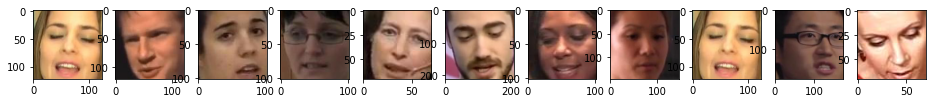

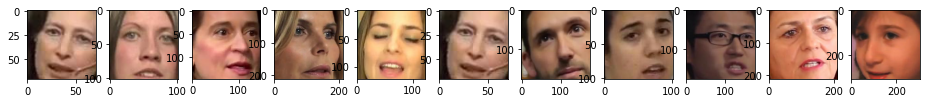

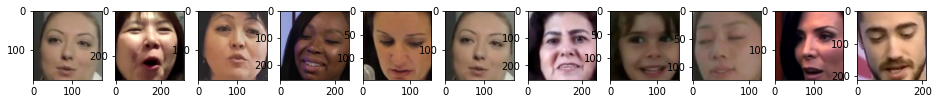

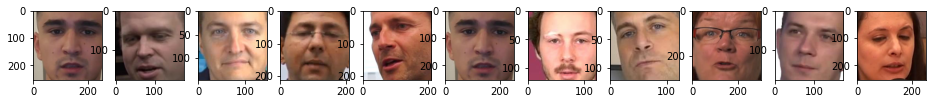

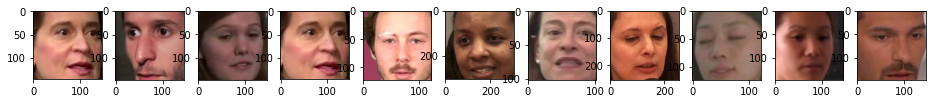

/content/drive/MyDrive/Decoder/decoder_weights_epoch_7_l1_loss.pt 0.012437810945273632


In [ ]:
recall , matched_ids = find_recall(image_id_list[:],10)
print(model_weights_path , recall)

In [ ]:
len(matched_ids)

0

## Decoder

## Extract face features

In [ ]:
def extract_vgg_features_decoder(image_path_list):

  face_batch = []

  for image_path in image_path_list: 

    frame = Image.open(image_path)
    
    frame_arr = np.asarray(frame)
    face_arr = extract_face(frame_arr)

    if(face_arr is None):
      print('face not extracted')
      return None

    face = Image.fromarray(np.uint8(frame_arr)).convert('RGB')
    #face = Image.fromarray(frame_arr)
    face_tensor = transform(face)
    #print(face_tensor.shape)
    face_batch.append(face_tensor.numpy())
    #print(face_tensor.device)

  face_batch = torch.tensor(face_batch).to(device)
  #print(face_batch.shape)
  #return face_batch
  vgg_features = vgg_model(face_batch)

  return vgg_features

In [ ]:
def extract_faces_features_decoder(image_path_list):

  face_batch = []
  #print(image_path_list)
  for image_path in image_path_list: 
    #print(image_path)
    frame = Image.open(image_path)
    
    frame_arr = np.asarray(frame)
    face_arr = extract_face(frame_arr)


    if(face_arr is None):
      return None

    face = Image.fromarray(np.uint8(frame_arr)).convert('RGB')
    #face = Image.fromarray(frame_arr)
    
    face_tensor = transform(face)
    #print(face_tensor.shape)
    face_batch.append(face_tensor.numpy())
    #print(face_tensor.device)

  face_batch = torch.tensor(face_batch).to(device)
  #print(face_batch.shape)
  return face_batch


## Decoder model

In [ ]:


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.ReLU = nn.ReLU()
        self.fc4 = nn.Linear(4096, 14 * 14 * 64)
        self.fc_bn4 = nn.BatchNorm1d(14 * 14 * 64)

        def TransConv( i, kernal = 5, stride = 2, inp = None):
            if not inp:
                inp = max(256//2**(i-1), 32)

            layer =  nn.Sequential(
                nn.ConvTranspose2d(inp, max(256//2**i, 32), 
                       kernal, stride=stride, padding=2, output_padding=1, 
                                dilation=1, padding_mode='zeros'),
                nn.ReLU(),
                nn.BatchNorm2d(max(256//2**i, 32)))
            return layer

        self.T1_ = TransConv(1, inp = 64)
        self.T2_ = TransConv(2)
        self.T3_ = TransConv(3)
        self.T4_ = TransConv(4)
    
        self.ConvLast = nn.Sequential(
            nn.Conv2d(32, 3, (1,1), stride=1),
            nn.BatchNorm2d(3),
            nn.ReLU())


    def forward(self, x):
        
        #print(x.shape)
        T0 = self.fc4(x) 
        T0 = self.ReLU(T0)
        # T0 = self.fc_bn4(T0)
        T0 = T0.view(-1,64,14,14)


        #print(T0.shape)
        T1 = self.T1_(T0)
        #print(T1.shape)
        T2 = self.T2_(T1)
        #print(T2.shape)
        T3 = self.T3_(T2)
        #print(T3.shape)
        T4 = self.T4_(T3)
        #print(T4.shape)

        outT = self.ConvLast(T4)
        #print(outT.shape)


        return outT

        #print(T1.shape)

In [ ]:
decoder = Decoder()
decoder.to(device)
decoder.train()

Decoder(
  (ReLU): ReLU()
  (fc4): Linear(in_features=4096, out_features=12544, bias=True)
  (fc_bn4): BatchNorm1d(12544, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (T1_): Sequential(
    (0): ConvTranspose2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (T2_): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (T3_): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (T4_): Sequential(
    (0): ConvTranspose2d(32, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2,

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
#device = 'cpu'
mse_loss = torch.nn.MSELoss(reduction='sum').to(device)
#l1_loss = torch.nn.L1Loss(reduction='sum').to(device)
optimizer = torch.optim.Adam(decoder.parameters(),lr=1e-5 , weight_decay=1e-5)
cosine_similarity = torch.nn.CosineSimilarity().to(device)

## decoder training


In [ ]:
epochs = 1000

for x in range(27,40):

  total_mse_loss = 0
  total_l1_loss = 0
  total_l2_distance = 0
  total_l1_distance = 0
  total_cosine_similarity = 0
  batches = 0
  total_examples = 0
  n = 10*[1000]
  decoder.train()

  for i in range(1000):

    try:
      X = torch.load('/content/drive/MyDrive/reference/vgg_image_features_'+str(i))
    except:
      continue

    f = open('/content/drive/MyDrive/reference/spectrograms_'+str(i)+'.pk','rb')
    spec_dict = pickle.load(f)
    image_path_list = ['/content/drive/MyDrive/reference/'+key+'.jpg' for key in spec_dict] 
    #print('list is ',image_path_list)   
    #image_path_list = []
    #root_path = '/content/drive/MyDrive/S2FD/'
    #for image_name in all_images_name[i:i+32]:
     # path = root_path + str(image_name)
      #image_path_list.append(path)
    #print(X.shape[0],len(image_path_list))
    y = extract_faces_features_decoder(image_path_list).to(device)
    X = extract_vgg_features_decoder(image_path_list).to(device)
    
    y_pred = decoder.forward(X)
    print(y.shape , y_pred.shape)
  
    assert(y.shape == y_pred.shape)
  
    loss = Loss1(y,y_pred,device)
    print(loss)
   

    #with torch.no_grad():
      
      #l1_distance = l1_dist(y,y_pred)
      #l2_distance = l2_dist(y,y_pred)
      #cosine_sim = cosine_similarity(y,y_pred).sum() / y.shape[0]
      #total_l1_distance += l1_distance.item()
      #total_l2_distance += l2_distance.item()
      #total_cosine_similarity += cosine_sim

    optimizer.zero_grad()
   # print(loss.device)
    loss.backward()
    #total_loss.backward()
    optimizer.step()
    #print('parameter update ',i)Current Batch is {} - loss is : {} and L2 distance is : {}  L1 distance is : {} Cosine similarity is : {}'.format(batches,total_
    #print(loss.item())
    batches += 1
    total_mse_loss += loss.item()
    #total_mse_loss += total_loss.item()
    
    total_examples += X.shape[0]

    #if(batches%50 == 0):
    #print('Current Batch is {} - loss is : {} and L2 distance is : {}  L1 distance is : {} Cosine similarity is : {}'.format(batches,total_mse_loss/batches , l2_distance, l1_distance , cosine_sim))
    print('batch is {} loss is {}'.format(batches,total_mse_loss/batches))
  

  #if x%5 == 0:
  #model_weights_path = '/content/drive/MyDrive/Audio_Encoder/decoder_weights_epoch_'+ str(x) +'.pt'
  #torch.save(audio_encoder.state_dict(),model_weights_path)

  print("Training EPOCH : ",x)
  print('total batches processed : {}'.format(batches))
  print('total examples processed : {}'.format(total_examples))
  print('Total loss is : {}'.format(total_mse_loss/batches))
  print('L2 distance is : {}'.format(total_l2_distance/batches))
  print('L1 distance is : {}'.format(total_l1_distance/batches))
  print('Cosine Similarity is : {}'.format(total_cosine_similarity/batches))

  model_weights_path = '/content/drive/MyDrive/S2FD/Model/decoder_weights_epoch_' + str(x) + '_l1_loss.pt'
  torch.save(decoder.state_dict(),model_weights_path)

  #testing()

In [ ]:
model_weights_path = '/content/drive/MyDrive/S2FD/Model/decoder_weights_epoch_13_l1_loss.pt'
torch.save(decoder.state_dict(),model_weights_path)

## decoder eval

In [ ]:
model_weights_path = '/content/drive/MyDrive/Decoder/decoder_weights_epoch_7_l1_loss.pt'
decoder.load_state_dict(torch.load(model_weights_path))

<All keys matched successfully>

In [ ]:
def decoder_eval(image_path_list,spec_dict):
  decoder.eval()
  audio_encoder.eval()
  #print(image_path_list)
  #y = extract_faces_features_decoder(image_path_list).to(device) # original faces in np array
  y = extract_faces_features(image_path_list).to(device)
  #X_d = extract_vgg_features_decoder(image_path_list).to(device) # original vgg features
  X_d = extract_image_features(image_path_list).to(device)

  y_vgg = decoder.forward(X_d) # predicted image from vgg features


  X_spec = torch.tensor([np.transpose(value,(2,1,0)) for value in spec_dict.values()]).to(device) # spectrogram 
  y_vgg_pred = audio_encoder.forward(X_spec) # predicted vgg_features
  y_pred = decoder.forward(y_vgg_pred) # predicted image from raw waveform

  cosine_pred_image = cosine_similarity(y_vgg , y_pred).mean().item()
  #cosine_actual_image = cosine_similarity(y,y_pred).item()

  y = y.permute(0,2,3,1)
  y = y.cpu().detach().numpy()

  y_pred = y_pred.permute(0,2,3,1)
  y_pred = y_pred.cpu().detach().numpy()

  y_vgg = y_vgg.permute(0,2,3,1)
  y_vgg = y_vgg.cpu().detach().numpy()

  #print(y_pred.shape)
  #y_pred = y_pred.reshape(-1,224,224,3)*255)
  std = np.array([ 0.224, 0.225, 0.229 ]).reshape(1,1,3)
  mean = np.array([ 0.456, 0.406, 0.485 ]).reshape(1,1,3)
  for i in range(y_vgg.shape[0]):
    y_vgg[i] = np.multiply(y_vgg[i],std) + mean
    y[i] = np.multiply(y[i],std) + mean
    y_pred[i] = np.multiply(y_pred[i],std) + mean
  #y_pred.shape

  w=3
  h=y.shape[0]
  
  no=1
  
  for i in range(h):

    fig=plt.figure(figsize=(9,9))

    fig.add_subplot(1,w,1)
    plt.imshow(y[i])
    no+=1
    fig.add_subplot(1,w,2)
    #print(y_vgg[i].shape)
    plt.imshow(y_vgg[i])
    no+=1
    fig.add_subplot(1,w,3)
    #print(y_pred[i].shape)
    plt.imshow(y_pred[i])
    no+=1
  
  dist_vgg_l1 = l1_dist(X_d , y_vgg_pred).item()
  dist_vgg_l2 = l2_dist(X_d , y_vgg_pred).item()
  cosine_similarity_vgg = cosine_similarity(X_d , y_vgg_pred).mean().item()

  #dist_pred_image_l1
  #dist_pred_image_l2
  #cosine_pred_image = cosine_similarity(y_vgg , y_pred).mean().item()

  print('L1 distance between actual and predicted VGG features is : {}'.format(dist_vgg_l1))
  print('L2 distance between actual and predicted VGG features is : {}'.format(dist_vgg_l2))
  print('Cosine Similarity between actual and predicted VGG features is : {}'.format(cosine_similarity_vgg))
  print('Cosine Similarity between actual vgg image and predicted image : {}'.format(cosine_pred_image))
  #print('Cosine Similarity between actual actual image and predicted image : {}'.format(cosine_actual_image))



1004


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

L1 distance between actual and predicted VGG features is : 22.09090805053711
L2 distance between actual and predicted VGG features is : 0.7276695966720581
Cosine Similarity between actual and predicted VGG features is : 0.725286066532135
Cosine Similarity between actual vgg image and predicted image : 0.5041285157203674
****************************************************************


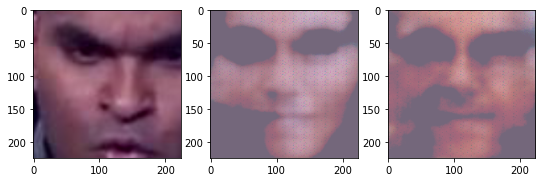

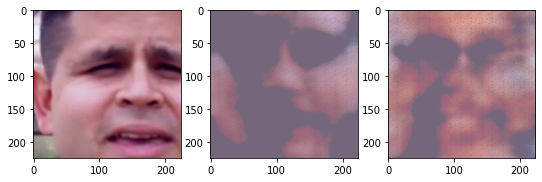

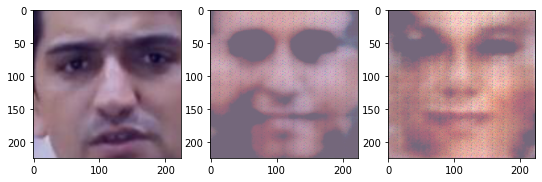

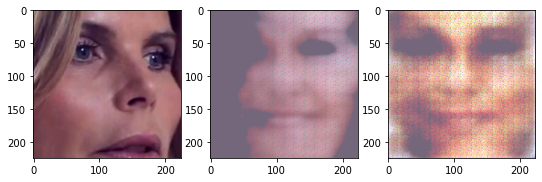

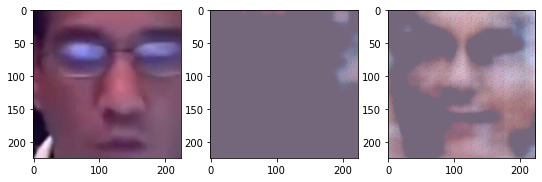

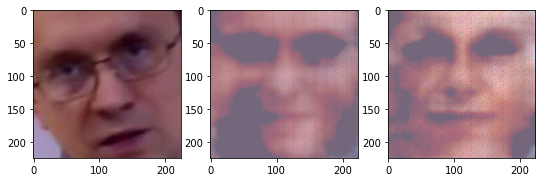

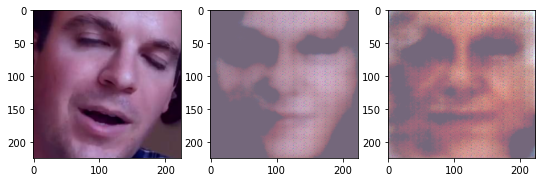

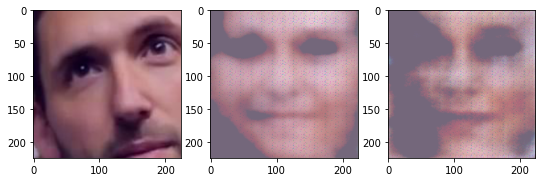

In [ ]:
  i = 1004


  with torch.no_grad():

    try:
      X = torch.load('/content/drive/MyDrive/reference/vgg_image_features_'+str(i))
    except:
      print('vgg file missing')
      

    f = open('/content/drive/MyDrive/reference/spectrograms_'+str(i)+'.pk','rb')
    spec_dict = pickle.load(f)
    image_path_list = ['/content/drive/MyDrive/reference/'+key+'.jpg' for key in spec_dict] 

    print(i)
    decoder_eval(image_path_list , spec_dict)
    print('****************************************************************')


 

## extra

In [ ]:
y = y.permute(0,2,3,1)
y = y.cpu().detach().numpy()
std = np.array([ 0.224, 0.225, 0.229 ]).reshape(1,1,3)
mean = np.array([ 0.456, 0.406, 0.485 ]).reshape(1,1,3)
for i in range(y.shape[0]):
  y[i] = np.multiply(y[i],std) + mean

RuntimeError: ignored

In [ ]:
plt.imshow(y[1])

In [ ]:

y_pred = decoder.forward(X)
y_pred = y_pred.permute(0,2,3,1)
y_pred = y_pred.cpu().detach().numpy()
print(y_pred.shape)
#y_pred = (y_pred.reshape(-1,224,224,3)*255).astype(np.uint8)
std = np.array([ 0.224, 0.225, 0.229 ]).reshape(1,1,3)
mean = np.array([ 0.456, 0.406, 0.485 ]).reshape(1,1,3)
for i in range(y_pred.shape[0]):
  y_pred[i] = np.multiply(y_pred[i],std) + mean
y_pred.shape

In [ ]:
plt.imshow(y_pred[8])

## Real Demo

In [ ]:
video_id = 'q67z7PTGRi8'
start = 5
end = 10

[youtube] q67z7PTGRi8: Downloading webpage
[download] Destination: /content/videos/q67z7PTGRi8.mp4
[download] 100% of 329.45MiB in 00:15
[MoviePy] Writing audio in /content/audios/q67z7PTGRi8.wav


100%|██████████| 111/111 [00:00<00:00, 1815.39it/s]

[MoviePy] Done.


L1 distance between actual and predicted VGG features is : 19.218856811523438
L2 distance between actual and predicted VGG features is : 0.6120026707649231
Cosine Similarity between actual and predicted VGG features is : 0.8127263784408569
Cosine Similarity between actual vgg image and predicted image : 0.08274343609809875


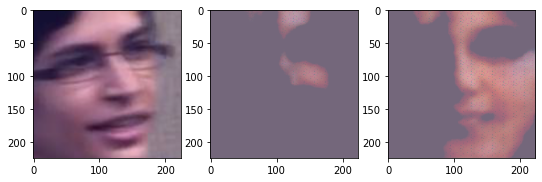

In [ ]:
spectrogram = download_video(video_id,start,end)
spectrogram_dict = {}

if (spectrogram is None):
  print('spectrogram is none')

if (type(spectrogram) == np.ndarray):

  spectrogram_dict[video_id] = spectrogram
  image_path_list = []

  image_path = '/content/images/' + video_id + '.jpg'
  #print(image_path)
  image_path_list.append(image_path)
 
  decoder_eval(image_path_list , spectrogram_dict)
